# 

<img align="centre" width="300" height="300" src="DataSurfers_LSE_EP_Assignment3_Logo TfL.png">

<h2><center>EMPLOYER PROJECT: THOUGHTWORKS</center></h2>    
<h2><center>CYCLING IN MAJOR CITIES: GROWING CYCLING IN LONDON</center></h2>
<h3><center>EXPLORATORY & EXPLANATORY DATA ANALYSIS</center></h3>

## BACKGROUND AND CONTEXT 

Transport for London (TfL) is a local government body responsible for most of the transport network in London.

TfL was created in 2000 as part of the Greater London Authority (GLA) and is managed by a board chaired by the Mayor of London.

They are also guided by the Mayor’s Transport Strategy, which aims to transform the city’s streets, improve public transport and create opportunities for new homes and jobs.

The central aim of the strategy is for 80% of all trips in London to be made on foot, by cycle or using public transport by 2041. 

DataSurfers has been commissioned to investigate three main goals:
- Main goal 1: How much progress has been made towards achieving our goal of 80% of all trips in London being made on foot, by cycle or using public transport by 2041 - and what actions should be taken to increase cycle transit in particular?
- Main goal 2: How might we also use data to support our efforts towards reaching this goal?
- Main goal 3: TfL has a hypothesis that there is a correlation between the availability of cycling infrastructure and the prevalence of cycling.

This Notebook is the collection of all Python codes applied to uncover trends and patterns on the datasets provided by the client (along with others that DataSurfers have researched further), in relation to main goals 2 and 3. Main goal 1 will be investigated in R.

For main goals 2 and 3, we will primarily investigate the city of London, but also New york City and Sydney, to check if any of the trends can help TfL reach the Mayor's vision.

<img align="right" width="250" height="250" src="DataSurfers_LSE_EP_Assignment3_Logo Datasurfers.png">

<h1><center>LONDON</center></h1>

## 1. Data Ingestion

### Prepare the workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
from statsmodels.formula.api import ols

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

### Import the datasets 

In [2]:
# Import and sense-check the Central London dataset.
central_london = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Central London.xlsx')

# View the DataFrame.
central_london

Survey_Wave   Site ID                            Location  Weekday  \
0              2014  CENCY001  Millbank (south of Thorney Street)   Friday   
1              2014  CENCY001  Millbank (south of Thorney Street)   Friday   
2              2014  CENCY001  Millbank (south of Thorney Street)   Friday   
3              2014  CENCY001  Millbank (south of Thorney Street)   Friday   
4              2014  CENCY001  Millbank (south of Thorney Street)   Friday   
...             ...       ...                                 ...      ...   
758094         2021  CENCY702                           Haymarket  Tuesday   
758095         2021  CENCY702                           Haymarket  Tuesday   
758096         2021  CENCY702                           Haymarket  Tuesday   
758097         2021  CENCY702                           Haymarket  Tuesday   
758098         2021  CENCY702                           Haymarket  Tuesday   

                Survey Date Weather_categories Weather         Time  \
0       2014-01-24 00:00:00                Dry     Dry  0600 - 0615   
1       2014-01-24 00:00:00                Dry     Dry  0615 - 0630   
2       2014-01-24 00:00:00                Dry     Dry  0630 - 0645   
3       2014-01-24 00:00:00                Dry     Dry  0645 - 0700   
4       2014-01-24 00:00:00                Dry     Dry  0700 - 0715   
...                     ...                ...     ...          ...   
758094  2021-12-21 00:00:00                Dry     Dry  2045 - 2100   
758095  2021-12-21 00:00:00                Dry     Dry  2100 - 2115   
758096  2021-12-21 00:00:00                Dry     Dry  2115 - 2130   
758097  2021-12-21 00:00:00                Dry     Dry  2130 - 2145   
758098  2021-12-21 00:00:00                Dry     Dry  2145 - 2200   

                             Period   Direction  Start hour  Start minute  \
0       Early Morning (06:00-07:00)  Northbound           6             0   
1       Early Morning (06:00-07:00)  Northbound           6            15   
2       Early Morning (06:00-07:00)  Northbound           6            30   
3       Early Morning (06:00-07:00)  Northbound           6            45   
4             AM peak (07:00-10:00)  Northbound           7             0   
...                             ...         ...         ...           ...   
758094        Evening (19:00-22:00)  Southbound          20            45   
758095        Evening (19:00-22:00)  Southbound          21             0   
758096        Evening (19:00-22:00)  Southbound          21            15   
758097        Evening (19:00-22:00)  Southbound          21            30   
758098        Evening (19:00-22:00)  Southbound          21            45   

        Number of private cycles  Number of cycle hire bikes  Total cycles  
0                              0                           0             0  
1                             15                           0            15  
2                             35                           0            35  
3                             59                           2            61  
4                             73                           0            73  
...                          ...                         ...           ...  
758094                        22                           1            23  
758095                        20                           0            20  
758096                        16                           1            17  
758097                        10                           1            11  
758098                        12                           2            14  

[758099 rows x 15 columns]

In [3]:
# Import and sense-check the Inner London dataset.
inner_london = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Inner London.xlsx')

# View the DataFrame.
inner_london

Survey_Wave   Site ID       Location    Weekday          Survey Date  \
0              2015  INNCY001     Grove Road  Wednesday  2015-05-20 00:00:00   
1              2015  INNCY001     Grove Road  Wednesday  2015-05-20 00:00:00   
2              2015  INNCY001     Grove Road  Wednesday  2015-05-20 00:00:00   
3              2015  INNCY001     Grove Road  Wednesday  2015-05-20 00:00:00   
4              2015  INNCY001     Grove Road  Wednesday  2015-05-20 00:00:00   
...             ...       ...            ...        ...                  ...   
523771         2021  INNCY597  Augustus Road  Wednesday  2021-05-26 00:00:00   
523772         2021  INNCY597  Augustus Road  Wednesday  2021-05-26 00:00:00   
523773         2021  INNCY597  Augustus Road  Wednesday  2021-05-26 00:00:00   
523774         2021  INNCY597  Augustus Road  Wednesday  2021-05-26 00:00:00   
523775         2021  INNCY597  Augustus Road  Wednesday  2021-05-26 00:00:00   

       Weather_categories Weather         Time                       Period  \
0                     Dry     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1                     Dry     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2                     Dry     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3                     Dry     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4                     Dry     Dry  0700 - 0715        AM peak (07:00-10:00)   
...                   ...     ...          ...                          ...   
523771                Dry     Dry  2045 - 2100        Evening (19:00-22:00)   
523772                Dry     Dry  2100 - 2115        Evening (19:00-22:00)   
523773                Dry     Dry  2115 - 2130        Evening (19:00-22:00)   
523774                Dry     Dry  2130 - 2145        Evening (19:00-22:00)   
523775                Dry     Dry  2145 - 2200        Evening (19:00-22:00)   

         Direction Start hour Start minute  Number of private cycles  \
0       Northbound          6            0                         1   
1       Northbound          6           15                         2   
2       Northbound          6           30                         2   
3       Northbound          6           45                         4   
4       Northbound          7            0                         4   
...            ...        ...          ...                       ...   
523771   Westbound         20           45                         3   
523772   Westbound         21            0                         2   
523773   Westbound         21           15                         2   
523774   Westbound         21           30                         2   
523775   Westbound         21           45                         0   

        Number of cycle hire bikes  Total cycles  
0                                0             1  
1                                0             2  
2                                0             2  
3                                0             4  
4                                0             4  
...                            ...           ...  
523771                           0             3  
523772                           0             2  
523773                           0             2  
523774                           0             2  
523775                           0             0  

[523776 rows x 15 columns]

In [4]:
# Import and sense-check the Outer London dataset.
outer_london = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Outer London.xlsx')

# View the DataFrame.
outer_london

Survey_Wave   Site ID                      Location Weekday  \
0              2015  OUTCY001              High Road Leyton  Friday   
1              2015  OUTCY001              High Road Leyton  Friday   
2              2015  OUTCY001              High Road Leyton  Friday   
3              2015  OUTCY001              High Road Leyton  Friday   
4              2015  OUTCY001              High Road Leyton  Friday   
...             ...       ...                           ...     ...   
375655         2021  OUTCY451  Thames Path (Lower Ham Road)  Friday   
375656         2021  OUTCY451  Thames Path (Lower Ham Road)  Friday   
375657         2021  OUTCY451  Thames Path (Lower Ham Road)  Friday   
375658         2021  OUTCY451  Thames Path (Lower Ham Road)  Friday   
375659         2021  OUTCY451  Thames Path (Lower Ham Road)  Friday   

                Survey Date Weather_categories Weather         Time  \
0       2015-06-26 00:00:00                Dry     Dry  0600 - 0615   
1       2015-06-26 00:00:00                Dry     Dry  0615 - 0630   
2       2015-06-26 00:00:00                Dry     Dry  0630 - 0645   
3       2015-06-26 00:00:00                Dry     Dry  0645 - 0700   
4       2015-06-26 00:00:00                Dry     Dry  0700 - 0715   
...                     ...                ...     ...          ...   
375655  2021-06-18 00:00:00              Rainy     Wet  2045 - 2100   
375656  2021-06-18 00:00:00              Rainy     Wet  2100 - 2115   
375657  2021-06-18 00:00:00              Rainy     Wet  2115 - 2130   
375658  2021-06-18 00:00:00              Rainy     Wet  2130 - 2145   
375659  2021-06-18 00:00:00              Rainy     Wet  2145 - 2200   

                             Period   Direction  Start hour  Start minute  \
0       Early Morning (06:00-07:00)  Northbound           6             0   
1       Early Morning (06:00-07:00)  Northbound           6            15   
2       Early Morning (06:00-07:00)  Northbound           6            30   
3       Early Morning (06:00-07:00)  Northbound           6            45   
4             AM peak (07:00-10:00)  Northbound           7             0   
...                             ...         ...         ...           ...   
375655        Evening (19:00-22:00)  Southbound          20            45   
375656        Evening (19:00-22:00)  Southbound          21             0   
375657        Evening (19:00-22:00)  Southbound          21            15   
375658        Evening (19:00-22:00)  Southbound          21            30   
375659        Evening (19:00-22:00)  Southbound          21            45   

        Number of male cycles  Number of female cycles  \
0                           2                        1   
1                           3                        0   
2                           2                        0   
3                           4                        0   
4                           4                        1   
...                       ...                      ...   
375655                      1                        0   
375656                      2                        0   
375657                      0                        0   
375658                      0                        0   
375659                      1                        0   

        Number of unknown cycles  Total cycles  
0                              0             3  
1                              0             3  
2                              0             2  
3                              0             4  
4                              0             5  
...                          ...           ...  
375655                         0             1  
375656                         0             2  
375657                         0             0  
375658                         0             0  
375659                         0             1  

[375660 rows x 16 columns]

> The team went through a process of cleaning the raw data files the client provided, and these cleaned fils are the ones used here. We can see all the datasets have the same number of columns and rows as per these cleaned files, therefore we can continue with this exercise. 

## 2. Descriptive Statistical Analysis 

### Central London dataset

In [5]:
# Determine whether there are missing values.
central_london.isnull().sum()

Survey_Wave                   0
Site ID                       0
Location                      0
Weekday                       0
Survey Date                   0
Weather_categories            0
Weather                       0
Time                          0
Period                        0
Direction                     0
Start hour                    0
Start minute                  0
Number of private cycles      0
Number of cycle hire bikes    0
Total cycles                  0
dtype: int64

In [6]:
# Determine the metadata of the dataset.
central_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758099 entries, 0 to 758098
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Survey_Wave                 758099 non-null  int64 
 1   Site ID                     758099 non-null  object
 2   Location                    758099 non-null  object
 3   Weekday                     758099 non-null  object
 4   Survey Date                 758099 non-null  object
 5   Weather_categories          758099 non-null  object
 6   Weather                     758099 non-null  object
 7   Time                        758099 non-null  object
 8   Period                      758099 non-null  object
 9   Direction                   758099 non-null  object
 10  Start hour                  758099 non-null  int64 
 11  Start minute                758099 non-null  int64 
 12  Number of private cycles    758099 non-null  int64 
 13  Number of cycle hire bikes  7

In [7]:
# Determine the descriptive statistics of the dataset.
central_london.describe().round(2)

Survey_Wave  Start hour  Start minute  Number of private cycles  \
count    758099.00   758099.00     758099.00                 758099.00   
mean       2017.23       13.50         22.50                     14.82   
std           2.20        4.61         16.77                     26.26   
min        2014.00        6.00          0.00                      0.00   
25%        2015.00        9.00          0.00                      2.00   
50%        2017.00       13.00         15.00                      7.00   
75%        2019.00       17.00         30.00                     16.00   
max        2021.00       21.00         45.00                   1177.00   

       Number of cycle hire bikes  Total cycles  
count                   758099.00     758099.00  
mean                         1.83         16.65  
std                          3.32         28.68  
min                          0.00          0.00  
25%                          0.00          3.00  
50%                          1.00          8.00  
75%                          2.00         18.00  
max                        108.00       1200.00

### Inner London dataset

In [8]:
# Determine whether there are missing values.
inner_london.isnull().sum()

Survey_Wave                   0
Site ID                       0
Location                      0
Weekday                       0
Survey Date                   0
Weather_categories            0
Weather                       0
Time                          0
Period                        0
Direction                     0
Start hour                    0
Start minute                  0
Number of private cycles      0
Number of cycle hire bikes    0
Total cycles                  0
dtype: int64

In [9]:
# Determine the metadata of the dataset.
inner_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523776 entries, 0 to 523775
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Survey_Wave                 523776 non-null  int64 
 1   Site ID                     523776 non-null  object
 2   Location                    523776 non-null  object
 3   Weekday                     523776 non-null  object
 4   Survey Date                 523776 non-null  object
 5   Weather_categories          523776 non-null  object
 6   Weather                     523776 non-null  object
 7   Time                        523776 non-null  object
 8   Period                      523776 non-null  object
 9   Direction                   523776 non-null  object
 10  Start hour                  523776 non-null  object
 11  Start minute                523776 non-null  object
 12  Number of private cycles    523776 non-null  int64 
 13  Number of cycle hire bikes  5

In [10]:
# Determine the descriptive statistics of the dataset.
inner_london.describe().round(2)

Survey_Wave  Number of private cycles  Number of cycle hire bikes  \
count    523776.00                 523776.00                   523776.00   
mean       2017.99                      5.93                        0.27   
std           2.04                     10.94                        0.94   
min        2015.00                      0.00                        0.00   
25%        2016.00                      1.00                        0.00   
50%        2018.00                      3.00                        0.00   
75%        2020.00                      7.00                        0.00   
max        2021.00                    278.00                       29.00   

       Total cycles  
count     523776.00  
mean           6.20  
std           11.31  
min            0.00  
25%            1.00  
50%            3.00  
75%            7.00  
max          280.00

### Outer London dataset

In [11]:
# Determine whether there are missing values.
outer_london.isnull().sum()

Survey_Wave                 0
Site ID                     0
Location                    0
Weekday                     0
Survey Date                 0
Weather_categories          0
Weather                     0
Time                        0
Period                      0
Direction                   0
Start hour                  0
Start minute                0
Number of male cycles       0
Number of female cycles     0
Number of unknown cycles    0
Total cycles                0
dtype: int64

In [12]:
# Determine the metadata of the dataset.
outer_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey_Wave               375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Weekday                   375660 non-null  object
 4   Survey Date               375660 non-null  object
 5   Weather_categories        375660 non-null  object
 6   Weather                   375660 non-null  object
 7   Time                      375660 non-null  object
 8   Period                    375660 non-null  object
 9   Direction                 375660 non-null  object
 10  Start hour                375660 non-null  int64 
 11  Start minute              375660 non-null  int64 
 12  Number of male cycles     375660 non-null  int64 
 13  Number of female cycles   375660 non-null  int64 
 14  Numb

In [13]:
# Determine the descriptive statistics of the dataset.
outer_london.describe().round(2)

Survey_Wave  Start hour  Start minute  Number of male cycles  \
count    375660.00   375660.00     375660.00              375660.00   
mean       2017.85       13.50         22.50                   1.34   
std           1.99        4.61         16.77                   2.70   
min        2015.00        6.00          0.00                   0.00   
25%        2016.00        9.00          0.00                   0.00   
50%        2018.00       13.00         15.00                   0.00   
75%        2019.00       17.00         30.00                   2.00   
max        2021.00       21.00         45.00                  62.00   

       Number of female cycles  Number of unknown cycles  Total cycles  
count                375660.00                 375660.00     375660.00  
mean                      0.24                      0.01          1.59  
std                       0.75                      0.16          3.17  
min                       0.00                      0.00          0.00  
25%                       0.00                      0.00          0.00  
50%                       0.00                      0.00          0.00  
75%                       0.00                      0.00          2.00  
max                      19.00                     13.00         78.00

> From this preliminary description of the data, we can already extract a few characteristics:
> - There are no missing values, however from the preliminary cleaning in Excel we know we have "Unknown" values, which we will need to take into account later on.
> - The Survey Date columns don't show the correct data type applied and we will need to correct this.
> - The Inner London dataframe shows Start hour and Start minute columns as objects instead integers, probably due to the presence of some "Unknown" values. We may need to reconsider how to treat these original blanks cells if this gives us any issues in future analysis. 

## 3. Data Wrangling 

### Fix inconsistencies on data types

In [14]:
# Change the date format of central_london['Survey Date'].
central_london['Survey Date'] = pd.to_datetime(central_london['Survey Date'], errors='coerce')

# View the DateFrame.
print(central_london.info())
central_london.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758099 entries, 0 to 758098
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Survey_Wave                 758099 non-null  int64         
 1   Site ID                     758099 non-null  object        
 2   Location                    758099 non-null  object        
 3   Weekday                     758099 non-null  object        
 4   Survey Date                 747687 non-null  datetime64[ns]
 5   Weather_categories          758099 non-null  object        
 6   Weather                     758099 non-null  object        
 7   Time                        758099 non-null  object        
 8   Period                      758099 non-null  object        
 9   Direction                   758099 non-null  object        
 10  Start hour                  758099 non-null  int64         
 11  Start minute                758099 non-

Survey_Wave   Site ID                            Location Weekday  \
0         2014  CENCY001  Millbank (south of Thorney Street)  Friday   
1         2014  CENCY001  Millbank (south of Thorney Street)  Friday   
2         2014  CENCY001  Millbank (south of Thorney Street)  Friday   
3         2014  CENCY001  Millbank (south of Thorney Street)  Friday   
4         2014  CENCY001  Millbank (south of Thorney Street)  Friday   

  Survey Date Weather_categories Weather         Time  \
0  2014-01-24                Dry     Dry  0600 - 0615   
1  2014-01-24                Dry     Dry  0615 - 0630   
2  2014-01-24                Dry     Dry  0630 - 0645   
3  2014-01-24                Dry     Dry  0645 - 0700   
4  2014-01-24                Dry     Dry  0700 - 0715   

                        Period   Direction  Start hour  Start minute  \
0  Early Morning (06:00-07:00)  Northbound           6             0   
1  Early Morning (06:00-07:00)  Northbound           6            15   
2  Early Morning (06:00-07:00)  Northbound           6            30   
3  Early Morning (06:00-07:00)  Northbound           6            45   
4        AM peak (07:00-10:00)  Northbound           7             0   

   Number of private cycles  Number of cycle hire bikes  Total cycles  
0                         0                           0             0  
1                        15                           0            15  
2                        35                           0            35  
3                        59                           2            61  
4                        73                           0            73

In [15]:
# Change the date format of inner_london['Survey Date'].
inner_london['Survey Date'] = pd.to_datetime(inner_london['Survey Date'], errors='coerce')

# View the DateFrame.
print(inner_london.dtypes)
inner_london.head()

Survey_Wave                            int64
Site ID                               object
Location                              object
Weekday                               object
Survey Date                   datetime64[ns]
Weather_categories                    object
Weather                               object
Time                                  object
Period                                object
Direction                             object
Start hour                            object
Start minute                          object
Number of private cycles               int64
Number of cycle hire bikes             int64
Total cycles                           int64
dtype: object


Survey_Wave   Site ID    Location    Weekday Survey Date  \
0         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
1         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
2         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
3         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
4         2015  INNCY001  Grove Road  Wednesday  2015-05-20   

  Weather_categories Weather         Time                       Period  \
0                Dry     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1                Dry     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2                Dry     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3                Dry     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4                Dry     Dry  0700 - 0715        AM peak (07:00-10:00)   

    Direction Start hour Start minute  Number of private cycles  \
0  Northbound          6            0                         1   
1  Northbound          6           15                         2   
2  Northbound          6           30                         2   
3  Northbound          6           45                         4   
4  Northbound          7            0                         4   

   Number of cycle hire bikes  Total cycles  
0                           0             1  
1                           0             2  
2                           0             2  
3                           0             4  
4                           0             4

In [16]:
# Change the date format of outer_london['Survey Date'].
outer_london['Survey Date'] = pd.to_datetime(outer_london['Survey Date'], errors='coerce')

# View the DateFrame.
print(outer_london.dtypes)
outer_london.head()

Survey_Wave                          int64
Site ID                             object
Location                            object
Weekday                             object
Survey Date                 datetime64[ns]
Weather_categories                  object
Weather                             object
Time                                object
Period                              object
Direction                           object
Start hour                           int64
Start minute                         int64
Number of male cycles                int64
Number of female cycles              int64
Number of unknown cycles             int64
Total cycles                         int64
dtype: object


Survey_Wave   Site ID          Location Weekday Survey Date  \
0         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
1         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
2         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
3         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
4         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   

  Weather_categories Weather         Time                       Period  \
0                Dry     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1                Dry     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2                Dry     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3                Dry     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4                Dry     Dry  0700 - 0715        AM peak (07:00-10:00)   

    Direction  Start hour  Start minute  Number of male cycles  \
0  Northbound           6             0                      2   
1  Northbound           6            15                      3   
2  Northbound           6            30                      2   
3  Northbound           6            45                      4   
4  Northbound           7             0                      4   

   Number of female cycles  Number of unknown cycles  Total cycles  
0                        1                         0             3  
1                        0                         0             3  
2                        0                         0             2  
3                        0                         0             4  
4                        1                         0             5

In [17]:
# Change the data type to a numeric format of inner_london['Start hour'] and inner_london['Start minute'].
inner_london['Start hour'] = pd.to_numeric(inner_london['Start hour'], errors='coerce')
inner_london['Start minute'] = pd.to_numeric(inner_london['Start minute'], errors='coerce')

# View the DateFrame.
print(inner_london.dtypes)
inner_london.head()

Survey_Wave                            int64
Site ID                               object
Location                              object
Weekday                               object
Survey Date                   datetime64[ns]
Weather_categories                    object
Weather                               object
Time                                  object
Period                                object
Direction                             object
Start hour                           float64
Start minute                         float64
Number of private cycles               int64
Number of cycle hire bikes             int64
Total cycles                           int64
dtype: object


Survey_Wave   Site ID    Location    Weekday Survey Date  \
0         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
1         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
2         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
3         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
4         2015  INNCY001  Grove Road  Wednesday  2015-05-20   

  Weather_categories Weather         Time                       Period  \
0                Dry     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1                Dry     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2                Dry     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3                Dry     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4                Dry     Dry  0700 - 0715        AM peak (07:00-10:00)   

    Direction  Start hour  Start minute  Number of private cycles  \
0  Northbound         6.0           0.0                         1   
1  Northbound         6.0          15.0                         2   
2  Northbound         6.0          30.0                         2   
3  Northbound         6.0          45.0                         4   
4  Northbound         7.0           0.0                         4   

   Number of cycle hire bikes  Total cycles  
0                           0             1  
1                           0             2  
2                           0             2  
3                           0             4  
4                           0             4

### Identify which columns are not needed for this analysis and which columns we would like to add

- Since "Number of private cycles" and "Number of cycle hire bikes" columns are not present in all datasets, we will proceed to remove them from both the Central London and Inner London datasets to be able to join all three together.
- We will remove "Number of male cycles", "Number of female cycles" and "Number of unkown cycles" from Outer London dataset as it is not present on the other two datasets to be able to join all three together.
- We will add survey month to the all datasets.

In [18]:
# Drop the unwanted columns from Central London and sense-check the updated dataframe.
central = central_london.drop(columns = ['Number of private cycles','Number of cycle hire bikes'])

# View the DataFrame.
central.head()

Survey_Wave   Site ID                            Location Weekday  \
0         2014  CENCY001  Millbank (south of Thorney Street)  Friday   
1         2014  CENCY001  Millbank (south of Thorney Street)  Friday   
2         2014  CENCY001  Millbank (south of Thorney Street)  Friday   
3         2014  CENCY001  Millbank (south of Thorney Street)  Friday   
4         2014  CENCY001  Millbank (south of Thorney Street)  Friday   

  Survey Date Weather_categories Weather         Time  \
0  2014-01-24                Dry     Dry  0600 - 0615   
1  2014-01-24                Dry     Dry  0615 - 0630   
2  2014-01-24                Dry     Dry  0630 - 0645   
3  2014-01-24                Dry     Dry  0645 - 0700   
4  2014-01-24                Dry     Dry  0700 - 0715   

                        Period   Direction  Start hour  Start minute  \
0  Early Morning (06:00-07:00)  Northbound           6             0   
1  Early Morning (06:00-07:00)  Northbound           6            15   
2  Early Morning (06:00-07:00)  Northbound           6            30   
3  Early Morning (06:00-07:00)  Northbound           6            45   
4        AM peak (07:00-10:00)  Northbound           7             0   

   Total cycles  
0             0  
1            15  
2            35  
3            61  
4            73

In [19]:
# Drop the unwanted columns from Inner London and sense-check the updated dataframe.
inner = inner_london.drop(columns = ['Number of private cycles','Number of cycle hire bikes'])

# View the DataFrame.
inner.head()

Survey_Wave   Site ID    Location    Weekday Survey Date  \
0         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
1         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
2         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
3         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
4         2015  INNCY001  Grove Road  Wednesday  2015-05-20   

  Weather_categories Weather         Time                       Period  \
0                Dry     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1                Dry     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2                Dry     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3                Dry     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4                Dry     Dry  0700 - 0715        AM peak (07:00-10:00)   

    Direction  Start hour  Start minute  Total cycles  
0  Northbound         6.0           0.0             1  
1  Northbound         6.0          15.0             2  
2  Northbound         6.0          30.0             2  
3  Northbound         6.0          45.0             4  
4  Northbound         7.0           0.0             4

In [20]:
# Drop the unwanted columns from Outer London and sense-check the updated dataframe.
outer = outer_london.drop(columns = ['Number of male cycles','Number of female cycles','Number of unknown cycles'])

# View the DataFrame.
outer.head()

Survey_Wave   Site ID          Location Weekday Survey Date  \
0         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
1         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
2         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
3         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
4         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   

  Weather_categories Weather         Time                       Period  \
0                Dry     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1                Dry     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2                Dry     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3                Dry     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4                Dry     Dry  0700 - 0715        AM peak (07:00-10:00)   

    Direction  Start hour  Start minute  Total cycles  
0  Northbound           6             0             3  
1  Northbound           6            15             3  
2  Northbound           6            30             2  
3  Northbound           6            45             4  
4  Northbound           7             0             5

In [21]:
# Add add a column with the survey month for future analysis in the Central London dataset.
central['Survey Month'] = pd.to_datetime(central['Survey Date']).dt.to_period('M')
central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758099 entries, 0 to 758098
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Survey_Wave         758099 non-null  int64         
 1   Site ID             758099 non-null  object        
 2   Location            758099 non-null  object        
 3   Weekday             758099 non-null  object        
 4   Survey Date         747687 non-null  datetime64[ns]
 5   Weather_categories  758099 non-null  object        
 6   Weather             758099 non-null  object        
 7   Time                758099 non-null  object        
 8   Period              758099 non-null  object        
 9   Direction           758099 non-null  object        
 10  Start hour          758099 non-null  int64         
 11  Start minute        758099 non-null  int64         
 12  Total cycles        758099 non-null  int64         
 13  Survey Month        747687 no

In [22]:
# Add add a column with the survey month for future analysis in the Inner London dataset.
inner['Survey Month'] = pd.to_datetime(inner['Survey Date']).dt.to_period('M')
inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523776 entries, 0 to 523775
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Survey_Wave         523776 non-null  int64         
 1   Site ID             523776 non-null  object        
 2   Location            523776 non-null  object        
 3   Weekday             523776 non-null  object        
 4   Survey Date         521024 non-null  datetime64[ns]
 5   Weather_categories  523776 non-null  object        
 6   Weather             523776 non-null  object        
 7   Time                523776 non-null  object        
 8   Period              523776 non-null  object        
 9   Direction           523776 non-null  object        
 10  Start hour          523770 non-null  float64       
 11  Start minute        523770 non-null  float64       
 12  Total cycles        523776 non-null  int64         
 13  Survey Month        521024 no

In [23]:
# Add add a column with the survey month for future analysis in the Outer London dataset.
outer['Survey Month'] = pd.to_datetime(outer['Survey Date']).dt.to_period('M')
outer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Survey_Wave         375660 non-null  int64         
 1   Site ID             375660 non-null  object        
 2   Location            375660 non-null  object        
 3   Weekday             375660 non-null  object        
 4   Survey Date         374492 non-null  datetime64[ns]
 5   Weather_categories  375660 non-null  object        
 6   Weather             375660 non-null  object        
 7   Time                375660 non-null  object        
 8   Period              375660 non-null  object        
 9   Direction           375660 non-null  object        
 10  Start hour          375660 non-null  int64         
 11  Start minute        375660 non-null  int64         
 12  Total cycles        375660 non-null  int64         
 13  Survey Month        374492 no

### Identify and deal with outliers
- We will do the check on the numerical variables, except for the Survey_Wave column (the survey year) which we know from previous inspection that only contain the years where this data was collected: Central 2014 to 2021, Inner and Outer 2015 to 2021.

#### Outliers in central 

<AxesSubplot:xlabel='Start hour'>

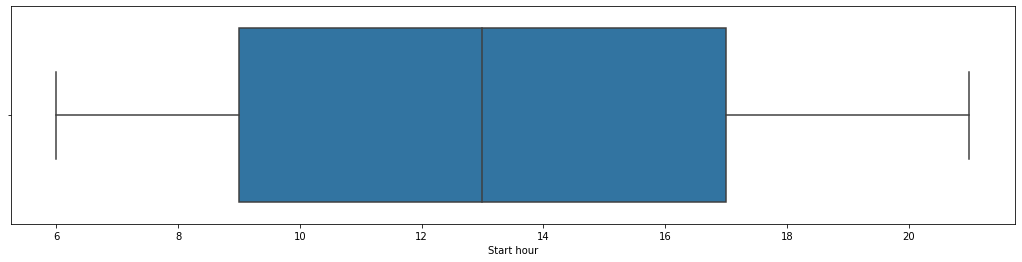

In [24]:
# Create a boxplot to check possible outliers in the Central London dataset: Start hour column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=central, x='Start hour')

<AxesSubplot:xlabel='Start minute'>

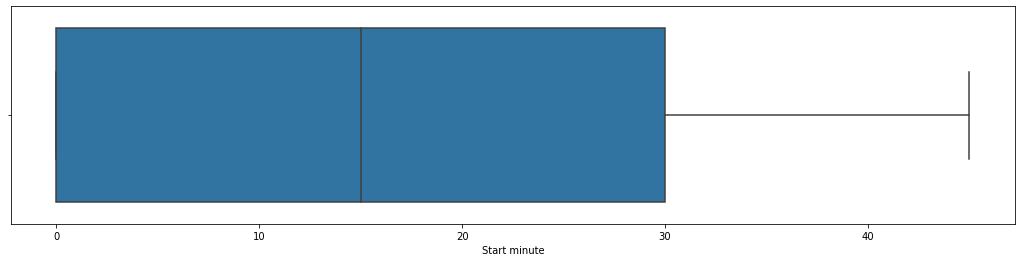

In [25]:
# Create a boxplot to check possible outliers in the Central London dataset: Start minute column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=central, x='Start minute')

<AxesSubplot:xlabel='Total cycles'>

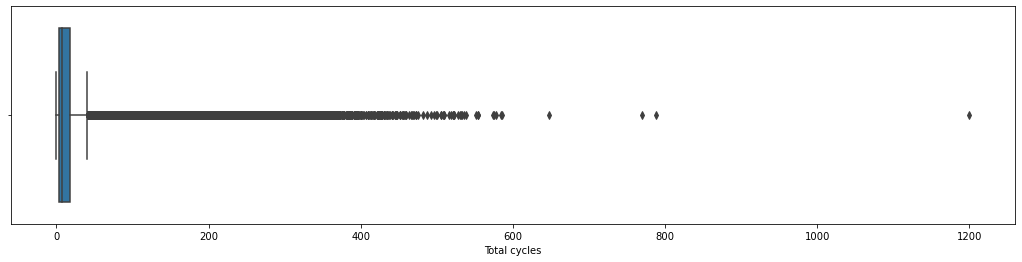

In [26]:
# Create a boxplot to check possible outliers in the Central London dataset: Total cycles column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=central, x='Total cycles')

In [27]:
# Calculate quantiles and IQR.
central_Q1 = central['Total cycles'].quantile(0.25) 
central_Q3 = central['Total cycles'].quantile(0.75)
central_IQR = central_Q3 - central_Q1
central_IQR

15.0

In [28]:
# Return a boolean array of the rows with (any) non-outlier column values.
central_condition = ~((central['Total cycles'] < (central_Q1 - 1.5 * central_IQR)) | (central['Total cycles'] > (central_Q3 + 1.5 * central_IQR)))

# Filter DataFrame based on condition and sens-check the updated dataframe.
central_non_outlier = central[central_condition]
central_non_outlier.info()
central_non_outlier.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685536 entries, 0 to 758098
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Survey_Wave         685536 non-null  int64         
 1   Site ID             685536 non-null  object        
 2   Location            685536 non-null  object        
 3   Weekday             685536 non-null  object        
 4   Survey Date         676056 non-null  datetime64[ns]
 5   Weather_categories  685536 non-null  object        
 6   Weather             685536 non-null  object        
 7   Time                685536 non-null  object        
 8   Period              685536 non-null  object        
 9   Direction           685536 non-null  object        
 10  Start hour          685536 non-null  int64         
 11  Start minute        685536 non-null  int64         
 12  Total cycles        685536 non-null  int64         
 13  Survey Month        676056 no

Survey_Wave   Site ID                            Location Weekday  \
0          2014  CENCY001  Millbank (south of Thorney Street)  Friday   
1          2014  CENCY001  Millbank (south of Thorney Street)  Friday   
2          2014  CENCY001  Millbank (south of Thorney Street)  Friday   
16         2014  CENCY001  Millbank (south of Thorney Street)  Friday   
17         2014  CENCY001  Millbank (south of Thorney Street)  Friday   

   Survey Date Weather_categories Weather         Time  \
0   2014-01-24                Dry     Dry  0600 - 0615   
1   2014-01-24                Dry     Dry  0615 - 0630   
2   2014-01-24                Dry     Dry  0630 - 0645   
16  2014-01-24                Dry     Dry  1000 - 1015   
17  2014-01-24                Dry     Dry  1015 - 1030   

                         Period   Direction  Start hour  Start minute  \
0   Early Morning (06:00-07:00)  Northbound           6             0   
1   Early Morning (06:00-07:00)  Northbound           6            15   
2   Early Morning (06:00-07:00)  Northbound           6            30   
16     Inter-peak (10:00-16:00)  Northbound          10             0   
17     Inter-peak (10:00-16:00)  Northbound          10            15   

    Total cycles Survey Month  
0              0      2014-01  
1             15      2014-01  
2             35      2014-01  
16            12      2014-01  
17             8      2014-01

<AxesSubplot:xlabel='Total cycles'>

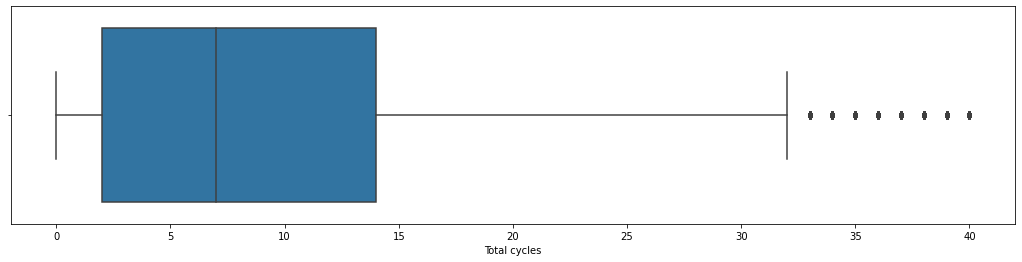

In [29]:
# Create a boxplot to check the updated dataset without outliers
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=central_non_outlier, x='Total cycles')

#### Outliers in inner

<AxesSubplot:xlabel='Start hour'>

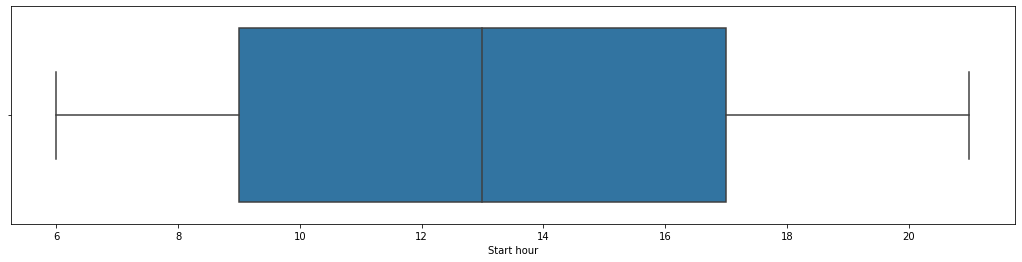

In [30]:
# Create a boxplot to check possible outliers in the Inner London dataset: Start hour column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=inner, x='Start hour')

<AxesSubplot:xlabel='Start minute'>

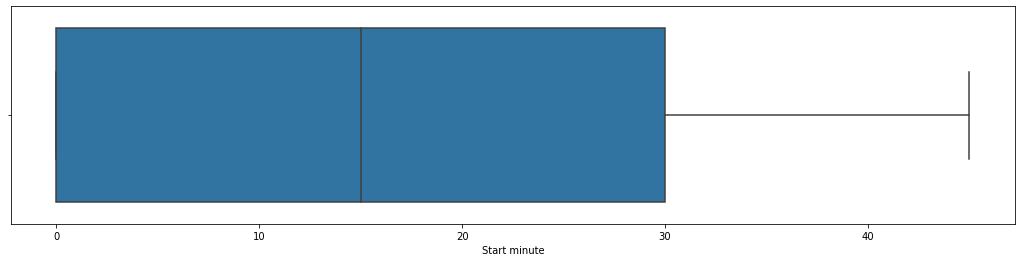

In [31]:
# Create a boxplot to check possible outliers in the Inner London dataset: Start minute column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=inner, x='Start minute')

<AxesSubplot:xlabel='Total cycles'>

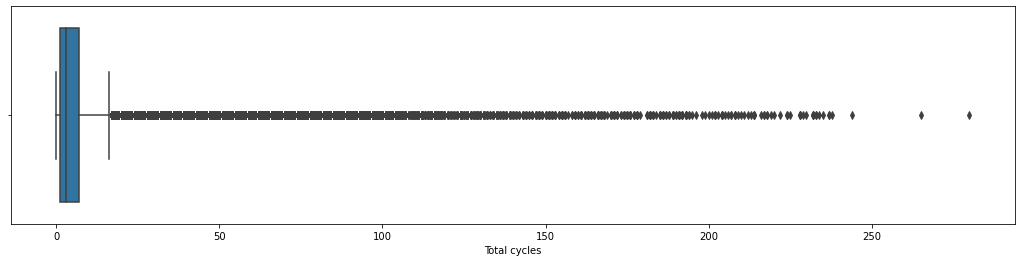

In [32]:
# Create a boxplot to check possible outliers in the Inner London dataset: Total cycles column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=inner, x='Total cycles')

In [33]:
# Calculate quantiles and IQR.
inner_Q1 = inner['Total cycles'].quantile(0.25) 
inner_Q3 = inner['Total cycles'].quantile(0.75)
inner_IQR = inner_Q3 - inner_Q1
inner_IQR

6.0

In [34]:
# Return a boolean array of the rows with (any) non-outlier column values.
inner_condition = ~((inner['Total cycles'] < (inner_Q1 - 1.5 * inner_IQR)) | (inner['Total cycles'] > (inner_Q3 + 1.5 * inner_IQR)))

# Filter DataFrame based on condition and sens-check the updated dataframe.
inner_non_outlier = inner[inner_condition]
inner_non_outlier.info()
inner_non_outlier.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477960 entries, 0 to 523775
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Survey_Wave         477960 non-null  int64         
 1   Site ID             477960 non-null  object        
 2   Location            477960 non-null  object        
 3   Weekday             477960 non-null  object        
 4   Survey Date         475413 non-null  datetime64[ns]
 5   Weather_categories  477960 non-null  object        
 6   Weather             477960 non-null  object        
 7   Time                477960 non-null  object        
 8   Period              477960 non-null  object        
 9   Direction           477960 non-null  object        
 10  Start hour          477954 non-null  float64       
 11  Start minute        477954 non-null  float64       
 12  Total cycles        477960 non-null  int64         
 13  Survey Month        475413 no

Survey_Wave   Site ID    Location    Weekday Survey Date  \
0         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
1         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
2         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
3         2015  INNCY001  Grove Road  Wednesday  2015-05-20   
4         2015  INNCY001  Grove Road  Wednesday  2015-05-20   

  Weather_categories Weather         Time                       Period  \
0                Dry     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1                Dry     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2                Dry     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3                Dry     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4                Dry     Dry  0700 - 0715        AM peak (07:00-10:00)   

    Direction  Start hour  Start minute  Total cycles Survey Month  
0  Northbound         6.0           0.0             1      2015-05  
1  Northbound         6.0          15.0             2      2015-05  
2  Northbound         6.0          30.0             2      2015-05  
3  Northbound         6.0          45.0             4      2015-05  
4  Northbound         7.0           0.0             4      2015-05

<AxesSubplot:xlabel='Total cycles'>

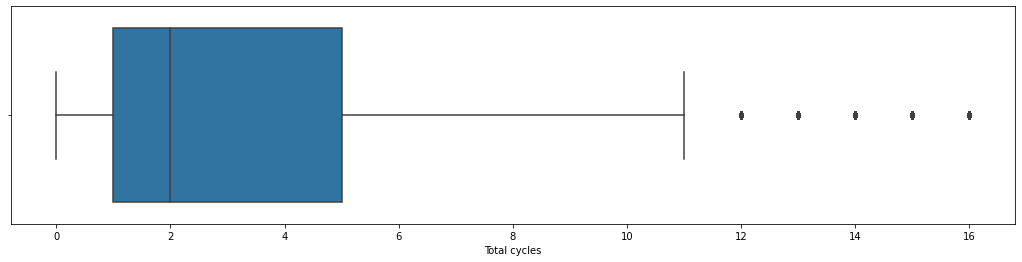

In [35]:
# Create a boxplot to check the updated dataset without outliers
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=inner_non_outlier, x='Total cycles')

#### Outliers in outer

<AxesSubplot:xlabel='Start hour'>

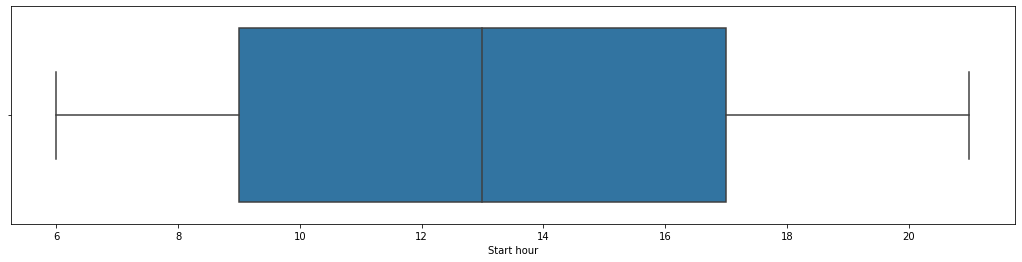

In [36]:
# Create a boxplot to check possible outliers in the Outer London dataset: Start hour column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=outer, x='Start hour')

<AxesSubplot:xlabel='Start minute'>

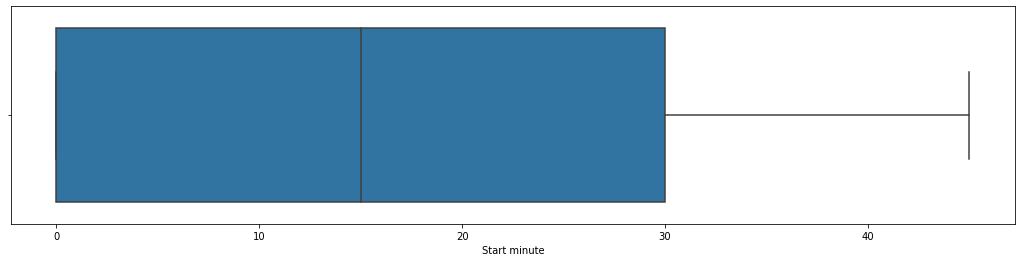

In [37]:
# Create a boxplot to check possible outliers in the Outer London dataset: Start minute column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=outer, x='Start minute')

<AxesSubplot:xlabel='Total cycles'>

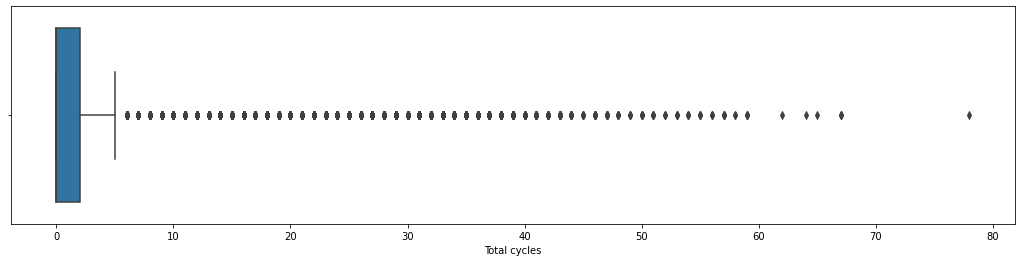

In [38]:
# Create a boxplot to check possible outliers in the Outer London dataset: Total cycles column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=outer, x='Total cycles')

In [39]:
# Calculate quantiles and IQR.
outer_Q1 = outer['Total cycles'].quantile(0.25) 
outer_Q3 = outer['Total cycles'].quantile(0.75)
outer_IQR = outer_Q3 - outer_Q1
outer_IQR

2.0

In [40]:
# Return a boolean array of the rows with (any) non-outlier column values.
outer_condition = ~((outer['Total cycles'] < (outer_Q1 - 1.5 * outer_IQR)) | (outer['Total cycles'] > (outer_Q3 + 1.5 * outer_IQR)))

# Filter DataFrame based on condition and sens-check the updated dataframe.
outer_non_outlier = outer[inner_condition]
outer_non_outlier.info()
outer_non_outlier.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345615 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Survey_Wave         345615 non-null  int64         
 1   Site ID             345615 non-null  object        
 2   Location            345615 non-null  object        
 3   Weekday             345615 non-null  object        
 4   Survey Date         344479 non-null  datetime64[ns]
 5   Weather_categories  345615 non-null  object        
 6   Weather             345615 non-null  object        
 7   Time                345615 non-null  object        
 8   Period              345615 non-null  object        
 9   Direction           345615 non-null  object        
 10  Start hour          345615 non-null  int64         
 11  Start minute        345615 non-null  int64         
 12  Total cycles        345615 non-null  int64         
 13  Survey Month        344479 no

Survey_Wave   Site ID          Location Weekday Survey Date  \
0         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
1         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
2         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
3         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   
4         2015  OUTCY001  High Road Leyton  Friday  2015-06-26   

  Weather_categories Weather         Time                       Period  \
0                Dry     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1                Dry     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2                Dry     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3                Dry     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4                Dry     Dry  0700 - 0715        AM peak (07:00-10:00)   

    Direction  Start hour  Start minute  Total cycles Survey Month  
0  Northbound           6             0             3      2015-06  
1  Northbound           6            15             3      2015-06  
2  Northbound           6            30             2      2015-06  
3  Northbound           6            45             4      2015-06  
4  Northbound           7             0             5      2015-06

<AxesSubplot:xlabel='Total cycles'>

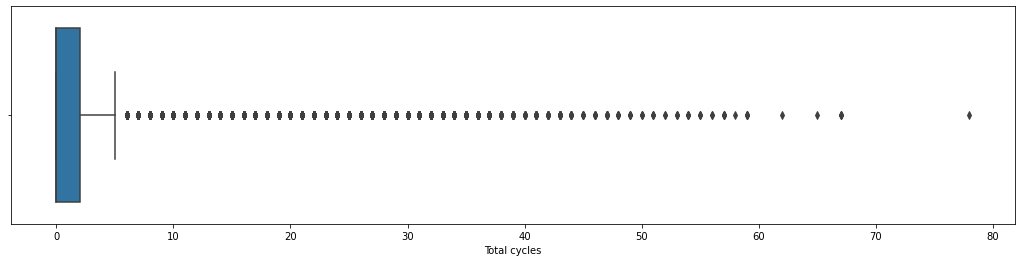

In [41]:
# Create a boxplot to check the updated dataset without outliers.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=outer_non_outlier, x='Total cycles')

> **IMPORTANT CONSIDERATION:** After this exercise we can see that by removing the outliers found in each dataset we lose a considerable amount of records that would be translated into thousands of cycle trips. In this particular case, we don't feel this approach is the correct one as it won't be a true reflection of London cycling reality. Therefore, we are going to proceed with the analysis on the original datasets and not the "_non_outlier" ones.  

## 4. Exploratory Analysis

### 4a. Time period covered by the datasets 

In [42]:
# Determine the minimum and maximum dates in the central DataFrame.
# Use appropriate docstrings.

print(f"The first survey date in the Central London dataset is {central['Survey Date'].min()}")
print(f"The last survey date in the Central London dataset is {central['Survey Date'].max()}")

The first survey date in the Central London dataset is 2014-01-20 00:00:00
The last survey date in the Central London dataset is 2021-12-30 00:00:00


In [43]:
# Determine the minimum and maximum dates in the inner DataFrame.
# Use appropriate docstrings.

print(f"The first survey date in the Inner London dataset is {inner['Survey Date'].min()}")
print(f"The last survey date in the Inner London dataset is {inner['Survey Date'].max()}")

The first survey date in the Inner London dataset is 2015-04-13 00:00:00
The last survey date in the Inner London dataset is 2021-09-16 00:00:00


In [44]:
# Determine the minimum and maximum dates in the outer DataFrame.
# Use appropriate docstrings.

print(f"The first survey date in the Outer London dataset is {outer['Survey Date'].min()}")
print(f"The last survey date in the Outer London dataset is {outer['Survey Date'].max()}")

The first survey date in the Outer London dataset is 2015-04-13 00:00:00
The last survey date in the Outer London dataset is 2021-07-24 00:00:00


> We can see each dataset covers a different period of time, which we will need to take into account later down the line when performing further analysis. However, overall the period covered runs from January 2014 to December 2021.

### 4b. Evaluate the number of different types for each variable

#### How many locations are there in the datasets?

In [45]:
# Determine the number of locations in the central DataFrame.
print("The count of locations in Central London is: ", len(central['Location'].unique()), ". And these are:")
central['Location'].unique()

The count of locations in Central London is:  206 . And these are:


array(['Millbank (south of Thorney Street)', 'Bishopsgate',
       'Southwark Bridge', 'Southwark Bridge Road', 'Tooley Street',
       'Southwark Bridge Road (north - between Flat Iron Square and America Street)',
       'Albert Embankment (south of Salamanca Street)', 'Strand',
       'Charing Cross Road', 'Lambeth Palace Road',
       'Whitehall (south of Horse Guards Avenue)', 'Westminster Bridge',
       "Victoria Embankment (by Cleopatra's Needle)",
       'Victoria Embankment (between Derby Gate and Westminster Bridge)',
       'Millbank (north of Great Peter Street)', 'Lambeth Bridge',
       'Waterloo Bridge', 'Victoria Street', 'Bridge Street', 'Pall Mall',
       'Buckingham Palace Road', 'Northumberland Avenue',
       'Kennington Road (north)', 'Lambeth Road',
       'Kennington Road (south of Brook Drive)',
       'Westminster Bridge Road', 'Waterloo Road',
       'Blackfriars Road (Southwark station)', 'Temple',
       'Blackfriars Bridge', 'London Bridge', 'Borough High

In [46]:
# Determine the number of locations in the inner DataFrame.
print("The count of locations in Inner London is: ", len(inner['Location'].unique()), ". And these are:")
inner['Location'].unique()

The count of locations in Inner London is:  584 . And these are:


array(['Grove Road', 'Lea Bridge Road',
       'Burdett Road (south of Limehouse Cut)',
       'Seven Sisters Road (Finsbury Park)', 'Seven Sisters Road',
       'Hornsey Rise', 'York Way', 'Well Street', 'Hackney Road',
       'Tower Bridge', 'Westferry Road', 'Dulwich Road',
       'Old Kent Road (New Cross Gate)', 'New Cross Road',
       'Streatham High Road', 'Brixton Hill', 'Brixton Road',
       'Stockwell Road', 'South Lambeth Road', 'Peckham Rye',
       'Kennigton Lane', 'New Kent Road', 'Rotherhithe New Road',
       'Norwood Road', 'London Road', 'Old Kent Road',
       'Parkside High Street', 'Upper Richmond Road', 'Wandsworth Bridge',
       'Putney Bridge', 'Lillie Road', 'Battersea Park Road',
       'Battersea Bridge Road', 'Albert Bridge Road', 'Cedars Road',
       'Kingston Road', 'West Hill', 'Putney Hill', 'Morden Road',
       'Durnsford Road', 'Falcon Road', "King's Road",
       'Chelsea Embankment', 'Clapham Common (north side)', 'Fulham Road',
       'Buckhol

In [47]:
# Determine the number of locations in the outer DataFrame.
print("The count of locations in Outer London is: ", len(outer['Location'].unique()), ". And these are:")
outer['Location'].unique()

The count of locations in Outer London is:  431 . And these are:


array(['High Road Leyton', 'High Road Woodford Green', 'Wood Lane',
       'London Road', 'Nags Head Road', 'Romford Road',
       'Walthamstow Avenue (North Circular Road)', 'High Road',
       'Barking Road', 'New Road', 'Woolwich Manor Way',
       'Eltham High Street', 'Long Lane', 'Lewisham High Street',
       'Park View Road', 'Court Road (Orpington by-pass)', 'Masons Hill',
       'Woolwich Common', 'Kent Gate Way', 'Richmond Road',
       'Leatherhead Road', 'Reigate Avenue', 'Brighton Road',
       'Western Road', 'Morden Road', 'Kingston Road', 'Kingston Hill',
       'Chertsey Road', 'Croydon Road',
       'Robin Hood Way (Kingston by-pass)', 'Uxbridge Road (Wood End)',
       "Uxbridge Road (Dormer's Wells)", 'Great West Road',
       'London Road (Isleworth station)', 'Staines Road',
       'Twickenham Road (bridge)', 'The Mall', 'Boston Manor Road',
       'Dawley Road', 'Chiswick High Road', 'High Street', 'Sheen Road',
       'Western Avenue', 'Northolt Road', 'Edgware

#### What are the five locations with the highest number of records?

In [48]:
# Determine the top five locations based on record count in the central DataFrame.
print("The top five locations based on record count in Central London are:")
central['Location'].value_counts().head(5)

The top five locations based on record count in Central London are:


Regent Street          7424
Charing Cross Road     7424
Borough High Street    7296
Southwark Street       7168
Lambeth Road           5504
Name: Location, dtype: int64

In [49]:
# Determine the top five locations based on record count in the inner DataFrame.
print("The top five locations based on record count in Inner London are:")
inner['Location'].value_counts().head(5)

The top five locations based on record count in Inner London are:


Old Brompton Road    2048
Peckham Rye          1920
Harrow Road          1920
Fulham Road          1920
Trinity Road         1920
Name: Location, dtype: int64

In [50]:
# Determine the top five locations based on record count in the outer DataFrame.
print("The top five locations based on record count in Outer London are:")
outer['Location'].value_counts().head(5)

The top five locations based on record count in Outer London are:


London Road      3584
High Road        3584
Long Lane        2432
The Chase        1792
Brighton Road    1792
Name: Location, dtype: int64

#### How many weather categories are in the datasets?

In [51]:
# Determine the number of weather categories in the central DataFrame.
print("The weather categories in the Central London dataset are: ", len(central['Weather_categories'].unique()), ". And these are:")
Count = central['Weather_categories'].value_counts()
Percent = (central['Weather_categories'].value_counts() / central['Weather_categories'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The weather categories in the Central London dataset are:  7 . And these are:


Count      %
Dry     643287  84.86
Rainy    90551  11.94
Other    14193   1.87
Cloudy    4576   0.60
Sunny     3702   0.49
Windy     1352   0.18
Storm      438   0.06

In [52]:
# Determine the number of weather categories in the inner DataFrame.
print("The weather categories in the Inner London dataset are: ", len(inner['Weather_categories'].unique()), ". And these are:")
Count = inner['Weather_categories'].value_counts()
Percent = (inner['Weather_categories'].value_counts() / inner['Weather_categories'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The weather categories in the Inner London dataset are:  7 . And these are:


Count      %
Dry     436487  83.33
Rainy    61619  11.76
Sunny    11004   2.10
Other     7736   1.48
Cloudy    6468   1.23
Windy      260   0.05
Storm      202   0.04

In [53]:
# Determine the number of weather categories in the outer DataFrame.
print("The weather categories in the Outer London dataset are: ", len(outer['Weather_categories'].unique()), ". And these are:")
Count = outer['Weather_categories'].value_counts()
Percent = (outer['Weather_categories'].value_counts() / outer['Weather_categories'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The weather categories in the Outer London dataset are:  7 . And these are:


Count      %
Dry     324885  86.48
Rainy    43265  11.52
Sunny     4512   1.20
Other     2102   0.56
Cloudy     560   0.15
Windy      310   0.08
Storm       26   0.01

#### How many time categories are in the datasets?

In [54]:
# Determine the number of time categories in the central DataFrame.
print("The time categories in the Central London dataset are: ", len(central['Time'].unique()), ". And these are:")
Count = central['Time'].value_counts()
Percent = (central['Time'].value_counts() / central['Time'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The time categories in the Central London dataset are:  64 . And these are:


Count     %
0600 - 0615  11847  1.56
1230 - 1245  11847  1.56
1100 - 1115  11847  1.56
1115 - 1130  11847  1.56
1130 - 1145  11847  1.56
...            ...   ...
1745 - 1800  11842  1.56
1730 - 1745  11842  1.56
1715 - 1730  11842  1.56
1700 - 1715  11842  1.56
2145 - 2200  11842  1.56

[64 rows x 2 columns]

In [55]:
# Determine the number of time categories in the inner DataFrame.
print("The time categories in the Inner London dataset are: ", len(inner['Time'].unique()), ". And these are:")
Count = inner['Time'].value_counts()
Percent = (inner['Time'].value_counts() / inner['Time'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The time categories in the Inner London dataset are:  65 . And these are:


Count     %
0600 - 0615   8184  1.56
1730 - 1745   8184  1.56
1415 - 1430   8184  1.56
1430 - 1445   8184  1.56
1445 - 1500   8184  1.56
...            ...   ...
1030 - 1045   8184  1.56
2115 - 2130   8182  1.56
2130 - 2145   8182  1.56
2145 - 2200   8182  1.56
Unknown          6  0.00

[65 rows x 2 columns]

In [56]:
# Determine the number of time categories in the outer DataFrame.
print("The time categories in the Outer London dataset are: ", len(outer['Time'].unique()), ". And these are:")
Count = outer['Time'].value_counts()
Percent = (outer['Time'].value_counts() / outer['Time'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The time categories in the Outer London dataset are:  64 . And these are:


Count     %
0600 - 0615   5870  1.56
1615 - 1630   5870  1.56
1330 - 1345   5870  1.56
1345 - 1400   5870  1.56
0615 - 0630   5870  1.56
...            ...   ...
2045 - 2100   5868  1.56
2100 - 2115   5868  1.56
2115 - 2130   5868  1.56
2130 - 2145   5868  1.56
2145 - 2200   5868  1.56

[64 rows x 2 columns]

#### How many period categories are in the datasets?

In [57]:
# Determine the number of period categories in the central DataFrame.
print("The period categories in the Central London dataset are: ", len(central['Period'].unique()), ". And these are:")
Count = central['Period'].value_counts()
Percent = (central['Period'].value_counts() / central['Period'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The period categories in the Central London dataset are:  5 . And these are:


Count      %
Inter-peak (10:00-16:00)     284322  37.50
AM peak (07:00-10:00)        142164  18.75
PM peak (16:00-19:00)        142121  18.75
Evening (19:00-22:00)        142104  18.74
Early Morning (06:00-07:00)   47388   6.25

In [58]:
# Determine the number of period categories in the inner DataFrame.
print("The period categories in the Inner London dataset are: ", len(inner['Period'].unique()), ". And these are:")
Count = inner['Period'].value_counts()
Percent = (inner['Period'].value_counts() / inner['Period'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The period categories in the Inner London dataset are:  6 . And these are:


Count      %
Inter-peak (10:00-16:00)     196416  37.50
AM peak (07:00-10:00)         98208  18.75
PM peak (16:00-19:00)         98208  18.75
Evening (19:00-22:00)         98202  18.75
Early Morning (06:00-07:00)   32736   6.25
Unknown                           6   0.00

In [59]:
# Determine the number of period categories in the outer DataFrame.
print("The period categories in the Outer London dataset are: ", len(outer['Period'].unique()), ". And these are:")
Count = outer['Period'].value_counts()
Percent = (outer['Period'].value_counts() / outer['Period'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The period categories in the Outer London dataset are:  5 . And these are:


Count      %
Inter-peak (10:00-16:00)     140880  37.50
AM peak (07:00-10:00)         70440  18.75
PM peak (16:00-19:00)         70440  18.75
Evening (19:00-22:00)         70420  18.75
Early Morning (06:00-07:00)   23480   6.25

#### How many direction categories are in the datasets?

In [60]:
# Determine the number of direction categories in the central DataFrame.
print("The direction categories in the Central London dataset are: ", len(central['Direction'].unique()), ". And these are:")
Count = central['Direction'].value_counts()
Percent = (central['Direction'].value_counts() / central['Direction'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The direction categories in the Central London dataset are:  6 . And these are:


Count      %
Southbound      204897  27.03
Northbound      204736  27.01
Westbound       174234  22.98
Eastbound       174104  22.97
NorthbounOther      64   0.01
SouthbounOther      64   0.01

In [61]:
# Determine the number of direction categories in the inner DataFrame.
print("The direction categories in the Inner London dataset are: ", len(inner['Direction'].unique()), ". And these are:")
Count = inner['Direction'].value_counts()
Percent = (inner['Direction'].value_counts() / inner['Direction'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The direction categories in the Inner London dataset are:  4 . And these are:


Count      %
Northbound  144480  27.58
Southbound  144480  27.58
Eastbound   117408  22.42
Westbound   117408  22.42

In [62]:
# Determine the number of direction categories in the outer DataFrame.
print("The direction categories in the Outer London dataset are: ", len(outer['Direction'].unique()), ". And these are:")
Count = outer['Direction'].value_counts()
Percent = (outer['Direction'].value_counts() / outer['Direction'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The direction categories in the Outer London dataset are:  4 . And these are:


Count      %
Northbound  100470  26.74
Southbound  100470  26.74
Eastbound    87360  23.26
Westbound    87360  23.26

### 4c. Understand the distribution of these variables by number of trips and over time

#### Distribution of number of trips by location

In [63]:
# Determine the number of trips recorded for each location in Central London. 
central_location = central.groupby('Location')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
central_location['%'] = (central_location['Total cycles'] / central_location['Total cycles'].sum()) * 100

# View the output.
central_location.round(2)

Location  Total cycles     %
0                            Borough High Street        278836  2.21
1                             Blackfriars Bridge        258616  2.05
2                                  London Bridge        253538  2.01
3                              New Bridge Street        248824  1.97
4    Victoria Embankment (by Cleopatra's Needle)        229161  1.82
..                                           ...           ...   ...
201                                 Eagle Street          5409  0.04
202                                 Saffron Hill          4778  0.04
203                                  Park Street          4586  0.04
204                                Stanhope Gate          2954  0.02
205                                York RoaOther          2660  0.02

[206 rows x 3 columns]

In [64]:
# Determine the number of trips recorded for each location in Inner London. 
inner_location = inner.groupby('Location')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
inner_location['%'] = (inner_location['Total cycles'] / inner_location['Total cycles'].sum()) * 100

# View the output.
inner_location.round(2)

Location  Total cycles     %
0                    Putney Bridge         39828  1.23
1                     Tower Bridge         39086  1.20
2               Chelsea Embankment         33004  1.02
3                      Peckham Rye         32789  1.01
4    Stoke Newington Church Street         30981  0.95
..                             ...           ...   ...
579              Thorpewood Avenue           146  0.00
580                  Aslett Street           146  0.00
581                     Shell Road           127  0.00
582                    Spring Hill            89  0.00
583               Springfield Road            84  0.00

[584 rows x 3 columns]

In [65]:
# Determine the number of trips recorded for each location in Outer London. 
outer_location = outer.groupby('Location')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
outer_location['%'] = (outer_location['Total cycles'] / outer_location['Total cycles'].sum()) * 100

# View the output.
outer_location.round(2)

Location  Total cycles     %
0                         High Road         23040  3.86
1                Chiswick High Road         16066  2.69
2                       London Road         13593  2.28
3                       High Street         10522  1.76
4              Lewisham High Street         10246  1.72
..                              ...           ...   ...
426         Little Benty footbridge            36  0.01
427                 Old Farm Avenue            29  0.00
428                   Culloden Road            28  0.00
429  Harrow Weald Recreation Ground            16  0.00
430                    Yew Tree Way            11  0.00

[431 rows x 3 columns]

#### Distribution of number of trips by weather

In [66]:
# Determine the number of trips recorded for each weather category in Central London. 
central_weather = central.groupby('Weather_categories')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
central_weather['%'] = (central_weather['Total cycles'] / central_weather['Total cycles'].sum()) * 100

# View the output.
central_weather.round(2)

Weather_categories  Total cycles      %
0                Dry      11137397  88.21
1              Rainy       1147803   9.09
2              Other        220571   1.75
3              Sunny         55957   0.44
4             Cloudy         38393   0.30
5              Windy         20945   0.17
6              Storm          4653   0.04

In [67]:
# Determine the number of trips recorded for each weather category in Inner London. 
inner_weather = inner.groupby('Weather_categories')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
inner_weather['%'] = (inner_weather['Total cycles'] / inner_weather['Total cycles'].sum()) * 100

# View the output.
inner_weather.round(2)

Weather_categories  Total cycles      %
0                Dry       2776115  85.54
1              Rainy        310195   9.56
2              Sunny         65111   2.01
3             Cloudy         45786   1.41
4              Other         44844   1.38
5              Windy          2775   0.09
6              Storm           704   0.02

In [68]:
# Determine the number of trips recorded for each weather category in Outer London. 
outer_weather = outer.groupby('Weather_categories')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
outer_weather['%'] = (outer_weather['Total cycles'] / outer_weather['Total cycles'].sum()) * 100

# View the output.
outer_weather.round(2)

Weather_categories  Total cycles      %
0                Dry        530654  88.86
1              Rainy         52526   8.80
2              Other          7210   1.21
3              Sunny          6183   1.04
4             Cloudy           326   0.05
5              Windy           268   0.04
6              Storm            18   0.00

> Dry is the most popular weather in all three London areas where people cycle the most. However it is followed by rainy, which we could assume is more an imposition rather than a choice due to the typical London weather. We could say the same applies to sunny, where the number of trips in sunny days is low not because of choice but because there are not many sunny days per year in London. Therefore, we could draw the conclusion that people in London like to cycle despite the weather!

#### Distribution of number of trips by time

In [69]:
# Determine the number of trips recorded for each time category in Central London. 
central_time = central.groupby('Time')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
central_time['%'] = (central_time['Total cycles'] / central_time['Total cycles'].sum()) * 100

# View the output.
central_time.round(2)

Time  Total cycles     %
0   0830 - 0845        565355  4.48
1   0845 - 0900        557024  4.41
2   1815 - 1830        502973  3.98
3   1800 - 1815        498344  3.95
4   1745 - 1800        492401  3.90
..          ...           ...   ...
59  1115 - 1130         81892  0.65
60  2130 - 2145         71465  0.57
61  2145 - 2200         62265  0.49
62  0615 - 0630         60834  0.48
63  0600 - 0615         36619  0.29

[64 rows x 3 columns]

In [70]:
central_time.head(20)

Time  Total cycles         %
0   0830 - 0845        565355  4.477804
1   0845 - 0900        557024  4.411820
2   1815 - 1830        502973  3.983718
3   1800 - 1815        498344  3.947054
4   1745 - 1800        492401  3.899984
5   0815 - 0830        489719  3.878741
6   1830 - 1845        440202  3.486550
7   0900 - 0915        437342  3.463898
8   1730 - 1745        411216  3.256971
9   0800 - 0815        407282  3.225812
10  1845 - 1900        367123  2.907739
11  1715 - 1730        354706  2.809392
12  0745 - 0800        350439  2.775596
13  0915 - 0930        340546  2.697240
14  1900 - 1915        304492  2.411680
15  0730 - 0745        280170  2.219042
16  1700 - 1715        265659  2.104110
17  1915 - 1930        256462  2.031266
18  0930 - 0945        250235  1.981947
19  0715 - 0730        215479  1.706667

In [71]:
# Determine the number of trips recorded for each time category in Inner London. 
inner_time = inner.groupby('Time')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
inner_time['%'] = (inner_time['Total cycles'] / inner_time['Total cycles'].sum()) * 100

# View the output.
inner_time.round(2)

Time  Total cycles     %
0   0830 - 0845        111417  3.43
1   1815 - 1830        111289  3.43
2   0815 - 0830        109191  3.36
3   1800 - 1815        106490  3.28
4   1830 - 1845        104998  3.24
..          ...           ...   ...
60  2130 - 2145         24517  0.76
61  2145 - 2200         22013  0.68
62  0615 - 0630         19881  0.61
63  0600 - 0615         13139  0.40
64      Unknown            60  0.00

[65 rows x 3 columns]

In [72]:
# Determine the number of trips recorded for each time category in Outer London. 
outer_time = outer.groupby('Time')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
outer_time['%'] = (outer_time['Total cycles'] / outer_time['Total cycles'].sum()) * 100

# View the output.
outer_time.round(2)

Time  Total cycles     %
0   1745 - 1800         17431  2.92
1   1800 - 1815         17347  2.90
2   0815 - 0830         16970  2.84
3   0745 - 0800         16947  2.84
4   1730 - 1745         16922  2.83
..          ...           ...   ...
59  2100 - 2115          4795  0.80
60  0600 - 0615          4549  0.76
61  2115 - 2130          4317  0.72
62  2130 - 2145          3616  0.61
63  2145 - 2200          3016  0.51

[64 rows x 3 columns]

#### Distribution of number of trips by period

In [73]:
# Determine the number of trips recorded for each period category in Central London. 
central_period = central.groupby('Period')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
central_period['%'] = (central_period['Total cycles'] / central_period['Total cycles'].sum()) * 100

# View the output.
central_period.round(2)

Period  Total cycles      %
0        AM peak (07:00-10:00)       4241435  33.59
1        PM peak (16:00-19:00)       4013360  31.79
2     Inter-peak (10:00-16:00)       2286026  18.11
3        Evening (19:00-22:00)       1766295  13.99
4  Early Morning (06:00-07:00)        318603   2.52

In [74]:
# Determine the number of trips recorded for each period category in Inner London. 
inner_period = inner.groupby('Period')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
inner_period['%'] = (inner_period['Total cycles'] / inner_period['Total cycles'].sum()) * 100

# View the output.
inner_period.round(2)

Period  Total cycles      %
0        PM peak (16:00-19:00)        956325  29.47
1        AM peak (07:00-10:00)        945939  29.15
2     Inter-peak (10:00-16:00)        710002  21.88
3        Evening (19:00-22:00)        533087  16.43
4  Early Morning (06:00-07:00)        100117   3.08
5                      Unknown            60   0.00

In [75]:
# Determine the number of trips recorded for each period category in Outer London. 
outer_period = outer.groupby('Period')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
outer_period['%'] = (outer_period['Total cycles'] / outer_period['Total cycles'].sum()) * 100

# View the output.
outer_period.round(2)

Period  Total cycles      %
0        PM peak (16:00-19:00)        174393  29.20
1     Inter-peak (10:00-16:00)        156771  26.25
2        AM peak (07:00-10:00)        152068  25.46
3        Evening (19:00-22:00)         85007  14.23
4  Early Morning (06:00-07:00)         28946   4.85

> Very interesting to see how the period of time most popular for cycle trips changes across all three areas. While in Central London the most popular is the AM peak times, followed by PM peak times, in Inner London this is the other way around, but very close together. However, in Outer London the Inter-peak times are almost as popular as PM peak times and above AM peak times.

#### Distribution of number of trips by direction

In [76]:
# Determine the number of trips recorded for each direction category in Central London. 
central_direction = central.groupby('Direction')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
central_direction['%'] = (central_direction['Total cycles'] / central_direction['Total cycles'].sum()) * 100

# View the output.
central_direction.round(2)

Direction  Total cycles      %
0      Northbound       3470365  27.49
1      Southbound       3268665  25.89
2       Westbound       2969910  23.52
3       Eastbound       2914119  23.08
4  NorthbounOther          1501   0.01
5  SouthbounOther          1159   0.01

In [77]:
# Determine the number of trips recorded for each direction category in Inner London. 
inner_direction = inner.groupby('Direction')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
inner_direction['%'] = (inner_direction['Total cycles'] / inner_direction['Total cycles'].sum()) * 100

# View the output.
inner_direction.round(2)

Direction  Total cycles      %
0  Southbound        932491  28.73
1  Northbound        926529  28.55
2   Westbound        697775  21.50
3   Eastbound        688735  21.22

In [78]:
# Determine the number of trips recorded for each direction category in Outer London. 
outer_direction = outer.groupby('Direction')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
outer_direction['%'] = (outer_direction['Total cycles'] / outer_direction['Total cycles'].sum()) * 100

# View the output.
outer_direction.round(2)

Direction  Total cycles      %
0  Southbound        159085  26.64
1  Northbound        158195  26.49
2   Westbound        141046  23.62
3   Eastbound        138859  23.25

> Interesting to see in Central London the Northbound direction gets the highest number of cycle trips, while in Inner and Outer London the Southbound is the most used. 

#### Which month had the highest number of trips?

In [79]:
# Determine the number of trips recorded for each month in Central London. 
central_month = central.groupby('Survey Month')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
central_month['%'] = (central_month['Total cycles'] / central_month['Total cycles'].sum()) * 100

# View the output.
central_month.round(2)

Survey Month  Total cycles     %
0       2014-01        256301  2.06
1       2015-06        228155  1.83
2       2018-06        213670  1.71
3       2016-11        210149  1.69
4       2019-06        206357  1.66
..          ...           ...   ...
84      2017-02         85086  0.68
85      2014-02         81593  0.65
86      2014-03          6146  0.05
87      2020-06          6115  0.05
88      2020-10           288  0.00

[89 rows x 3 columns]

In [80]:
# Determine the number of trips recorded for each month in Inner London. 
inner_month = inner.groupby('Survey Month')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
inner_month['%'] = (inner_month['Total cycles'] / inner_month['Total cycles'].sum()) * 100

# View the output.
inner_month.round(2)

Survey Month  Total cycles     %
0       2020-09        226178  7.00
1       2015-06        213488  6.61
2       2020-10        193008  5.97
3       2021-05        184848  5.72
4       2017-05        168982  5.23
5       2021-06        151600  4.69
6       2018-06        147274  4.56
7       2016-04        144410  4.47
8       2016-05        138172  4.28
9       2021-04        138160  4.28
10      2018-05        137364  4.25
11      2019-07        135085  4.18
12      2017-06        131413  4.07
13      2019-05        125186  3.87
14      2019-06        117351  3.63
15      2017-07        102789  3.18
16      2016-06        101148  3.13
17      2015-05         96828  3.00
18      2018-07         96222  2.98
19      2021-07         91963  2.85
20      2018-04         75416  2.33
21      2015-07         69313  2.14
22      2015-04         68790  2.13
23      2019-04         67972  2.10
24      2016-07         56858  1.76
25      2017-04         38811  1.20
26      2020-11          9754  0.30
27      2018-10          1822  0.06
28      2021-09           616  0.02
29      2021-08           340  0.01
30      2018-08           173  0.01
31      2018-03            85  0.00
32      2019-03            28  0.00
33      2019-08             7  0.00

In [81]:
# Determine the number of trips recorded for each month in Outer London. 
outer_month = outer.groupby('Survey Month')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
outer_month['%'] = (outer_month['Total cycles'] / outer_month['Total cycles'].sum()) * 100

# View the output.
outer_month.round(2)

Survey Month  Total cycles     %
0       2018-06         48055  8.13
1       2021-05         42154  7.13
2       2020-09         39432  6.67
3       2015-06         36094  6.10
4       2020-10         35471  6.00
5       2021-06         31653  5.35
6       2017-06         29544  5.00
7       2017-05         29124  4.93
8       2019-06         27376  4.63
9       2016-05         24861  4.20
10      2019-05         24383  4.12
11      2016-04         22775  3.85
12      2018-05         21380  3.62
13      2019-07         20965  3.55
14      2018-07         20108  3.40
15      2017-07         20038  3.39
16      2016-06         19751  3.34
17      2015-05         18940  3.20
18      2021-04         17381  2.94
19      2015-04         16111  2.72
20      2016-07         10289  1.74
21      2015-07          8896  1.50
22      2019-04          8865  1.50
23      2021-07          7879  1.33
24      2017-04          6745  1.14
25      2018-04          1820  0.31
26      2018-10           603  0.10
27      2019-08           416  0.07
28      2019-09           112  0.02
29      2017-08            70  0.01
30      2020-11            21  0.00

> Not all months are covered in the dataset, so let's get an overall overview by year too.

#### Which year had the highest number of trips?

In [82]:
# Determine the number of trips recorded for each year in Central London. 
central_year = central.groupby('Survey_Wave')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
central_year['%'] = (central_year['Total cycles'] / central_year['Total cycles'].sum()) * 100

# View the output.
central_year.round(2)

Survey_Wave  Total cycles      %
0         2019       1907780  15.11
1         2018       1891445  14.98
2         2017       1739414  13.78
3         2016       1724842  13.66
4         2015       1636501  12.96
5         2014       1603639  12.70
6         2021       1269447  10.05
7         2020        852651   6.75

In [83]:
# Determine the number of trips recorded for each year in Inner London. 
inner_year = inner.groupby('Survey_Wave')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
inner_year['%'] = (inner_year['Total cycles'] / inner_year['Total cycles'].sum()) * 100

# View the output.
inner_year.round(2)

Survey_Wave  Total cycles      %
0         2021        567527  17.49
1         2018        458452  14.13
2         2017        450399  13.88
3         2015        449955  13.86
4         2019        448595  13.82
5         2016        441662  13.61
6         2020        428940  13.22

In [84]:
# Determine the number of trips recorded for each year in Outer London. 
outer_year = outer.groupby('Survey_Wave')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
outer_year['%'] = (outer_year['Total cycles'] / outer_year['Total cycles'].sum()) * 100

# View the output.
outer_year.round(2)

Survey_Wave  Total cycles      %
0         2021         99067  16.59
1         2018         91966  15.40
2         2017         86588  14.50
3         2015         82228  13.77
4         2019         82117  13.75
5         2016         80295  13.45
6         2020         74924  12.55

> In all three areas 2020 was the year with less cycle trips, probably due to the COVID 19 pandemic. However, both in inner and Outer London 2021 had a quick ascend and counted the most of trips of all years registered, while in Central London 2021 is just above 2020 numbers but still lower than all previous years: could it be due to the fact that after the pandemic people has kept working from home a few days a week so Central London, where the most commuters are, feels more these changes?  

#### Distribution of number of trips by weekday

In [85]:
# Determine the number of trips recorded for each weekday in Central London. 
central_weekday = central.groupby('Weekday')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
central_weekday['%'] = (central_weekday['Total cycles'] / central_weekday['Total cycles'].sum()) * 100

# View the output.
central_weekday.round(2)

Weekday  Total cycles      %
0     Monday       2948133  23.35
1    Tuesday       2826958  22.39
2  Wednesday       2638260  20.90
3   Thursday       2278842  18.05
4     Friday       1766039  13.99
5    Unknown        163362   1.29
6     Sunday          2730   0.02
7   Saturday          1395   0.01

In [86]:
# Determine the number of trips recorded for each weekday in Inner London. 
inner_weekday = inner.groupby('Weekday')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
inner_weekday['%'] = (inner_weekday['Total cycles'] / inner_weekday['Total cycles'].sum()) * 100

# View the output.
inner_weekday.round(2)

Weekday  Total cycles      %
0  Wednesday        794656  24.48
1    Tuesday        789673  24.33
2   Thursday        687520  21.18
3     Monday        549303  16.92
4     Friday        408665  12.59
5    Unknown         14076   0.43
6   Saturday           836   0.03
7     Sunday           801   0.02

In [87]:
# Determine the number of trips recorded for each weekday in Outer London. 
outer_weekday = outer.groupby('Weekday')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
outer_weekday['%'] = (outer_weekday['Total cycles'] / outer_weekday['Total cycles'].sum()) * 100

# View the output.
outer_weekday.round(2)

Weekday  Total cycles      %
0    Tuesday        160699  26.91
1  Wednesday        141325  23.67
2   Thursday        125715  21.05
3     Monday         92447  15.48
4     Friday         70752  11.85
5    Unknown          5873   0.98
6   Saturday           314   0.05
7     Sunday            60   0.01

> Interesting to see that in Inner and Outer London Tuesday to Thursday are more busy than Monday and Friday, which are the busiest in Central London.

## 5. Visualisation, Insights and Patterns

### 5a. Join the three datasets together

In [88]:
# Use concat to join the three datasets.
london = pd.concat([central, inner, outer])

# View the DataFrame.
london

Survey_Wave   Site ID                            Location Weekday  \
0              2014  CENCY001  Millbank (south of Thorney Street)  Friday   
1              2014  CENCY001  Millbank (south of Thorney Street)  Friday   
2              2014  CENCY001  Millbank (south of Thorney Street)  Friday   
3              2014  CENCY001  Millbank (south of Thorney Street)  Friday   
4              2014  CENCY001  Millbank (south of Thorney Street)  Friday   
...             ...       ...                                 ...     ...   
375655         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
375656         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
375657         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
375658         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
375659         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   

       Survey Date Weather_categories Weather         Time  \
0       2014-01-24                Dry     Dry  0600 - 0615   
1       2014-01-24                Dry     Dry  0615 - 0630   
2       2014-01-24                Dry     Dry  0630 - 0645   
3       2014-01-24                Dry     Dry  0645 - 0700   
4       2014-01-24                Dry     Dry  0700 - 0715   
...            ...                ...     ...          ...   
375655  2021-06-18              Rainy     Wet  2045 - 2100   
375656  2021-06-18              Rainy     Wet  2100 - 2115   
375657  2021-06-18              Rainy     Wet  2115 - 2130   
375658  2021-06-18              Rainy     Wet  2130 - 2145   
375659  2021-06-18              Rainy     Wet  2145 - 2200   

                             Period   Direction  Start hour  Start minute  \
0       Early Morning (06:00-07:00)  Northbound         6.0           0.0   
1       Early Morning (06:00-07:00)  Northbound         6.0          15.0   
2       Early Morning (06:00-07:00)  Northbound         6.0          30.0   
3       Early Morning (06:00-07:00)  Northbound         6.0          45.0   
4             AM peak (07:00-10:00)  Northbound         7.0           0.0   
...                             ...         ...         ...           ...   
375655        Evening (19:00-22:00)  Southbound        20.0          45.0   
375656        Evening (19:00-22:00)  Southbound        21.0           0.0   
375657        Evening (19:00-22:00)  Southbound        21.0          15.0   
375658        Evening (19:00-22:00)  Southbound        21.0          30.0   
375659        Evening (19:00-22:00)  Southbound        21.0          45.0   

        Total cycles Survey Month  
0                  0      2014-01  
1                 15      2014-01  
2                 35      2014-01  
3                 61      2014-01  
4                 73      2014-01  
...              ...          ...  
375655             1      2021-06  
375656             2      2021-06  
375657             0      2021-06  
375658             0      2021-06  
375659             1      2021-06  

[1657535 rows x 14 columns]

In [89]:
# Determine the metadata of the dataset.
london.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657535 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Survey_Wave         1657535 non-null  int64         
 1   Site ID             1657535 non-null  object        
 2   Location            1657535 non-null  object        
 3   Weekday             1657535 non-null  object        
 4   Survey Date         1643203 non-null  datetime64[ns]
 5   Weather_categories  1657535 non-null  object        
 6   Weather             1657535 non-null  object        
 7   Time                1657535 non-null  object        
 8   Period              1657535 non-null  object        
 9   Direction           1657535 non-null  object        
 10  Start hour          1657529 non-null  float64       
 11  Start minute        1657529 non-null  float64       
 12  Total cycles        1657535 non-null  int64         
 13  Survey Month 

In [90]:
# Create a CSV file as output.
london.to_csv('london.csv', index=False)

### 5b. Import the Biking sites dataset which contains the information on Boroughs

In [91]:
# Import and sense-check the Biking sites dataset.
biking_sites = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Biking sites.xlsx')

# View the DataFrame.
biking_sites

UnqID ProgID           SurveyDescription    Easting   Northing  \
0     CENCY001  CENCY  Central area cycle surveys  530251.49  178742.45   
1     CENCY002  CENCY  Central area cycle surveys  533362.68  181824.45   
2     CENCY003  CENCY  Central area cycle surveys  532334.06  180520.37   
3     CENCY004  CENCY  Central area cycle surveys  532052.50  179677.64   
4     CENCY005  CENCY  Central area cycle surveys  533031.59  180213.46   
...        ...    ...                         ...        ...        ...   
2018  QWPCY284  QWPCY      Quietway cycle surveys  516507.00  188467.00   
2019  QWPCY285  QWPCY      Quietway cycle surveys  515655.00  189672.00   
2020  QWPCY286  QWPCY      Quietway cycle surveys  515007.00  190213.00   
2021  QWPCY287  QWPCY      Quietway cycle surveys  535456.00  186284.00   
2022  QWPCY288  QWPCY      Quietway cycle surveys  524985.00  170623.00   

                                Location         Borough  \
0     Millbank (south of Thorney Street)     Westminster   
1                            Bishopsgate  City of London   
2                       Southwark Bridge       Southwark   
3                  Southwark Bridge Road       Southwark   
4                          Tooley Street       Southwark   
...                                  ...             ...   
2018                      Elmwood Avenue          Harrow   
2019                           Peel Road          Harrow   
2020                  Whitefriars Avenue          Harrow   
2021                     Chatsworth Road         Hackney   
2022                     South Park Road          Merton   

     Functional cycling area  
0                    Central  
1                    Central  
2                    Central  
3                    Central  
4                    Central  
...                      ...  
2018                   Outer  
2019                   Outer  
2020                   Outer  
2021                   Inner  
2022                   Inner  

[2023 rows x 8 columns]

In [92]:
# Determine the metadata of the dataset.
biking_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UnqID                    2023 non-null   object 
 1   ProgID                   2023 non-null   object 
 2   SurveyDescription        2023 non-null   object 
 3   Easting                  2023 non-null   float64
 4   Northing                 2023 non-null   float64
 5   Location                 2023 non-null   object 
 6   Borough                  2023 non-null   object 
 7   Functional cycling area  2021 non-null   object 
dtypes: float64(2), object(6)
memory usage: 126.6+ KB


In [93]:
# Drop the unwanted column and sense-check the updated dataframe.
biking_sites = biking_sites.drop(columns = ['ProgID'])

# View the DataFrame.
biking_sites.head()

UnqID           SurveyDescription    Easting   Northing  \
0  CENCY001  Central area cycle surveys  530251.49  178742.45   
1  CENCY002  Central area cycle surveys  533362.68  181824.45   
2  CENCY003  Central area cycle surveys  532334.06  180520.37   
3  CENCY004  Central area cycle surveys  532052.50  179677.64   
4  CENCY005  Central area cycle surveys  533031.59  180213.46   

                             Location         Borough Functional cycling area  
0  Millbank (south of Thorney Street)     Westminster                 Central  
1                         Bishopsgate  City of London                 Central  
2                    Southwark Bridge       Southwark                 Central  
3               Southwark Bridge Road       Southwark                 Central  
4                       Tooley Street       Southwark                 Central

In [94]:
# Rename the column ID column to match the London one.
biking_sites = biking_sites.rename(columns={'UnqID': 'Site ID'})

# View the DataFrame.
print(biking_sites.shape)
biking_sites.head()

(2023, 7)


Site ID           SurveyDescription    Easting   Northing  \
0  CENCY001  Central area cycle surveys  530251.49  178742.45   
1  CENCY002  Central area cycle surveys  533362.68  181824.45   
2  CENCY003  Central area cycle surveys  532334.06  180520.37   
3  CENCY004  Central area cycle surveys  532052.50  179677.64   
4  CENCY005  Central area cycle surveys  533031.59  180213.46   

                             Location         Borough Functional cycling area  
0  Millbank (south of Thorney Street)     Westminster                 Central  
1                         Bishopsgate  City of London                 Central  
2                    Southwark Bridge       Southwark                 Central  
3               Southwark Bridge Road       Southwark                 Central  
4                       Tooley Street       Southwark                 Central

### 5c. Merge the overall London dataset with Biking sites

In [95]:
# Use merge to join the two datasets.
london_sites = pd.merge(london, biking_sites, how = 'left', on = 'Site ID')

# View the DataFrame.
london_sites

Survey_Wave   Site ID                          Location_x Weekday  \
0               2014  CENCY001  Millbank (south of Thorney Street)  Friday   
1               2014  CENCY001  Millbank (south of Thorney Street)  Friday   
2               2014  CENCY001  Millbank (south of Thorney Street)  Friday   
3               2014  CENCY001  Millbank (south of Thorney Street)  Friday   
4               2014  CENCY001  Millbank (south of Thorney Street)  Friday   
...              ...       ...                                 ...     ...   
1657530         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
1657531         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
1657532         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
1657533         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
1657534         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   

        Survey Date Weather_categories Weather         Time  \
0        2014-01-24                Dry     Dry  0600 - 0615   
1        2014-01-24                Dry     Dry  0615 - 0630   
2        2014-01-24                Dry     Dry  0630 - 0645   
3        2014-01-24                Dry     Dry  0645 - 0700   
4        2014-01-24                Dry     Dry  0700 - 0715   
...             ...                ...     ...          ...   
1657530  2021-06-18              Rainy     Wet  2045 - 2100   
1657531  2021-06-18              Rainy     Wet  2100 - 2115   
1657532  2021-06-18              Rainy     Wet  2115 - 2130   
1657533  2021-06-18              Rainy     Wet  2130 - 2145   
1657534  2021-06-18              Rainy     Wet  2145 - 2200   

                              Period   Direction  Start hour  Start minute  \
0        Early Morning (06:00-07:00)  Northbound         6.0           0.0   
1        Early Morning (06:00-07:00)  Northbound         6.0          15.0   
2        Early Morning (06:00-07:00)  Northbound         6.0          30.0   
3        Early Morning (06:00-07:00)  Northbound         6.0          45.0   
4              AM peak (07:00-10:00)  Northbound         7.0           0.0   
...                              ...         ...         ...           ...   
1657530        Evening (19:00-22:00)  Southbound        20.0          45.0   
1657531        Evening (19:00-22:00)  Southbound        21.0           0.0   
1657532        Evening (19:00-22:00)  Southbound        21.0          15.0   
1657533        Evening (19:00-22:00)  Southbound        21.0          30.0   
1657534        Evening (19:00-22:00)  Southbound        21.0          45.0   

         Total cycles Survey Month           SurveyDescription        Easting  \
0                   0      2014-01  Central area cycle surveys  530251.490000   
1                  15      2014-01  Central area cycle surveys  530251.490000   
2                  35      2014-01  Central area cycle surveys  530251.490000   
3                  61      2014-01  Central area cycle surveys  530251.490000   
4                  73      2014-01  Central area cycle surveys  530251.490000   
...               ...          ...                         ...            ...   
1657530             1      2021-06    Outer area cycle surveys  517784.482312   
1657531             2      2021-06    Outer area cycle surveys  517784.482312   
1657532             0      2021-06    Outer area cycle surveys  517784.482312   
1657533             0      2021-06    Outer area cycle surveys  517784.482312   
1657534             1      2021-06    Outer area cycle surveys  517784.482312   

              Northing                          Location_y  \
0        178742.450000  Millbank (south of Thorney Street)   
1        178742.450000  Millbank (south of Thorney Street)   
2        178742.450000  Millbank (south of Thorney Street)   
3        178742.450000  Millbank (south of Thorney Street)   
4        178742.450000  Millbank (south of Thorney Street)   
...                ...           

In [96]:
# Determine the metadata of the dataset.
london_sites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657535 entries, 0 to 1657534
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Survey_Wave              1657535 non-null  int64         
 1   Site ID                  1657535 non-null  object        
 2   Location_x               1657535 non-null  object        
 3   Weekday                  1657535 non-null  object        
 4   Survey Date              1643203 non-null  datetime64[ns]
 5   Weather_categories       1657535 non-null  object        
 6   Weather                  1657535 non-null  object        
 7   Time                     1657535 non-null  object        
 8   Period                   1657535 non-null  object        
 9   Direction                1657535 non-null  object        
 10  Start hour               1657529 non-null  float64       
 11  Start minute             1657529 non-null  float64       
 12  

In [97]:
# Create a CSV file as output.
london_sites.to_csv('london_sites.csv', index=False)

### 5d. Import the census for London boroughs (2021) dataset 

In [98]:
# Import and sense-check the census for 2021 dataset.
census_2021 = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/census2021_cleaned.xlsx')

# View the DataFrame.
census_2021

Borough  All persons  Females   Males
0                   Camden       210100   110600   99500
1           City of London         8600     3800    4800
2                  Hackney       259200   135300  123900
3   Hammersmith and Fulham       183200    97200   85900
4                 Haringey       264200   137000  127200
5                Islington       216600   113300  103300
6   Kensington and Chelsea       143400    76400   67000
7                  Lambeth       317600   163700  153900
8                 Lewisham       300600   157800  142700
9                   Newham       351100   175600  175500
10               Southwark       307700   158600  149000
11           Tower Hamlets       310300   154500  155800
12              Wandsworth       327500   172300  155200
13             Westminster       204300   105300   99000
14    Barking and Dagenham       218900   112400  106500
15                  Barnet       389300   200900  188400
16                  Bexley       246500   128000  118500
17                   Brent       339800   173100  166800
18                 Bromley       330000   171700  158200
19                 Croydon       390800   203000  187800
20                  Ealing       367100   186300  180800
21                 Enfield       330000   172500  157500
22               Greenwich       289100   148500  140500
23                  Harrow       261300   132500  128800
24                Havering       262000   135600  126400
25              Hillingdon       305900   154800  151100
26                Hounslow       288200   145000  143100
27    Kingston upon Thames       168000    87000   81000
28                  Merton       215200   110500  104700
29               Redbridge       310300   156900  153300
30    Richmond upon Thames       195200   101300   93900
31                  Sutton       209600   108100  101400
32          Waltham Forest       278400   141900  136600

In [99]:
# Use merge to join the two datasets.
london_sites_census = pd.merge(london_sites, census_2021, how = 'left', on = 'Borough')

# View the DataFrame.
london_sites_census

Survey_Wave   Site ID                          Location_x Weekday  \
0               2014  CENCY001  Millbank (south of Thorney Street)  Friday   
1               2014  CENCY001  Millbank (south of Thorney Street)  Friday   
2               2014  CENCY001  Millbank (south of Thorney Street)  Friday   
3               2014  CENCY001  Millbank (south of Thorney Street)  Friday   
4               2014  CENCY001  Millbank (south of Thorney Street)  Friday   
...              ...       ...                                 ...     ...   
1657530         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
1657531         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
1657532         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
1657533         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   
1657534         2021  OUTCY451        Thames Path (Lower Ham Road)  Friday   

        Survey Date Weather_categories Weather         Time  \
0        2014-01-24                Dry     Dry  0600 - 0615   
1        2014-01-24                Dry     Dry  0615 - 0630   
2        2014-01-24                Dry     Dry  0630 - 0645   
3        2014-01-24                Dry     Dry  0645 - 0700   
4        2014-01-24                Dry     Dry  0700 - 0715   
...             ...                ...     ...          ...   
1657530  2021-06-18              Rainy     Wet  2045 - 2100   
1657531  2021-06-18              Rainy     Wet  2100 - 2115   
1657532  2021-06-18              Rainy     Wet  2115 - 2130   
1657533  2021-06-18              Rainy     Wet  2130 - 2145   
1657534  2021-06-18              Rainy     Wet  2145 - 2200   

                              Period   Direction  ...  Survey Month  \
0        Early Morning (06:00-07:00)  Northbound  ...       2014-01   
1        Early Morning (06:00-07:00)  Northbound  ...       2014-01   
2        Early Morning (06:00-07:00)  Northbound  ...       2014-01   
3        Early Morning (06:00-07:00)  Northbound  ...       2014-01   
4              AM peak (07:00-10:00)  Northbound  ...       2014-01   
...                              ...         ...  ...           ...   
1657530        Evening (19:00-22:00)  Southbound  ...       2021-06   
1657531        Evening (19:00-22:00)  Southbound  ...       2021-06   
1657532        Evening (19:00-22:00)  Southbound  ...       2021-06   
1657533        Evening (19:00-22:00)  Southbound  ...       2021-06   
1657534        Evening (19:00-22:00)  Southbound  ...       2021-06   

                  SurveyDescription        Easting       Northing  \
0        Central area cycle surveys  530251.490000  178742.450000   
1        Central area cycle surveys  530251.490000  178742.450000   
2        Central area cycle surveys  530251.490000  178742.450000   
3        Central area cycle surveys  530251.490000  178742.450000   
4        Central area cycle surveys  530251.490000  178742.450000   
...                             ...            ...            ...   
1657530    Outer area cycle surveys  517784.482312  170876.246438   
1657531    Outer area cycle surveys  517784.482312  170876.246438   
1657532    Outer area cycle surveys  517784.482312  170876.246438   
1657533    Outer area cycle surveys  517784.482312  170876.246438   
1657534    Outer area cycle surveys  517784.482312  170876.246438   

                                 Location_y               Borough  \
0        Millbank (south of Thorney Street)           Westminster   
1        Millbank (south of Thorney Street)           Westminster   
2        Millbank (south of Thorney Street)           Westminster   
3        Millbank (south of Thorney Street)           Westminster   
4        Millbank (south of Thorney Street)           Westminster   
...                                     ...                   ...   
1657530        Thames Path (Lower Ham Road)  Kingston upon Thames   
1657531        Thames Path (Lower Ham Road)  Kingston upon Thames   
1657532     

### 5e. Perform explanatory data analysis

#### Distribution of cycle trips by borough:

In [100]:
# Determine the number of boroughs.
print("Count of boroughs: ", len(london_sites['Borough'].unique()))

Count of boroughs:  33


In [101]:
# Sum of total trips by borough.
trips_borough = london_sites.groupby('Borough')[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()

# Add a column to show percentages.
trips_borough['%'] = (trips_borough['Total cycles']/trips_borough['Total cycles'].sum()) * 100

# View the output.
trips_borough.round(2)

Borough  Total cycles      %
0            Westminster       3659889  22.22
1         City of London       3055574  18.55
2                 Camden       2163728  13.14
3              Southwark       2122714  12.89
4                Lambeth       1526778   9.27
5              Islington       1397875   8.49
6                Hackney        418965   2.54
7          Tower Hamlets        345992   2.10
8             Wandsworth        327120   1.99
9   Hammersmith & Fulham        319581   1.94
10  Kensington & Chelsea        316568   1.92
11              Lewisham        102470   0.62
12  Richmond upon Thames         93813   0.57
13                Merton         77609   0.47
14                Ealing         70745   0.43
15              Haringey         59588   0.36
16        Waltham Forest         53991   0.33
17                Newham         50936   0.31
18              Hounslow         49563   0.30
19  Kingston upon Thames         40787   0.25
20                 Brent         35177   0.21
21            Hillingdon         25743   0.16
22             Greenwich         21110   0.13
23               Bromley         19663   0.12
24               Croydon         18786   0.11
25                Barnet         17893   0.11
26                Sutton         17749   0.11
27             Redbridge         13192   0.08
28               Enfield         11564   0.07
29              Havering         10318   0.06
30    Barking & Dagenham          8940   0.05
31                Bexley          7499   0.05
32                Harrow          6514   0.04

In [102]:
# Create a CSV file as output.
trips_borough.to_csv('trips_borough.csv', index=False)

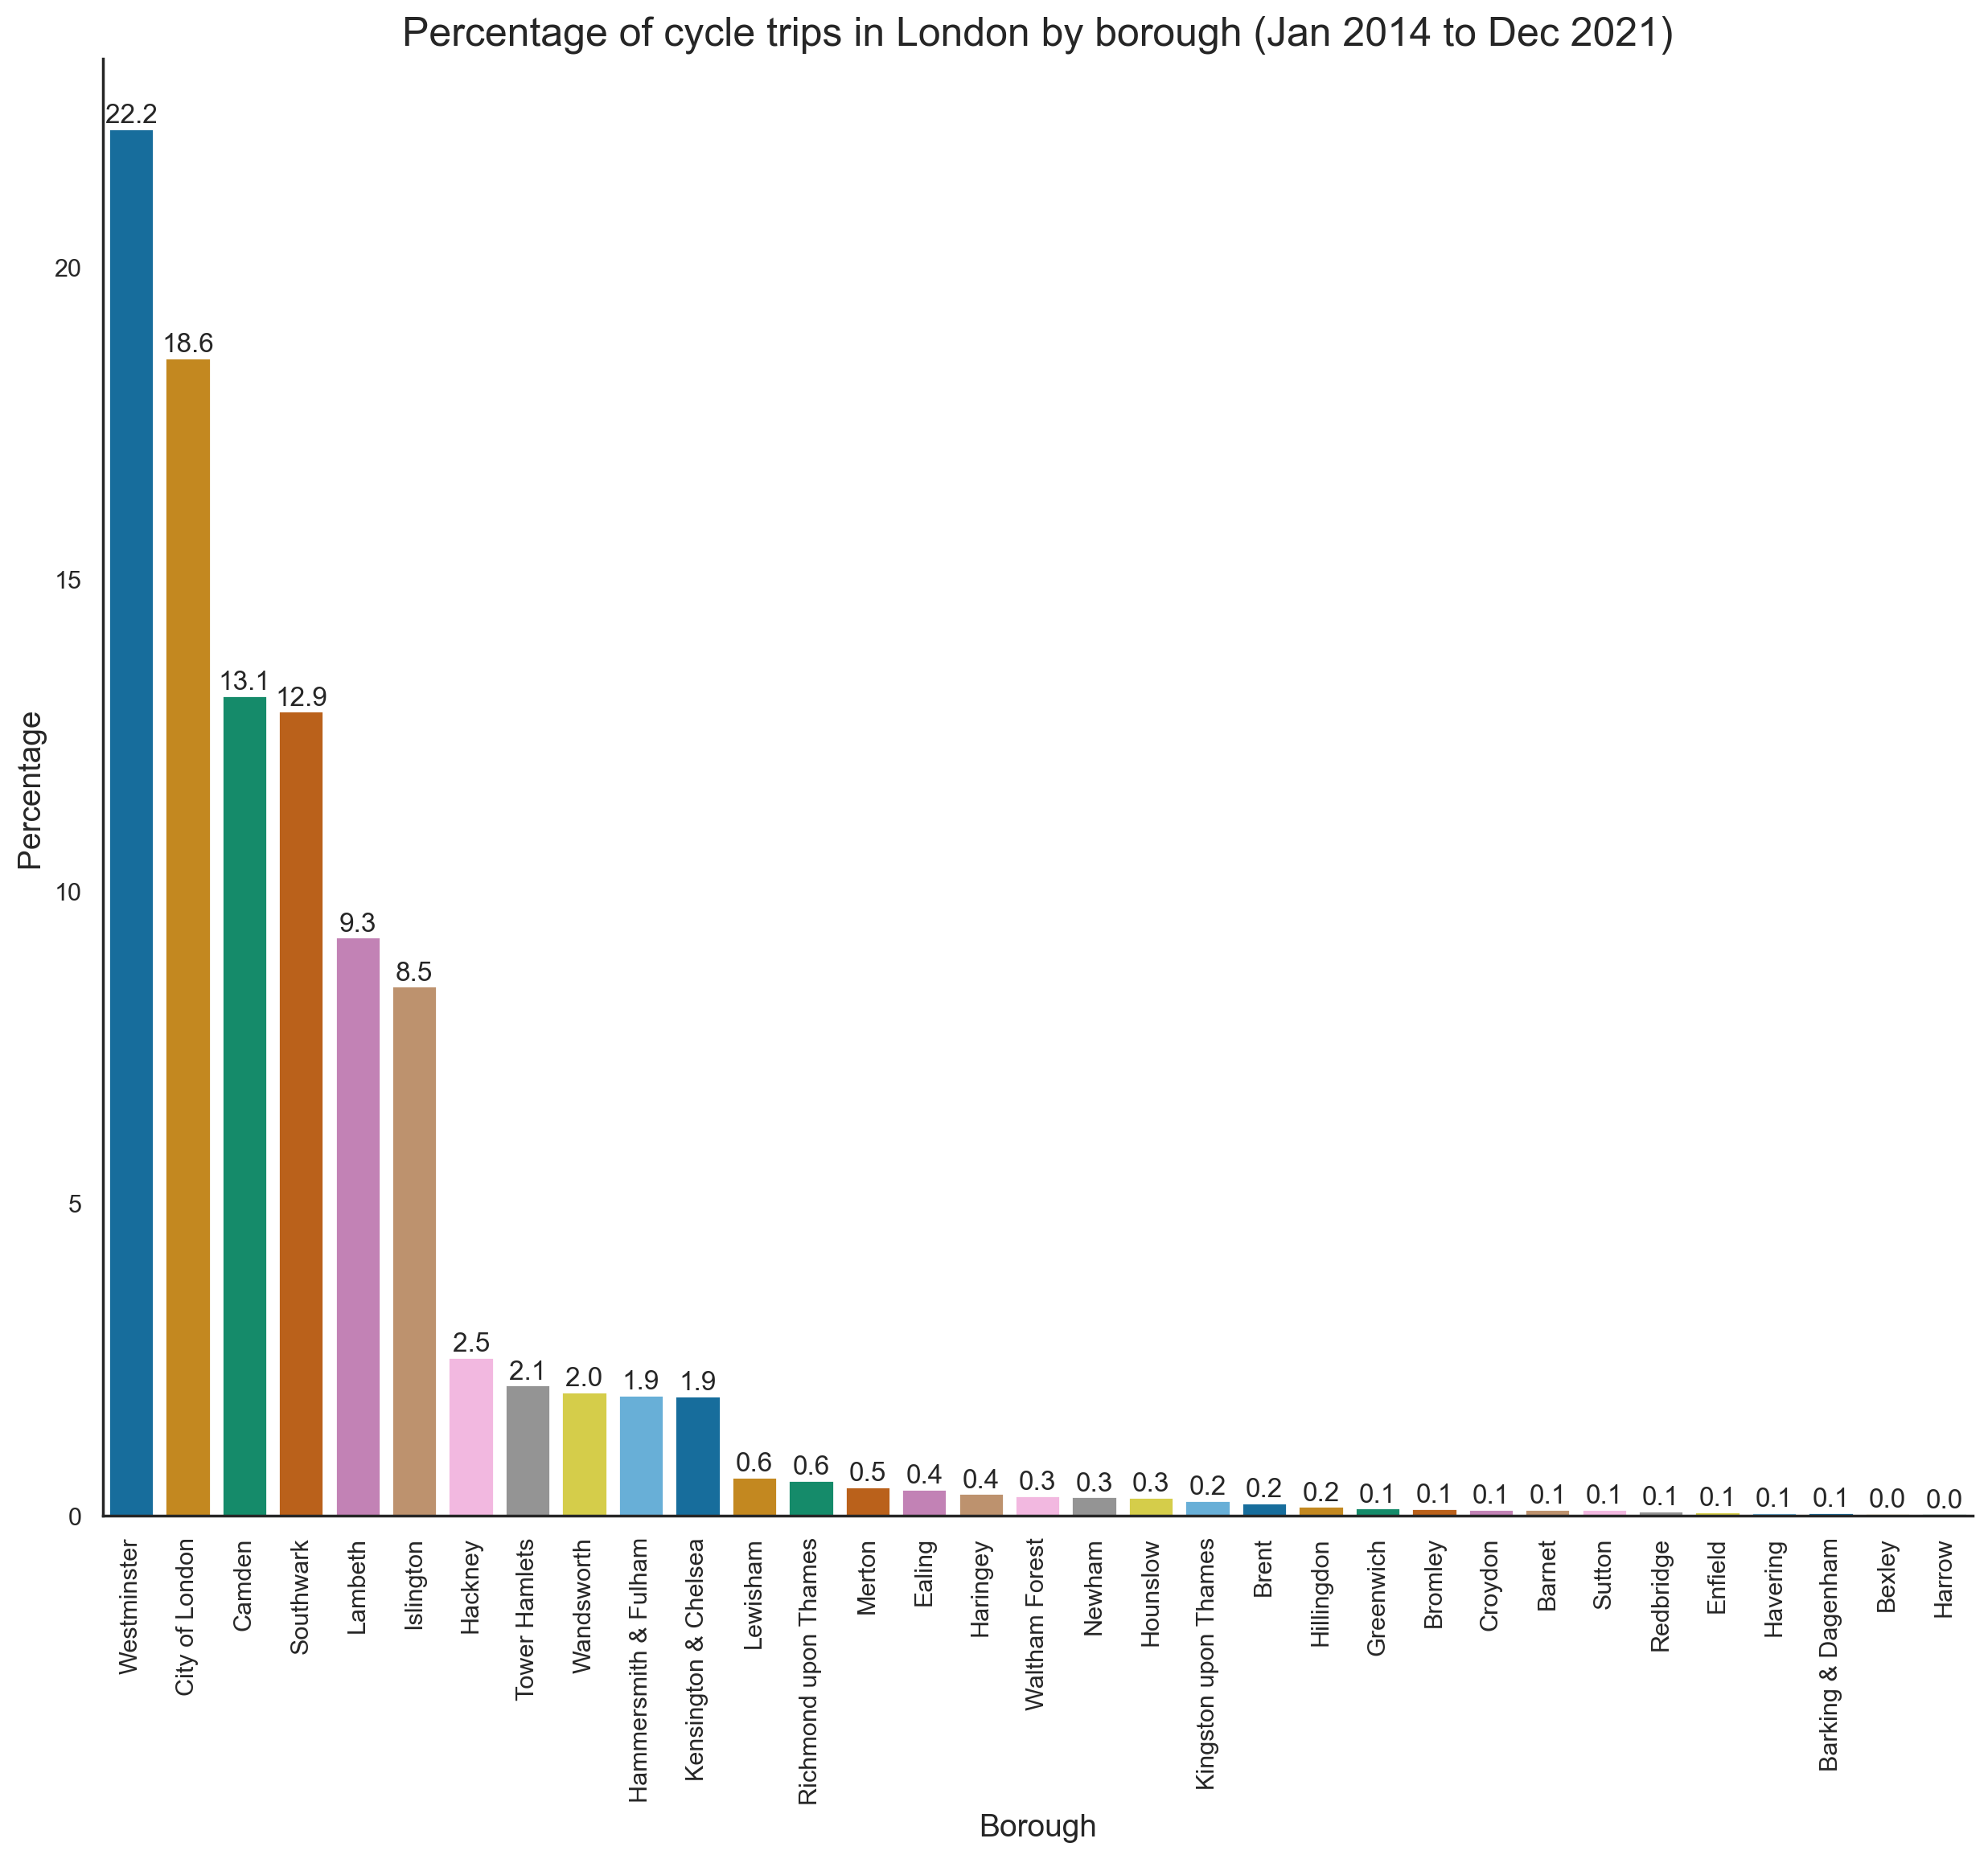

In [103]:
# Plot the number of trips by borough.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough.
fig1, ax = plt.subplots(dpi=200)
trips_borough_plot = sns.barplot(data = trips_borough, x = 'Borough', y = '%', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of cycle trips in London by borough (Jan 2014 to Dec 2021)', fontsize=18)
plt.xticks(rotation=90)

# Add a value to each bar.
trips_borough_plot.bar_label(trips_borough_plot.containers[0], label_type='edge', fmt='%.1f')

# Remove the top and right spines from the plot.
sns.despine(fig1)

# View the plot and save an image.
plt.show()
fig1.savefig('Percentage of cycle trips in London by borough (Jan 2014 to Dec 2021).jpg')

> It would be good to see how the boroughs compare if we introduce the population.

In [104]:
# Sum of density of trips by borough.
trips_density_borough = london_sites_census.groupby(['Borough', 'All persons'])[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()
                                                    
# Add a column to show percentages.
trips_density_borough['%'] = (trips_density_borough['Total cycles']/trips_density_borough['Total cycles'].sum()) * 100

# View the output.
trips_density_borough.round(2)

Borough  All persons  Total cycles      %
0            Westminster     204300.0       3659889  23.13
1         City of London       8600.0       3055574  19.31
2                 Camden     210100.0       2163728  13.67
3              Southwark     307700.0       2122714  13.42
4                Lambeth     317600.0       1526778   9.65
5              Islington     216600.0       1397875   8.83
6                Hackney     259200.0        418965   2.65
7          Tower Hamlets     310300.0        345992   2.19
8             Wandsworth     327500.0        327120   2.07
9               Lewisham     300600.0        102470   0.65
10  Richmond upon Thames     195200.0         93813   0.59
11                Merton     215200.0         77609   0.49
12                Ealing     367100.0         70745   0.45
13              Haringey     264200.0         59588   0.38
14        Waltham Forest     278400.0         53991   0.34
15                Newham     351100.0         50936   0.32
16              Hounslow     288200.0         49563   0.31
17  Kingston upon Thames     168000.0         40787   0.26
18                 Brent     339800.0         35177   0.22
19            Hillingdon     305900.0         25743   0.16
20             Greenwich     289100.0         21110   0.13
21               Bromley     330000.0         19663   0.12
22               Croydon     390800.0         18786   0.12
23                Barnet     389300.0         17893   0.11
24                Sutton     209600.0         17749   0.11
25             Redbridge     310300.0         13192   0.08
26               Enfield     330000.0         11564   0.07
27              Havering     262000.0         10318   0.07
28                Bexley     246500.0          7499   0.05
29                Harrow     261300.0          6514   0.04

In [105]:
# Create a new column with the trip density by population.
trips_density_borough['Trips density'] = trips_density_borough['Total cycles'] / trips_density_borough['All persons']

# View the DataFrame.
trips_density_borough.sort_values('Trips density', ascending=False)

Borough  All persons  Total cycles          %  Trips density
1         City of London       8600.0       3055574  19.310544     355.299302
0            Westminster     204300.0       3659889  23.129680      17.914288
2                 Camden     210100.0       2163728  13.674277      10.298563
3              Southwark     307700.0       2122714  13.415078       6.898648
5              Islington     216600.0       1397875   8.834257       6.453717
4                Lambeth     317600.0       1526778   9.648895       4.807236
6                Hackney     259200.0        418965   2.647765       1.616377
7          Tower Hamlets     310300.0        345992   2.186592       1.115024
8             Wandsworth     327500.0        327120   2.067325       0.998840
10  Richmond upon Thames     195200.0         93813   0.592877       0.480599
11                Merton     215200.0         77609   0.490472       0.360637
9               Lewisham     300600.0        102470   0.647587       0.340885
17  Kingston upon Thames     168000.0         40787   0.257765       0.242780
13              Haringey     264200.0         59588   0.376583       0.225541
14        Waltham Forest     278400.0         53991   0.341211       0.193933
12                Ealing     367100.0         70745   0.447093       0.192713
16              Hounslow     288200.0         49563   0.313227       0.171974
15                Newham     351100.0         50936   0.321904       0.145075
18                 Brent     339800.0         35177   0.222311       0.103523
24                Sutton     209600.0         17749   0.112170       0.084680
19            Hillingdon     305900.0         25743   0.162690       0.084155
20             Greenwich     289100.0         21110   0.133410       0.073020
21               Bromley     330000.0         19663   0.124266       0.059585
22               Croydon     390800.0         18786   0.118723       0.048071
23                Barnet     389300.0         17893   0.113080       0.045962
25             Redbridge     310300.0         13192   0.083370       0.042514
27              Havering     262000.0         10318   0.065207       0.039382
26               Enfield     330000.0         11564   0.073082       0.035042
28                Bexley     246500.0          7499   0.047392       0.030422
29                Harrow     261300.0          6514   0.041167       0.024929

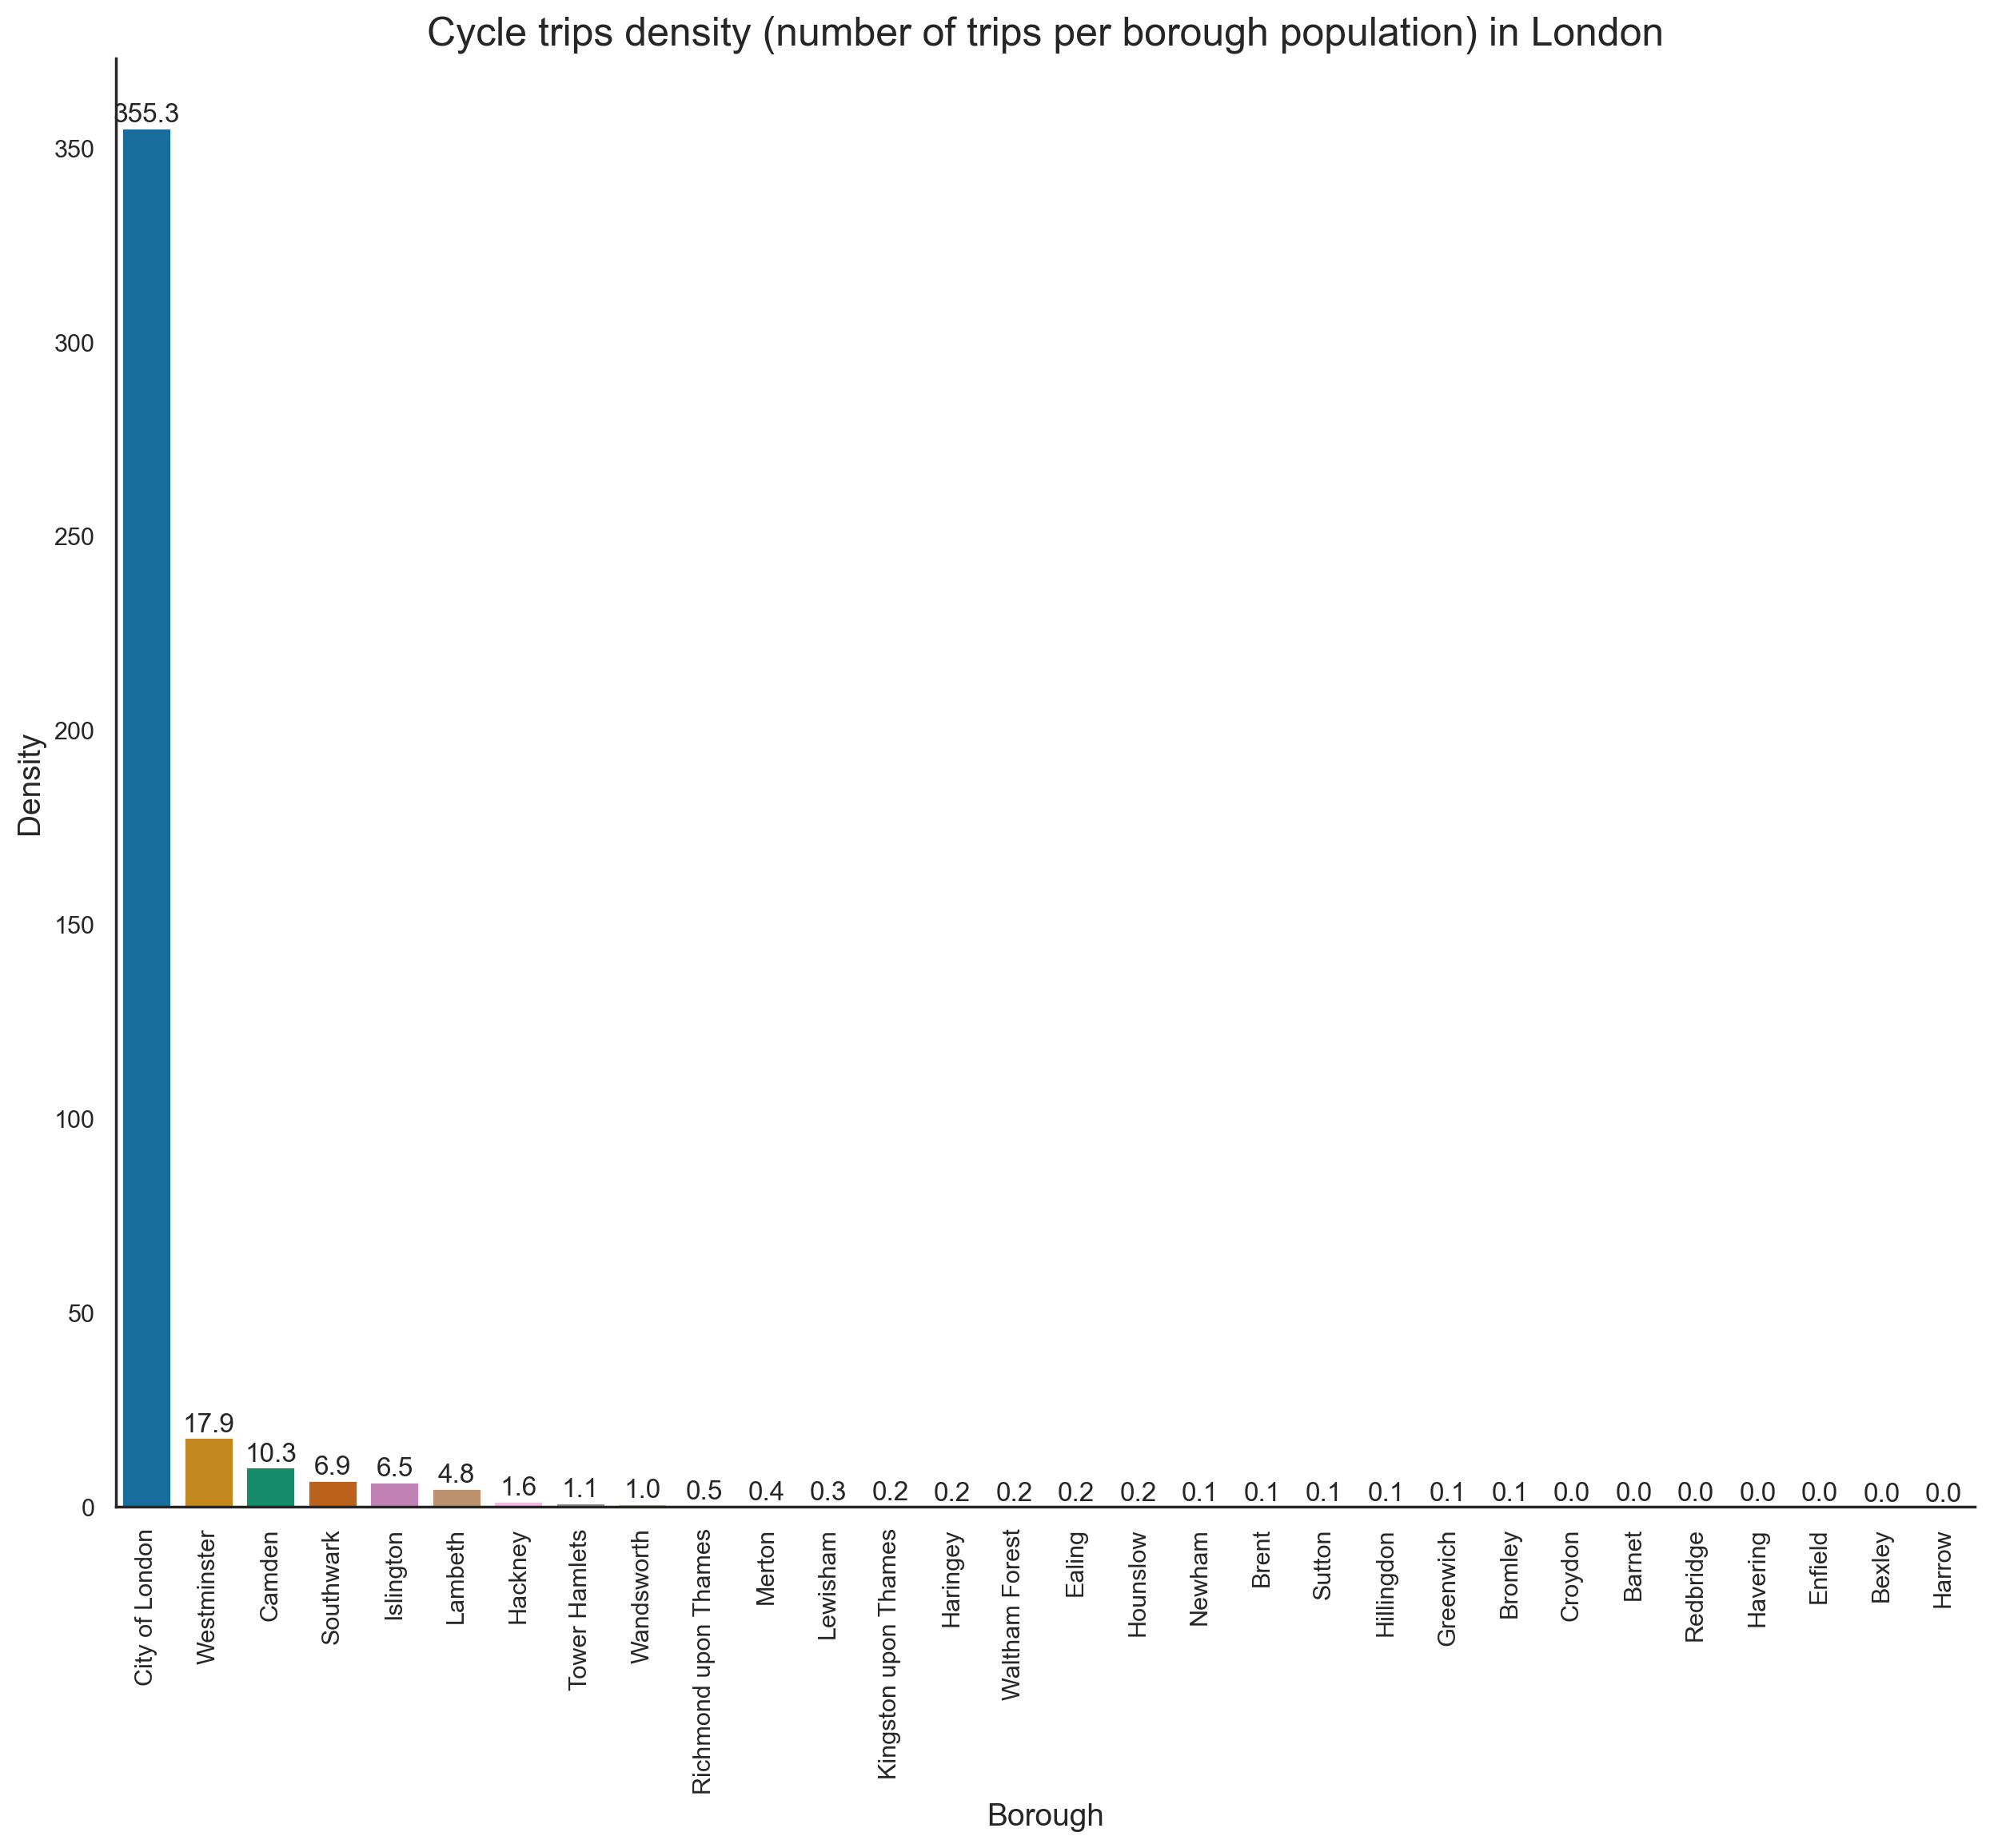

In [106]:
# Plot the number of trips by density.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough.
fig2, ax = plt.subplots(dpi=200)
trips_density_borough_plot = sns.barplot(data = trips_density_borough.sort_values(by='Trips density', ascending=False),
                                         x = 'Borough', y = 'Trips density', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Cycle trips density (number of trips per borough population) in London', fontsize=18)
plt.xticks(rotation=90)

# Add a value to each bar.
trips_density_borough_plot.bar_label(trips_density_borough_plot.containers[0], label_type='edge', fmt='%.1f')

# Remove the top and right spines from the plot.
sns.despine(fig2)

# View the plot and save an image.
plt.show()
fig2.savefig('Cycle trips density (number of trips per borough population) in London.jpg')

> City of London is clearly the borough which take the most cycle trips by population.

In [107]:
# Sum of total trips by borough by area.
trips_area = london_sites_census.groupby(['Functional cycling area','Borough', 'All persons'])[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()

# Add a column to show percentages.
trips_area['%'] = (trips_area['Total cycles']/trips_area['Total cycles'].sum()) * 100

# View the output.
trips_area.round(2)

Functional cycling area               Borough  All persons  Total cycles  \
0                  Central           Westminster     204300.0       3372732   
1                  Central        City of London       8600.0       3055574   
2                  Central                Camden     210100.0       1989981   
3                  Central             Southwark     307700.0       1878811   
4                  Central               Lambeth     317600.0       1262180   
5                  Central             Islington     216600.0       1003467   
6                    Inner             Islington     216600.0        394408   
7                    Inner               Hackney     259200.0        382455   
8                    Inner            Wandsworth     327500.0        326705   
9                    Inner         Tower Hamlets     310300.0        319528   
10                   Inner           Westminster     204300.0        287157   
11                   Inner               Lambeth     317600.0        263300   
12                   Inner             Southwark     307700.0        243903   
13                   Inner                Camden     210100.0        173747   
14                   Outer  Richmond upon Thames     195200.0         78765   
15                   Inner              Lewisham     300600.0         69685   
16                   Outer                Ealing     367100.0         51350   
17                   Outer              Hounslow     288200.0         48027   
18                   Outer                Newham     351100.0         43854   
19                   Inner                Merton     215200.0         41727   
20                   Outer  Kingston upon Thames     168000.0         40787   
21                 Central               Hackney     259200.0         36510   
22                   Outer                Merton     215200.0         35882   
23                   Outer              Lewisham     300600.0         32785   
24                   Outer        Waltham Forest     278400.0         31004   
25                   Inner              Haringey     264200.0         30850   
26                   Outer              Haringey     264200.0         28738   
27                   Outer                 Brent     339800.0         27177   
28                 Central         Tower Hamlets     310300.0         26464   
29                   Outer            Hillingdon     305900.0         25743   
30                   Inner        Waltham Forest     278400.0         22987   
31                   Outer             Greenwich     289100.0         20546   
32                   Inner                Ealing     367100.0         19395   
33                   Outer               Croydon     390800.0         18786   
34                   Outer               Bromley     330000.0         18359   
35                   Outer                Barnet     389300.0         17893   
36                   Outer                Sutton     209600.0         17749   
37                   Inner  Richmond upon Thames     195200.0         15048   
38                   Outer             Redbridge     310300.0         13192   
39                   Outer               Enfield     330000.0         11564   
40                   Outer              Havering     262000.0         10318   
41                   Inner                 Brent     339800.0          8000   
42                   Outer                Bexley     246500.0          7499   
43                   Inner                Newham     351100.0          7082   
44                   Outer                Harrow     261300.0          6514   
45                   Inner              Hounslow     288200.0          1536   
46                   Inner               Bromley     330000.0          1304   
47                   Outer               Lambeth     317600.0          1298   
48                   Inner             Greenwich     289100.0           564   
49                   Outer            Wandsworth     

In [108]:
# Create a new column with the trip density by population.
trips_area['Trips density'] = trips_area['Total cycles'] / trips_area['All persons']

# View the DataFrame.
trips_area

Functional cycling area               Borough  All persons  Total cycles  \
0                  Central           Westminster     204300.0       3372732   
1                  Central        City of London       8600.0       3055574   
2                  Central                Camden     210100.0       1989981   
3                  Central             Southwark     307700.0       1878811   
4                  Central               Lambeth     317600.0       1262180   
5                  Central             Islington     216600.0       1003467   
6                    Inner             Islington     216600.0        394408   
7                    Inner               Hackney     259200.0        382455   
8                    Inner            Wandsworth     327500.0        326705   
9                    Inner         Tower Hamlets     310300.0        319528   
10                   Inner           Westminster     204300.0        287157   
11                   Inner               Lambeth     317600.0        263300   
12                   Inner             Southwark     307700.0        243903   
13                   Inner                Camden     210100.0        173747   
14                   Outer  Richmond upon Thames     195200.0         78765   
15                   Inner              Lewisham     300600.0         69685   
16                   Outer                Ealing     367100.0         51350   
17                   Outer              Hounslow     288200.0         48027   
18                   Outer                Newham     351100.0         43854   
19                   Inner                Merton     215200.0         41727   
20                   Outer  Kingston upon Thames     168000.0         40787   
21                 Central               Hackney     259200.0         36510   
22                   Outer                Merton     215200.0         35882   
23                   Outer              Lewisham     300600.0         32785   
24                   Outer        Waltham Forest     278400.0         31004   
25                   Inner              Haringey     264200.0         30850   
26                   Outer              Haringey     264200.0         28738   
27                   Outer                 Brent     339800.0         27177   
28                 Central         Tower Hamlets     310300.0         26464   
29                   Outer            Hillingdon     305900.0         25743   
30                   Inner        Waltham Forest     278400.0         22987   
31                   Outer             Greenwich     289100.0         20546   
32                   Inner                Ealing     367100.0         19395   
33                   Outer               Croydon     390800.0         18786   
34                   Outer               Bromley     330000.0         18359   
35                   Outer                Barnet     389300.0         17893   
36                   Outer                Sutton     209600.0         17749   
37                   Inner  Richmond upon Thames     195200.0         15048   
38                   Outer             Redbridge     310300.0         13192   
39                   Outer               Enfield     330000.0         11564   
40                   Outer              Havering     262000.0         10318   
41                   Inner                 Brent     339800.0          8000   
42                   Outer                Bexley     246500.0          7499   
43                   Inner                Newham     351100.0          7082   
44                   Outer                Harrow     261300.0          6514   
45                   Inner              Hounslow     288200.0          1536   
46                   Inner               Bromley     330000.0          1304   
47                   Outer               Lambeth     317600.0          1298   
48                   Inner             Greenwich     289100.0           564   
49                   Outer            Wandsworth     

In [109]:
# Create a CSV file as output.
trips_area.to_csv('trips_area.csv', index=False)

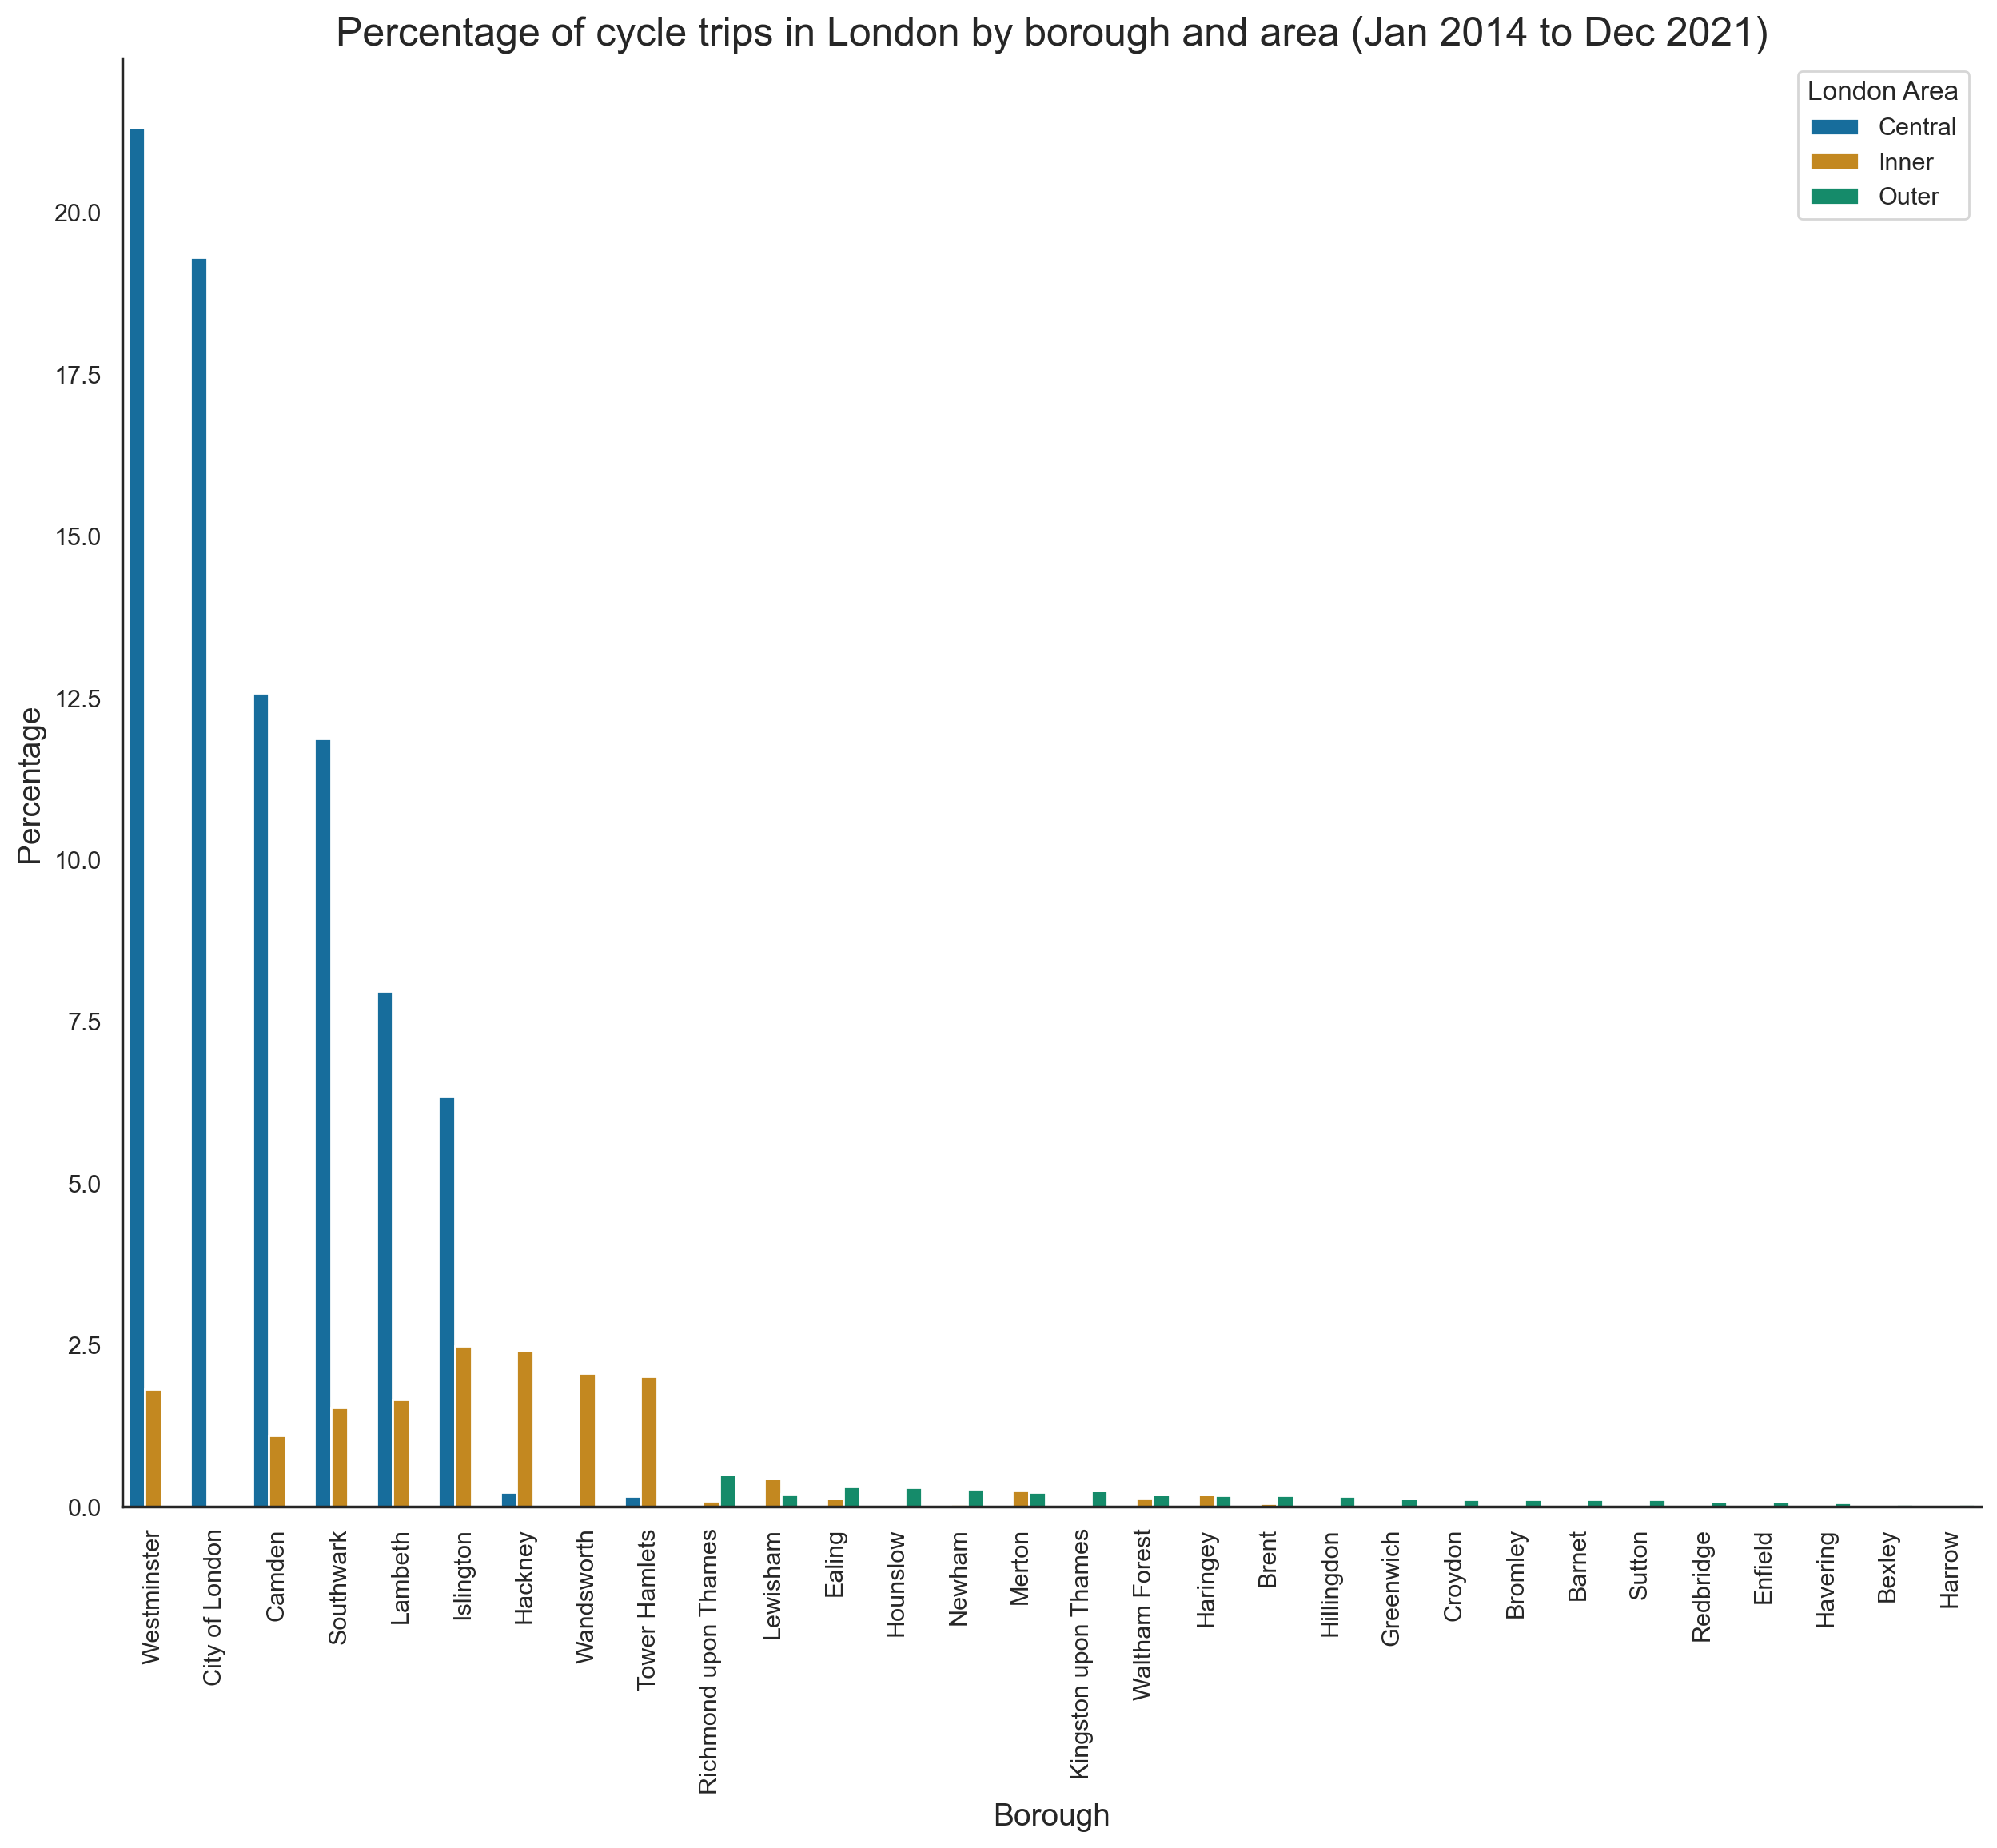

In [110]:
# Plot the number of trips by borough and area.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough and area.
fig3, ax = plt.subplots(dpi=200)
sns.barplot(data = trips_area, x = 'Borough', y = '%', hue = 'Functional cycling area', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of cycle trips in London by borough and area (Jan 2014 to Dec 2021)', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig3)

# Edit the legend
plt.legend(loc='upper right', title='London Area')

# View the plot and save an image.
plt.show()
fig3.savefig('Percentage of cycle trips in London by borough and area (Jan 2014 to Dec 2021).jpg')

In [111]:
# Create a separate dataset only for Central London. 
trips_central = trips_area[trips_area['Functional cycling area'] == 'Central']
trips_central

Functional cycling area         Borough  All persons  Total cycles  \
0                  Central     Westminster     204300.0       3372732   
1                  Central  City of London       8600.0       3055574   
2                  Central          Camden     210100.0       1989981   
3                  Central       Southwark     307700.0       1878811   
4                  Central         Lambeth     317600.0       1262180   
5                  Central       Islington     216600.0       1003467   
21                 Central         Hackney     259200.0         36510   
28                 Central   Tower Hamlets     310300.0         26464   

            %  Trips density  
0   21.314912      16.508722  
1   19.310544     355.299302  
2   12.576235       9.471590  
3   11.873665       6.105983  
4    7.976695       3.974118  
5    6.341687       4.632812  
21   0.230735       0.140856  
28   0.167247       0.085285

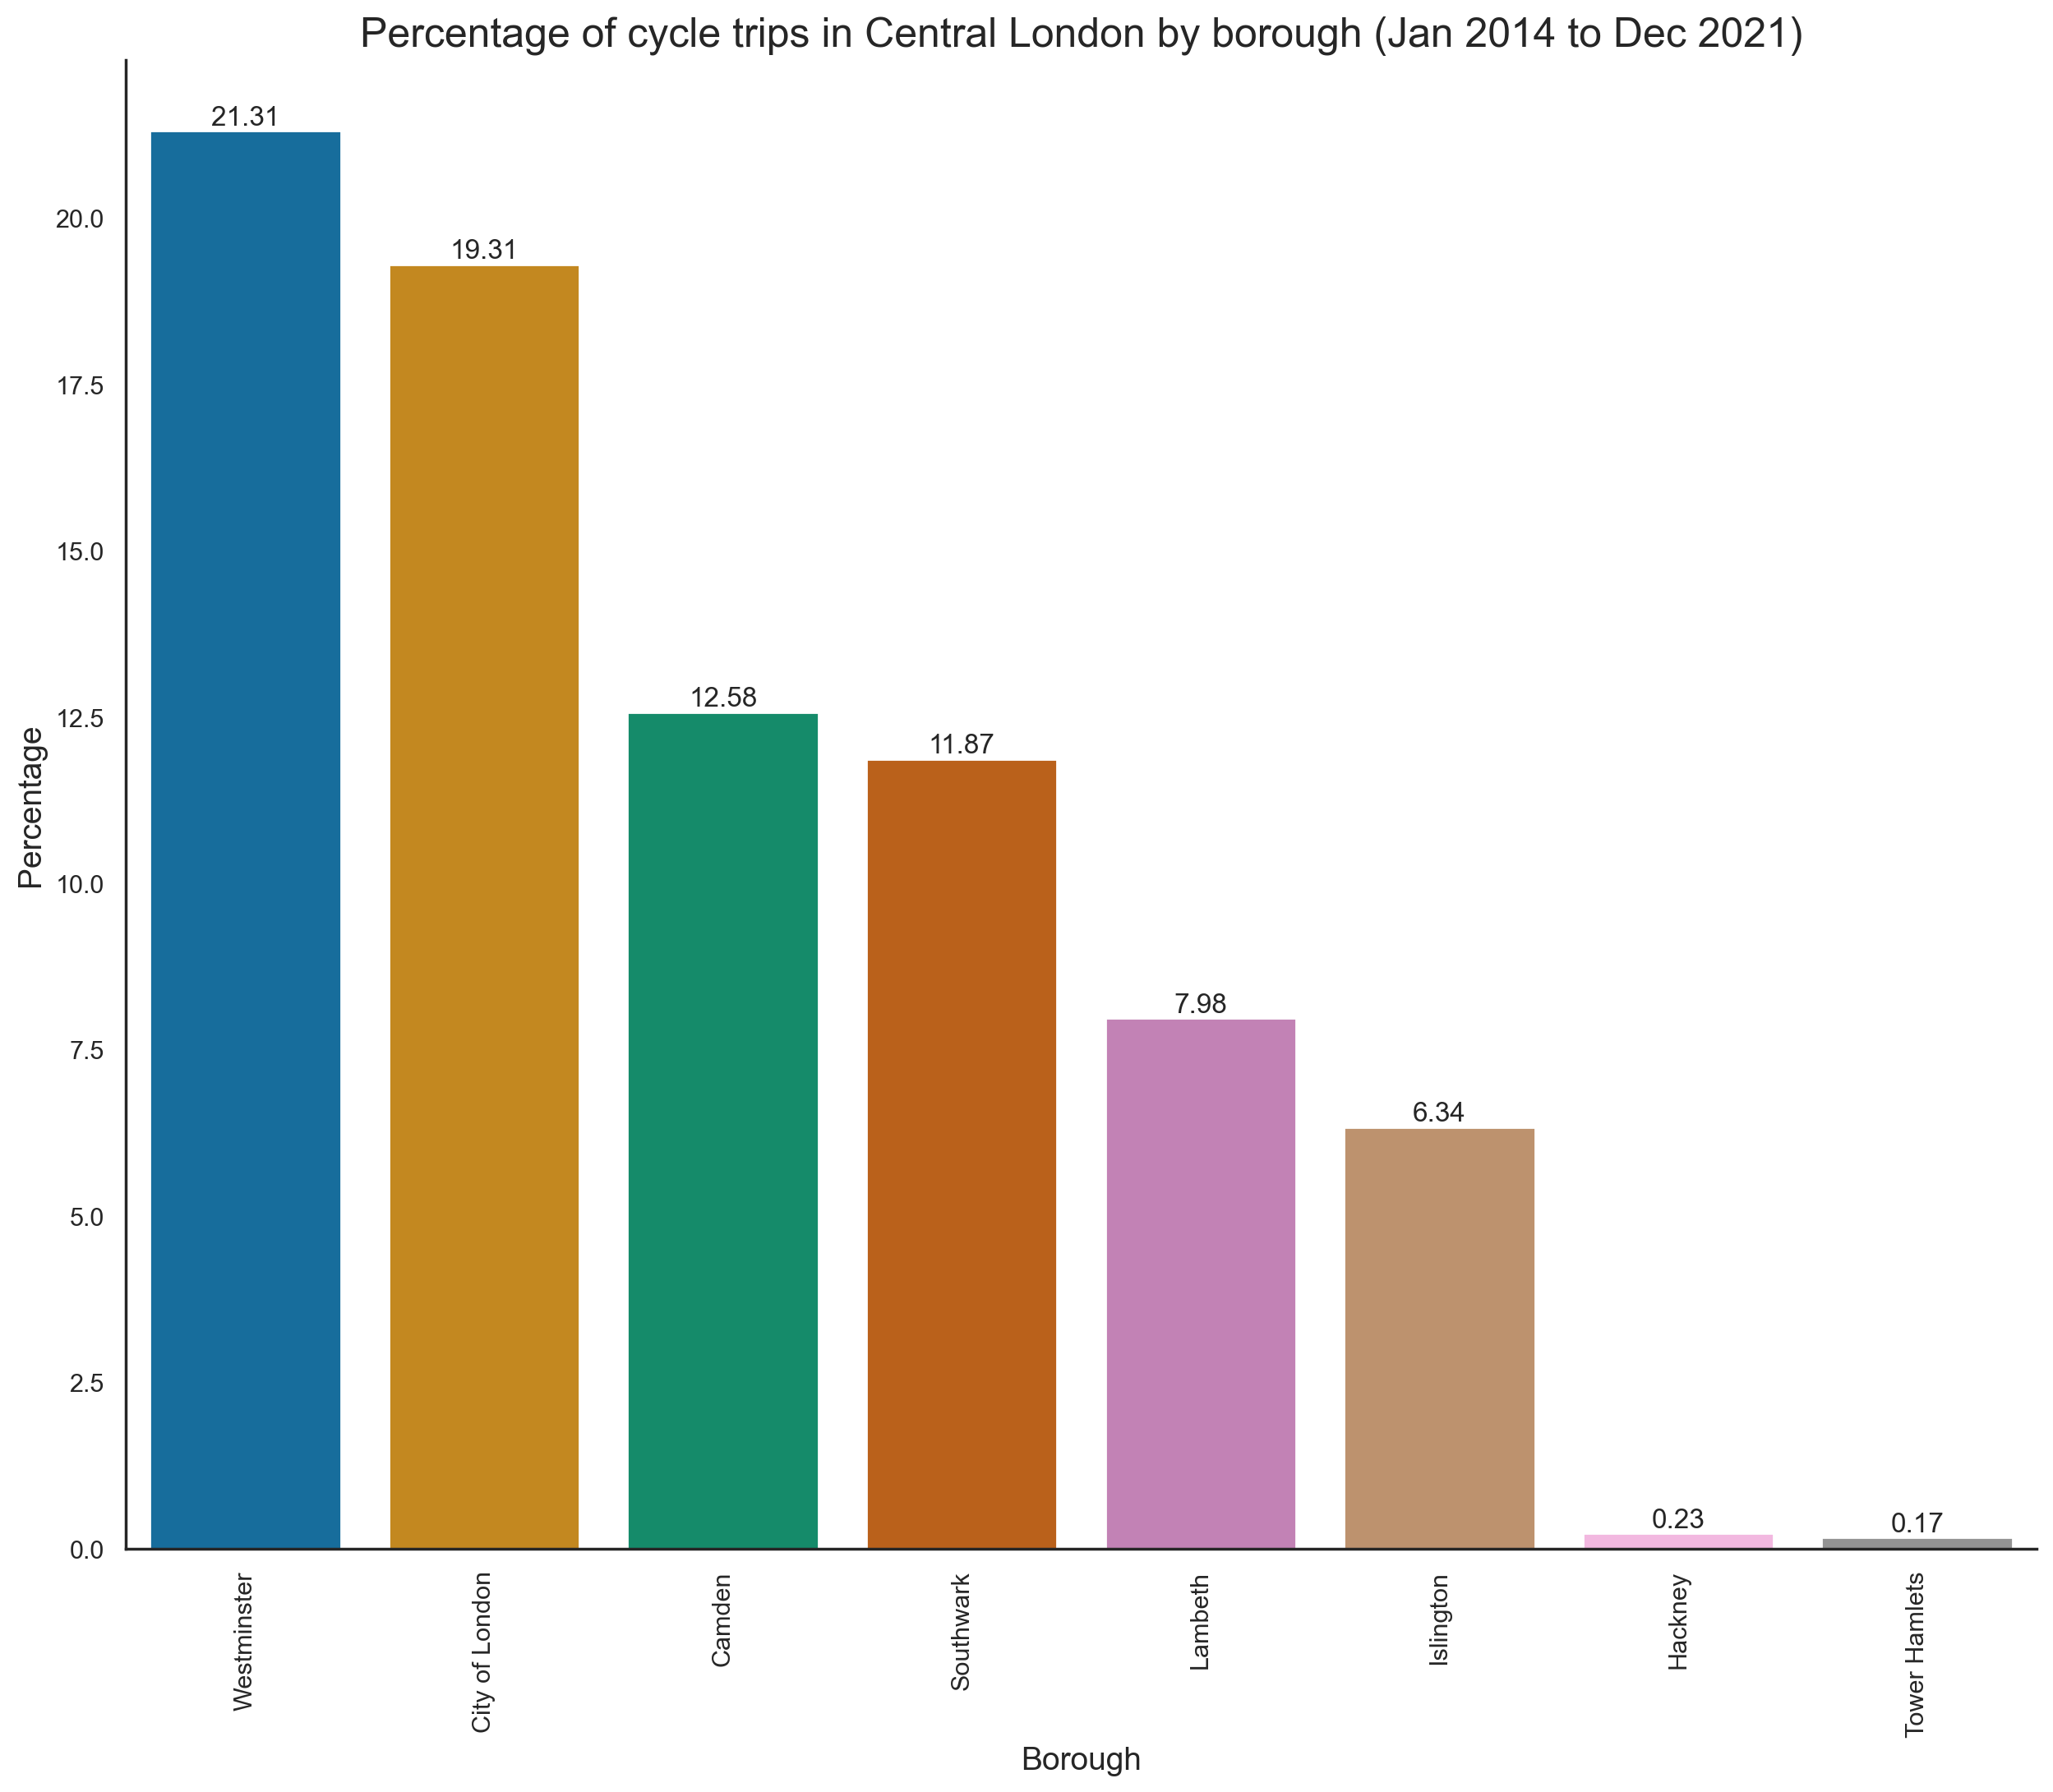

In [112]:
# Plot the number of trips by borough in Central London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough in Central London.
fig4, ax = plt.subplots(dpi=200)
trips_central_plot = sns.barplot(data = trips_central, x = 'Borough', y = '%', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of cycle trips in Central London by borough (Jan 2014 to Dec 2021)', fontsize=18)
plt.xticks(rotation=90)

# Add a value to each bar.
trips_central_plot.bar_label(trips_central_plot.containers[0], label_type='edge', fmt='%.2f')

# Remove the top and right spines from the plot.
sns.despine(fig4)

# View the plot and save an image.
plt.show()
fig4.savefig('Percentage of cycle trips in Central London by borough (Jan 2014 to Dec 2021).jpg')

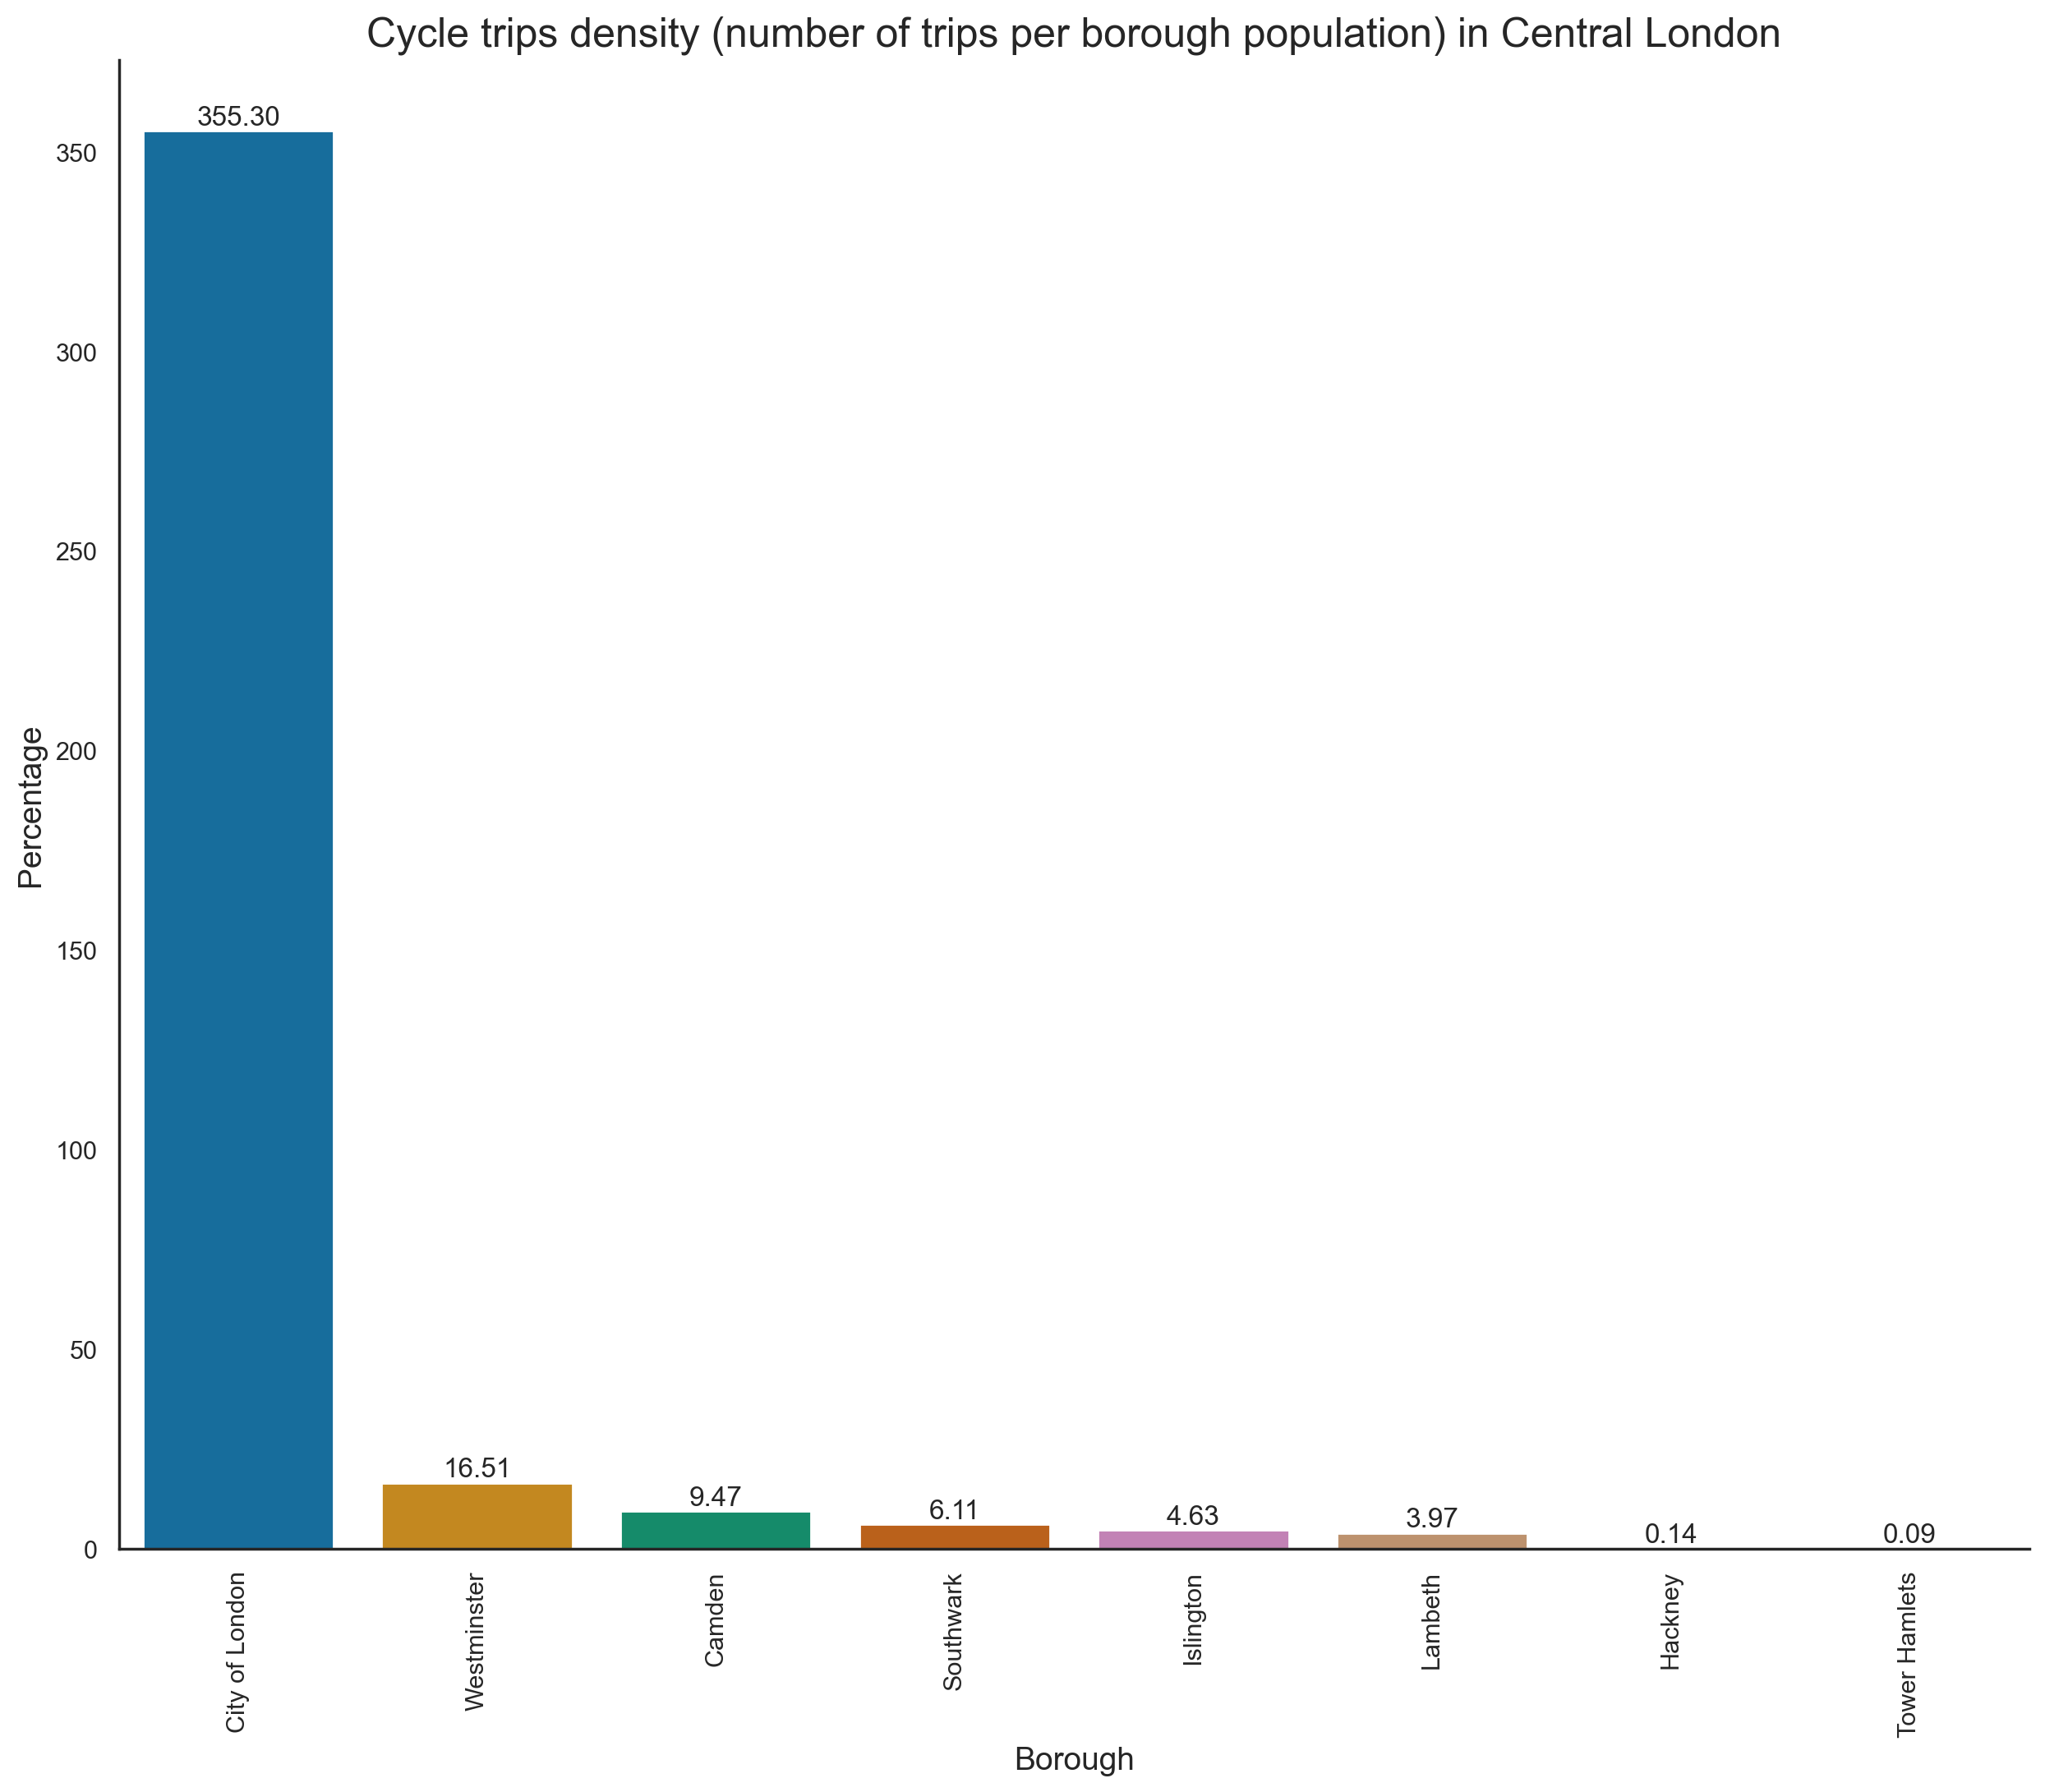

In [113]:
# Plot the density of trips by borough in Central London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough in Central London.
fig5, ax = plt.subplots(dpi=200)
trips_central_density_plot = sns.barplot(data = trips_central.sort_values(by='Trips density', ascending=False), 
                                         x = 'Borough', y = 'Trips density', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Cycle trips density (number of trips per borough population) in Central London', fontsize=18)
plt.xticks(rotation=90)

# Add a value to each bar.
trips_central_density_plot.bar_label(trips_central_density_plot.containers[0], label_type='edge', fmt='%.2f')

# Remove the top and right spines from the plot.
sns.despine(fig5)

# View the plot and save an image.
plt.show()
fig5.savefig('Cycle trips density (number of trips per borough population) in Central London.jpg')

In [114]:
# Create a separate dataset only for Inner London. 
trips_inner = trips_area[trips_area['Functional cycling area'] == 'Inner']
trips_inner

Functional cycling area               Borough  All persons  Total cycles  \
6                    Inner             Islington     216600.0        394408   
7                    Inner               Hackney     259200.0        382455   
8                    Inner            Wandsworth     327500.0        326705   
9                    Inner         Tower Hamlets     310300.0        319528   
10                   Inner           Westminster     204300.0        287157   
11                   Inner               Lambeth     317600.0        263300   
12                   Inner             Southwark     307700.0        243903   
13                   Inner                Camden     210100.0        173747   
15                   Inner              Lewisham     300600.0         69685   
19                   Inner                Merton     215200.0         41727   
25                   Inner              Haringey     264200.0         30850   
30                   Inner        Waltham Forest     278400.0         22987   
32                   Inner                Ealing     367100.0         19395   
37                   Inner  Richmond upon Thames     195200.0         15048   
41                   Inner                 Brent     339800.0          8000   
43                   Inner                Newham     351100.0          7082   
45                   Inner              Hounslow     288200.0          1536   
46                   Inner               Bromley     330000.0          1304   
48                   Inner             Greenwich     289100.0           564   

           %  Trips density  
6   2.492570       1.820905  
7   2.417030       1.475521  
8   2.064703       0.997573  
9   2.019345       1.029739  
10  1.814768       1.405565  
11  1.663997       0.829030  
12  1.541412       0.792665  
13  1.098042       0.826973  
15  0.440394       0.231820  
19  0.263705       0.193899  
25  0.194965       0.116768  
30  0.145273       0.082568  
32  0.122572       0.052833  
37  0.095100       0.077090  
41  0.050558       0.023543  
43  0.044757       0.020171  
45  0.009707       0.005330  
46  0.008241       0.003952  
48  0.003564       0.001951

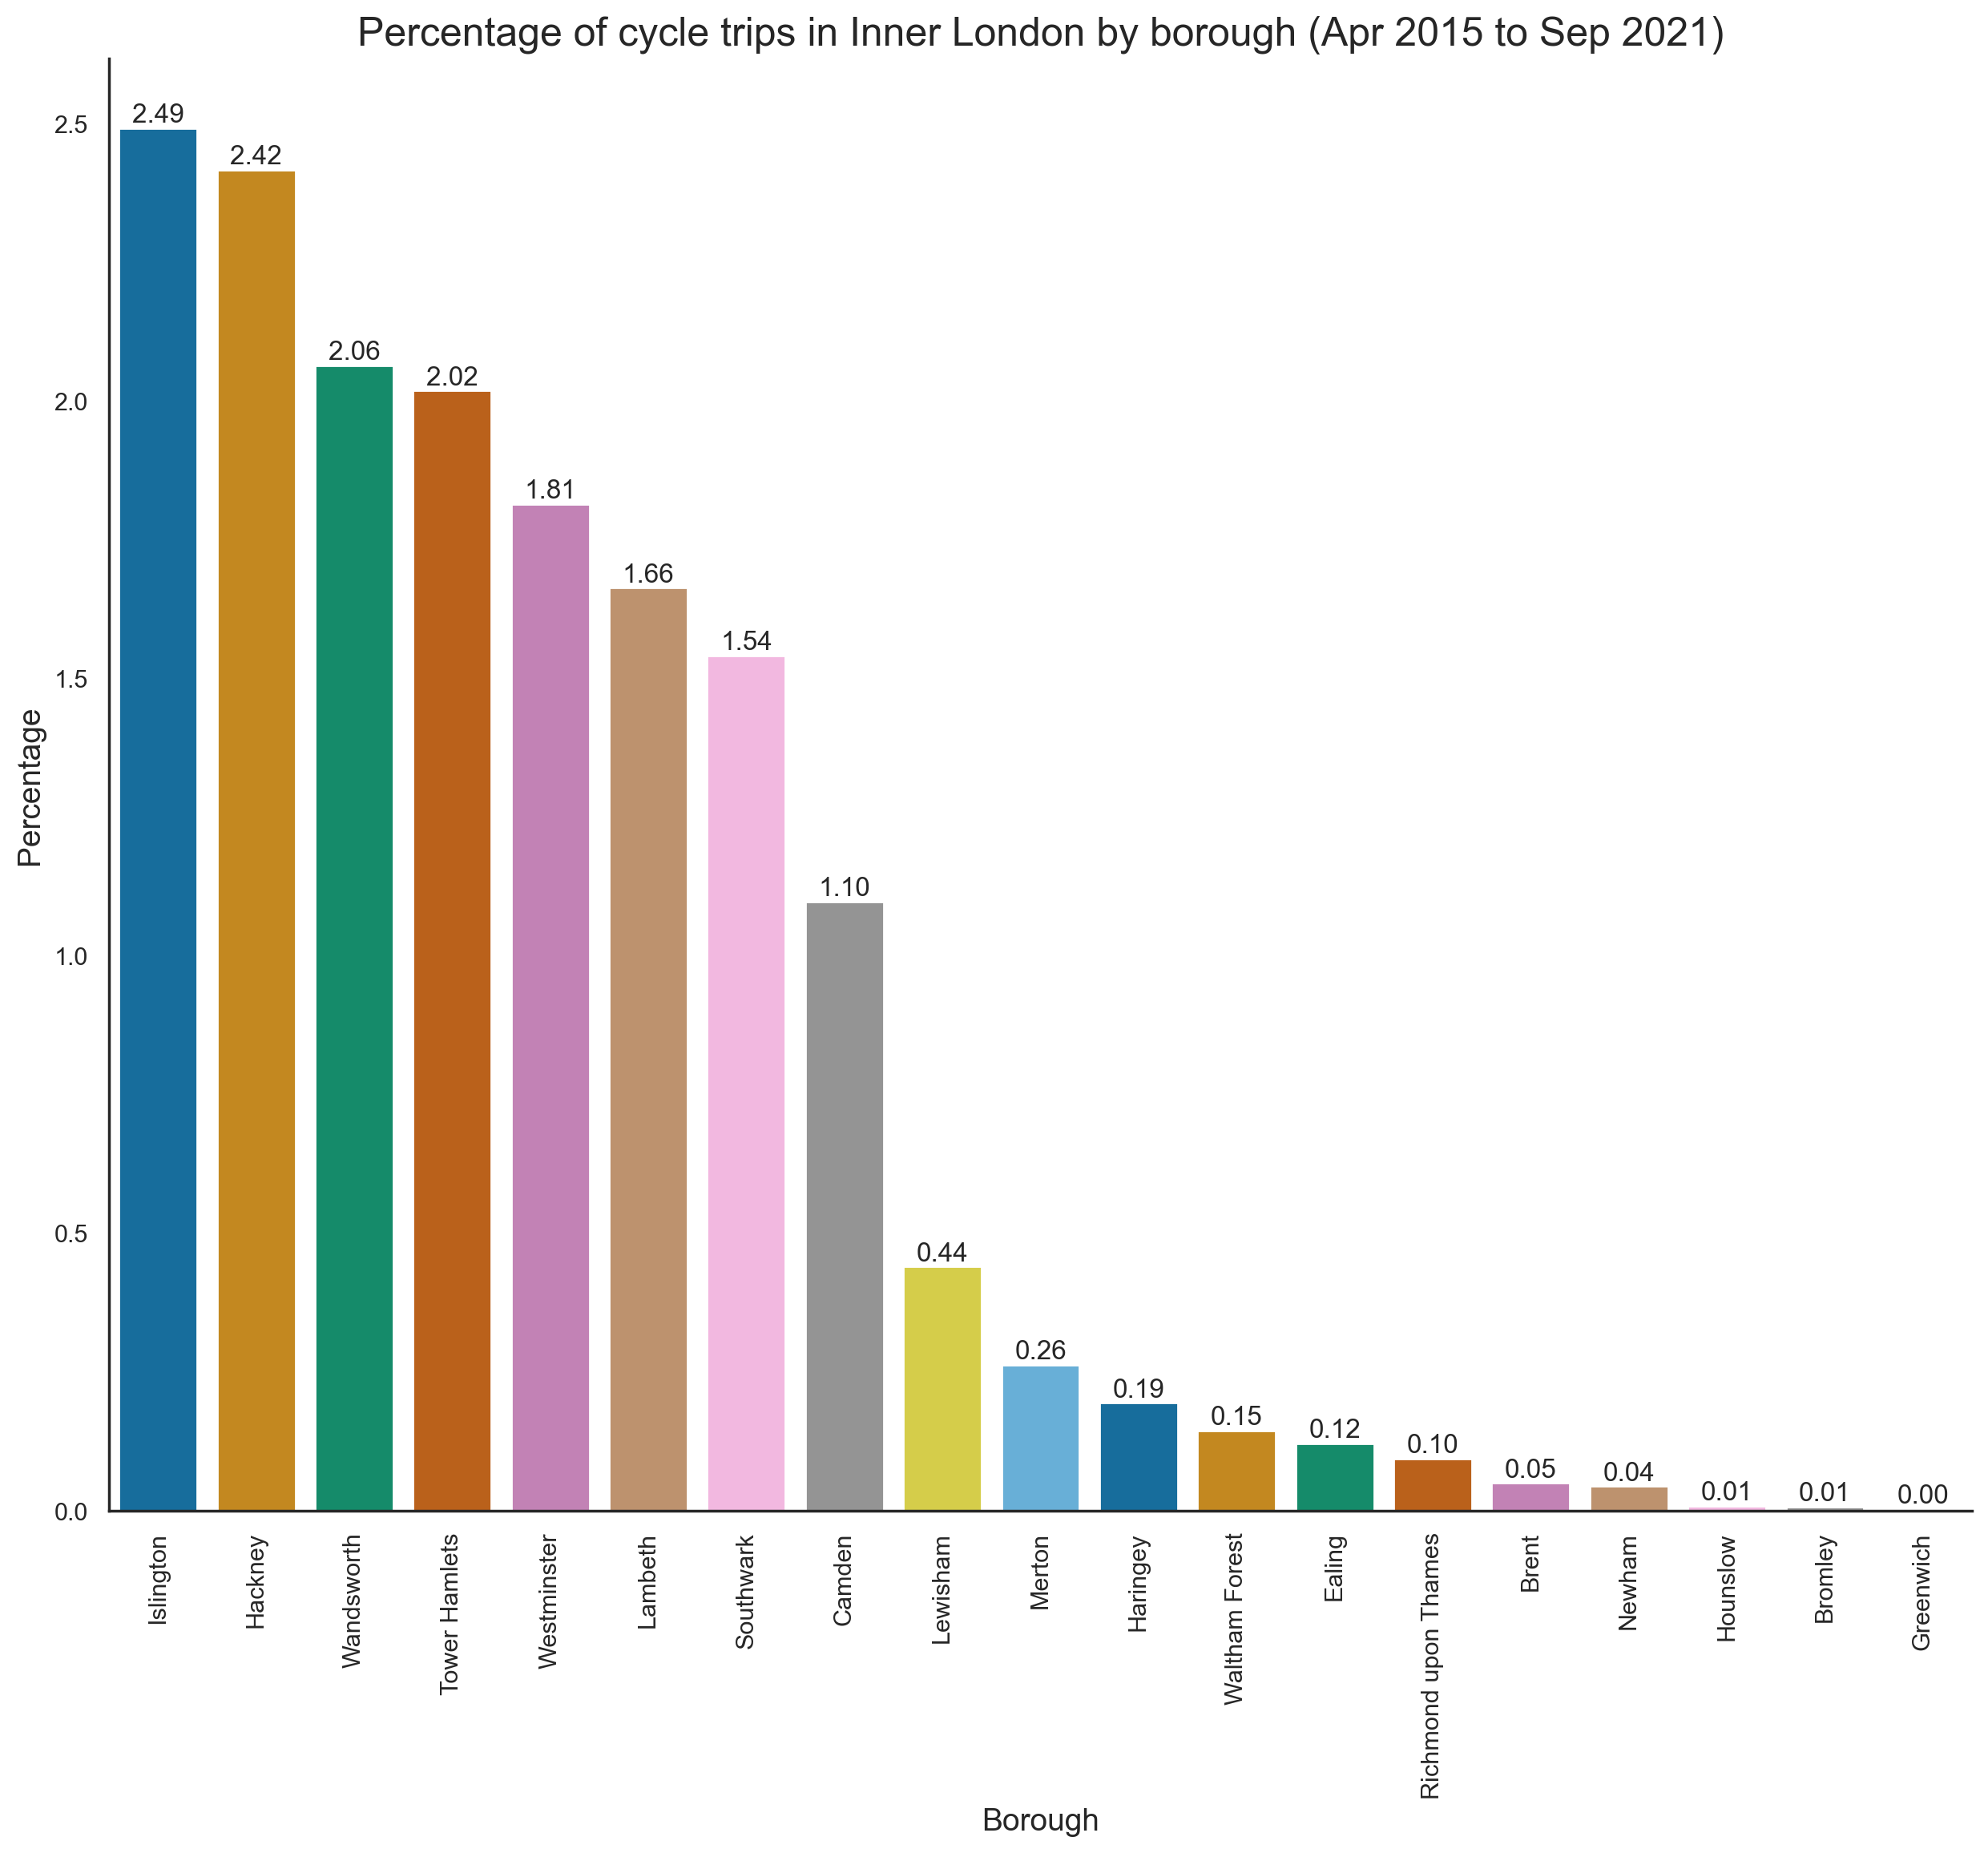

In [115]:
# Plot the number of trips by borough in Inner London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough in Inner London.
fig6, ax = plt.subplots(dpi=200)
trips_inner_plot = sns.barplot(data = trips_inner, x = 'Borough', y = '%', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of cycle trips in Inner London by borough (Apr 2015 to Sep 2021)', fontsize=18)
plt.xticks(rotation=90)

# Add a value to each bar.
trips_inner_plot.bar_label(trips_inner_plot.containers[0], label_type='edge', fmt='%.2f')

# Remove the top and right spines from the plot.
sns.despine(fig6)

# View the plot and save an image.
plt.show()
fig6.savefig('Percentage of cycle trips in Inner London by borough (Apr 2015 to Sep 2021).jpg')

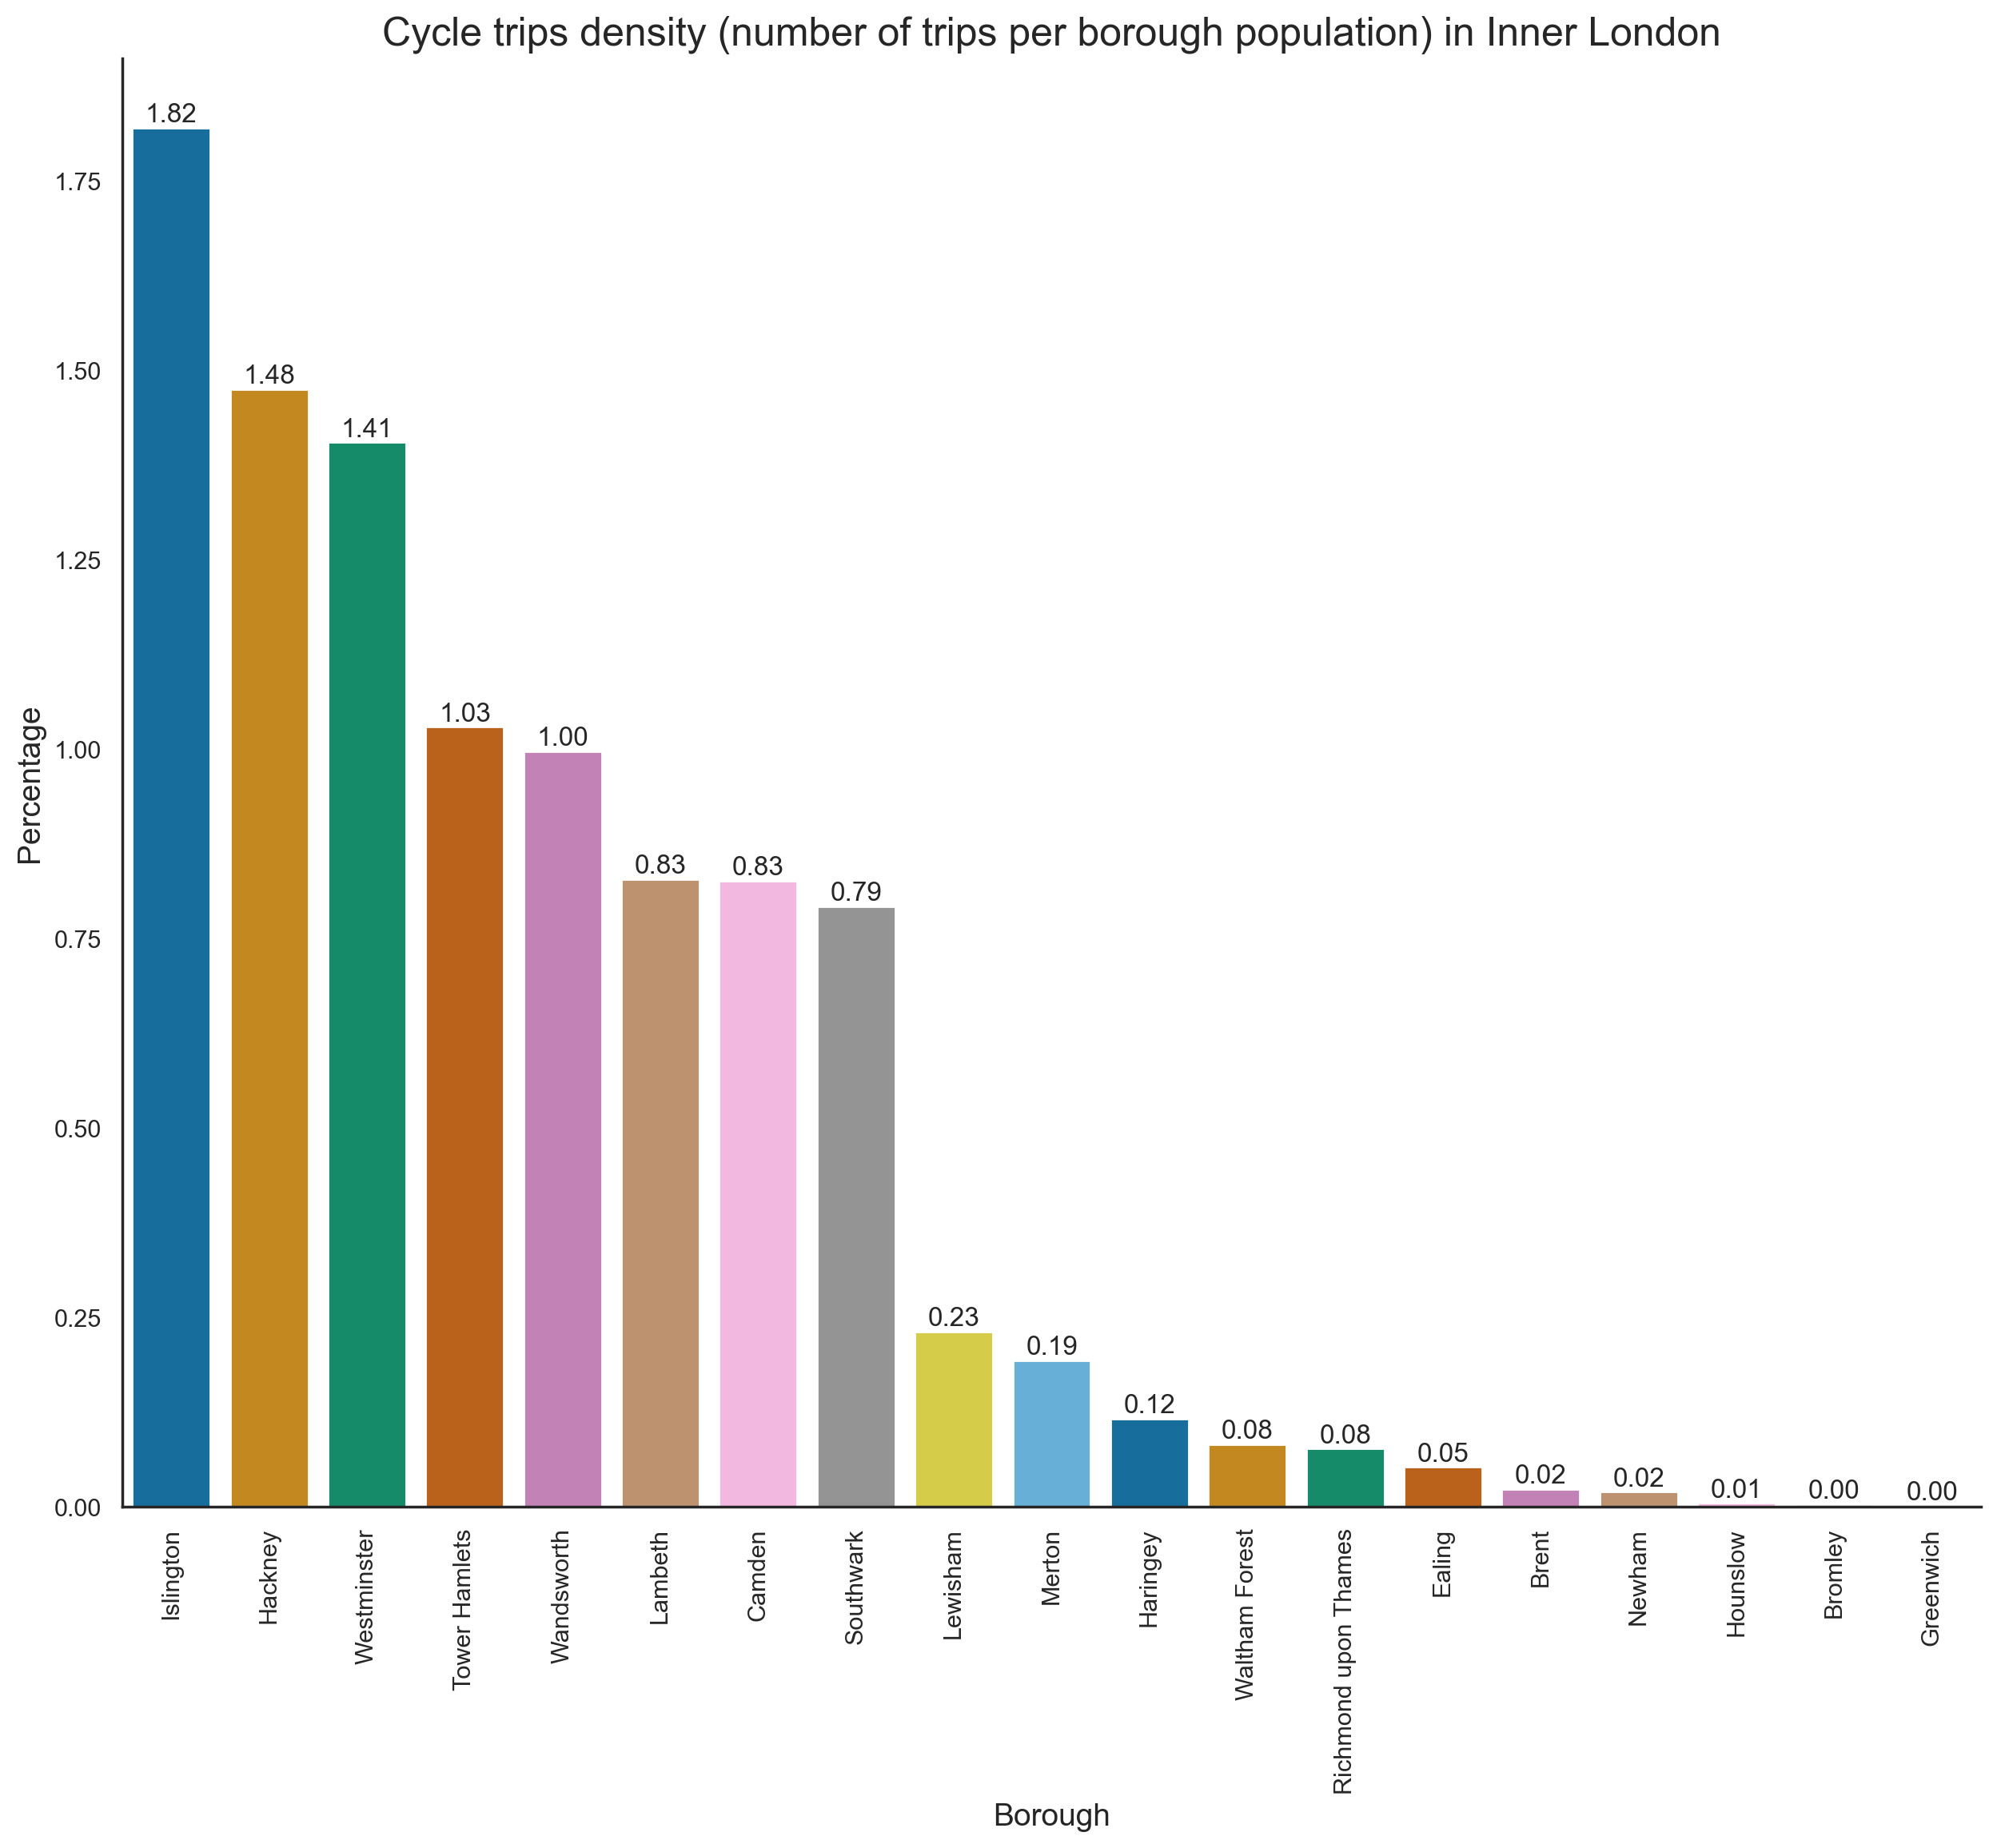

In [116]:
# Plot the density of trips by borough in Inner London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough in Inner London.
fig7, ax = plt.subplots(dpi=200)
trips_inner_density_plot = sns.barplot(data = trips_inner.sort_values(by='Trips density', ascending=False), 
                                         x = 'Borough', y = 'Trips density', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Cycle trips density (number of trips per borough population) in Inner London', fontsize=18)
plt.xticks(rotation=90)

# Add a value to each bar.
trips_inner_density_plot.bar_label(trips_inner_density_plot.containers[0], label_type='edge', fmt='%.2f')

# Remove the top and right spines from the plot.
sns.despine(fig7)

# View the plot and save an image.
plt.show()
fig7.savefig('Cycle trips density (number of trips per borough population) in Inner London.jpg')

In [117]:
# Create a separate dataset only for Outer London. 
trips_outer = trips_area[trips_area['Functional cycling area'] == 'Outer']
trips_outer

Functional cycling area               Borough  All persons  Total cycles  \
14                   Outer  Richmond upon Thames     195200.0         78765   
16                   Outer                Ealing     367100.0         51350   
17                   Outer              Hounslow     288200.0         48027   
18                   Outer                Newham     351100.0         43854   
20                   Outer  Kingston upon Thames     168000.0         40787   
22                   Outer                Merton     215200.0         35882   
23                   Outer              Lewisham     300600.0         32785   
24                   Outer        Waltham Forest     278400.0         31004   
26                   Outer              Haringey     264200.0         28738   
27                   Outer                 Brent     339800.0         27177   
29                   Outer            Hillingdon     305900.0         25743   
31                   Outer             Greenwich     289100.0         20546   
33                   Outer               Croydon     390800.0         18786   
34                   Outer               Bromley     330000.0         18359   
35                   Outer                Barnet     389300.0         17893   
36                   Outer                Sutton     209600.0         17749   
38                   Outer             Redbridge     310300.0         13192   
39                   Outer               Enfield     330000.0         11564   
40                   Outer              Havering     262000.0         10318   
42                   Outer                Bexley     246500.0          7499   
44                   Outer                Harrow     261300.0          6514   
47                   Outer               Lambeth     317600.0          1298   
49                   Outer            Wandsworth     327500.0           415   

           %  Trips density  
14  0.497777       0.403509  
16  0.324521       0.139880  
17  0.303520       0.166645  
18  0.277147       0.124905  
20  0.257765       0.242780  
22  0.226766       0.166738  
23  0.207194       0.109065  
24  0.195938       0.111365  
26  0.181618       0.108774  
27  0.171753       0.079979  
29  0.162690       0.084155  
31  0.129846       0.071069  
33  0.118723       0.048071  
34  0.116025       0.055633  
35  0.113080       0.045962  
36  0.112170       0.084680  
38  0.083370       0.042514  
39  0.073082       0.035042  
40  0.065207       0.039382  
42  0.047392       0.030422  
44  0.041167       0.024929  
47  0.008203       0.004087  
49  0.002623       0.001267

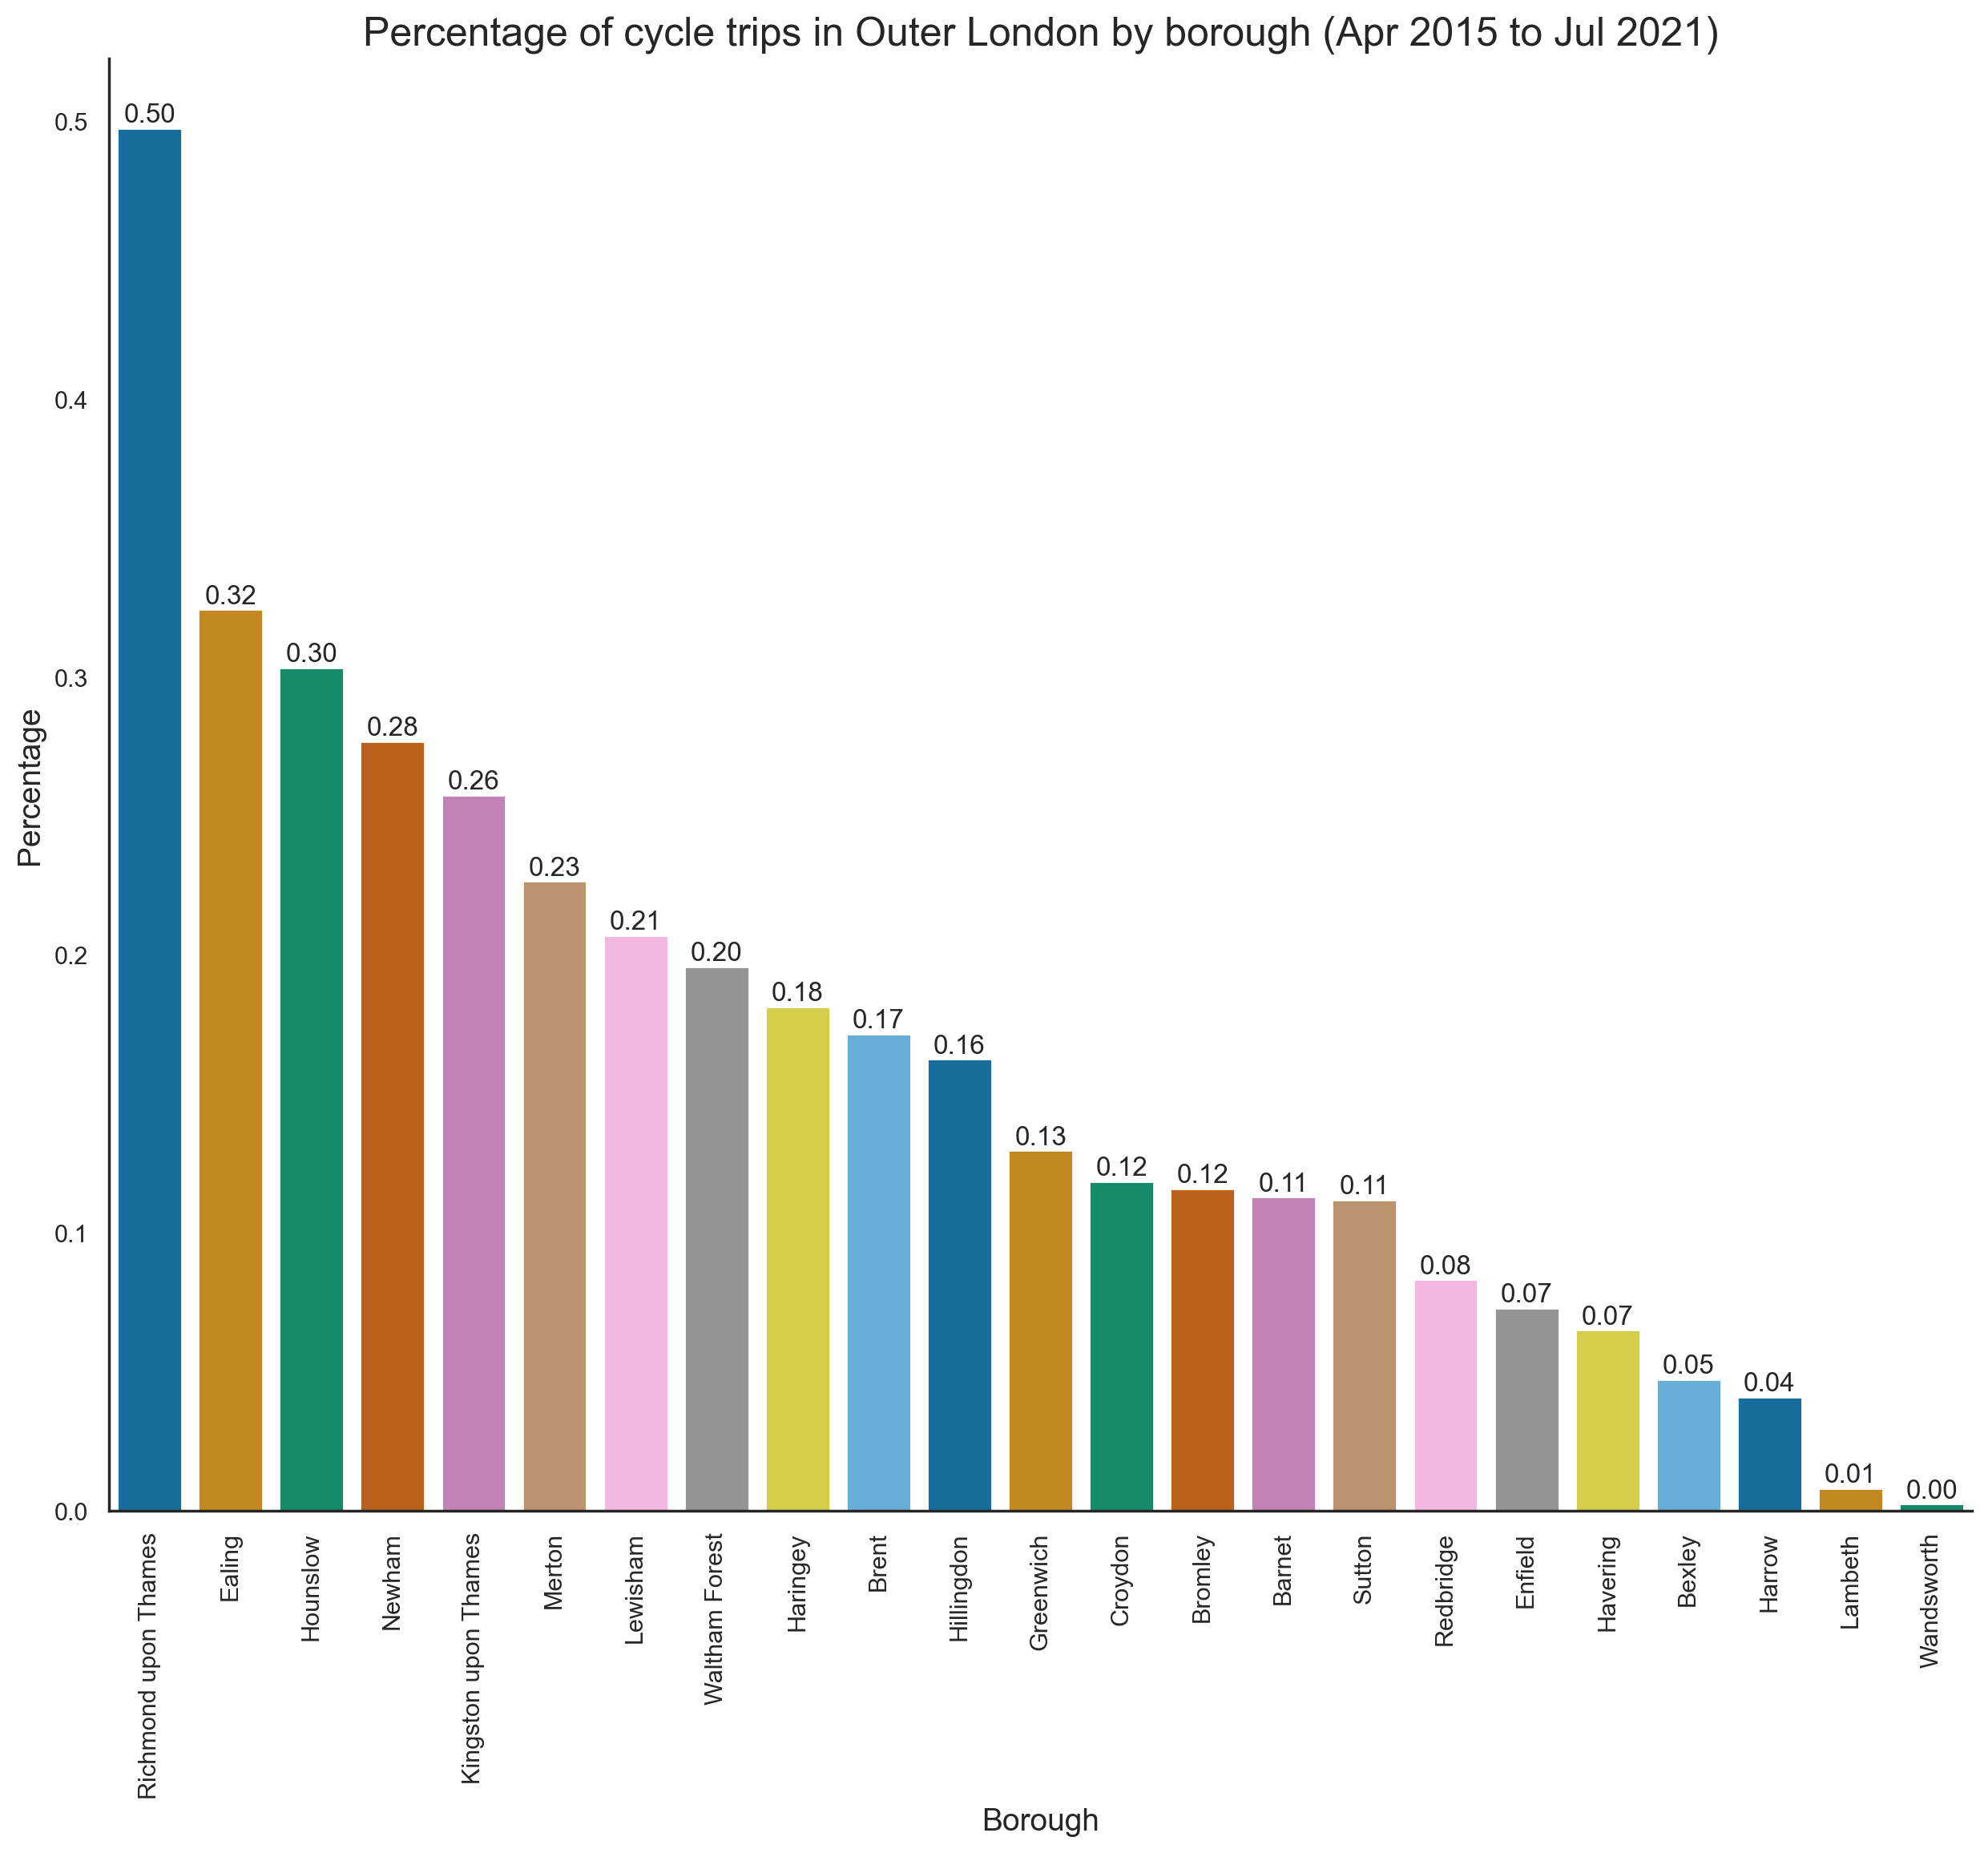

In [118]:
# Plot the number of trips by borough in Outer London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough in Outer London.
fig8, ax = plt.subplots(dpi=200)
trips_outer_plot = sns.barplot(data = trips_outer, x = 'Borough', y = '%', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of cycle trips in Outer London by borough (Apr 2015 to Jul 2021)', fontsize=18)
plt.xticks(rotation=90)

# Add a value to each bar.
trips_outer_plot.bar_label(trips_outer_plot.containers[0], label_type='edge', fmt='%.2f')

# Remove the top and right spines from the plot.
sns.despine(fig8)

# View the plot and save an image.
plt.show()
fig8.savefig('Percentage of cycle trips in Outer London by borough (Apr 2015 to Jul 2021).jpg')

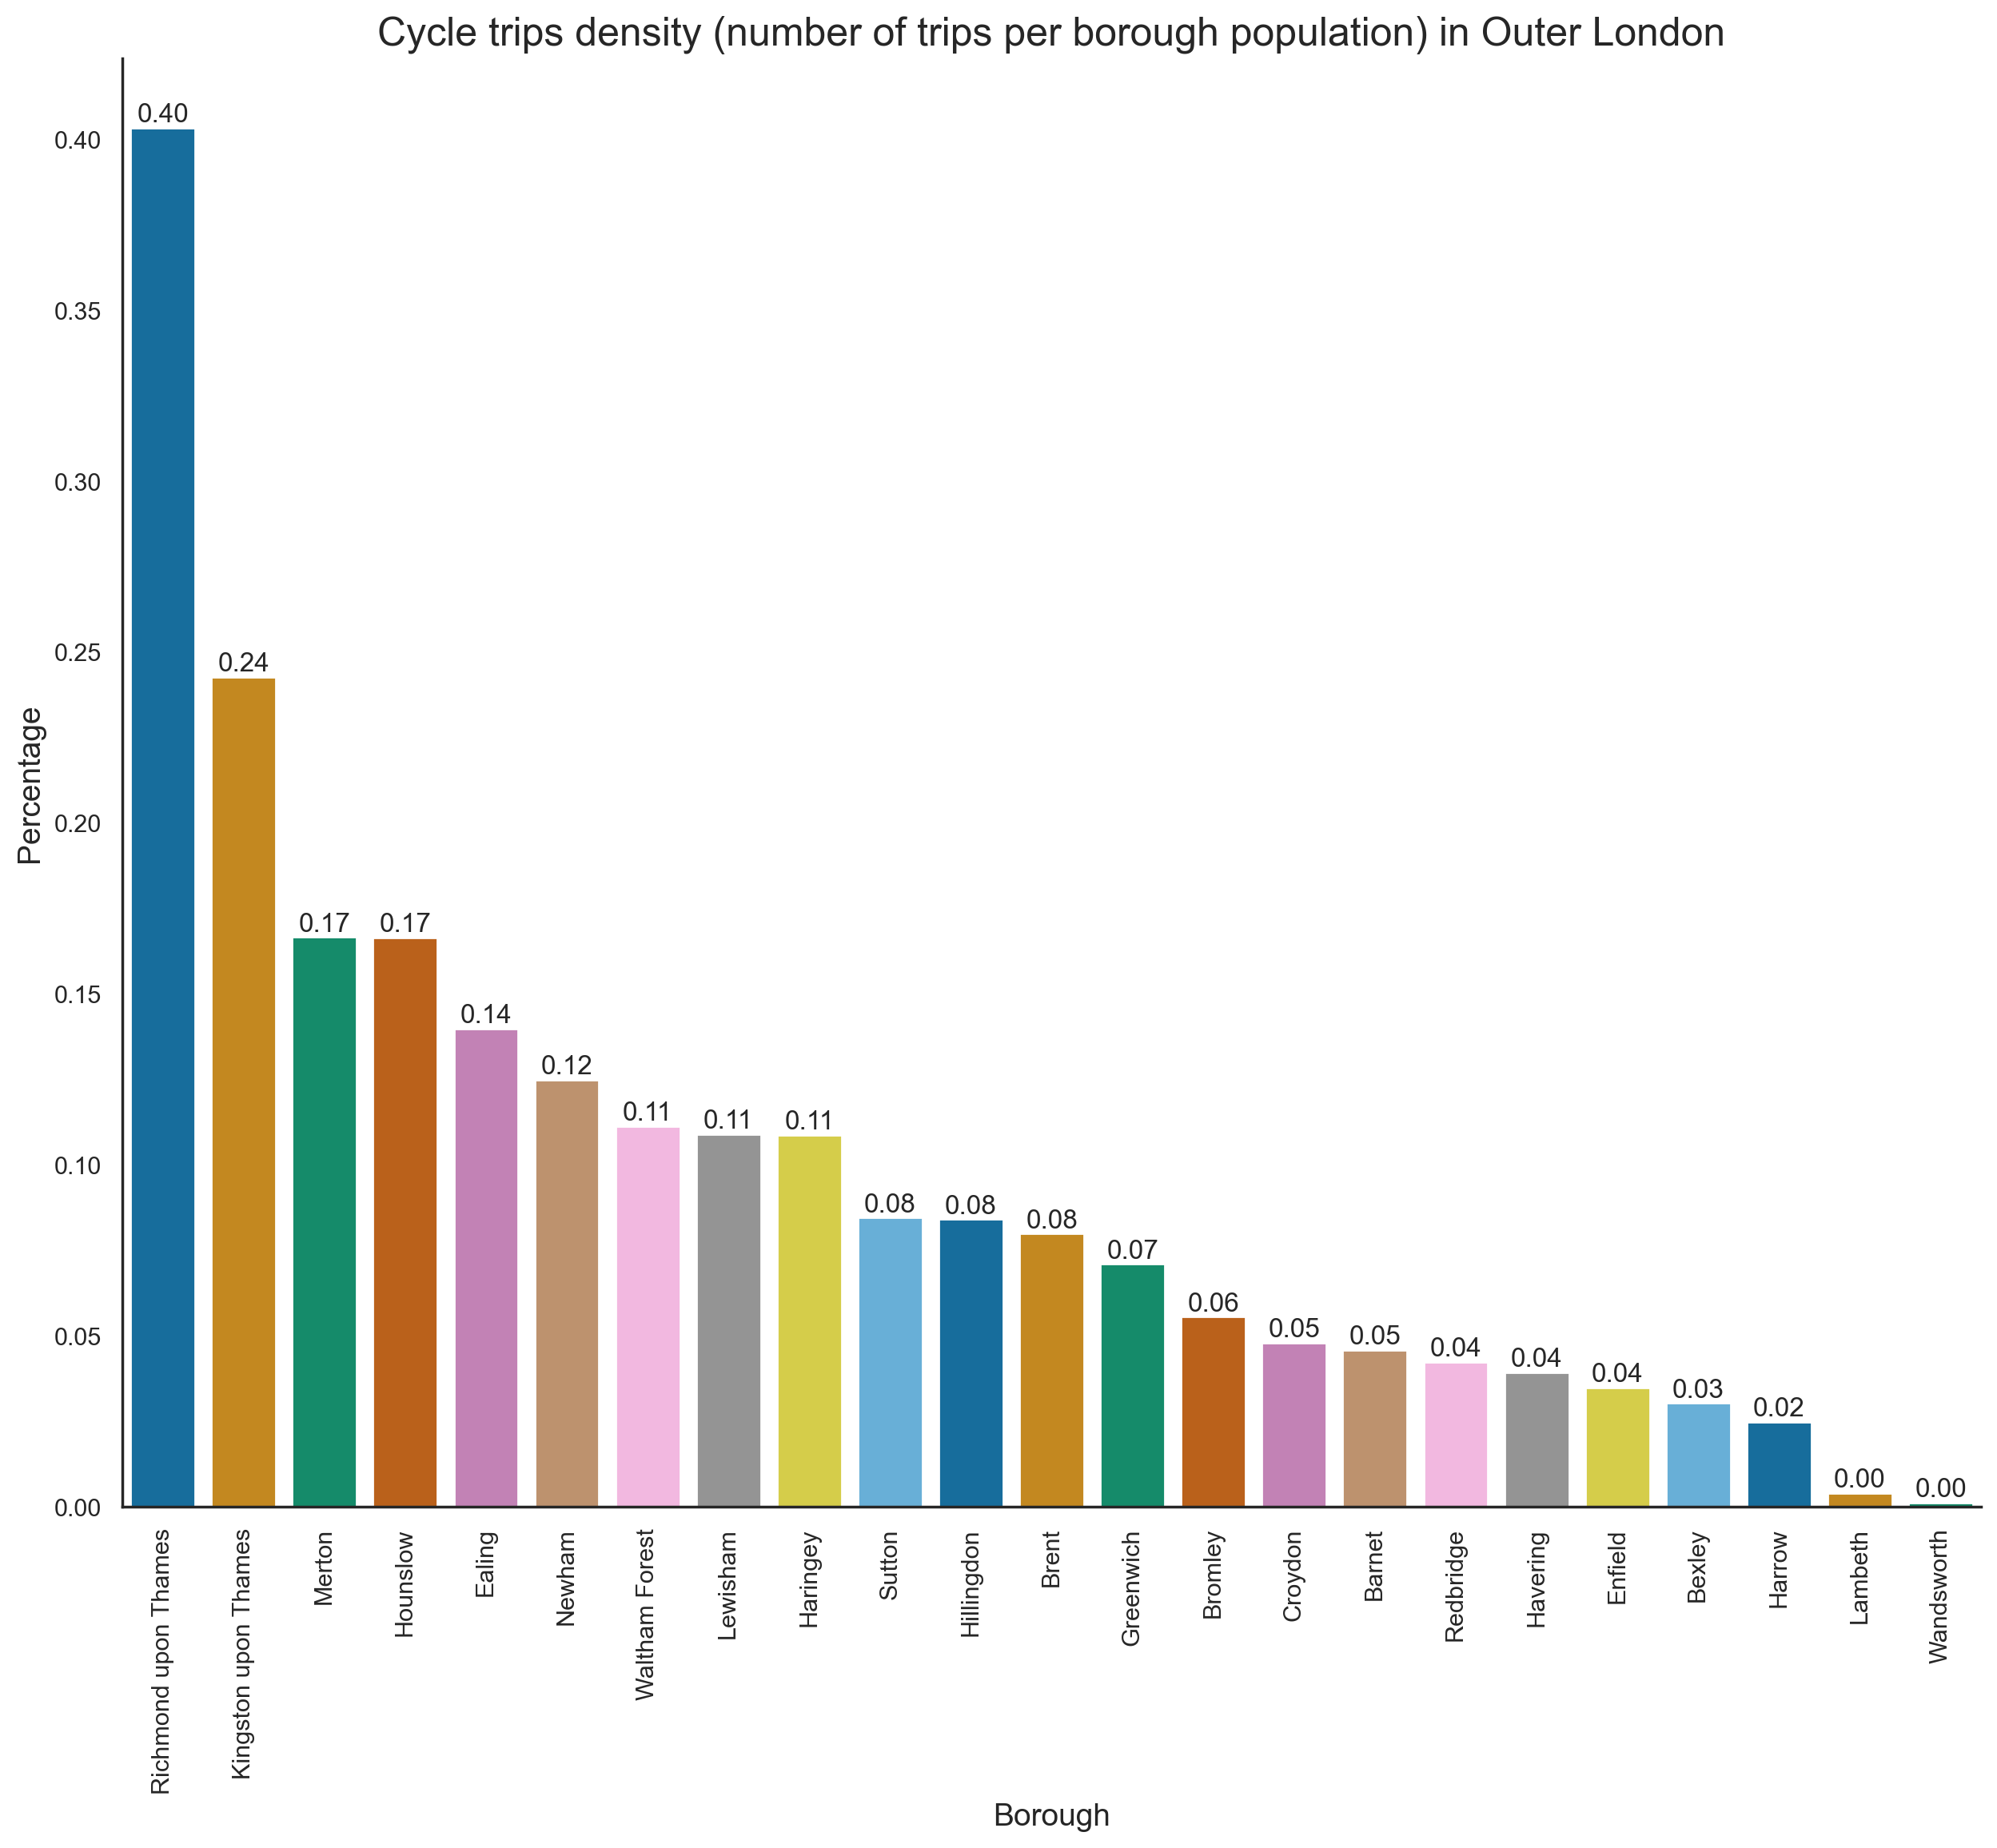

In [119]:
# Plot the density of trips by borough in Outer London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough in Outer London.
fig9, ax = plt.subplots(dpi=200)
trips_outer_density_plot = sns.barplot(data = trips_outer.sort_values(by='Trips density', ascending=False), 
                                         x = 'Borough', y = 'Trips density', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Cycle trips density (number of trips per borough population) in Outer London', fontsize=18)
plt.xticks(rotation=90)

# Add a value to each bar.
trips_outer_density_plot.bar_label(trips_outer_density_plot.containers[0], label_type='edge', fmt='%.2f')

# Remove the top and right spines from the plot.
sns.despine(fig9)

# View the plot and save an image.
plt.show()
fig9.savefig('Cycle trips density (number of trips per borough population) in Outer London.jpg')

#### Distribution of cycle trips by year:

In [120]:
# Sum of total trips by borough - 2014.
trips_borough_2014 = london_sites[london_sites['Survey_Wave'] == 2014]\
.groupby('Borough')[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()


# Add a column to show percentages.
trips_borough_2014['%'] = (trips_borough_2014['Total cycles']/trips_borough_2014['Total cycles'].sum()) * 100

# View the output.
trips_borough_2014.round(2)

Borough  Total cycles      %
0     Westminster        451280  28.14
1  City of London        346838  21.63
2          Camden        270813  16.89
3       Southwark        213470  13.31
4         Lambeth        181640  11.33
5       Islington        133354   8.32
6         Hackney          3336   0.21
7   Tower Hamlets          2908   0.18

In [121]:
# Sum of total trips by borough - 2015.
trips_borough_2015 = london_sites[london_sites['Survey_Wave'] == 2015]\
.groupby('Borough')[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()


# Add a column to show percentages.
trips_borough_2015['%'] = (trips_borough_2015['Total cycles']/trips_borough_2015['Total cycles'].sum()) * 100

# View the output.
trips_borough_2015.round(2)

Borough  Total cycles      %
0            Westminster        484692  22.35
1         City of London        362178  16.70
2                 Camden        290045  13.37
3              Southwark        255333  11.77
4                Lambeth        223420  10.30
5              Islington        201878   9.31
6                Hackney         57987   2.67
7             Wandsworth         49027   2.26
8          Tower Hamlets         46030   2.12
9   Kensington & Chelsea         45773   2.11
10  Hammersmith & Fulham         39711   1.83
11  Richmond upon Thames         14108   0.65
12              Lewisham         13949   0.64
13                Merton         11078   0.51
14                Ealing          9452   0.44
15              Haringey          8699   0.40
16              Hounslow          7130   0.33
17        Waltham Forest          6498   0.30
18                Newham          6105   0.28
19  Kingston upon Thames          5285   0.24
20                 Brent          4674   0.22
21            Hillingdon          3940   0.18
22               Bromley          2877   0.13
23             Greenwich          2761   0.13
24               Croydon          2541   0.12
25                Sutton          2446   0.11
26                Barnet          2406   0.11
27               Enfield          1843   0.08
28             Redbridge          1833   0.08
29              Havering          1576   0.07
30    Barking & Dagenham          1350   0.06
31                Bexley          1107   0.05
32                Harrow           952   0.04

In [122]:
# Sum of total trips by borough - 2016.
trips_borough_2016 = london_sites[london_sites['Survey_Wave'] == 2016]\
.groupby('Borough')[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()


# Add a column to show percentages.
trips_borough_2016['%'] = (trips_borough_2016['Total cycles']/trips_borough_2016['Total cycles'].sum()) * 100

# View the output.
trips_borough_2016.round(2)

Borough  Total cycles      %
0            Westminster        497419  22.14
1         City of London        408052  18.16
2                 Camden        302047  13.44
3              Southwark        272256  12.12
4                Lambeth        221510   9.86
5              Islington        201814   8.98
6                Hackney         57358   2.55
7             Wandsworth         46776   2.08
8          Tower Hamlets         44578   1.98
9   Kensington & Chelsea         43442   1.93
10  Hammersmith & Fulham         43121   1.92
11  Richmond upon Thames         14000   0.62
12              Lewisham         12897   0.57
13                Merton         10176   0.45
14                Ealing          9391   0.42
15              Haringey          8227   0.37
16        Waltham Forest          6573   0.29
17              Hounslow          6333   0.28
18                Newham          6176   0.27
19  Kingston upon Thames          5403   0.24
20                 Brent          4567   0.20
21            Hillingdon          3690   0.16
22             Greenwich          2891   0.13
23               Croydon          2673   0.12
24                Barnet          2637   0.12
25                Sutton          2542   0.11
26               Bromley          2451   0.11
27               Enfield          1588   0.07
28             Redbridge          1570   0.07
29              Havering          1510   0.07
30    Barking & Dagenham          1279   0.06
31                Bexley          1067   0.05
32                Harrow           785   0.03

In [123]:
# Sum of total trips by borough - 2017.
trips_borough_2017 = london_sites[london_sites['Survey_Wave'] == 2017]\
.groupby('Borough')[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()


# Add a column to show percentages.
trips_borough_2017['%'] = (trips_borough_2017['Total cycles']/trips_borough_2017['Total cycles'].sum()) * 100

# View the output.
trips_borough_2017.round(2)

Borough  Total cycles      %
0            Westminster        491730  21.60
1         City of London        432350  18.99
2              Southwark        307890  13.53
3                 Camden        292171  12.83
4                Lambeth        209541   9.20
5              Islington        192890   8.47
6                Hackney         57414   2.52
7             Wandsworth         46107   2.03
8          Tower Hamlets         45887   2.02
9   Kensington & Chelsea         45362   1.99
10  Hammersmith & Fulham         39616   1.74
11              Lewisham         13974   0.61
12  Richmond upon Thames         13390   0.59
13                Merton          9799   0.43
14                Ealing          9677   0.43
15              Haringey          8760   0.38
16              Hounslow          7639   0.34
17                Newham          7151   0.31
18  Kingston upon Thames          6352   0.28
19        Waltham Forest          6298   0.28
20                 Brent          5137   0.23
21            Hillingdon          3778   0.17
22             Greenwich          3456   0.15
23               Bromley          3058   0.13
24               Croydon          2874   0.13
25                Sutton          2686   0.12
26                Barnet          2633   0.12
27               Enfield          1971   0.09
28              Havering          1840   0.08
29             Redbridge          1779   0.08
30    Barking & Dagenham          1186   0.05
31                Bexley          1168   0.05
32                Harrow           837   0.04

In [124]:
# Sum of total trips by borough - 2018.
trips_borough_2018 = london_sites[london_sites['Survey_Wave'] == 2018]\
.groupby('Borough')[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()


# Add a column to show percentages.
trips_borough_2018['%'] = (trips_borough_2018['Total cycles']/trips_borough_2018['Total cycles'].sum()) * 100

# View the output.
trips_borough_2018.round(2)

Borough  Total cycles      %
0            Westminster        516923  21.17
1         City of London        489123  20.03
2              Southwark        337585  13.82
3                 Camden        311897  12.77
4                Lambeth        215661   8.83
5              Islington        208582   8.54
6                Hackney         58975   2.42
7          Tower Hamlets         52530   2.15
8             Wandsworth         45845   1.88
9   Kensington & Chelsea         41977   1.72
10  Hammersmith & Fulham         41467   1.70
11              Lewisham         14605   0.60
12  Richmond upon Thames         13995   0.57
13                Merton         11790   0.48
14                Ealing          9444   0.39
15              Haringey          9324   0.38
16        Waltham Forest          7604   0.31
17                Newham          7497   0.31
18              Hounslow          7420   0.30
19  Kingston upon Thames          6746   0.28
20                 Brent          5042   0.21
21            Hillingdon          4379   0.18
22             Greenwich          3326   0.14
23               Bromley          2941   0.12
24                Sutton          2896   0.12
25               Croydon          2824   0.12
26                Barnet          2546   0.10
27             Redbridge          1908   0.08
28               Enfield          1829   0.07
29              Havering          1640   0.07
30    Barking & Dagenham          1368   0.06
31                Bexley          1094   0.04
32                Harrow          1080   0.04

In [125]:
# Sum of total trips by borough - 2019.
trips_borough_2019 = london_sites[london_sites['Survey_Wave'] == 2019]\
.groupby('Borough')[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()


# Add a column to show percentages.
trips_borough_2019['%'] = (trips_borough_2019['Total cycles']/trips_borough_2019['Total cycles'].sum()) * 100

# View the output.
trips_borough_2019.round(2)

Borough  Total cycles      %
0            Westminster        530769  21.77
1         City of London        483763  19.84
2              Southwark        332315  13.63
3                 Camden        322878  13.24
4                Lambeth        211305   8.67
5              Islington        202733   8.31
6                Hackney         60002   2.46
7          Tower Hamlets         49845   2.04
8             Wandsworth         46671   1.91
9   Kensington & Chelsea         45915   1.88
10  Hammersmith & Fulham         42337   1.74
11              Lewisham         13320   0.55
12  Richmond upon Thames         12699   0.52
13                Merton          9745   0.40
14                Ealing          9687   0.40
15              Haringey          8093   0.33
16        Waltham Forest          7349   0.30
17                Newham          7116   0.29
18              Hounslow          6695   0.27
19  Kingston upon Thames          5882   0.24
20                 Brent          4602   0.19
21            Hillingdon          3489   0.14
22             Greenwich          3178   0.13
23               Bromley          2901   0.12
24                Barnet          2773   0.11
25               Croydon          2718   0.11
26                Sutton          2417   0.10
27               Enfield          1561   0.06
28             Redbridge          1426   0.06
29              Havering          1344   0.06
30    Barking & Dagenham          1111   0.05
31                Bexley          1056   0.04
32                Harrow           797   0.03

In [126]:
# Sum of total trips by borough - 2020.
trips_borough_2020 = london_sites[london_sites['Survey_Wave'] == 2020]\
.groupby('Borough')[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()


# Add a column to show percentages.
trips_borough_2020['%'] = (trips_borough_2020['Total cycles']/trips_borough_2020['Total cycles'].sum()) * 100

# View the output.
trips_borough_2020.round(2)

Borough  Total cycles      %
0            Westminster        274245  20.22
1         City of London        216347  15.95
2              Southwark        171205  12.62
3                 Camden        147420  10.87
4                Lambeth        111210   8.20
5              Islington        107220   7.90
6                Hackney         52092   3.84
7   Hammersmith & Fulham         45241   3.34
8          Tower Hamlets         44187   3.26
9             Wandsworth         41966   3.09
10  Kensington & Chelsea         41438   3.05
11              Lewisham         15228   1.12
12  Richmond upon Thames         11889   0.88
13                Merton         10845   0.80
14                Ealing         10178   0.75
15        Waltham Forest          7687   0.57
16                Newham          7595   0.56
17              Haringey          6978   0.51
18              Hounslow          6911   0.51
19  Kingston upon Thames          5197   0.38
20                 Brent          3426   0.25
21            Hillingdon          2378   0.18
22               Croydon          2154   0.16
23             Redbridge          1800   0.13
24                Sutton          1792   0.13
25               Bromley          1746   0.13
26             Greenwich          1464   0.11
27    Barking & Dagenham          1209   0.09
28                Harrow          1188   0.09
29               Enfield          1136   0.08
30                Barnet          1111   0.08
31              Havering          1063   0.08
32                Bexley           969   0.07

In [127]:
# Sum of total trips by borough - 2021.
trips_borough_2021 = london_sites[london_sites['Survey_Wave'] == 2021]\
.groupby('Borough')[['Total cycles']].sum()\
.sort_values('Total cycles', ascending=False).reset_index()


# Add a column to show percentages.
trips_borough_2021['%'] = (trips_borough_2021['Total cycles']/trips_borough_2021['Total cycles'].sum()) * 100

# View the output.
trips_borough_2021.round(2)

Borough  Total cycles      %
0            Westminster        412831  21.32
1         City of London        316923  16.37
2              Southwark        232660  12.02
3                 Camden        226457  11.70
4                Lambeth        152491   7.88
5              Islington        149404   7.72
6                Hackney         71801   3.71
7   Hammersmith & Fulham         68088   3.52
8          Tower Hamlets         60027   3.10
9   Kensington & Chelsea         52661   2.72
10            Wandsworth         50728   2.62
11              Lewisham         18497   0.96
12                Merton         14176   0.73
13  Richmond upon Thames         13732   0.71
14                Ealing         12916   0.67
15        Waltham Forest         11982   0.62
16              Haringey          9507   0.49
17                Newham          9296   0.48
18                 Brent          7729   0.40
19              Hounslow          7435   0.38
20  Kingston upon Thames          5922   0.31
21            Hillingdon          4089   0.21
22             Greenwich          4034   0.21
23                Barnet          3787   0.20
24               Bromley          3689   0.19
25               Croydon          3002   0.16
26                Sutton          2970   0.15
27             Redbridge          2876   0.15
28               Enfield          1636   0.08
29    Barking & Dagenham          1437   0.07
30              Havering          1345   0.07
31                Bexley          1038   0.05
32                Harrow           875   0.05

In [128]:
# Sum of total trips by year.
trips_year = london_sites.groupby('Survey_Wave')[['Total cycles']]\
.sum().sort_values('Survey_Wave', ascending=True).reset_index()

# Add a column to show percentages.
trips_year['%'] = (trips_year['Total cycles']/trips_year['Total cycles'].sum()) * 100

# View the output.
trips_year.round(2)

Survey_Wave  Total cycles      %
0         2014       1603639   9.74
1         2015       2168684  13.17
2         2016       2246799  13.64
3         2017       2276401  13.82
4         2018       2441863  14.83
5         2019       2438492  14.81
6         2020       1356515   8.24
7         2021       1936041  11.76

In [129]:
# Sum of total trips by year and area.
trips_year_area = london_sites.groupby(['Survey_Wave', 'Functional cycling area'])[['Total cycles']]\
.sum().sort_values('Survey_Wave', ascending=True).reset_index()

# Add a column to show percentages.
trips_year_area['%'] = (trips_year_area['Total cycles']/trips_year_area['Total cycles'].sum()) * 100

# View the output.
trips_year_area.round(2)

Survey_Wave Functional cycling area  Total cycles      %
0          2014                 Central       1603639   9.74
1          2015                 Central       1636501   9.94
2          2015                   Inner        449955   2.73
3          2015                   Outer         82228   0.50
4          2016                 Central       1724842  10.47
5          2016                   Inner        441662   2.68
6          2016                   Outer         80295   0.49
7          2017                 Central       1739414  10.56
8          2017                   Inner        450399   2.73
9          2017                   Outer         86588   0.53
10         2018                   Outer         91966   0.56
11         2018                 Central       1891445  11.49
12         2018                   Inner        458452   2.78
13         2019                 Central       1907780  11.58
14         2019                   Inner        448595   2.72
15         2019                   Outer         82117   0.50
16         2020                 Central        852651   5.18
17         2020                   Inner        428940   2.60
18         2020                   Outer         74924   0.45
19         2021                   Inner        567527   3.45
20         2021                 Central       1269447   7.71
21         2021                   Outer         99067   0.60

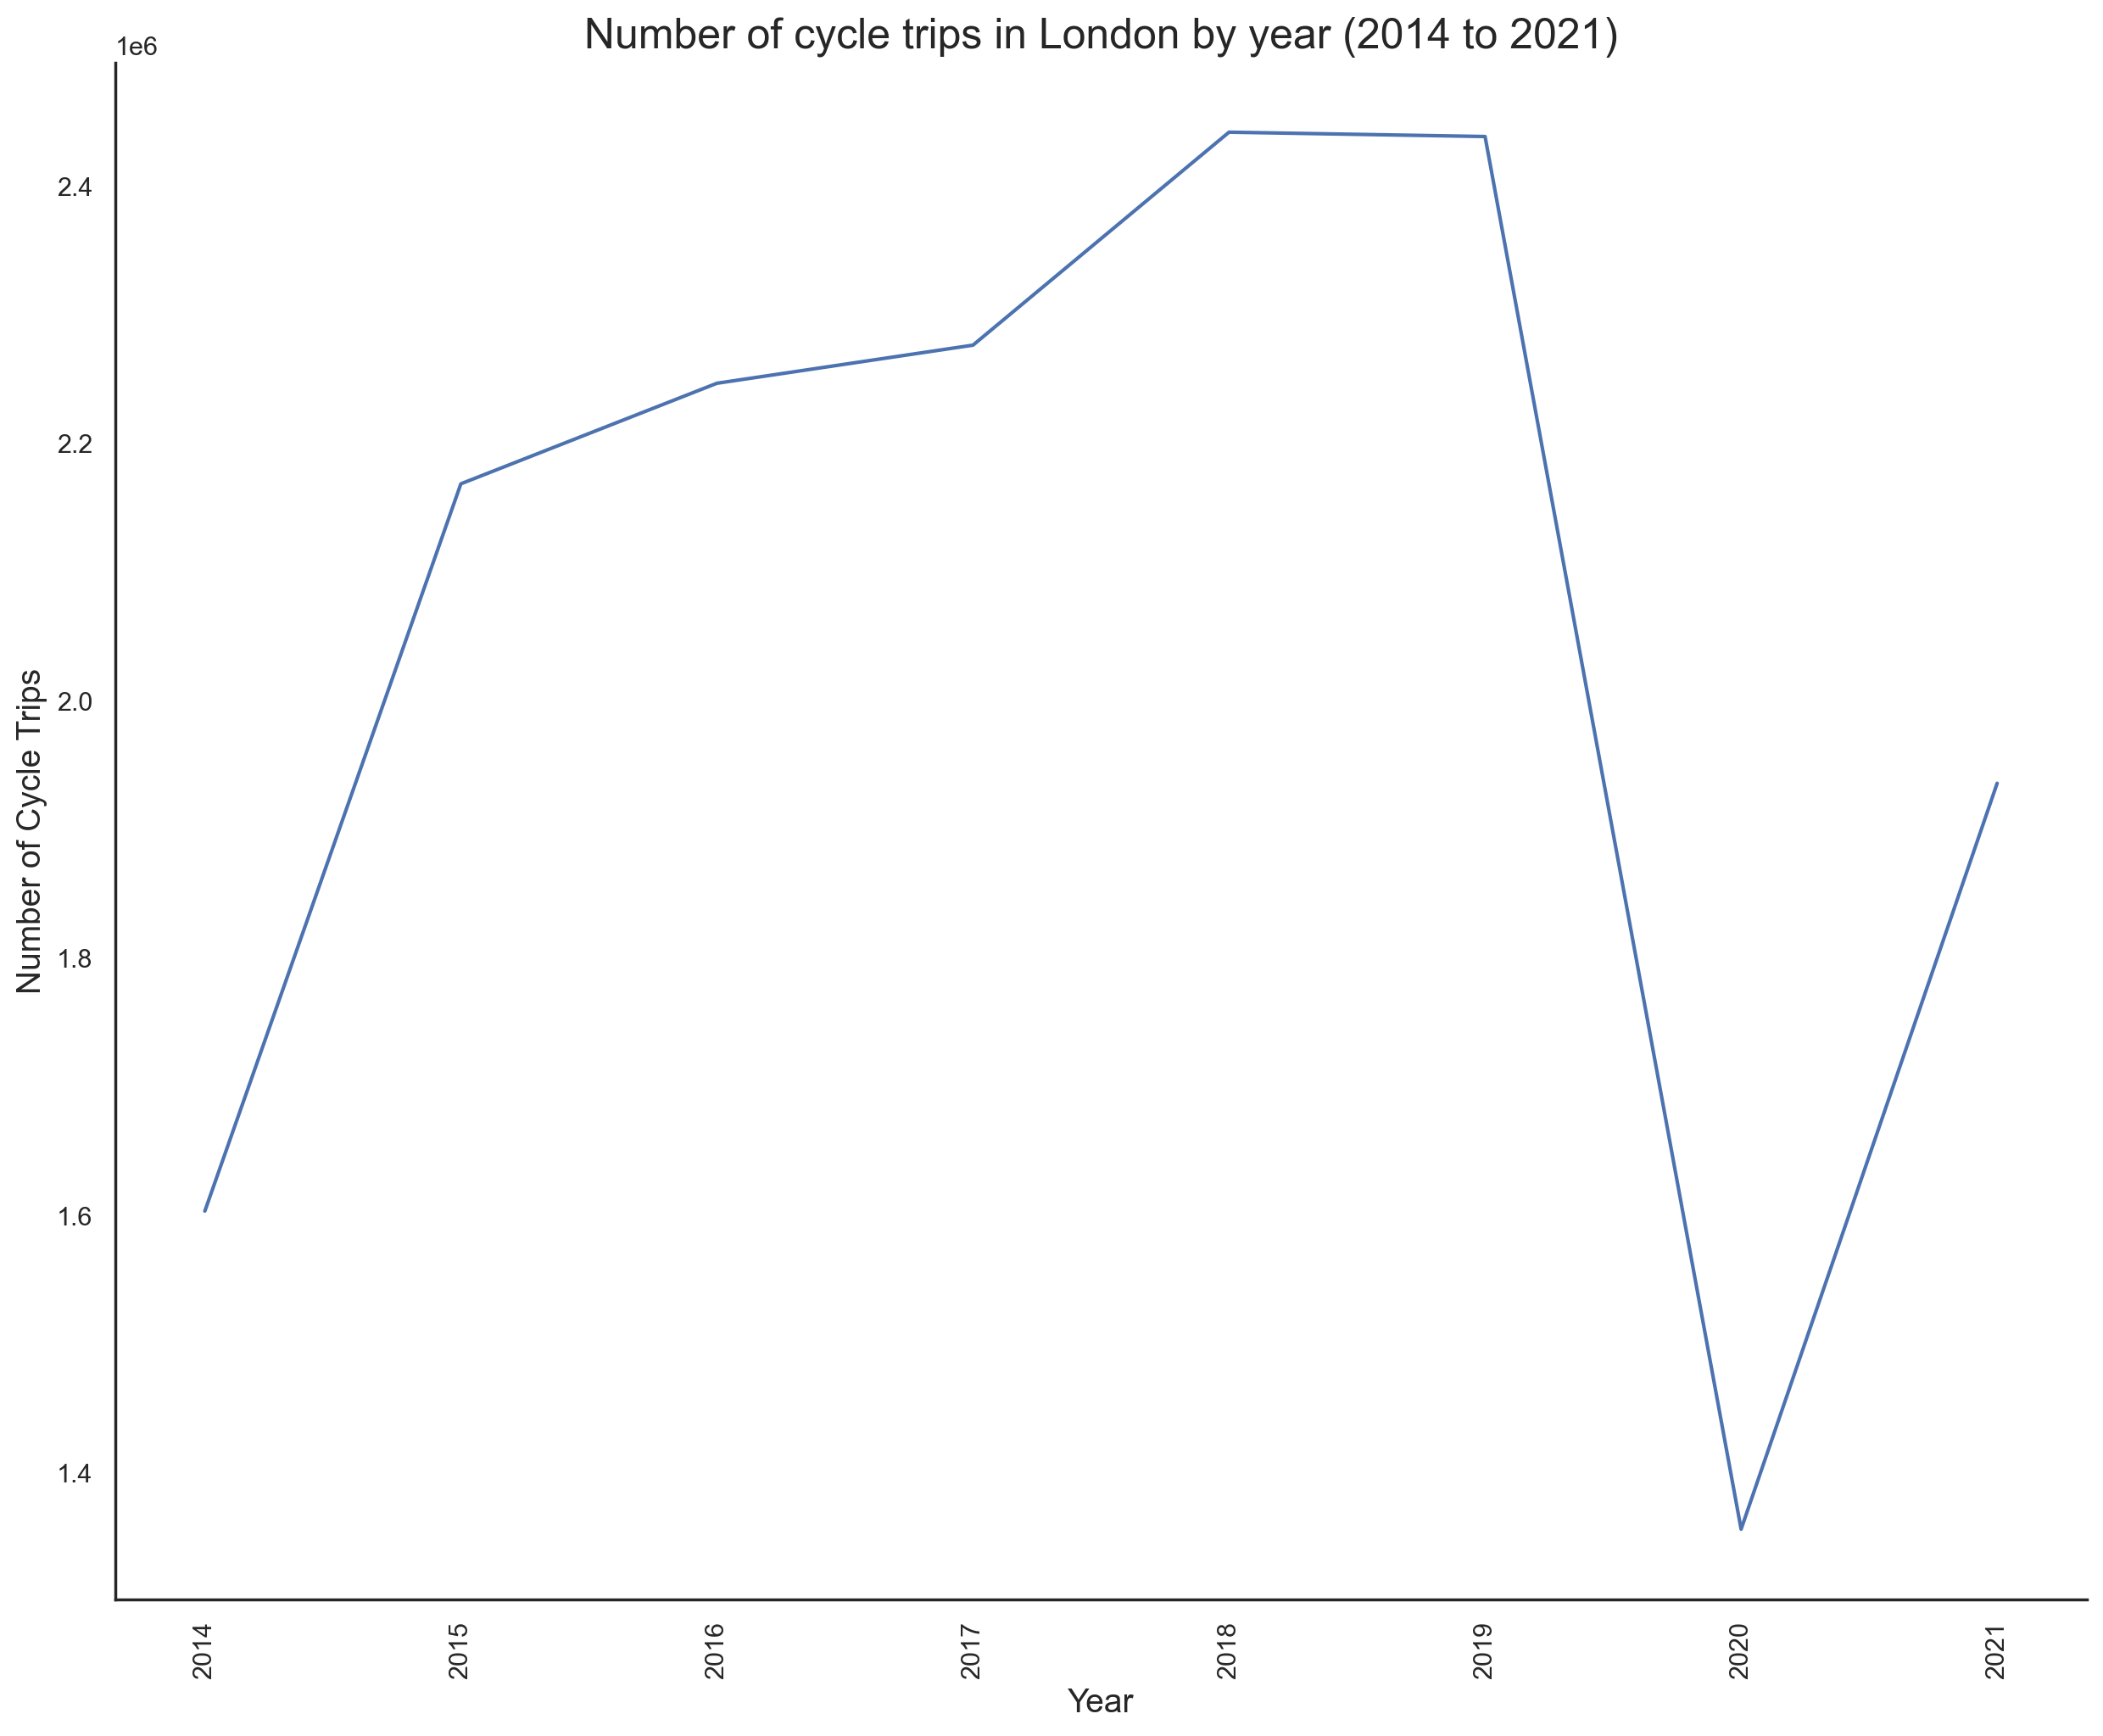

In [130]:
# Plot the number of trips by year.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by year.
fig10, ax = plt.subplots(dpi=200)
sns.lineplot(data=trips_year, x='Survey_Wave', y='Total cycles', ci=None, palette='colorblind')

# Label axes and add a title.
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cycle Trips', fontsize=14)
plt.title('Number of cycle trips in London by year (2014 to 2021)', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig10)

# View the plot and save an image.
plt.show()
fig10.savefig('Number of cycle trips in London by year (2014 to 2021).jpg')

> It is difficult to see a trend with such short period of time, especially since the Covid-19 pandemic has distorted the number of trips for 2020. Although we can see it starts to recover quickly from 2021.

> We could extend the timeline with the extra data by year found in Traffic Note 3 - Cordon  Screenlines 2017_v1. However, this extra data is brokenn down by area (Central, Inner and Outer), so therefore we will need to create the diagram above for each area on its own.

In [131]:
# Import and sense-check the extra dataset for Central London.
extra_central = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Traffic Note 3 - Cordon  Screenlines 2017_v1 - Table 2 Central London.xlsx')

# View the DataFrame.
extra_central

Year  Pedal cycles  Total cycles  Motor cycles  Cars  Taxis  LGV  MGV  \
0   1977            27         27000            76  1018    137  149   98   
1   1979            39         39000            75  1063    136  146   91   
2   1981            46         46000            77  1078    125  141   94   
3   1983            47         47000            81  1071    125  134   91   
4   1985            44         44000            79  1105    131  155   93   
5   1987            30         30000            65  1086    131  173   90   
6   1989            43         43000            79  1160    158  204   94   
7   1991            37         37000            68  1094    162  181   84   
8   1993            35         35000            65  1017    161  172   77   
9   1995            45         45000            72  1061    159  181   86   
10  1997            51         51000            82  1030    162  178   75   
11  1999            56         56000            85   997    169  183   69   
12  2001            51         51000            92   942    172  190   58   
13  2002            61         61000            91   895    166  181   50   
14  2003            65         65000            92   791    182  179   47   
15  2004            72         72000            93   764    168  175   43   
16  2005            87         87000            88   743    177  179   44   
17  2006            98         98000            91   707    184  173   44   
18  2007           103        103000            91   734    202  180   42   
19  2008           104        104000            81   645    172  182   39   
20  2009           120        120000            80   649    163  173   40   
21  2010           137        137000            79   606    161  179   39   
22  2011           147        147000            79   615    172  180   41   
23  2012           149        149000            74   598    185  178   39   
24  2013           161        161000            79   616    187  182   40   

    HGV  Buses & coaches  All motor vehicles  
0    32               38                1548  
1    33               35                1579  
2    36               39                1591  
3    32               39                1574  
4    30               38                1631  
5    17               34                1597  
6    18               37                1750  
7    16               39                1644  
8    10               39                1541  
9    12               41                1612  
10   13               45                1585  
11   13               44                1559  
12   13               45                1512  
13   14               46                1442  
14   14               53                1359  
15   12               55                1310  
16   14               56                1300  
17   12               58                1269  
18   14               62                1326  
19   13               60                1193  
20   11               62                1179  
21   12               57                1133  
22   15               59                1161  
23   14               58                1144  
24   16               60                1181

In [132]:
# Rename the year column to the same name as per the original dataset.
extra_central = extra_central.rename(columns={'Year': 'Survey_Wave'})

# View the DataFrame.
print(extra_central.shape)
extra_central.head()

(25, 11)


Survey_Wave  Pedal cycles  Total cycles  Motor cycles  Cars  Taxis  LGV  \
0         1977            27         27000            76  1018    137  149   
1         1979            39         39000            75  1063    136  146   
2         1981            46         46000            77  1078    125  141   
3         1983            47         47000            81  1071    125  134   
4         1985            44         44000            79  1105    131  155   

   MGV  HGV  Buses & coaches  All motor vehicles  
0   98   32               38                1548  
1   91   33               35                1579  
2   94   36               39                1591  
3   91   32               39                1574  
4   93   30               38                1631

In [133]:
# Keep the columns we need.
extra_central = extra_central[['Survey_Wave', 'Total cycles']]

# View the DataFrame.
print(extra_central.shape)
extra_central.head()

(25, 2)


Survey_Wave  Total cycles
0         1977         27000
1         1979         39000
2         1981         46000
3         1983         47000
4         1985         44000

In [134]:
# Import and sense-check the extra dataset for Inner London.
extra_inner = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Traffic Note 3 - Cordon  Screenlines 2017_v1 - Table 7 Inner London.xlsx')

# View the DataFrame.
extra_inner

Year  Pedal cycles  Total cycles  Motor cycles  Cars  Taxis  LGV  MGV  \
0   1978            20         20000            72  1502     36  196  130   
1   1981            27         27000            77  1502     35  184  115   
2   1984            33         33000            77  1552     42  202  117   
3   1987            24         24000            58  1606     40  216  110   
4   1990            25         25000            60  1652     49  239  106   
5   1993            27         27000            53  1606     39  227   94   
6   1996            30         30000            60  1644     47  232  100   
7   1999            31         31000            70  1635     60  251   80   
8   2002            25         25000            70  1593     52  279   64   
9   2004            31         31000            69  1553     53  265   55   
10  2005            34         34000            64  1510     44  237   56   
11  2008            44         44000            71  1427     65  299   67   
12  2010            52         52000            67  1405     49  286   55   
13  2012            57         57000            66  1346     52  291   57   

    HGV  Buses & coaches  All motor vehicles  
0    54               37                2027  
1    45               34                1992  
2    38               36                2064  
3    34               35                2098  
4    30               36                2173  
5    22               39                2080  
6    24               44                2150  
7    26               47                2168  
8    25               46                2129  
9    28               53                2078  
10   25               52                1988  
11   31               56                2015  
12   27               56                1945  
13   29               58                1898

In [135]:
# Rename the year column to the same name as per the original dataset.
extra_inner = extra_inner.rename(columns={'Year': 'Survey_Wave'})

# View the DataFrame.
print(extra_inner.shape)
extra_inner.head()

(14, 11)


Survey_Wave  Pedal cycles  Total cycles  Motor cycles  Cars  Taxis  LGV  \
0         1978            20         20000            72  1502     36  196   
1         1981            27         27000            77  1502     35  184   
2         1984            33         33000            77  1552     42  202   
3         1987            24         24000            58  1606     40  216   
4         1990            25         25000            60  1652     49  239   

   MGV  HGV  Buses & coaches  All motor vehicles  
0  130   54               37                2027  
1  115   45               34                1992  
2  117   38               36                2064  
3  110   34               35                2098  
4  106   30               36                2173

In [136]:
# Keep the columns we need.
extra_inner = extra_inner[['Survey_Wave', 'Total cycles']]

# View the DataFrame.
print(extra_inner.shape)
extra_inner.head()

(14, 2)


Survey_Wave  Total cycles
0         1978         20000
1         1981         27000
2         1984         33000
3         1987         24000
4         1990         25000

In [137]:
# Import and sense-check the extra dataset for Outer London.
extra_outer = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Traffic Note 3 - Cordon  Screenlines 2017_v1 - Table 12 Outer London.xlsx')

# View the DataFrame.
extra_outer

Year  Pedal cycles  Total cycles  Motor cycles  Cars  Taxis  LGV  MGV  \
0   1977            15         15000            46  1335      5  137  110   
1   1980            14         14000            44  1440      6  145  111   
2   1983            15         15000            46  1565      6  159  111   
3   1986            16         16000            41  1661      8  192  110   
4   1989            15         15000            36  1991     10  225  115   
5   1992            12         12000            33  1983     10  229  101   
6   1995            13         13000            37  2023     10  255  117   
7   1998            10         10000            38  2049     12  265  112   
8   2001             9          9000            42  2048     14  300   84   
9   2004             9          9000            35  2053     16  301   79   
10  2007            11         11000            37  2054     16  346   80   
11  2009            14         14000            36  1992     17  338   69   
12  2011            15         15000            35  2006     19  347   73   
13  2013            18         18000            35  1987     18  345   69   

    HGV  Buses & coaches  All motor vehicles  
0    66               20                1719  
1    74               18                1838  
2    77               19                1984  
3    58               17                2087  
4    58               18                2454  
5    54               19                2430  
6    55               22                2519  
7    56               24                2555  
8    56               22                2567  
9    60               22                2566  
10   67               27                2626  
11   56               25                2533  
12   64               25                2568  
13   61               25                2539

In [138]:
# Rename the year column to the same name as per the original dataset.
extra_outer = extra_outer.rename(columns={'Year': 'Survey_Wave'})

# View the DataFrame.
print(extra_outer.shape)
extra_outer.head()

(14, 11)


Survey_Wave  Pedal cycles  Total cycles  Motor cycles  Cars  Taxis  LGV  \
0         1977            15         15000            46  1335      5  137   
1         1980            14         14000            44  1440      6  145   
2         1983            15         15000            46  1565      6  159   
3         1986            16         16000            41  1661      8  192   
4         1989            15         15000            36  1991     10  225   

   MGV  HGV  Buses & coaches  All motor vehicles  
0  110   66               20                1719  
1  111   74               18                1838  
2  111   77               19                1984  
3  110   58               17                2087  
4  115   58               18                2454

In [139]:
# Keep the columns we need.
extra_outer = extra_outer[['Survey_Wave', 'Total cycles']]

# View the DataFrame.
print(extra_outer.shape)
extra_outer.head()

(14, 2)


Survey_Wave  Total cycles
0         1977         15000
1         1980         14000
2         1983         15000
3         1986         16000
4         1989         15000

In [140]:
# Create a separate dataset only for Central London. 
trips_year_area_central = trips_year_area[trips_year_area['Functional cycling area'] == 'Central']
trips_year_area_central

Survey_Wave Functional cycling area  Total cycles          %
0          2014                 Central       1603639   9.737653
1          2015                 Central       1636501   9.937199
4          2016                 Central       1724842  10.473625
7          2017                 Central       1739414  10.562109
11         2018                 Central       1891445  11.485275
13         2019                 Central       1907780  11.584465
16         2020                 Central        852651   5.177487
20         2021                 Central       1269447   7.708365

In [141]:
# Keep the columns we need.
trips_year_area_central = trips_year_area_central[['Survey_Wave', 'Total cycles']]

# View the DataFrame.
trips_year_area_central

Survey_Wave  Total cycles
0          2014       1603639
1          2015       1636501
4          2016       1724842
7          2017       1739414
11         2018       1891445
13         2019       1907780
16         2020        852651
20         2021       1269447

In [142]:
# Use concat to join the two datasets.
trips_year_area_central2 = pd.concat([extra_central, trips_year_area_central]).reset_index()

# View the DataFrame.
trips_year_area_central2

index  Survey_Wave  Total cycles
0       0         1977         27000
1       1         1979         39000
2       2         1981         46000
3       3         1983         47000
4       4         1985         44000
5       5         1987         30000
6       6         1989         43000
7       7         1991         37000
8       8         1993         35000
9       9         1995         45000
10     10         1997         51000
11     11         1999         56000
12     12         2001         51000
13     13         2002         61000
14     14         2003         65000
15     15         2004         72000
16     16         2005         87000
17     17         2006         98000
18     18         2007        103000
19     19         2008        104000
20     20         2009        120000
21     21         2010        137000
22     22         2011        147000
23     23         2012        149000
24     24         2013        161000
25      0         2014       1603639
26      1         2015       1636501
27      4         2016       1724842
28      7         2017       1739414
29     11         2018       1891445
30     13         2019       1907780
31     16         2020        852651
32     20         2021       1269447

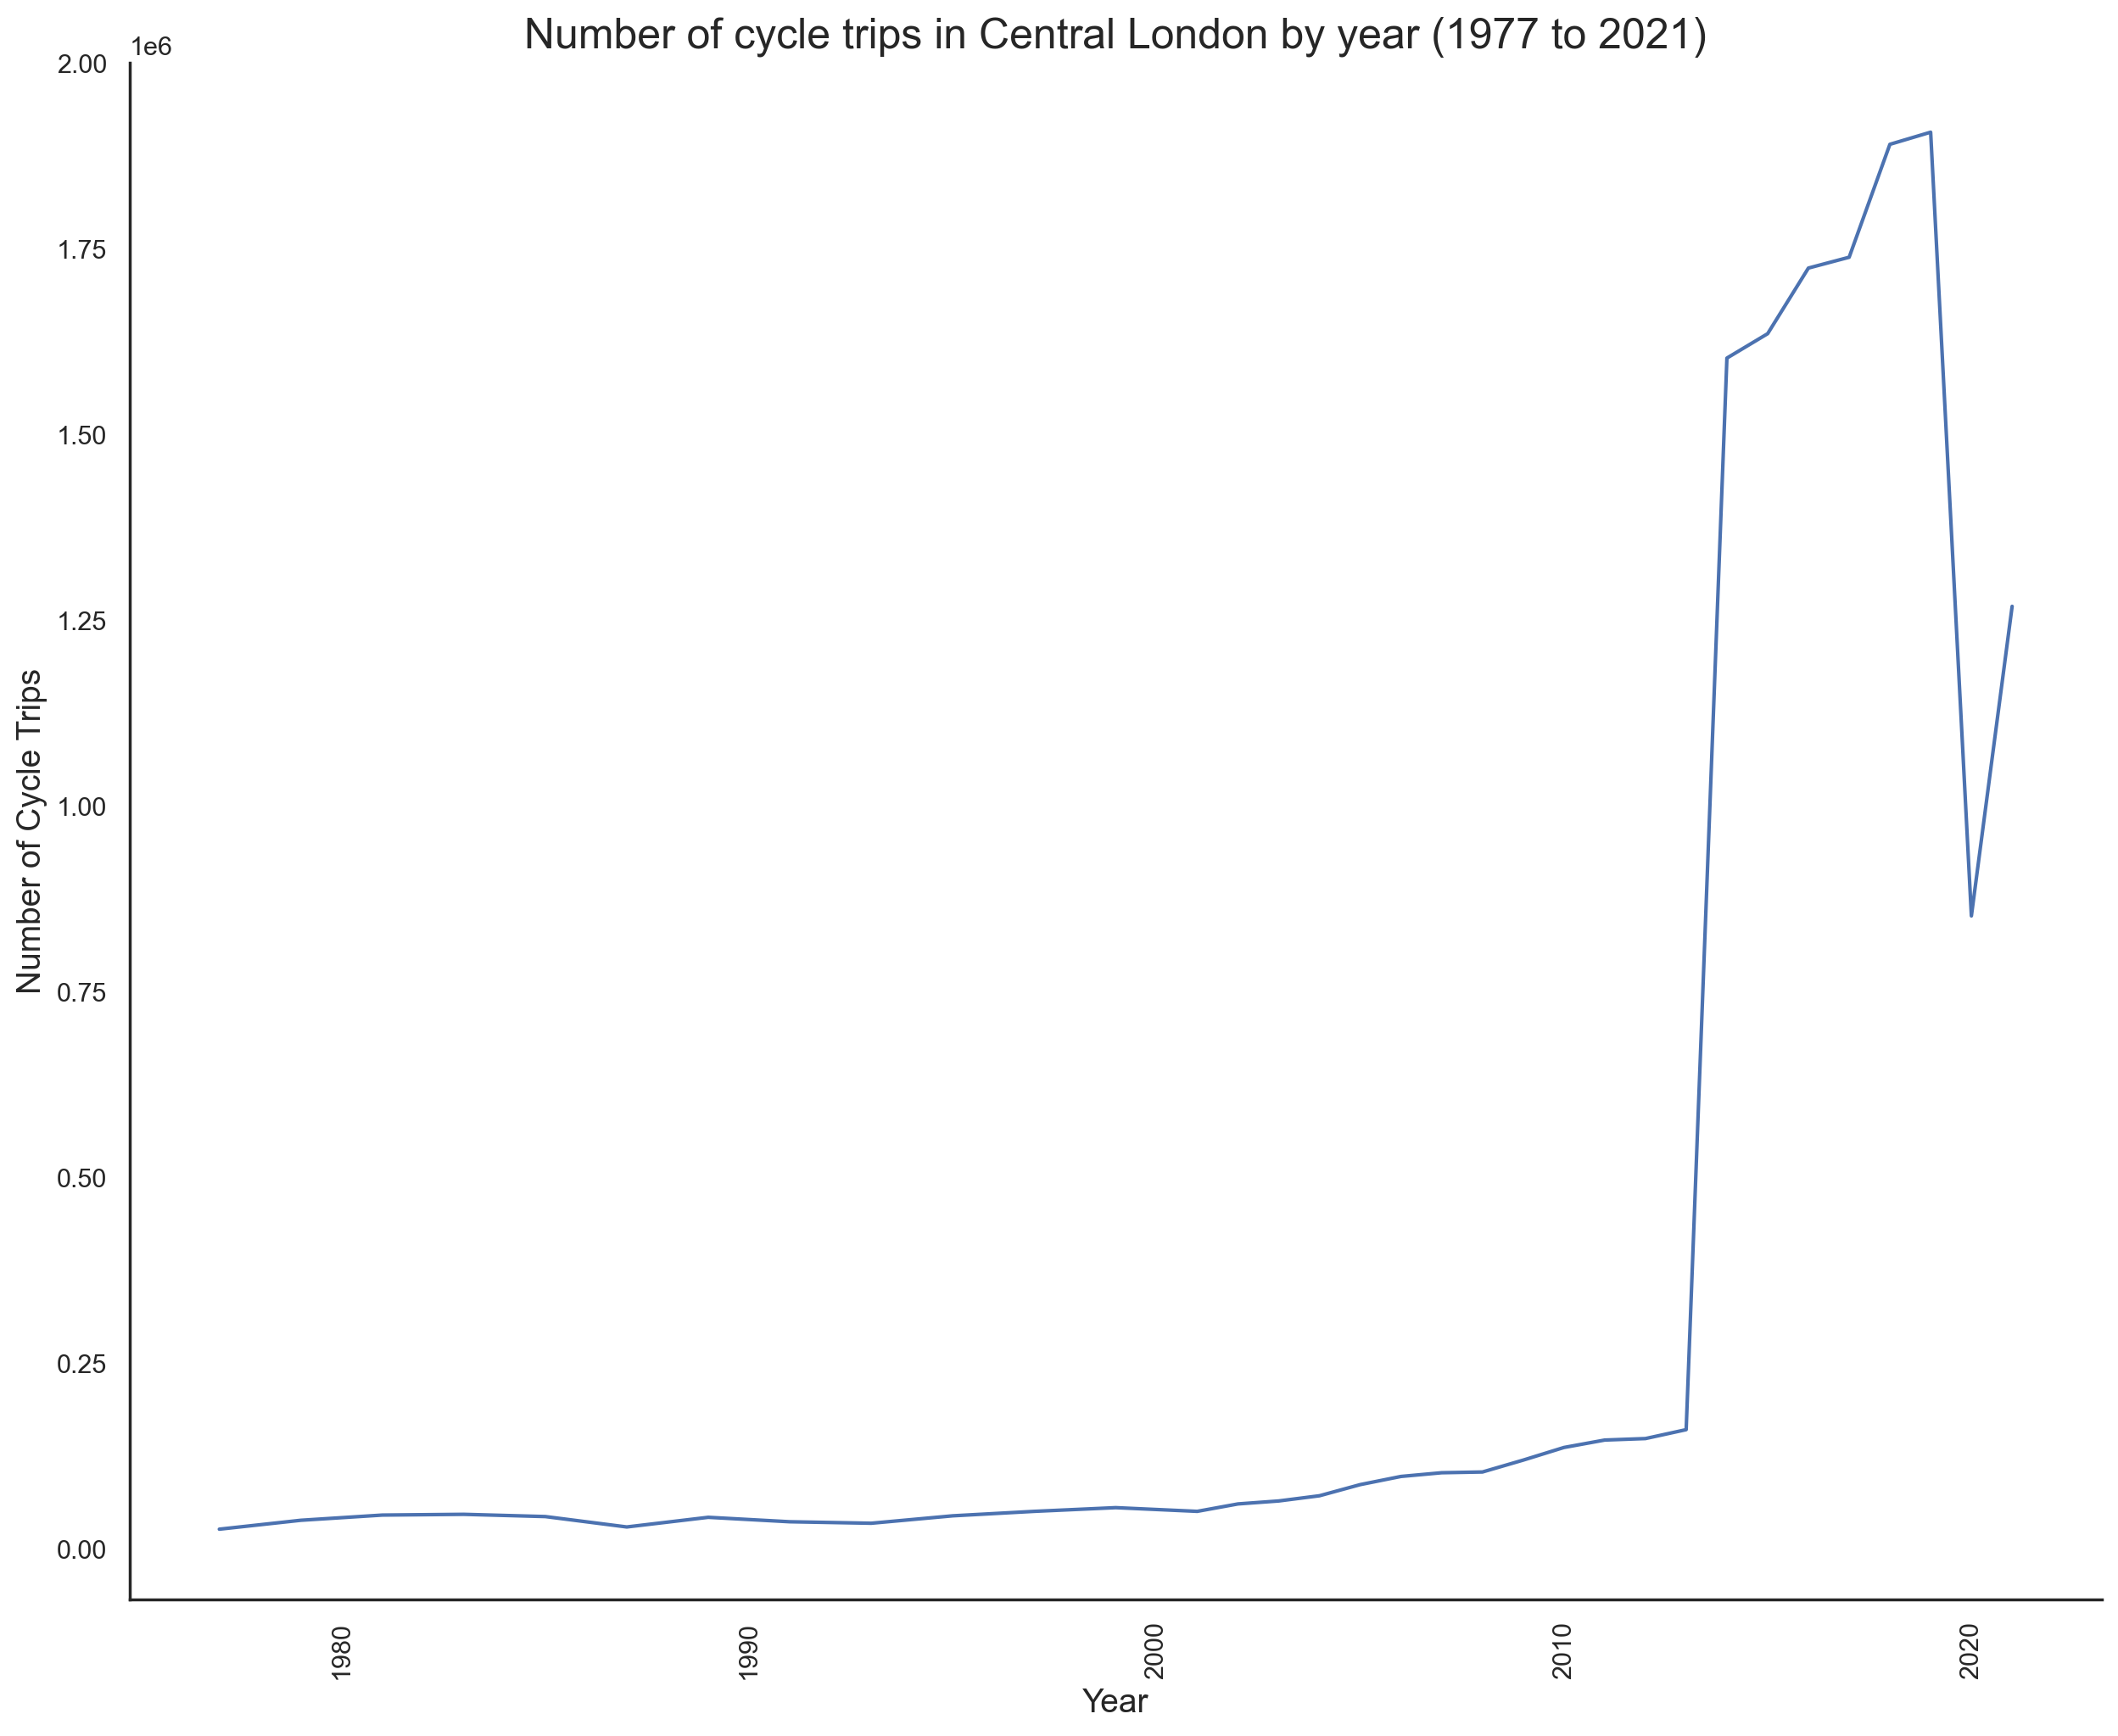

In [143]:
# Plot the number of trips by year in Central London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by year.
fig11, ax = plt.subplots(dpi=200)
sns.lineplot(data=trips_year_area_central2, x='Survey_Wave', y='Total cycles', ci=None, palette='colorblind')

# Label axes and add a title.
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cycle Trips', fontsize=14)
plt.title('Number of cycle trips in Central London by year (1977 to 2021)', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig11)

# View the plot and save an image.
plt.show()
fig11.savefig('Number of cycle trips in Central London by year (1977 to 2021).jpg')

In [144]:
# Create a separate dataset only for Inner London. 
trips_year_area_inner = trips_year_area[trips_year_area['Functional cycling area'] == 'Inner']
trips_year_area_inner

Survey_Wave Functional cycling area  Total cycles         %
2          2015                   Inner        449955  2.732227
5          2016                   Inner        441662  2.681870
8          2017                   Inner        450399  2.734923
12         2018                   Inner        458452  2.783823
14         2019                   Inner        448595  2.723969
17         2020                   Inner        428940  2.604619
19         2021                   Inner        567527  3.446150

In [145]:
# Keep the columns we need.
trips_year_area_inner = trips_year_area_inner[['Survey_Wave', 'Total cycles']]

# View the DataFrame.
trips_year_area_inner

Survey_Wave  Total cycles
2          2015        449955
5          2016        441662
8          2017        450399
12         2018        458452
14         2019        448595
17         2020        428940
19         2021        567527

In [146]:
# Use concat to join the two datasets.
trips_year_area_inner2 = pd.concat([extra_inner, trips_year_area_inner]).reset_index()

# View the DataFrame.
trips_year_area_inner2

index  Survey_Wave  Total cycles
0       0         1978         20000
1       1         1981         27000
2       2         1984         33000
3       3         1987         24000
4       4         1990         25000
5       5         1993         27000
6       6         1996         30000
7       7         1999         31000
8       8         2002         25000
9       9         2004         31000
10     10         2005         34000
11     11         2008         44000
12     12         2010         52000
13     13         2012         57000
14      2         2015        449955
15      5         2016        441662
16      8         2017        450399
17     12         2018        458452
18     14         2019        448595
19     17         2020        428940
20     19         2021        567527

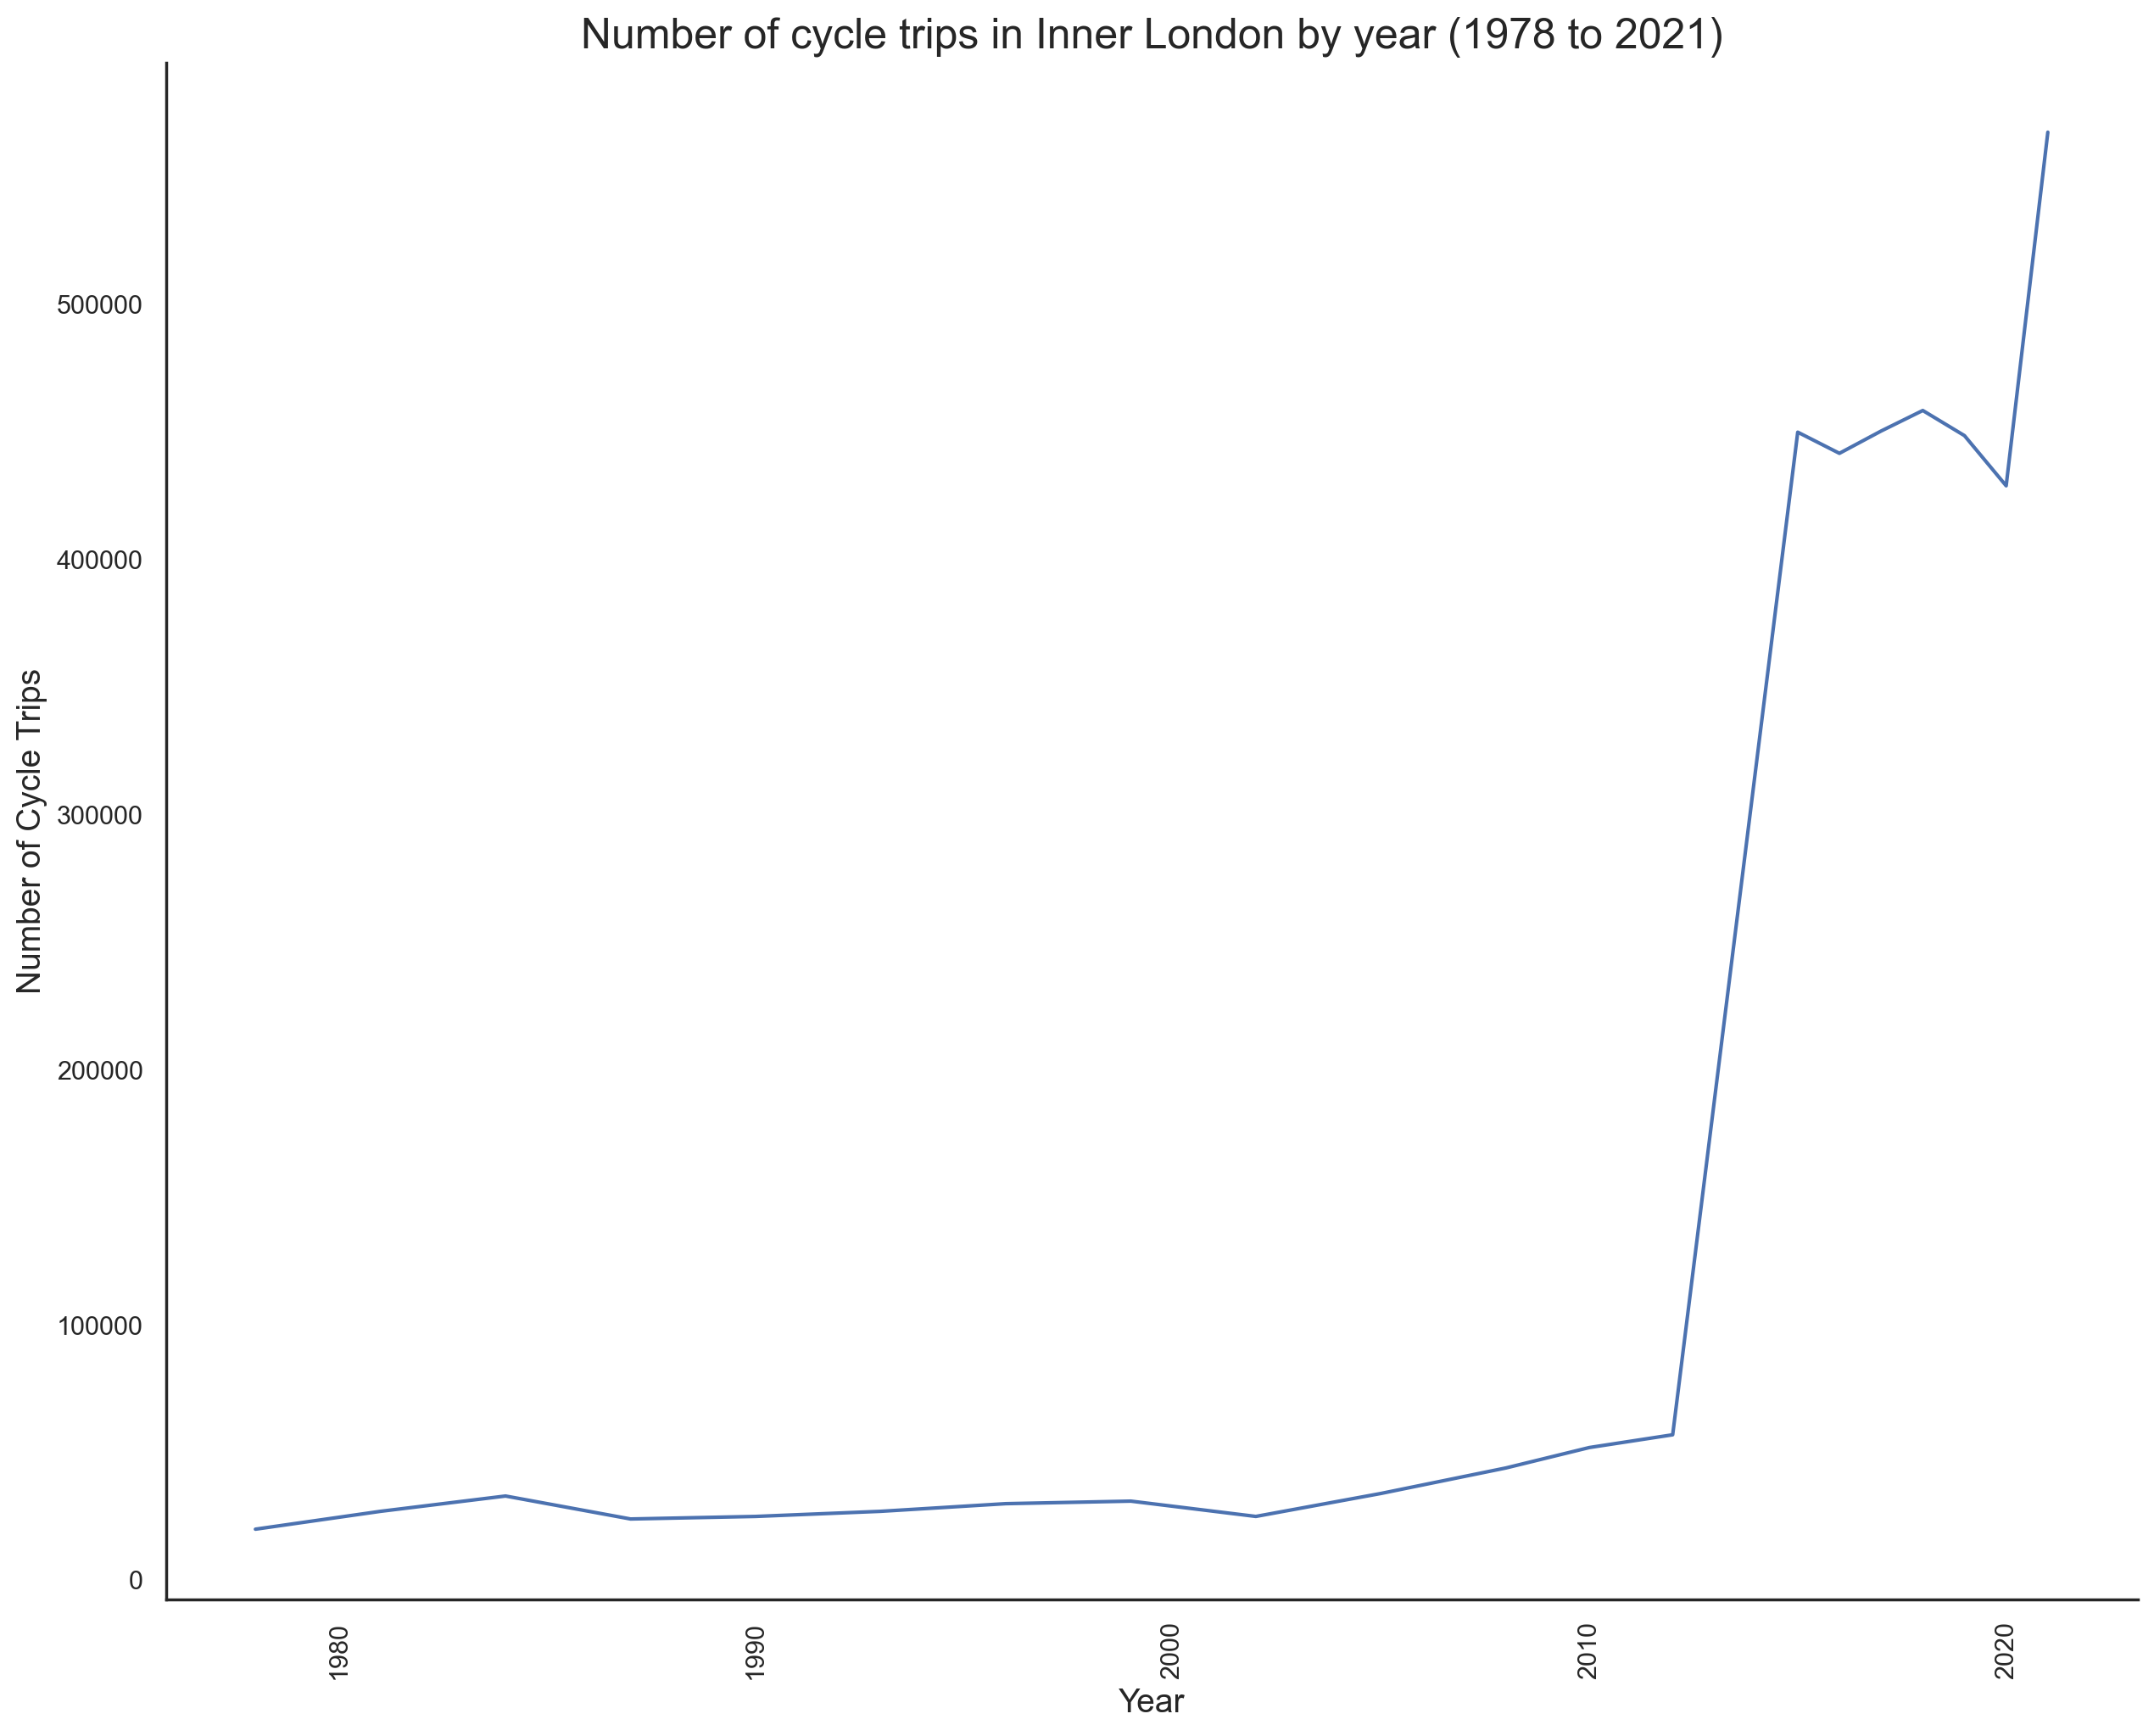

In [147]:
# Plot the number of trips by year in Inner London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by year.
fig12, ax = plt.subplots(dpi=200)
sns.lineplot(data=trips_year_area_inner2, x='Survey_Wave', y='Total cycles', ci=None, palette='colorblind')

# Label axes and add a title.
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cycle Trips', fontsize=14)
plt.title('Number of cycle trips in Inner London by year (1978 to 2021)', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig12)

# View the plot and save an image.
plt.show()
fig12.savefig('Number of cycle trips in Inner London by year (1978 to 2021).jpg')

In [148]:
# Create a separate dataset only for Outer London. 
trips_year_area_outer = trips_year_area[trips_year_area['Functional cycling area'] == 'Outer']
trips_year_area_outer

Survey_Wave Functional cycling area  Total cycles         %
3          2015                   Outer         82228  0.499307
6          2016                   Outer         80295  0.487569
9          2017                   Outer         86588  0.525782
10         2018                   Outer         91966  0.558438
15         2019                   Outer         82117  0.498633
18         2020                   Outer         74924  0.454955
21         2021                   Outer         99067  0.601557

In [149]:
# Keep the columns we need.
trips_year_area_outer = trips_year_area_outer[['Survey_Wave', 'Total cycles']]

# View the DataFrame.
trips_year_area_outer

Survey_Wave  Total cycles
3          2015         82228
6          2016         80295
9          2017         86588
10         2018         91966
15         2019         82117
18         2020         74924
21         2021         99067

In [150]:
# Use concat to join the two datasets.
trips_year_area_outer2 = pd.concat([extra_outer, trips_year_area_outer]).reset_index()

# View the DataFrame.
trips_year_area_outer2

index  Survey_Wave  Total cycles
0       0         1977         15000
1       1         1980         14000
2       2         1983         15000
3       3         1986         16000
4       4         1989         15000
5       5         1992         12000
6       6         1995         13000
7       7         1998         10000
8       8         2001          9000
9       9         2004          9000
10     10         2007         11000
11     11         2009         14000
12     12         2011         15000
13     13         2013         18000
14      3         2015         82228
15      6         2016         80295
16      9         2017         86588
17     10         2018         91966
18     15         2019         82117
19     18         2020         74924
20     21         2021         99067

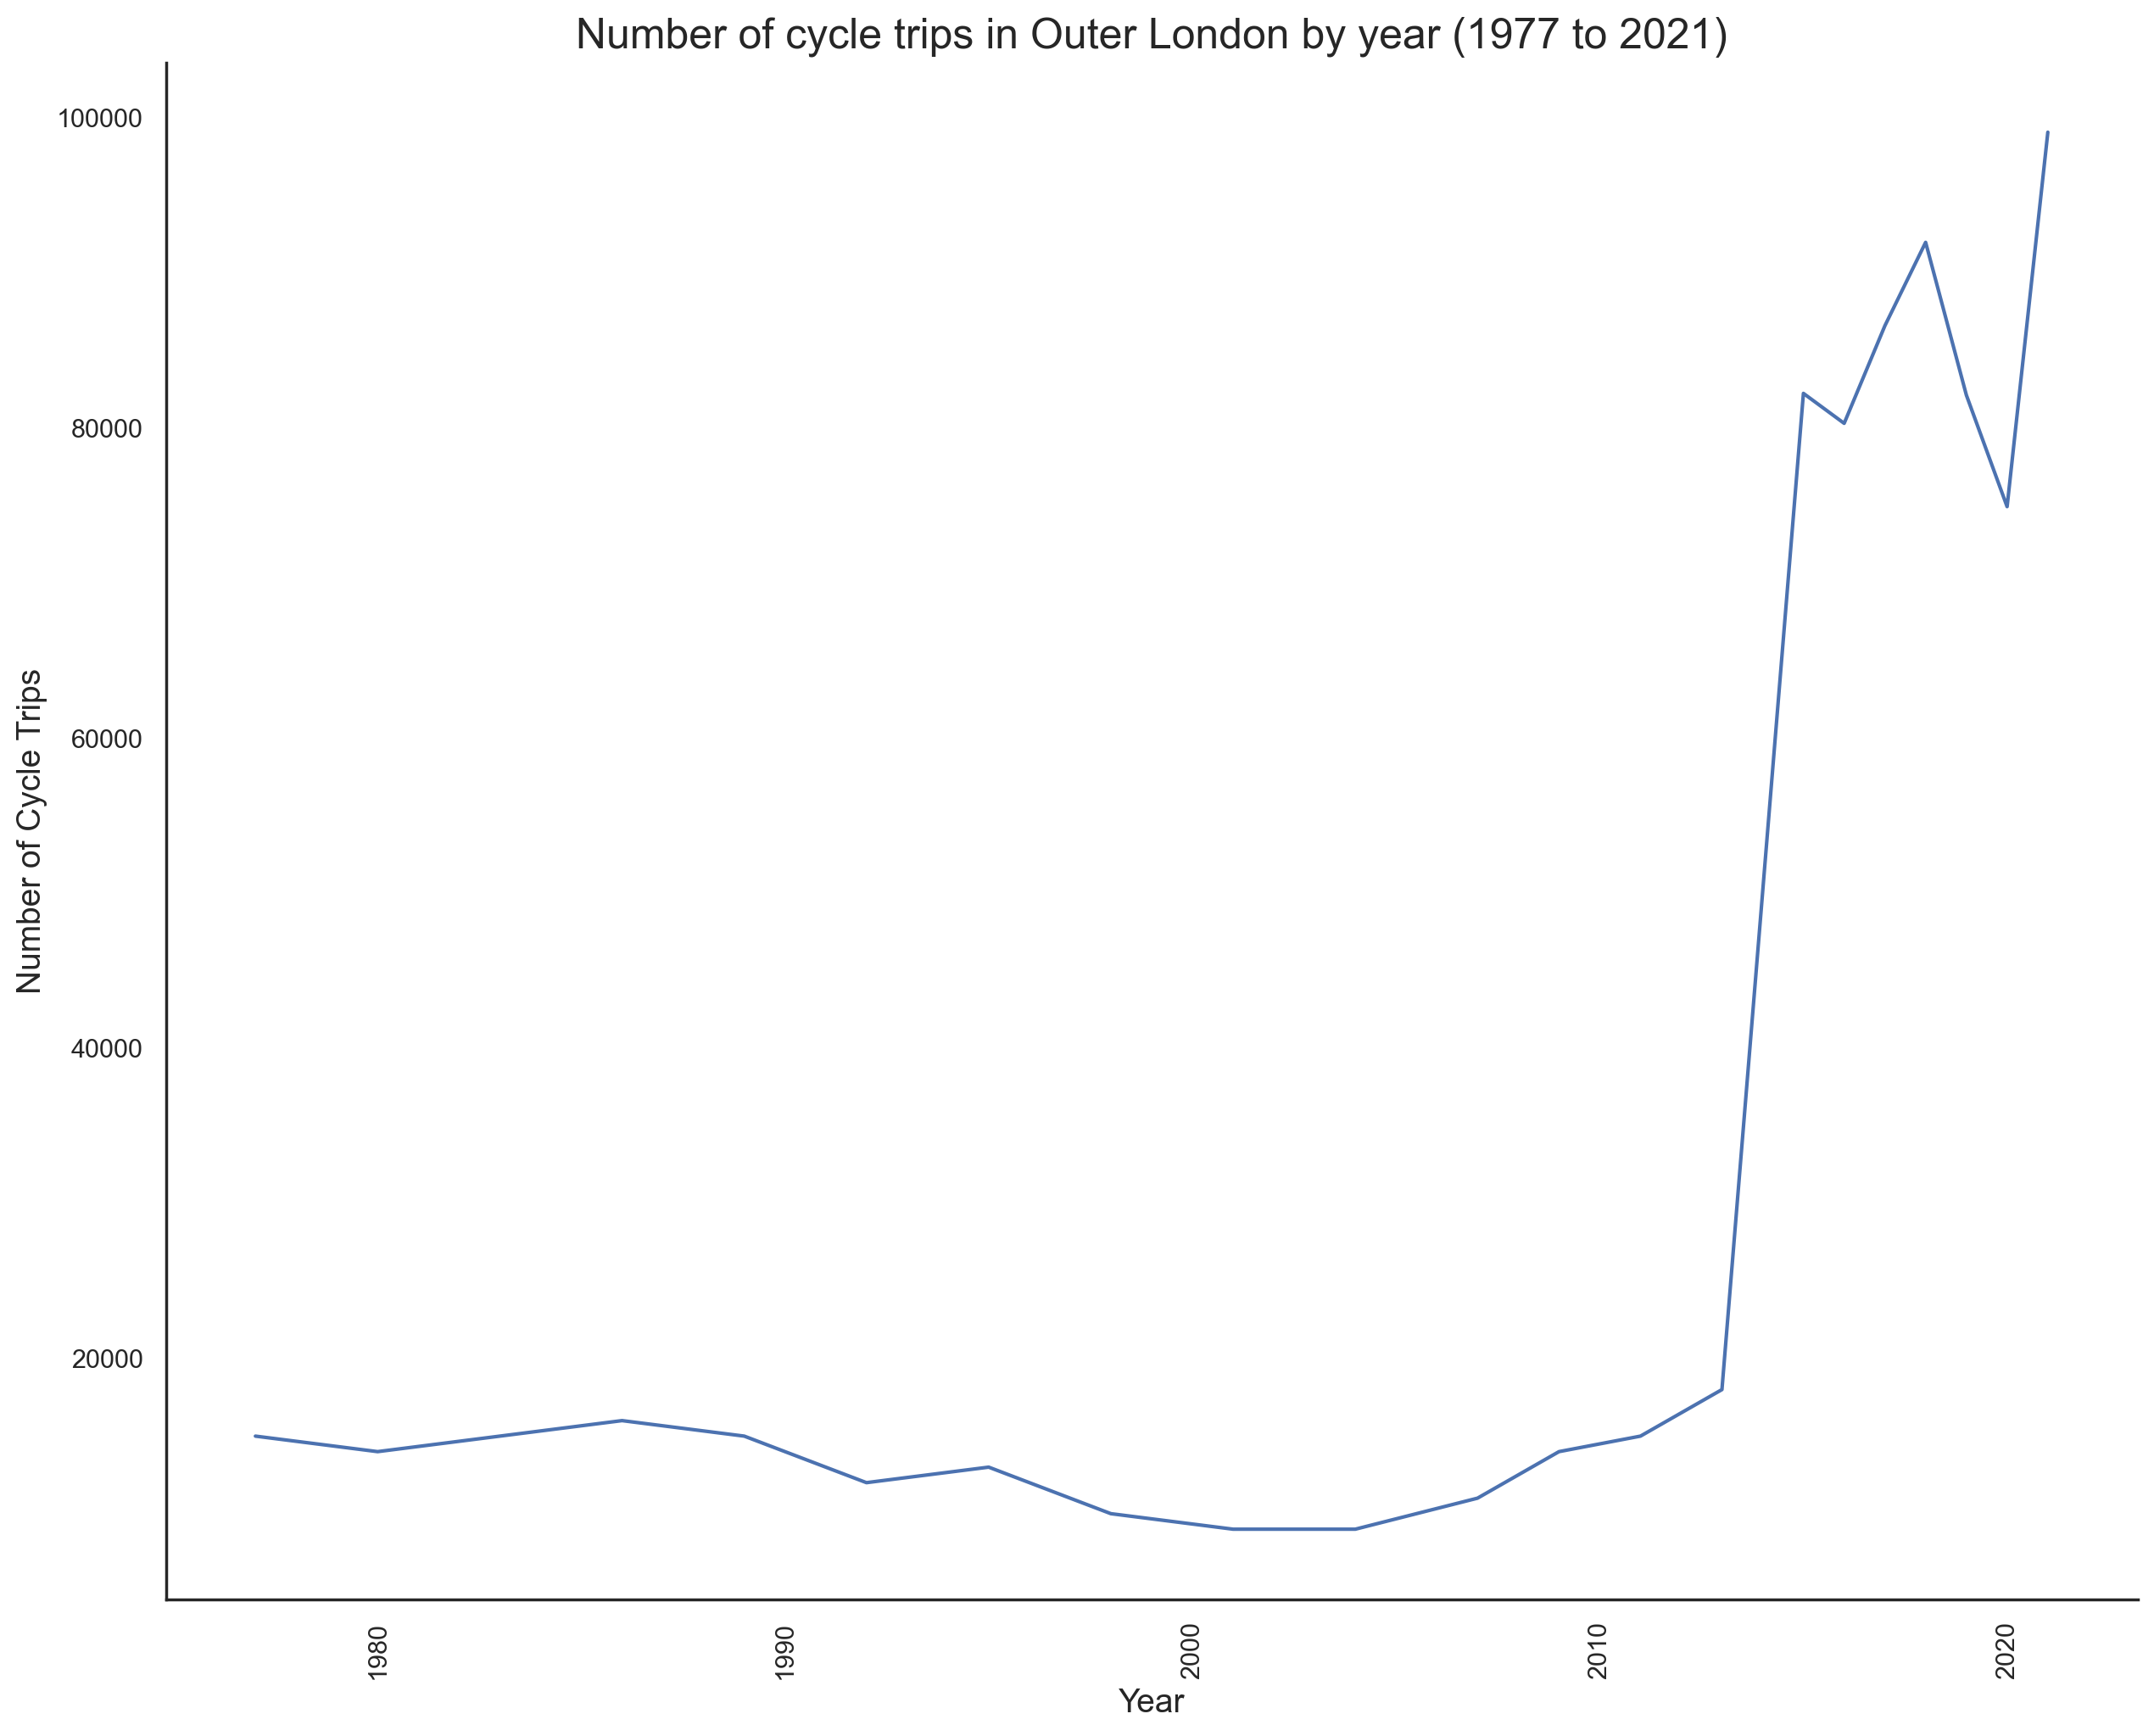

In [151]:
# Plot the number of trips by year in Outer London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by year.
fig13, ax = plt.subplots(dpi=200)
sns.lineplot(data=trips_year_area_outer2, x='Survey_Wave', y='Total cycles', ci=None, palette='colorblind')

# Label axes and add a title.
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cycle Trips', fontsize=14)
plt.title('Number of cycle trips in Outer London by year (1977 to 2021)', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig13)

# View the plot and save an image.
plt.show()
fig13.savefig('Number of cycle trips in Outer London by year (1977 to 2021).jpg')

> It becomes clear that the extra data is somehow in another scale as there is a big jump between this and the original data we are working with. Therefore, we will disregard these last three visualisations.

> Let's try to see the trend by area, without including this extra data>

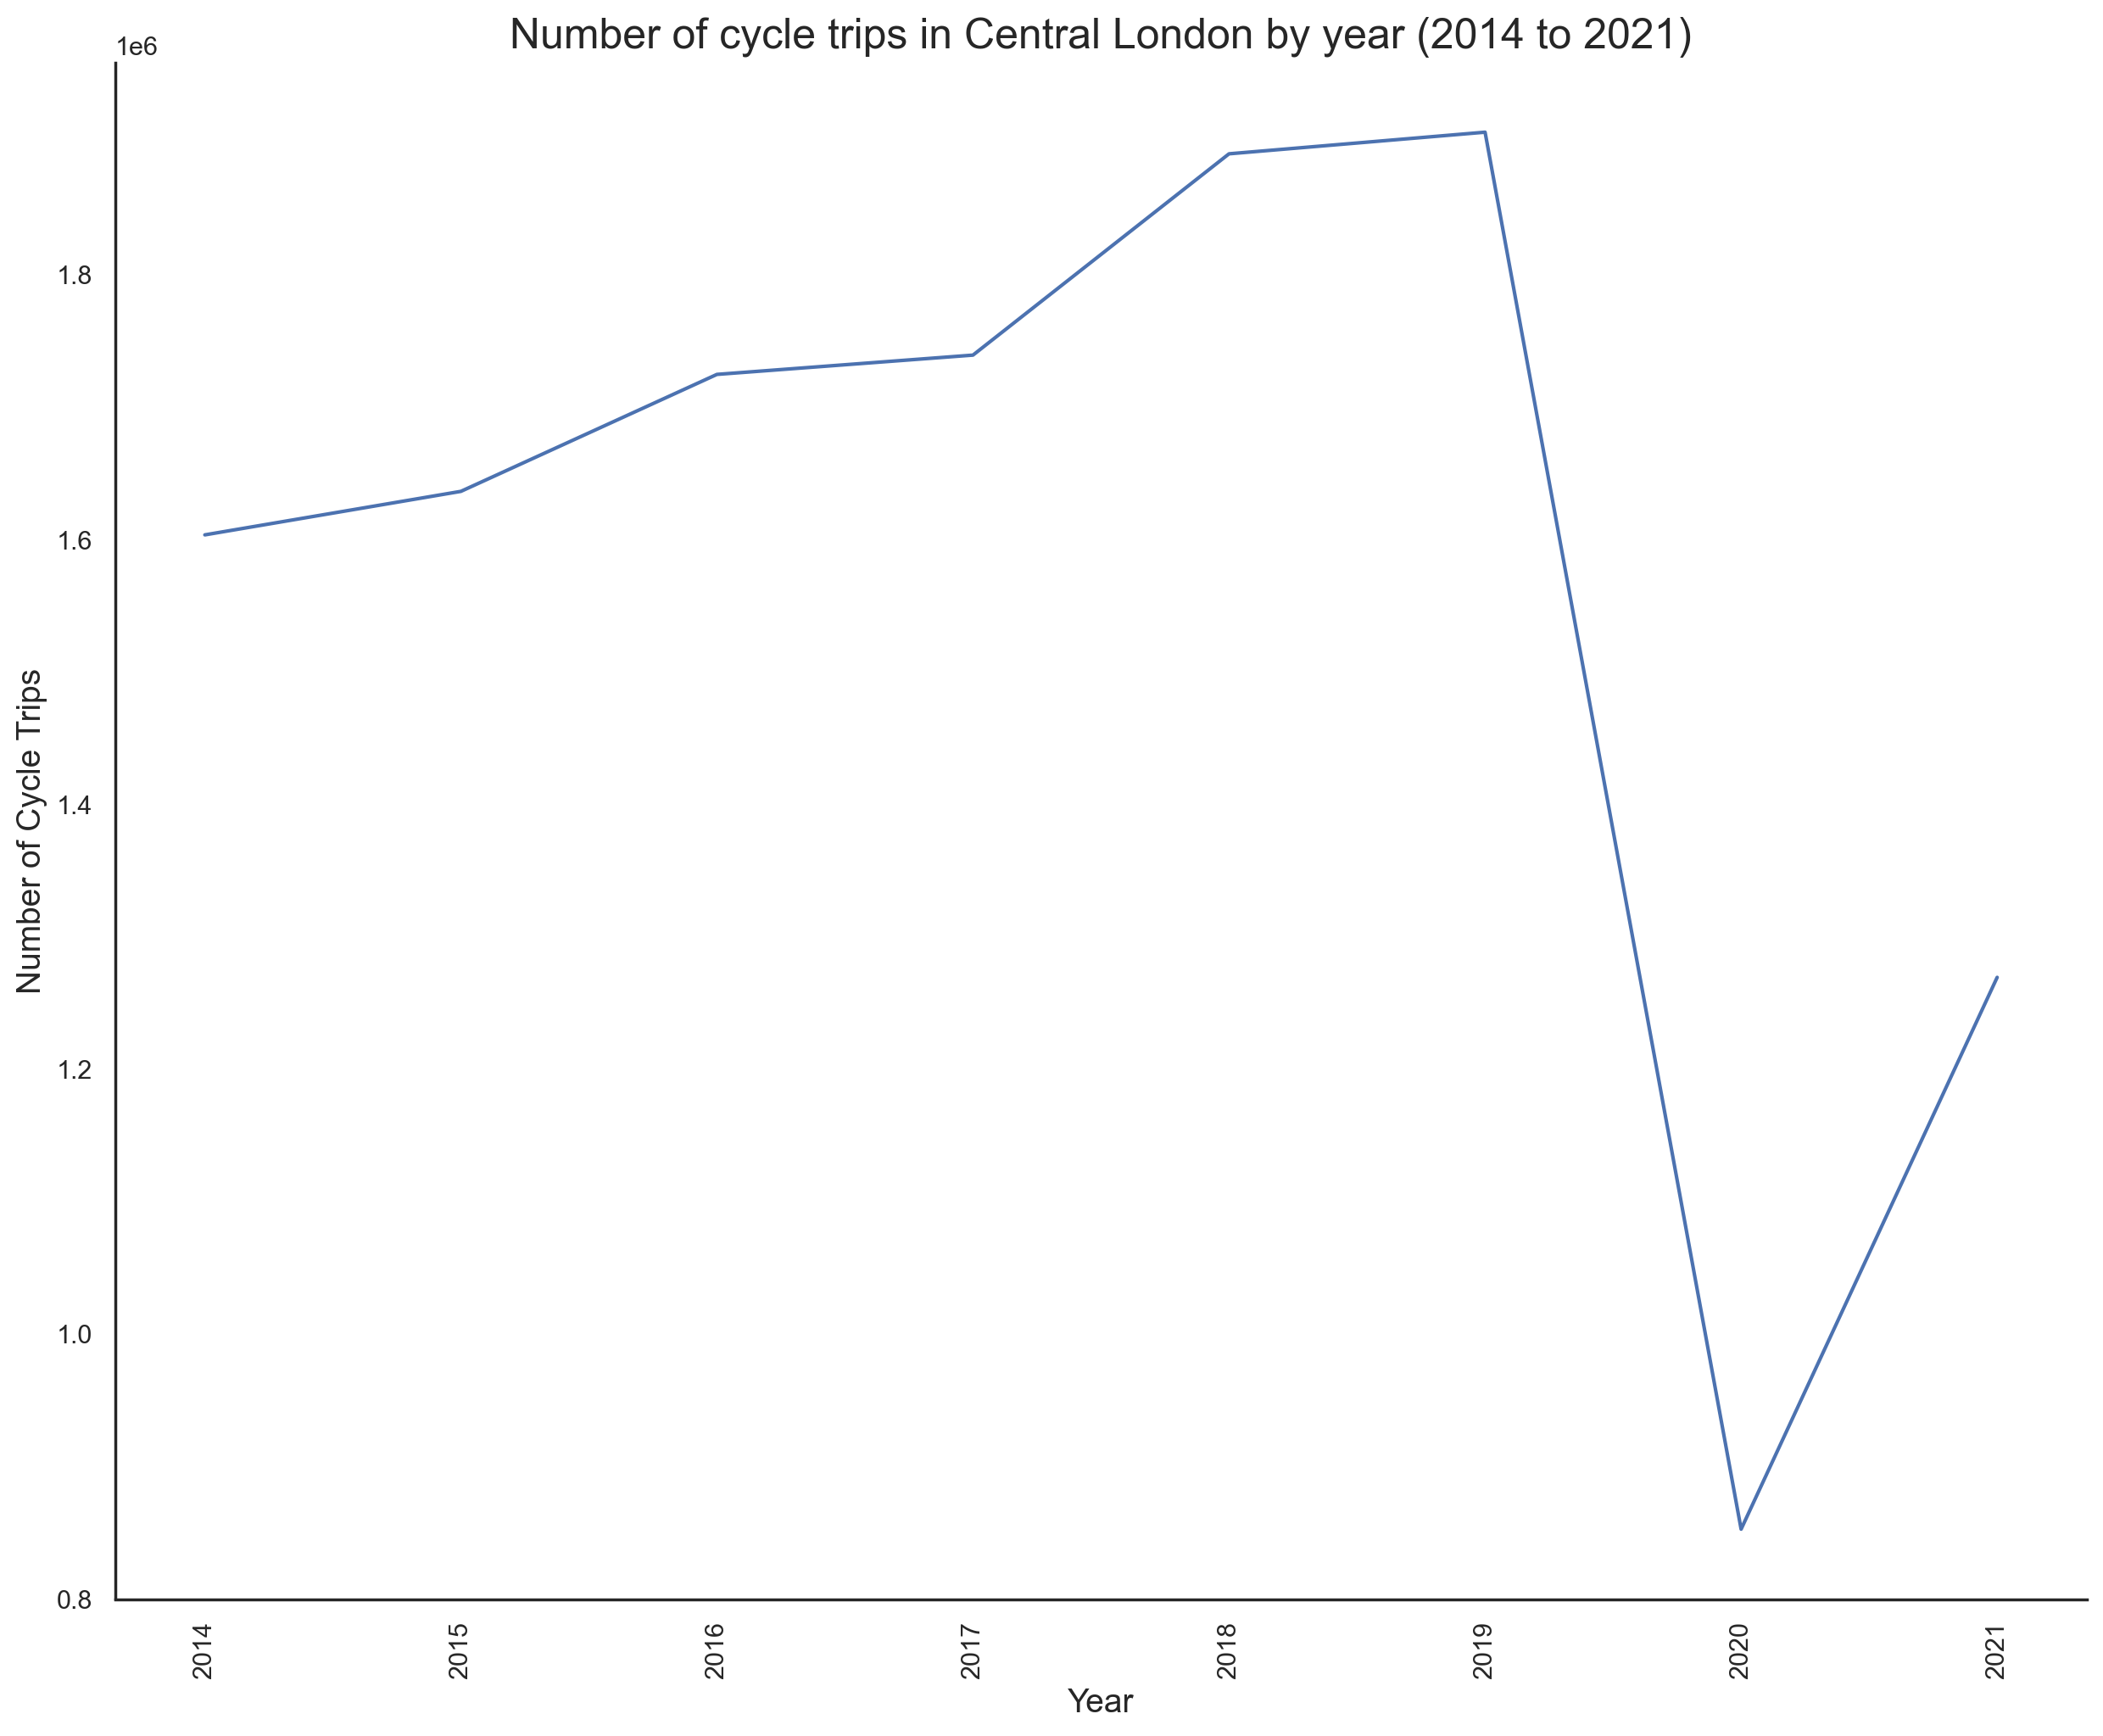

In [152]:
# Plot the number of trips by year in Central London (original data).
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by year.
fig14, ax = plt.subplots(dpi=200)
sns.lineplot(data=trips_year_area_central, x='Survey_Wave', y='Total cycles', ci=None, palette='colorblind')

# Label axes and add a title.
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cycle Trips', fontsize=14)
plt.title('Number of cycle trips in Central London by year (2014 to 2021)', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig14)

# View the plot and save an image.
plt.show()
fig14.savefig('Number of cycle trips in Central London by year (2014 to 2021).jpg')

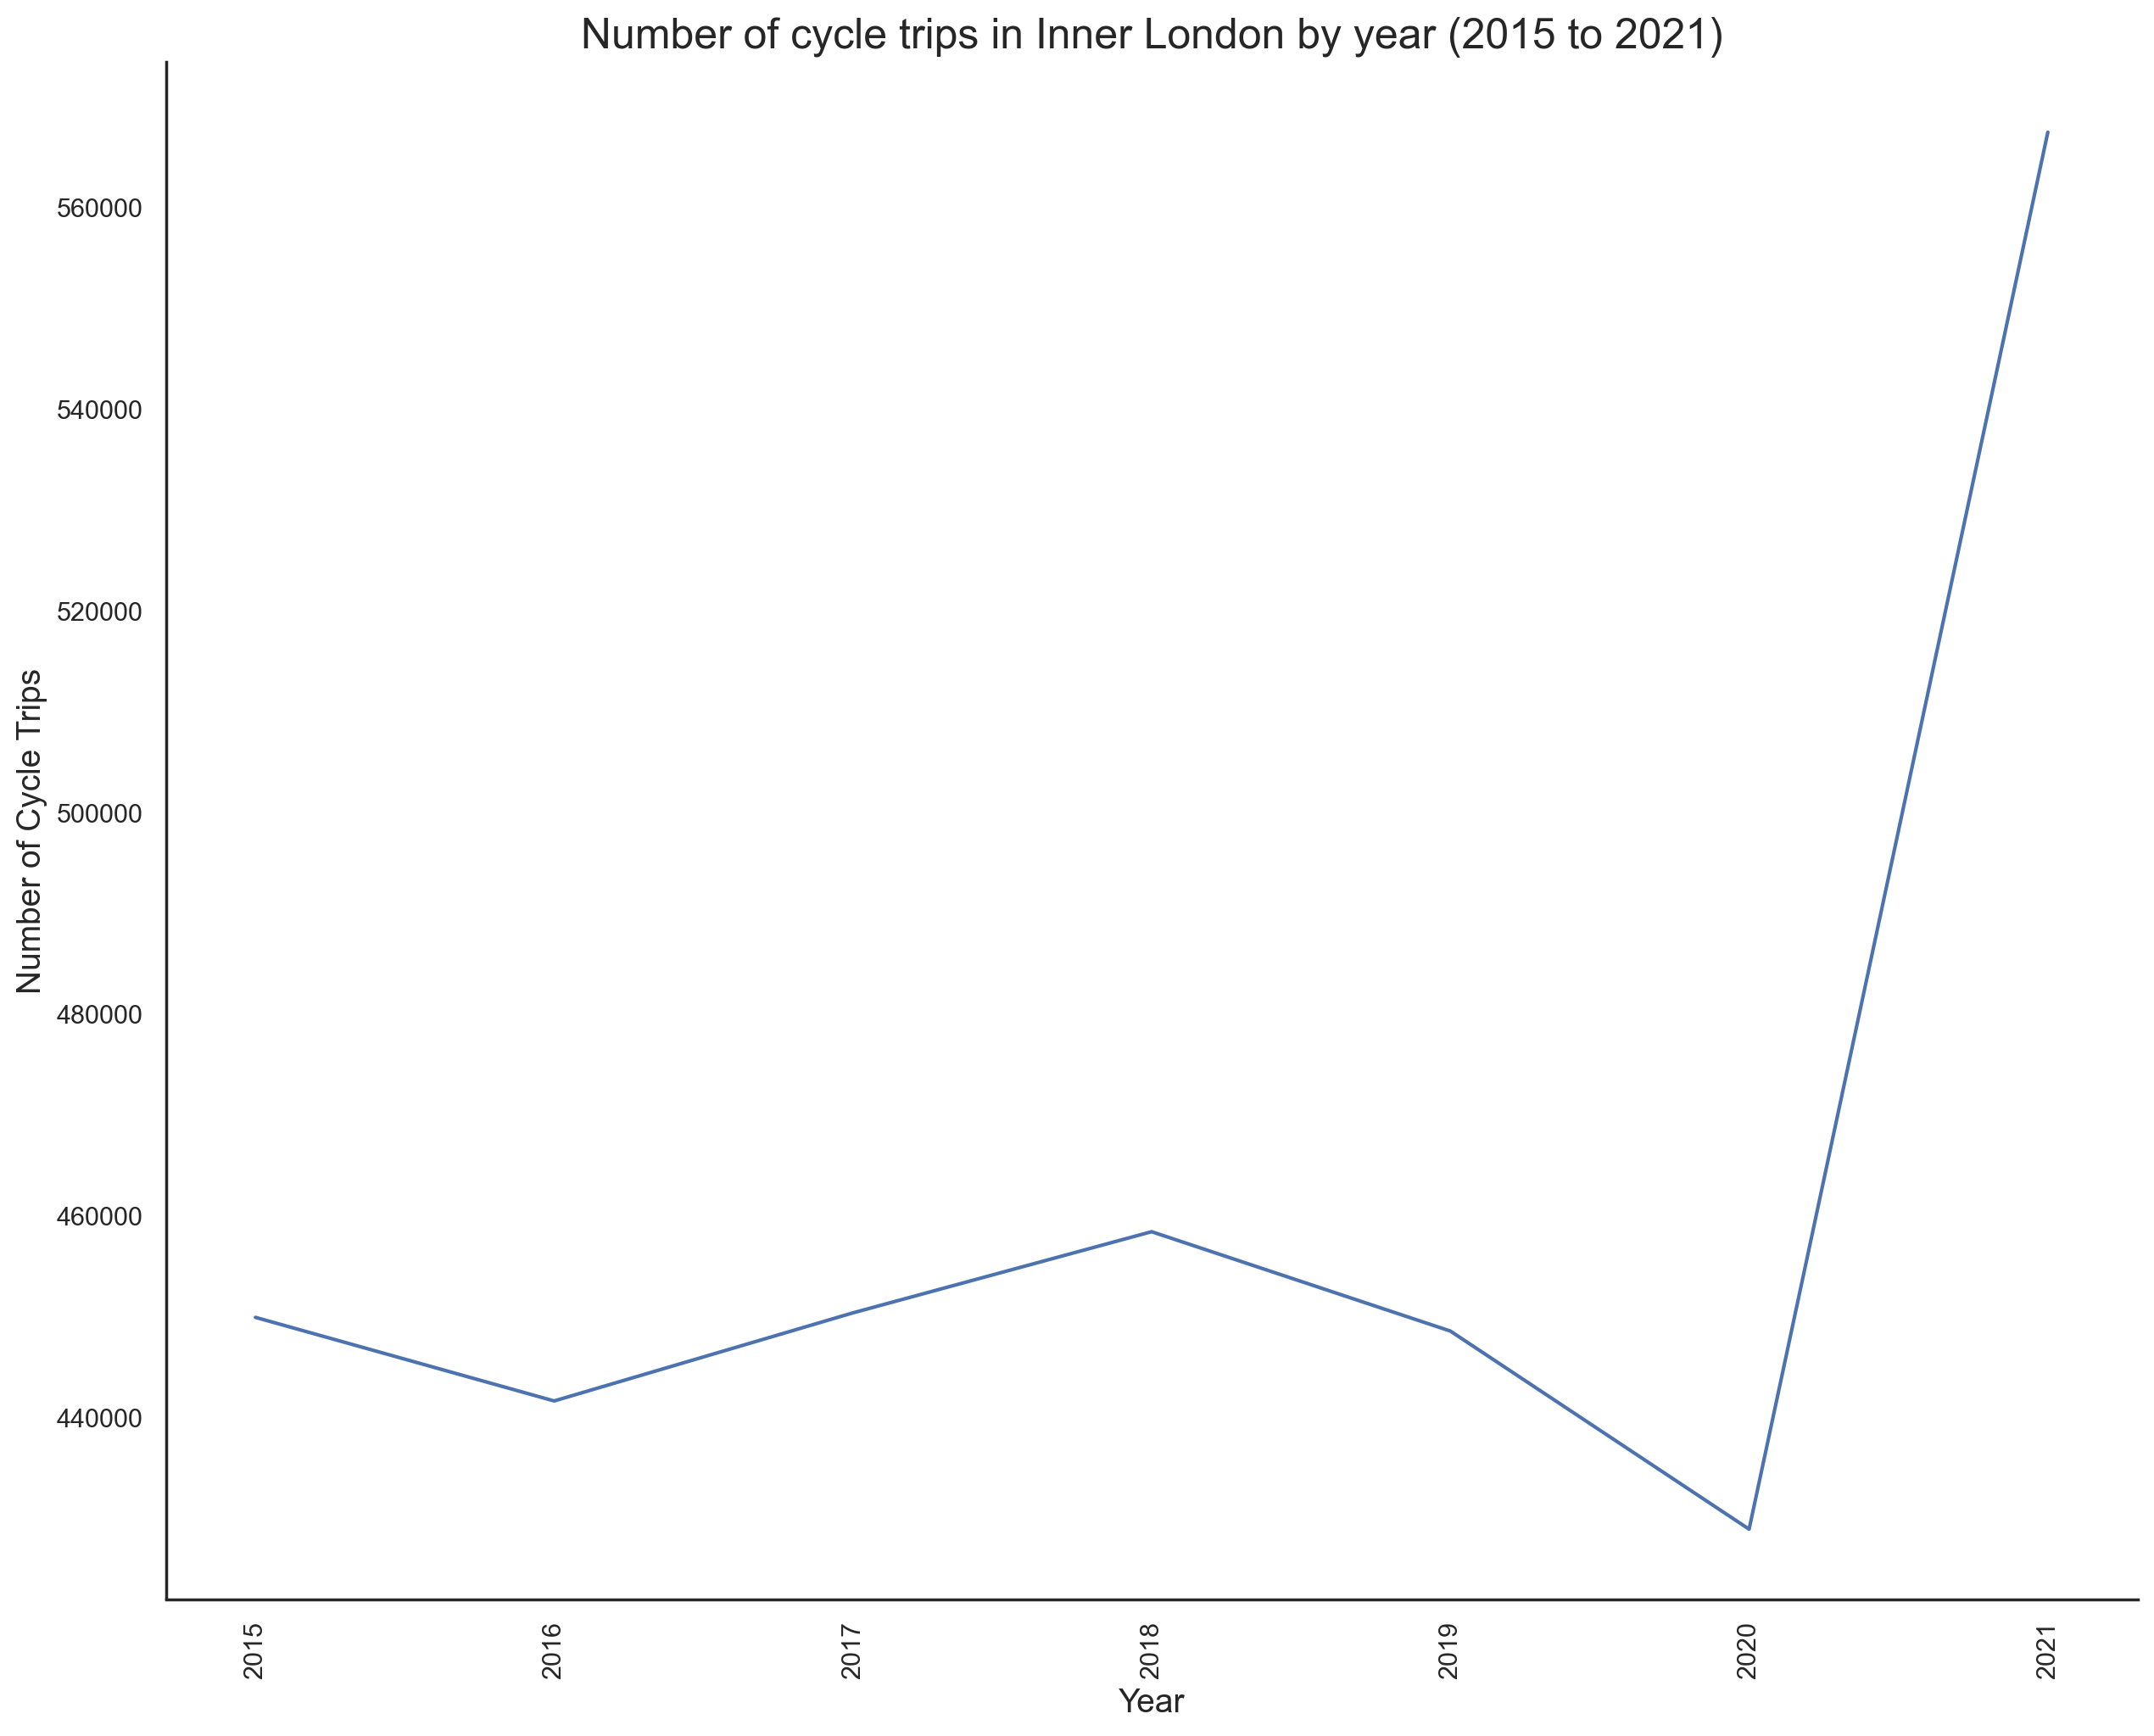

In [153]:
# Plot the number of trips by year in Inner London (original data).
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by year.
fig15, ax = plt.subplots(dpi=200)
sns.lineplot(data=trips_year_area_inner, x='Survey_Wave', y='Total cycles', ci=None, palette='colorblind')

# Label axes and add a title.
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cycle Trips', fontsize=14)
plt.title('Number of cycle trips in Inner London by year (2015 to 2021)', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig15)

# View the plot and save an image.
plt.show()
fig15.savefig('Number of cycle trips in Inner London by year (2015 to 2021).jpg')

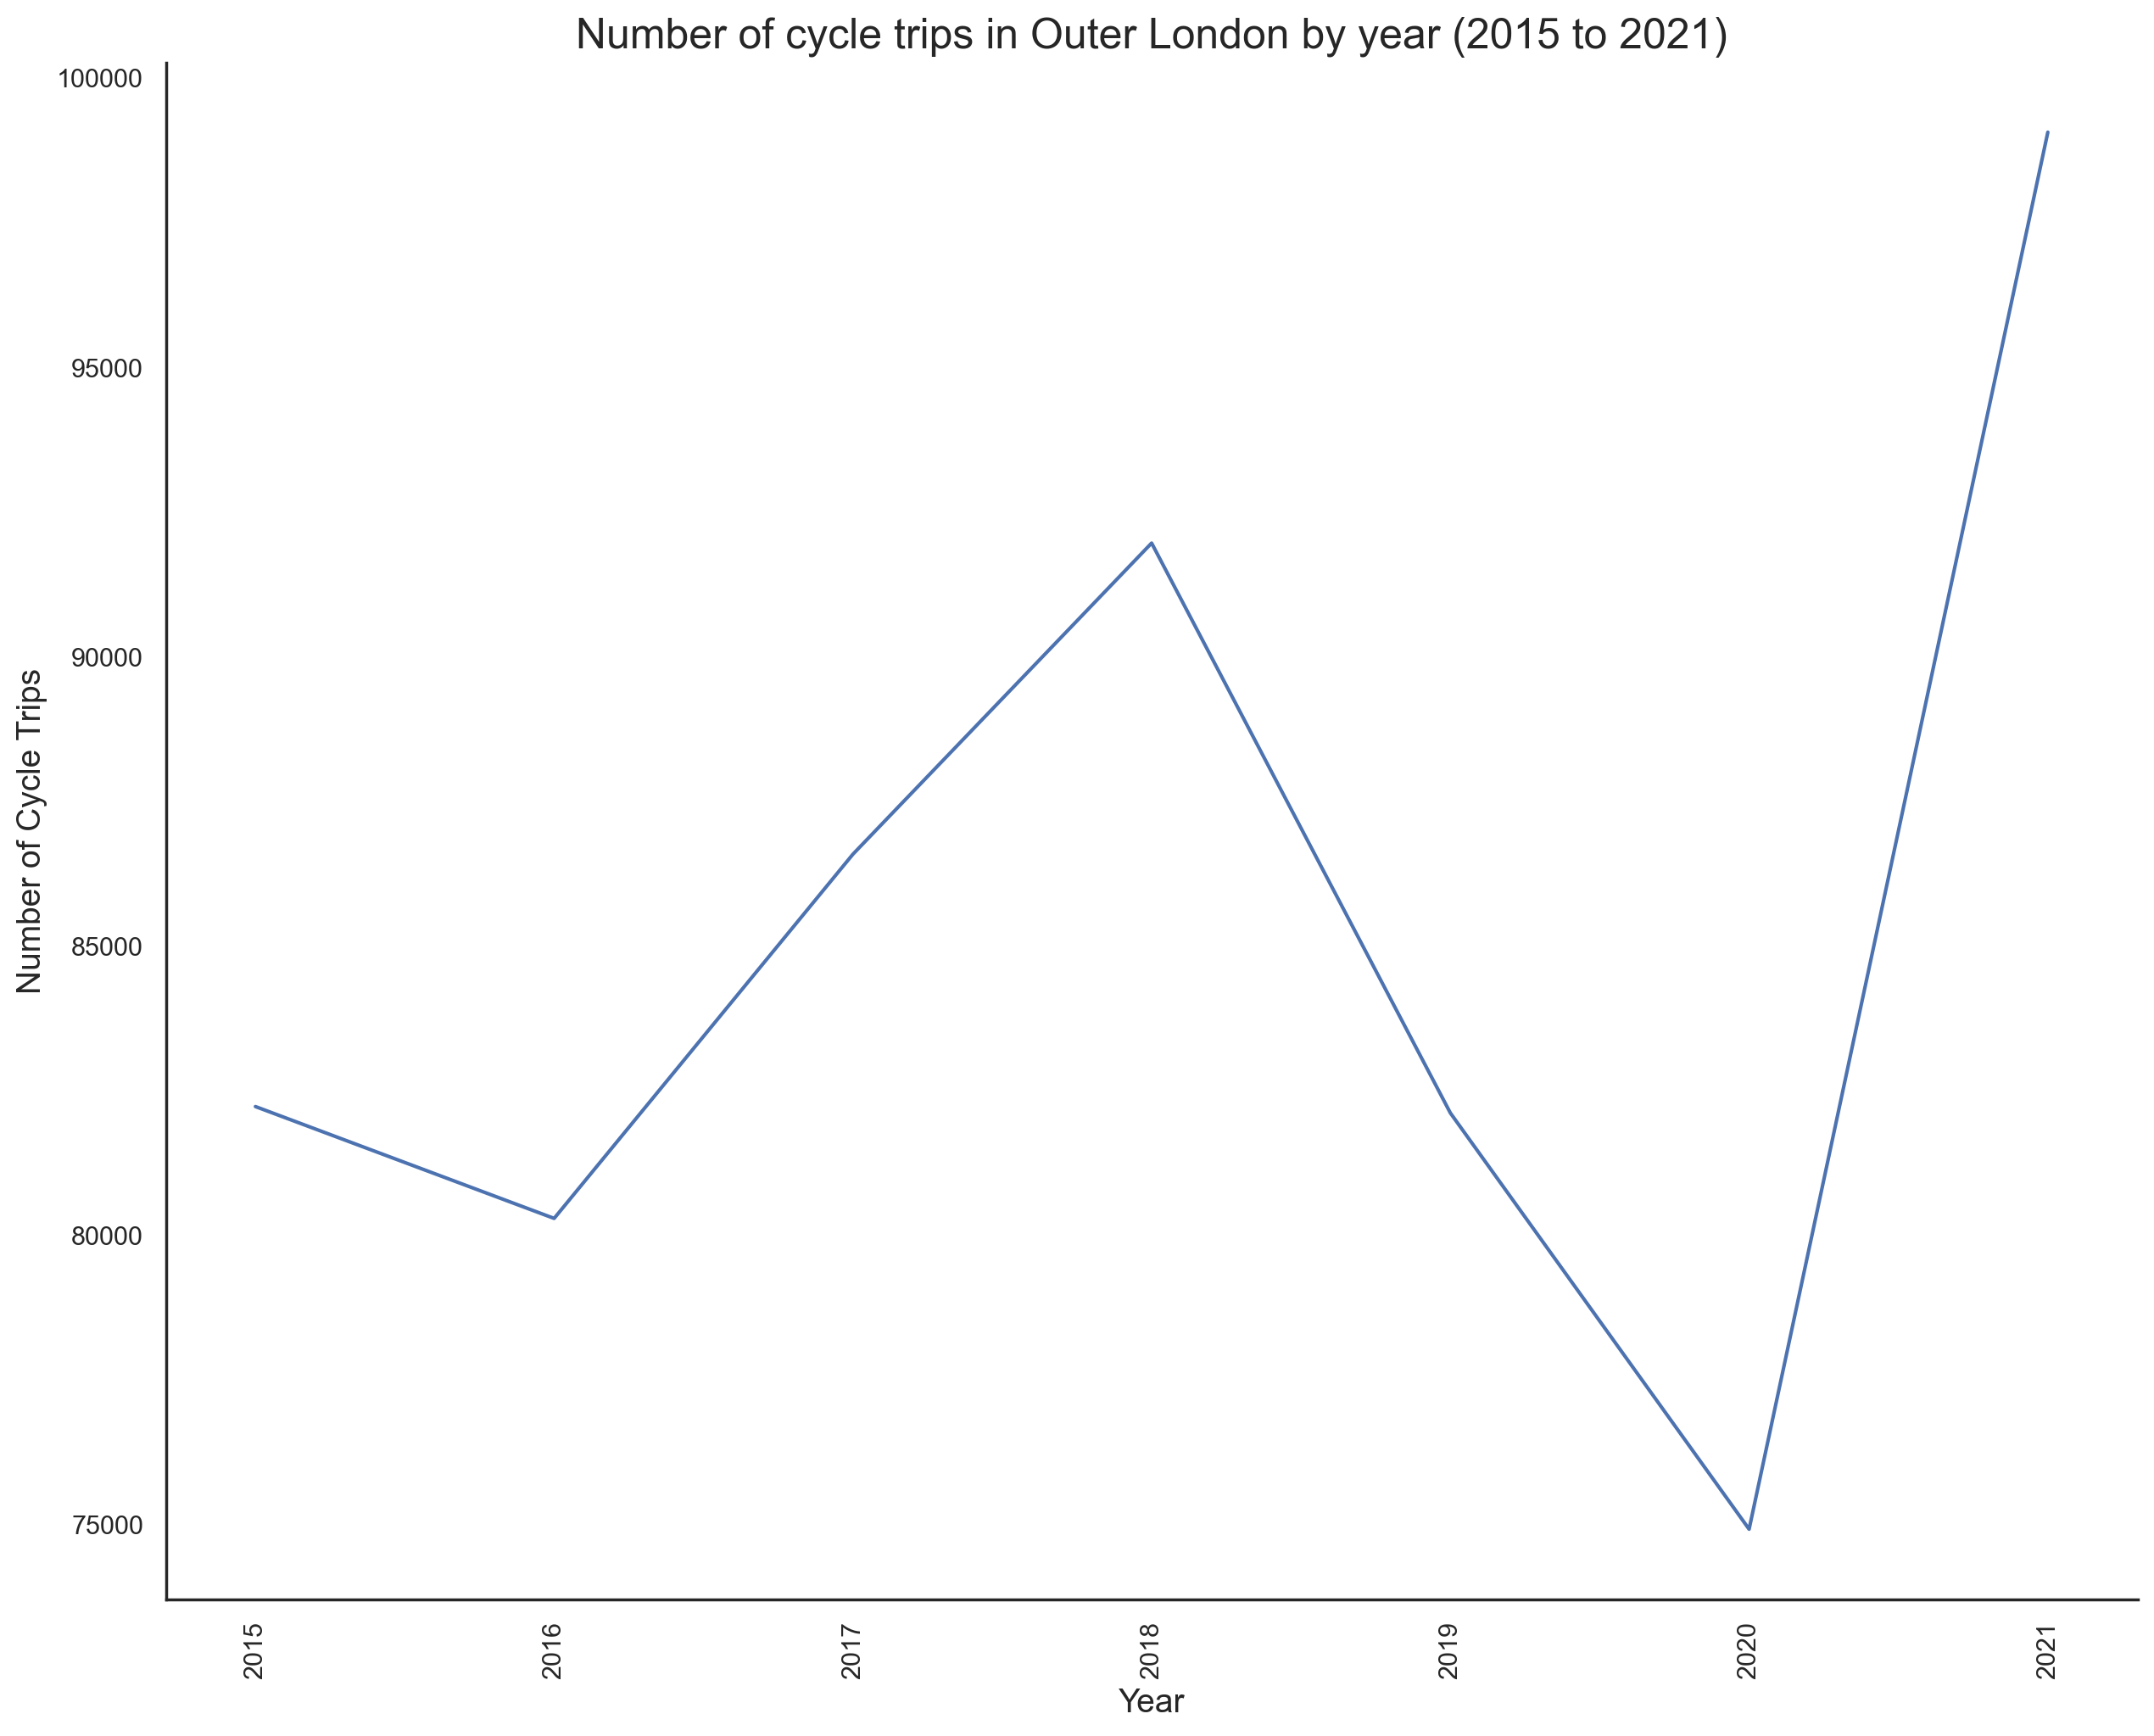

In [154]:
# Plot the number of trips by year in Outer London (original data).
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by year.
fig16, ax = plt.subplots(dpi=200)
sns.lineplot(data=trips_year_area_outer, x='Survey_Wave', y='Total cycles', ci=None, palette='colorblind')

# Label axes and add a title.
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cycle Trips', fontsize=14)
plt.title('Number of cycle trips in Outer London by year (2015 to 2021)', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig16)

# View the plot and save an image.
plt.show()
fig16.savefig('Number of cycle trips in Outer London by year (2015 to 2021).jpg')

> In all three areas 2020 was the year with less cycle trips, probably due to the COVID 19 pandemic. However, both in inner and Outer London 2021 had a quick ascend and counted the most of trips of all years registered, while in Central London 2021 is just above 2020 numbers but still lower than all previous years: could it be due to the fact that after the pandemic people has kept working from home a few days a week so Central London, where the most commuters are, feels more these changes?  

#### Let's do the timeline by month:

In [155]:
# Sum of total trips by month.
trips_month = london_sites.groupby('Survey Month')[['Total cycles']].sum().sort_values('Survey Month', ascending=True).reset_index()

# Add a column to show percentages.
trips_month['%'] = (trips_month['Total cycles']/trips_month['Total cycles'].sum()) * 100

# View the output.
trips_month.round(2)

Survey Month  Total cycles     %
0       2014-01        256301  1.57
1       2014-02         81593  0.50
2       2014-03          6146  0.04
3       2014-04        106024  0.65
4       2014-05        148116  0.91
..          ...           ...   ...
85      2021-08        144803  0.89
86      2021-09        197948  1.22
87      2021-10        127583  0.78
88      2021-11        169204  1.04
89      2021-12        124388  0.76

[90 rows x 3 columns]

In [156]:
# Create a CSV file as output.
trips_month.to_csv('trips_month.csv', index=False)

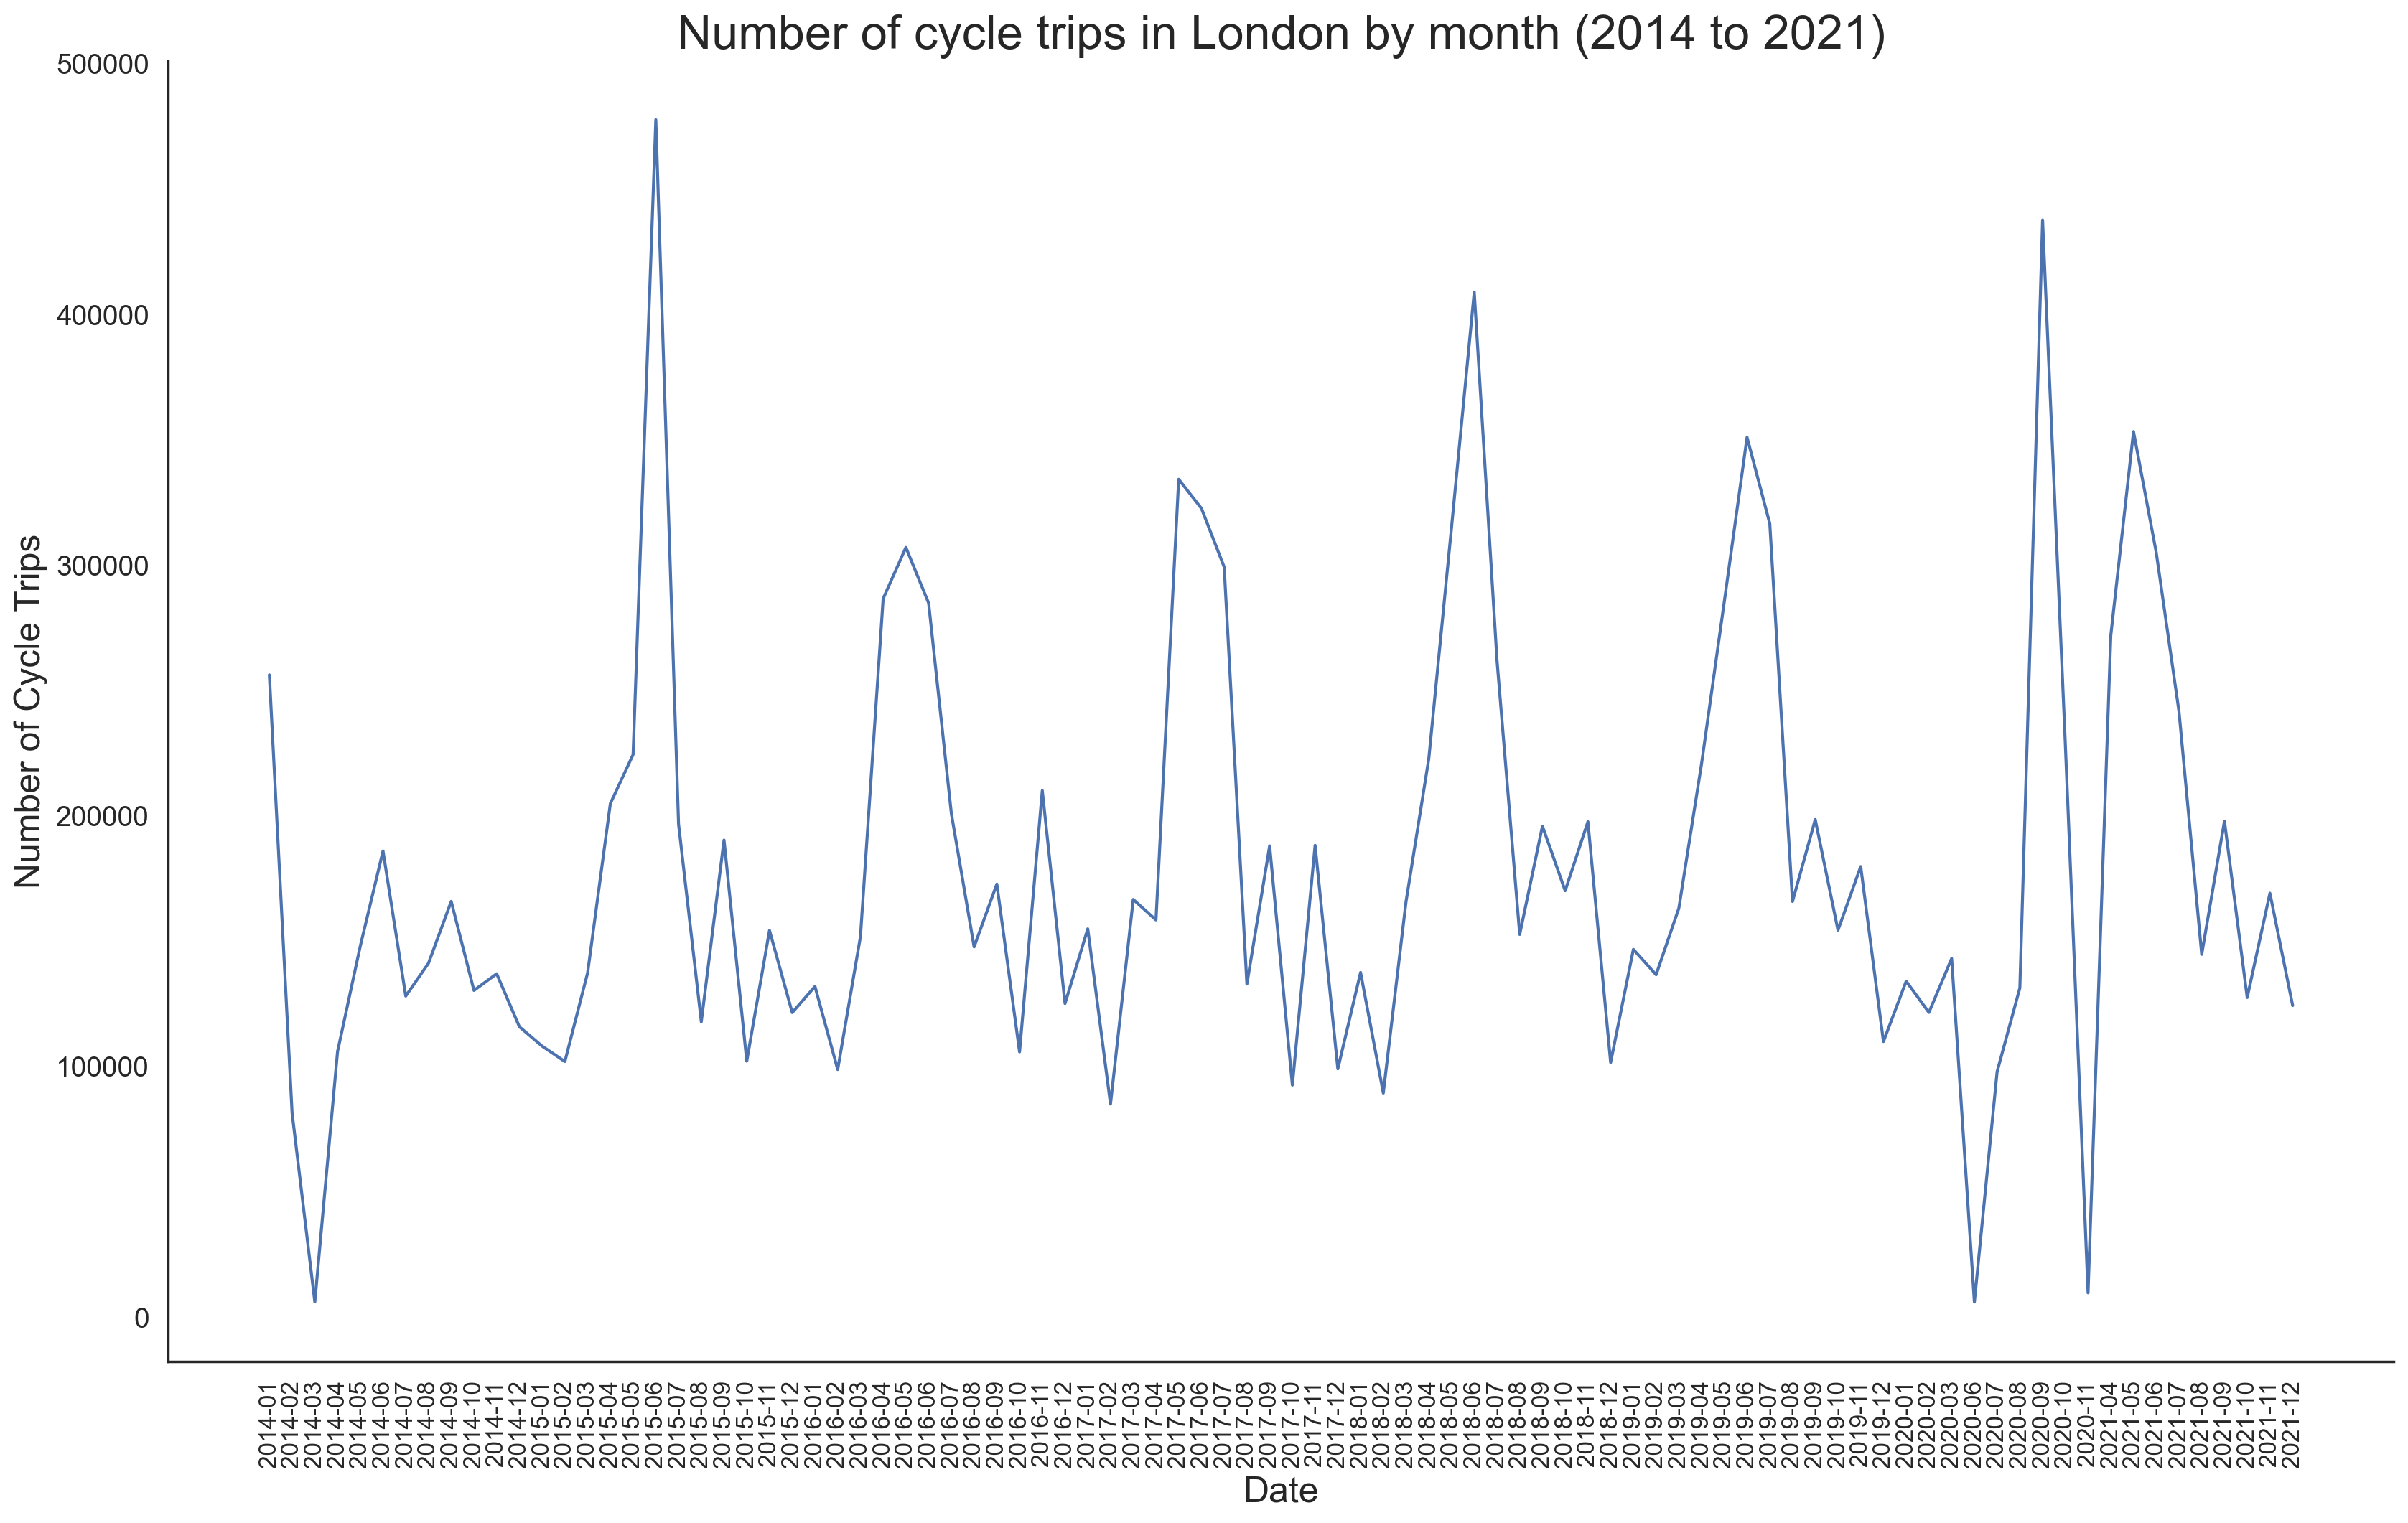

In [157]:
# Plot the number of trips by month.
# Set figure size.
sns.set(rc={'figure.figsize':(20, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by month.
fig17, ax = plt.subplots(dpi=200)
sns.lineplot(data=trips_month, x=trips_month['Survey Month'].astype(str), y='Total cycles', ci=None, palette='colorblind')

# Label axes and add a title.
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Cycle Trips', fontsize=18)
plt.title('Number of cycle trips in London by month (2014 to 2021)', fontsize=24)

# Set ticks size.
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

# Remove the top and right spines from the plot.
sns.despine(fig17)

# View the plot and save an image.
plt.show()
fig17.savefig('Number of cycle trips in London by month (2014 to 2021).jpg')

> Before the pandemic it feels there was a seasonal trend where May and June were the most popular months of the year for cycle trips. However, this timeline is not very long to provide a good representation.

In [158]:
# Sum of total trips by month and area.
trips_month_area = london_sites.groupby(['Survey Month', 'Functional cycling area'])[['Total cycles']]\
.sum().sort_values('Survey Month', ascending=True).reset_index()

# View the output.
trips_month_area

Survey Month Functional cycling area  Total cycles
0        2014-01                 Central        256301
1        2014-02                 Central         81593
2        2014-03                 Central          6146
3        2014-04                 Central        106024
4        2014-05                 Central        148116
..           ...                     ...           ...
149      2021-09                   Inner           616
150      2021-09                 Central        197332
151      2021-10                 Central        127583
152      2021-11                 Central        169204
153      2021-12                 Central        124388

[154 rows x 3 columns]

In [159]:
# Create a CSV file as output.
trips_month_area.to_csv('trips_month_area.csv', index=False)

#### Distribution of cycle trips by day of the week:

In [160]:
# Sum of total trips by weekday.
trips_weekday = london_sites.groupby('Weekday')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False).reset_index()

# Add a column to show percentages.
trips_weekday['%'] = (trips_weekday['Total cycles']/trips_weekday['Total cycles'].sum()) * 100

# View the output.
trips_weekday.round(2)

Weekday  Total cycles      %
0    Tuesday       3777330  22.94
1     Monday       3589883  21.80
2  Wednesday       3574241  21.70
3   Thursday       3092077  18.78
4     Friday       2245456  13.63
5    Unknown        183311   1.11
6     Sunday          3591   0.02
7   Saturday          2545   0.02

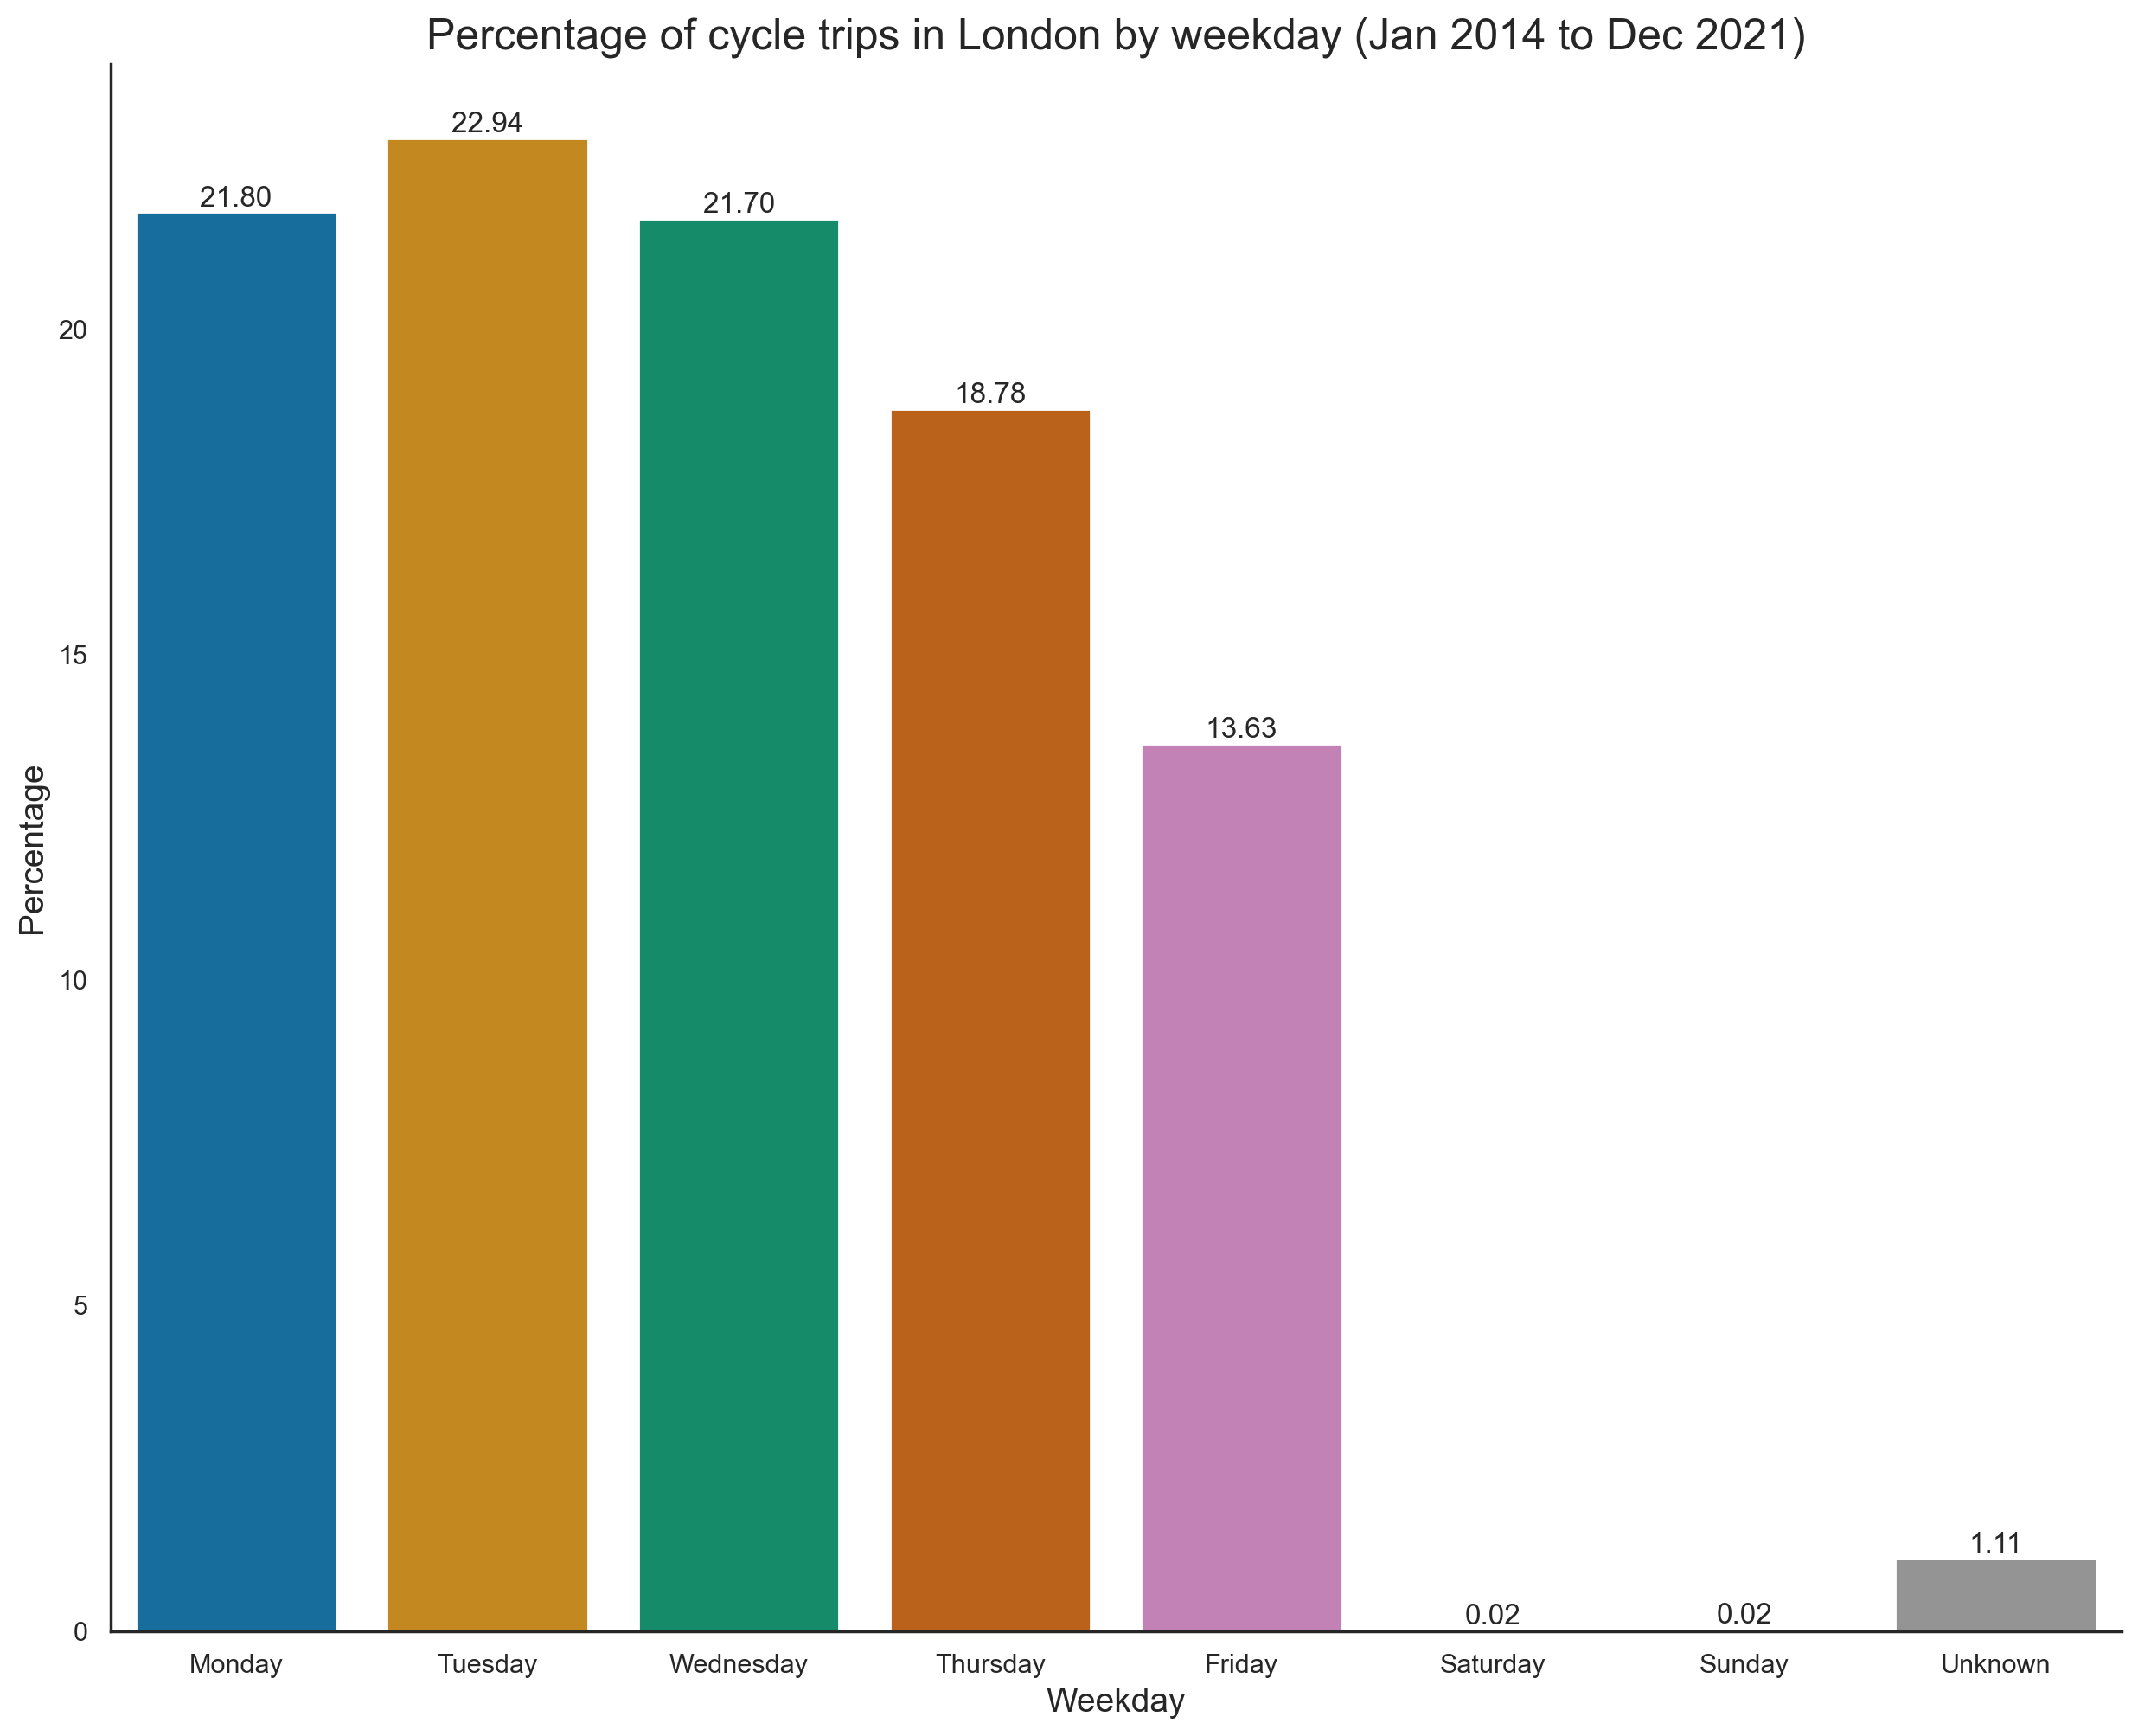

In [161]:
# Plot the number of trips by weekday.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by weekday.
fig18, ax = plt.subplots(dpi=200)
trips_weekday_plot = sns.barplot(data = trips_weekday, x = 'Weekday', y = '%',
                                order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Unknown'],
                                palette='colorblind')

# Label axes and add a title.
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of cycle trips in London by weekday (Jan 2014 to Dec 2021)', fontsize=18)

# Add a value to each bar.
trips_weekday_plot.bar_label(trips_weekday_plot.containers[0], label_type='edge', fmt='%.2f')

# Remove the top and right spines from the plot.
sns.despine(fig18)

# View the plot and save an image.
plt.show()
fig18.savefig('Percentage of cycle trips in London by weekday (Jan 2014 to Dec 2021).jpg')

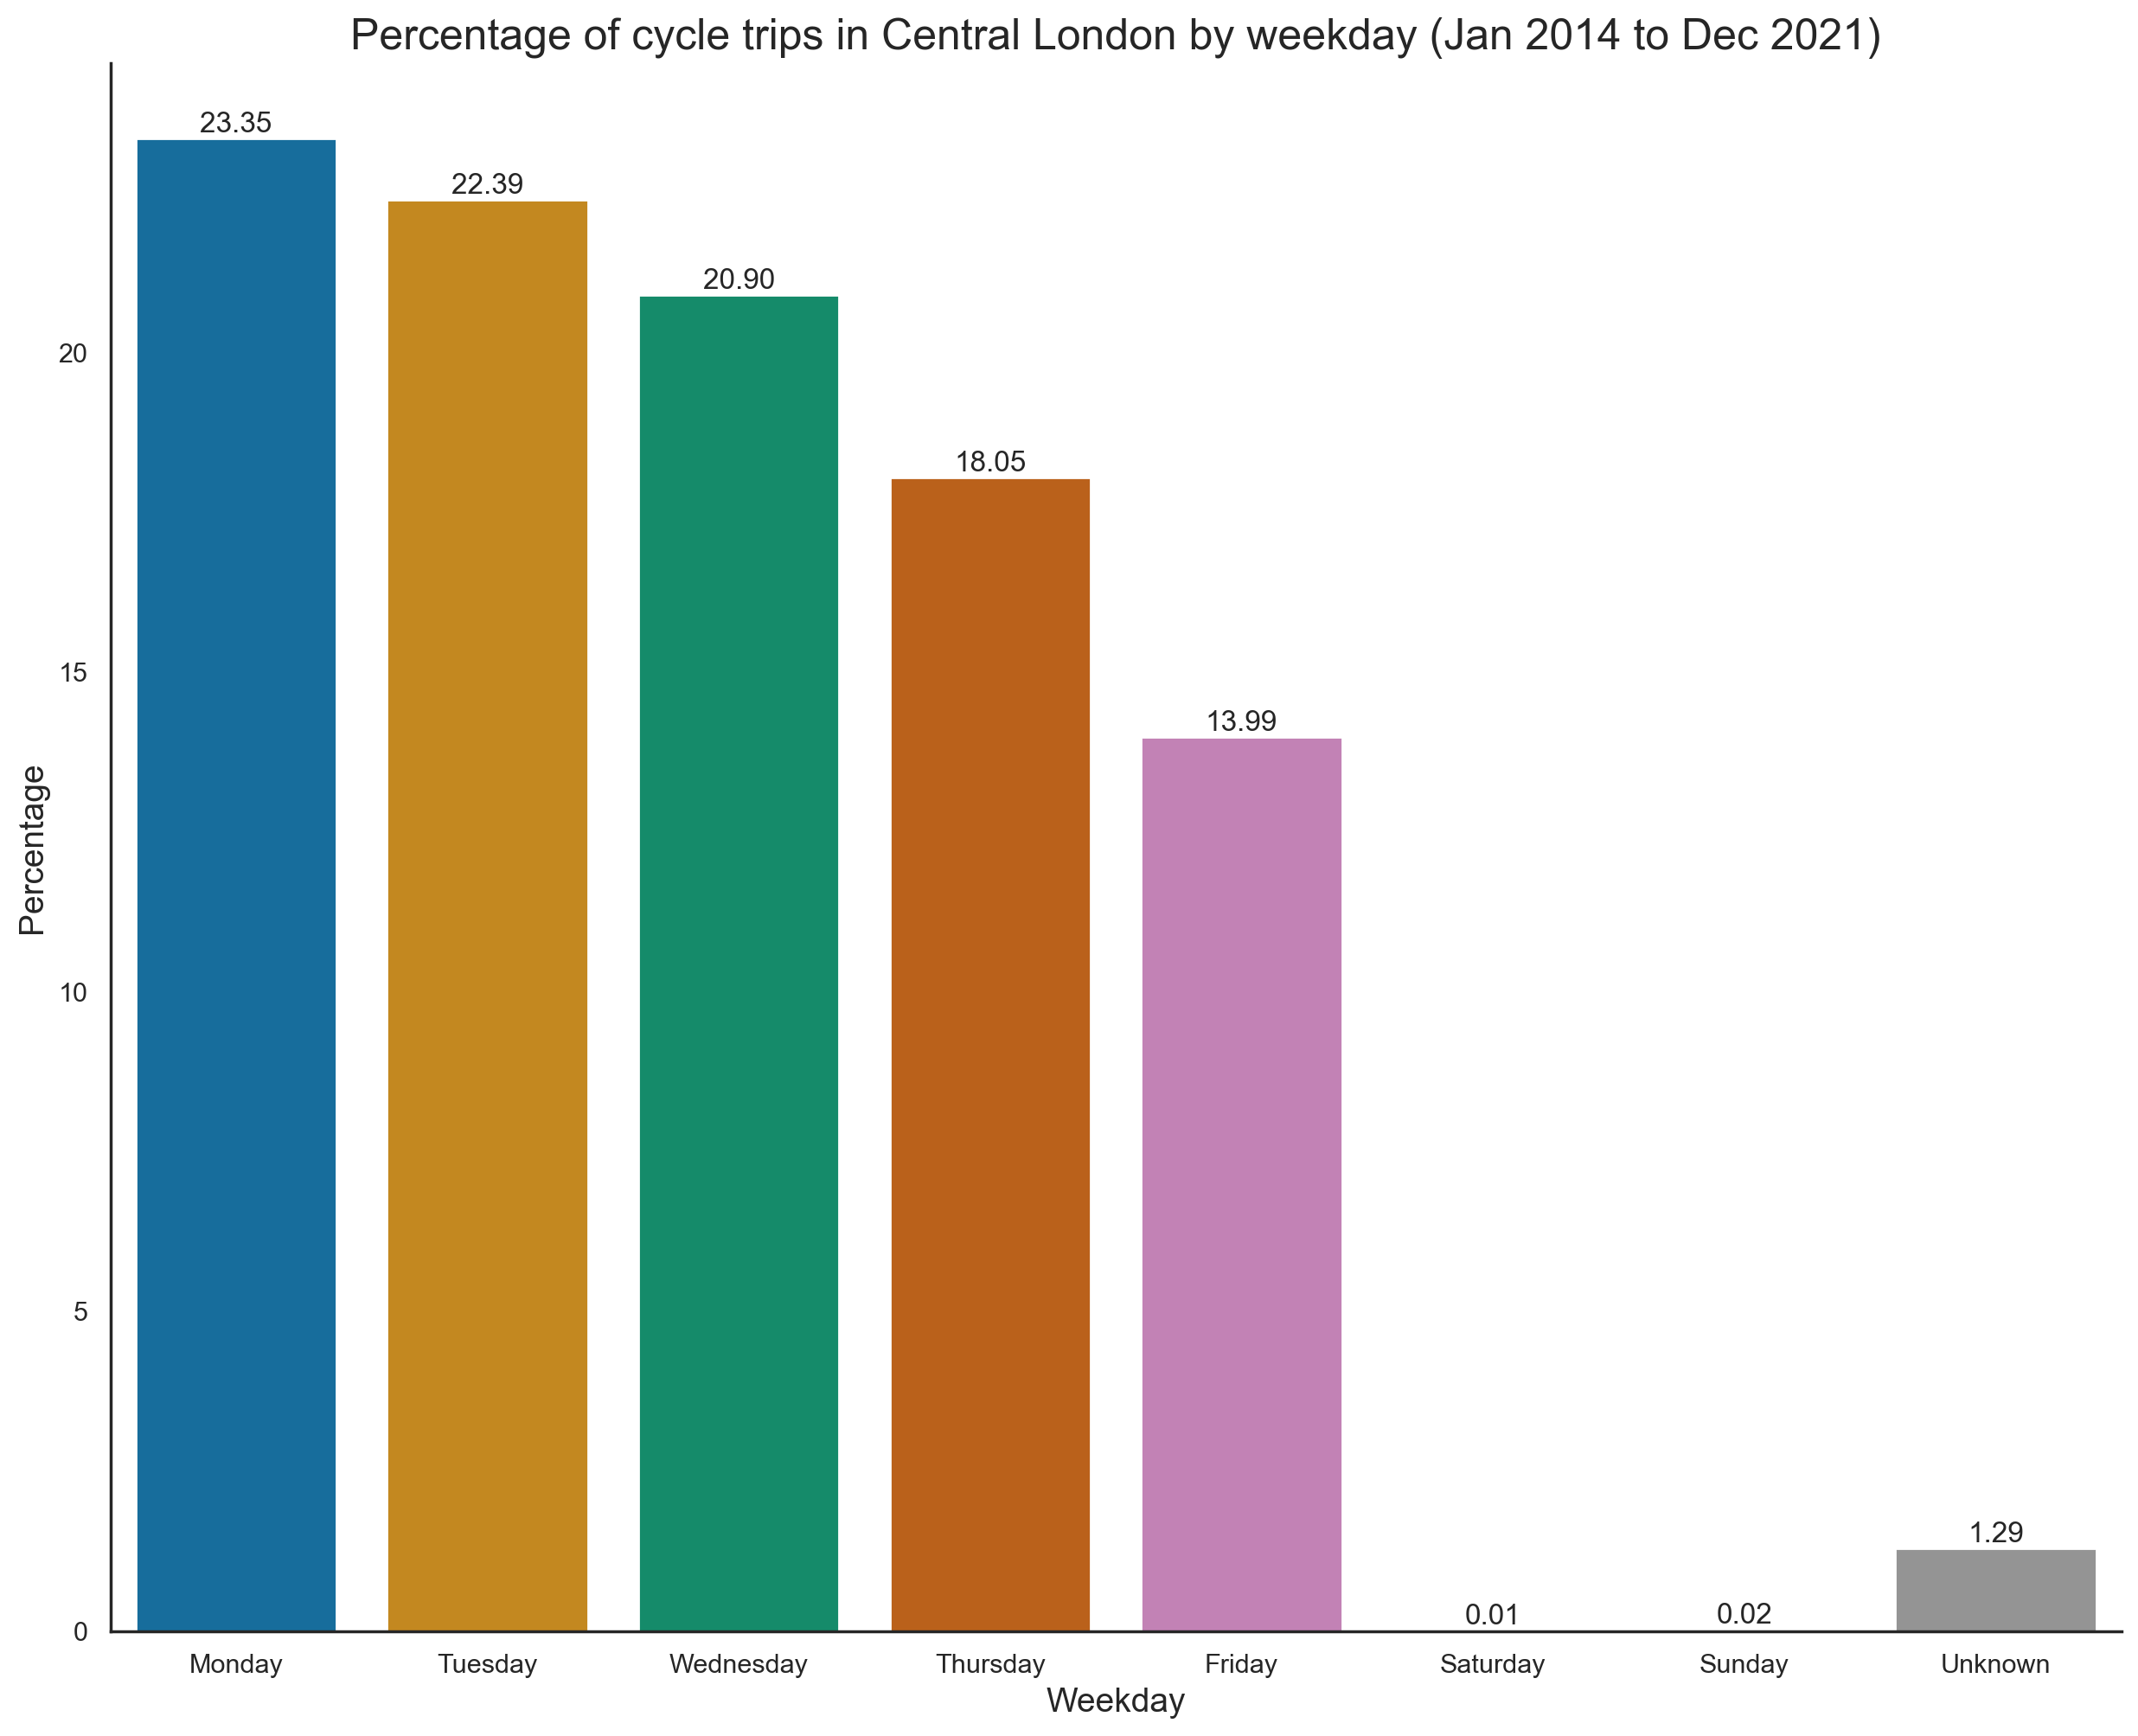

In [162]:
# Plot the number of trips by weekday in Central London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by weekday in Central London.
fig19, ax = plt.subplots(dpi=200)
central_weekday_plot = sns.barplot(data = central_weekday, x = 'Weekday', y = '%',
                                  order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                         'Friday', 'Saturday', 'Sunday', 'Unknown'],
                                  palette='colorblind')

# Label axes and add a title.
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of cycle trips in Central London by weekday (Jan 2014 to Dec 2021)', fontsize=18)

# Add a value to each bar.
central_weekday_plot.bar_label(central_weekday_plot.containers[0], label_type='edge', fmt='%.2f')

# Remove the top and right spines from the plot.
sns.despine(fig19)

# View the plot and save an image.
plt.show()
fig19.savefig('Percentage of cycle trips in Central London by weekday (Jan 2014 to Dec 2021).jpg')

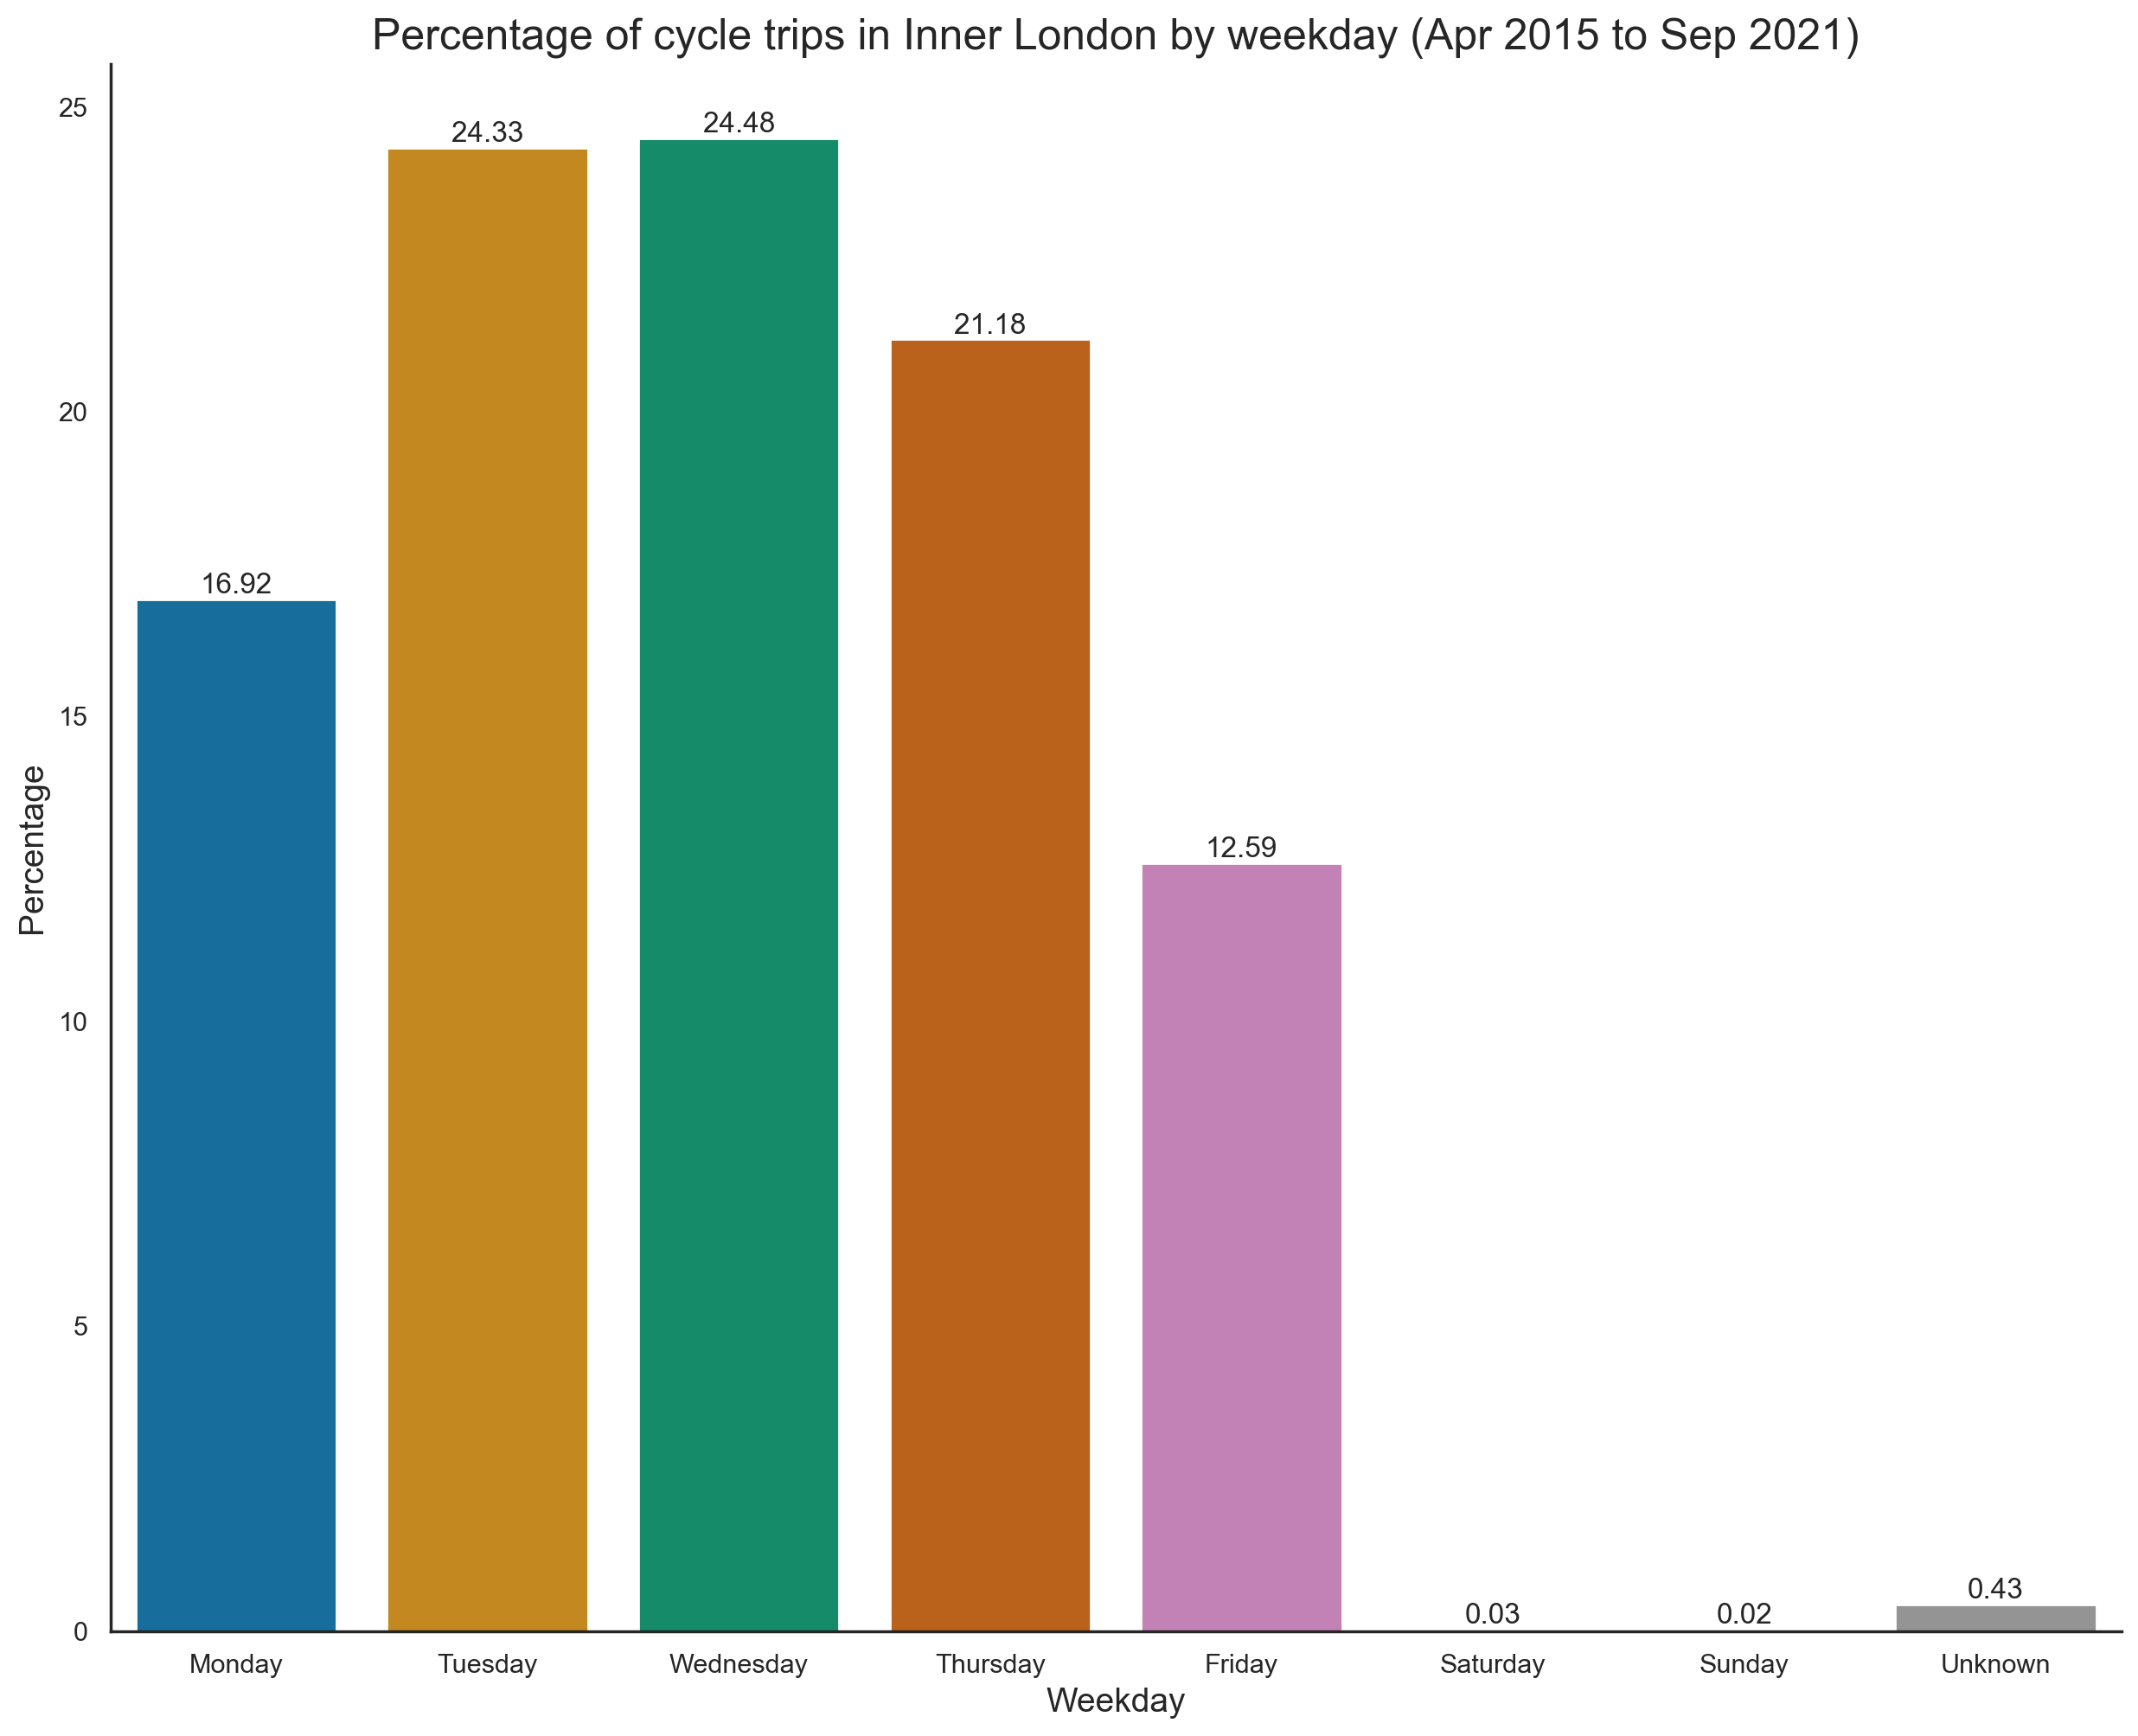

In [163]:
# Plot the number of trips by weekday in Inner London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by weekday in Inner London.
fig20, ax = plt.subplots(dpi=200)
inner_weekday_plot = sns.barplot(data = inner_weekday, x = 'Weekday', y = '%',
                                order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                       'Friday', 'Saturday', 'Sunday', 'Unknown'],
                                palette='colorblind')

# Label axes and add a title.
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of cycle trips in Inner London by weekday (Apr 2015 to Sep 2021)', fontsize=18)

# Add a value to each bar.
inner_weekday_plot.bar_label(inner_weekday_plot.containers[0], label_type='edge', fmt='%.2f')

# Remove the top and right spines from the plot.
sns.despine(fig20)

# View the plot and save an image.
plt.show()
fig20.savefig('Percentage of cycle trips in Inner London by weekday (Apr 2015 to Sep 2021).jpg')

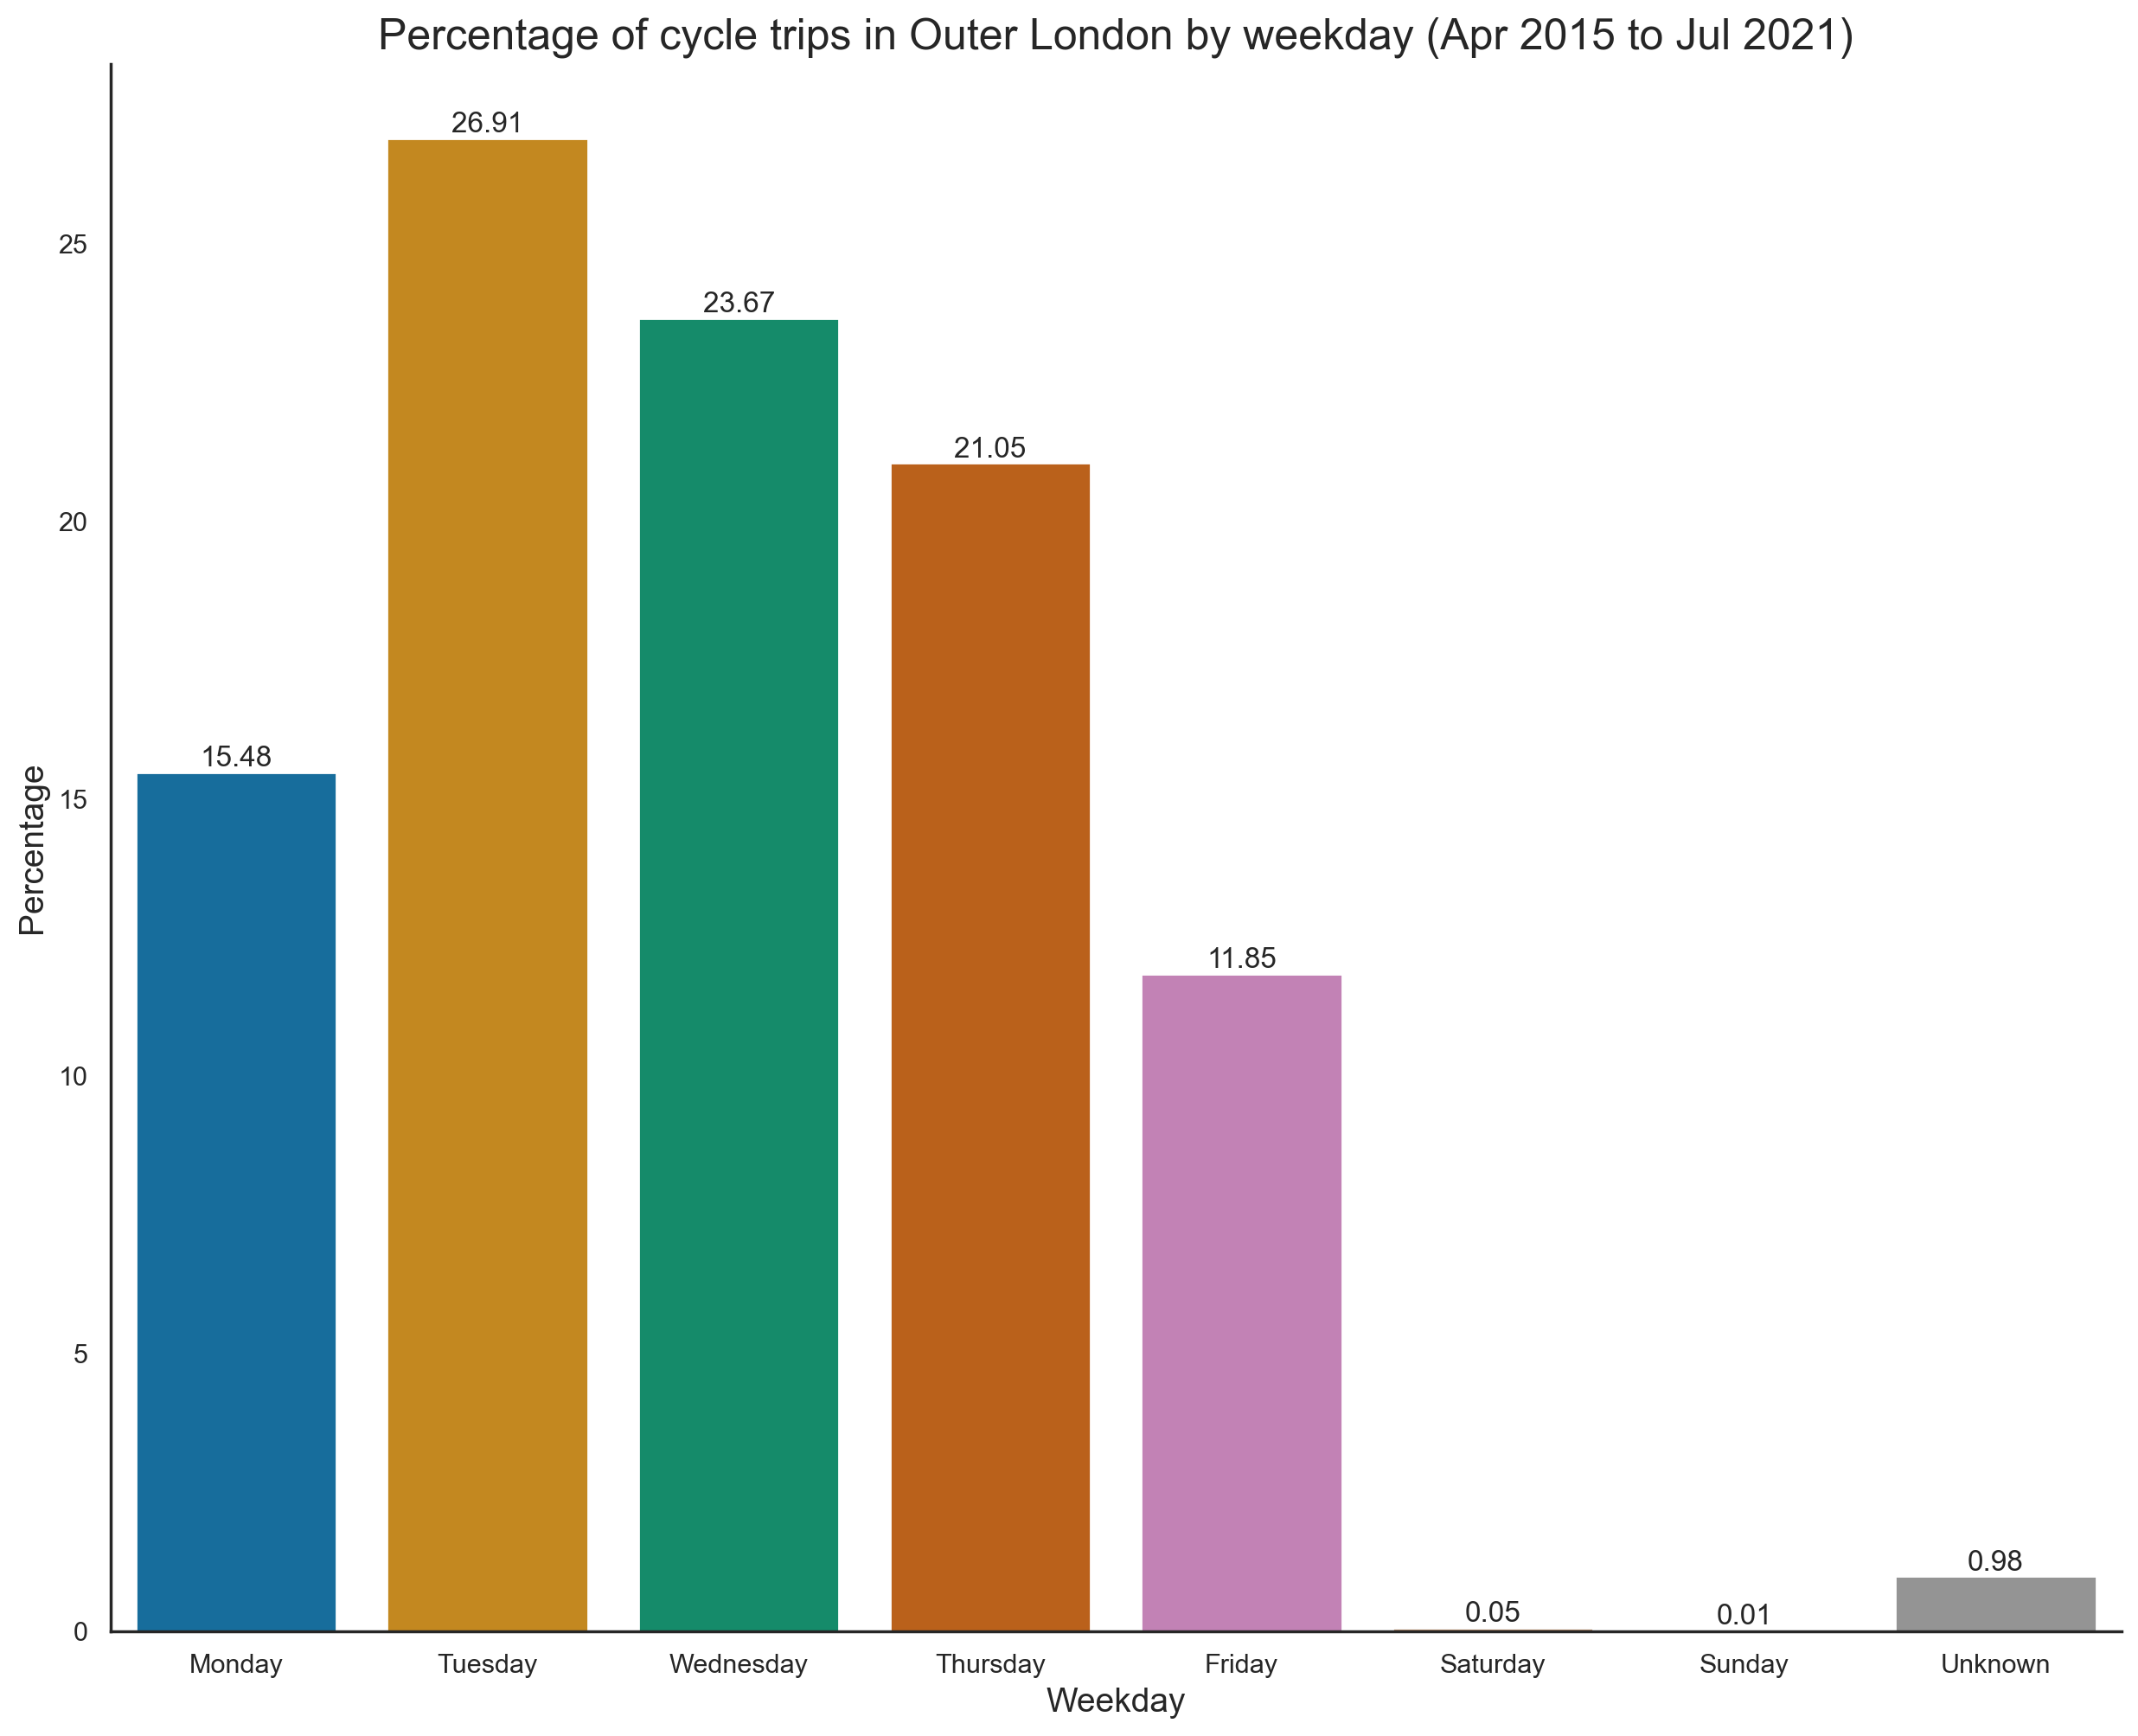

In [164]:
# Plot the number of trips by weekday in Outer London.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by weekday in Outer London.
fig21, ax = plt.subplots(dpi=200)
outer_weekday_plot = sns.barplot(data = outer_weekday, x = 'Weekday', y = '%',
                                order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                       'Friday', 'Saturday', 'Sunday', 'Unknown'],
                                palette='colorblind')

# Label axes and add a title.
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of cycle trips in Outer London by weekday (Apr 2015 to Jul 2021)', fontsize=18)

# Add a value to each bar.
outer_weekday_plot.bar_label(outer_weekday_plot.containers[0], label_type='edge', fmt='%.2f')

# Remove the top and right spines from the plot.
sns.despine(fig21)

# View the plot and save an image.
plt.show()
fig21.savefig('Percentage of cycle trips in Outer London by weekday (Apr 2015 to Jul 2021).jpg')

#### Distribution of cycle trips by time of the day:

In [165]:
# Determine the number of trips recorded for each period category in London. 
london_period = london.groupby('Period')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
london_period['%'] = (london_period['Total cycles'] / london_period['Total cycles'].sum()) * 100

# View the output.
london_period.round(2)

Period  Total cycles      %
0        AM peak (07:00-10:00)       5339442  32.42
1        PM peak (16:00-19:00)       5144078  31.24
2     Inter-peak (10:00-16:00)       3152799  19.14
3        Evening (19:00-22:00)       2384389  14.48
4  Early Morning (06:00-07:00)        447666   2.72
5                      Unknown            60   0.00

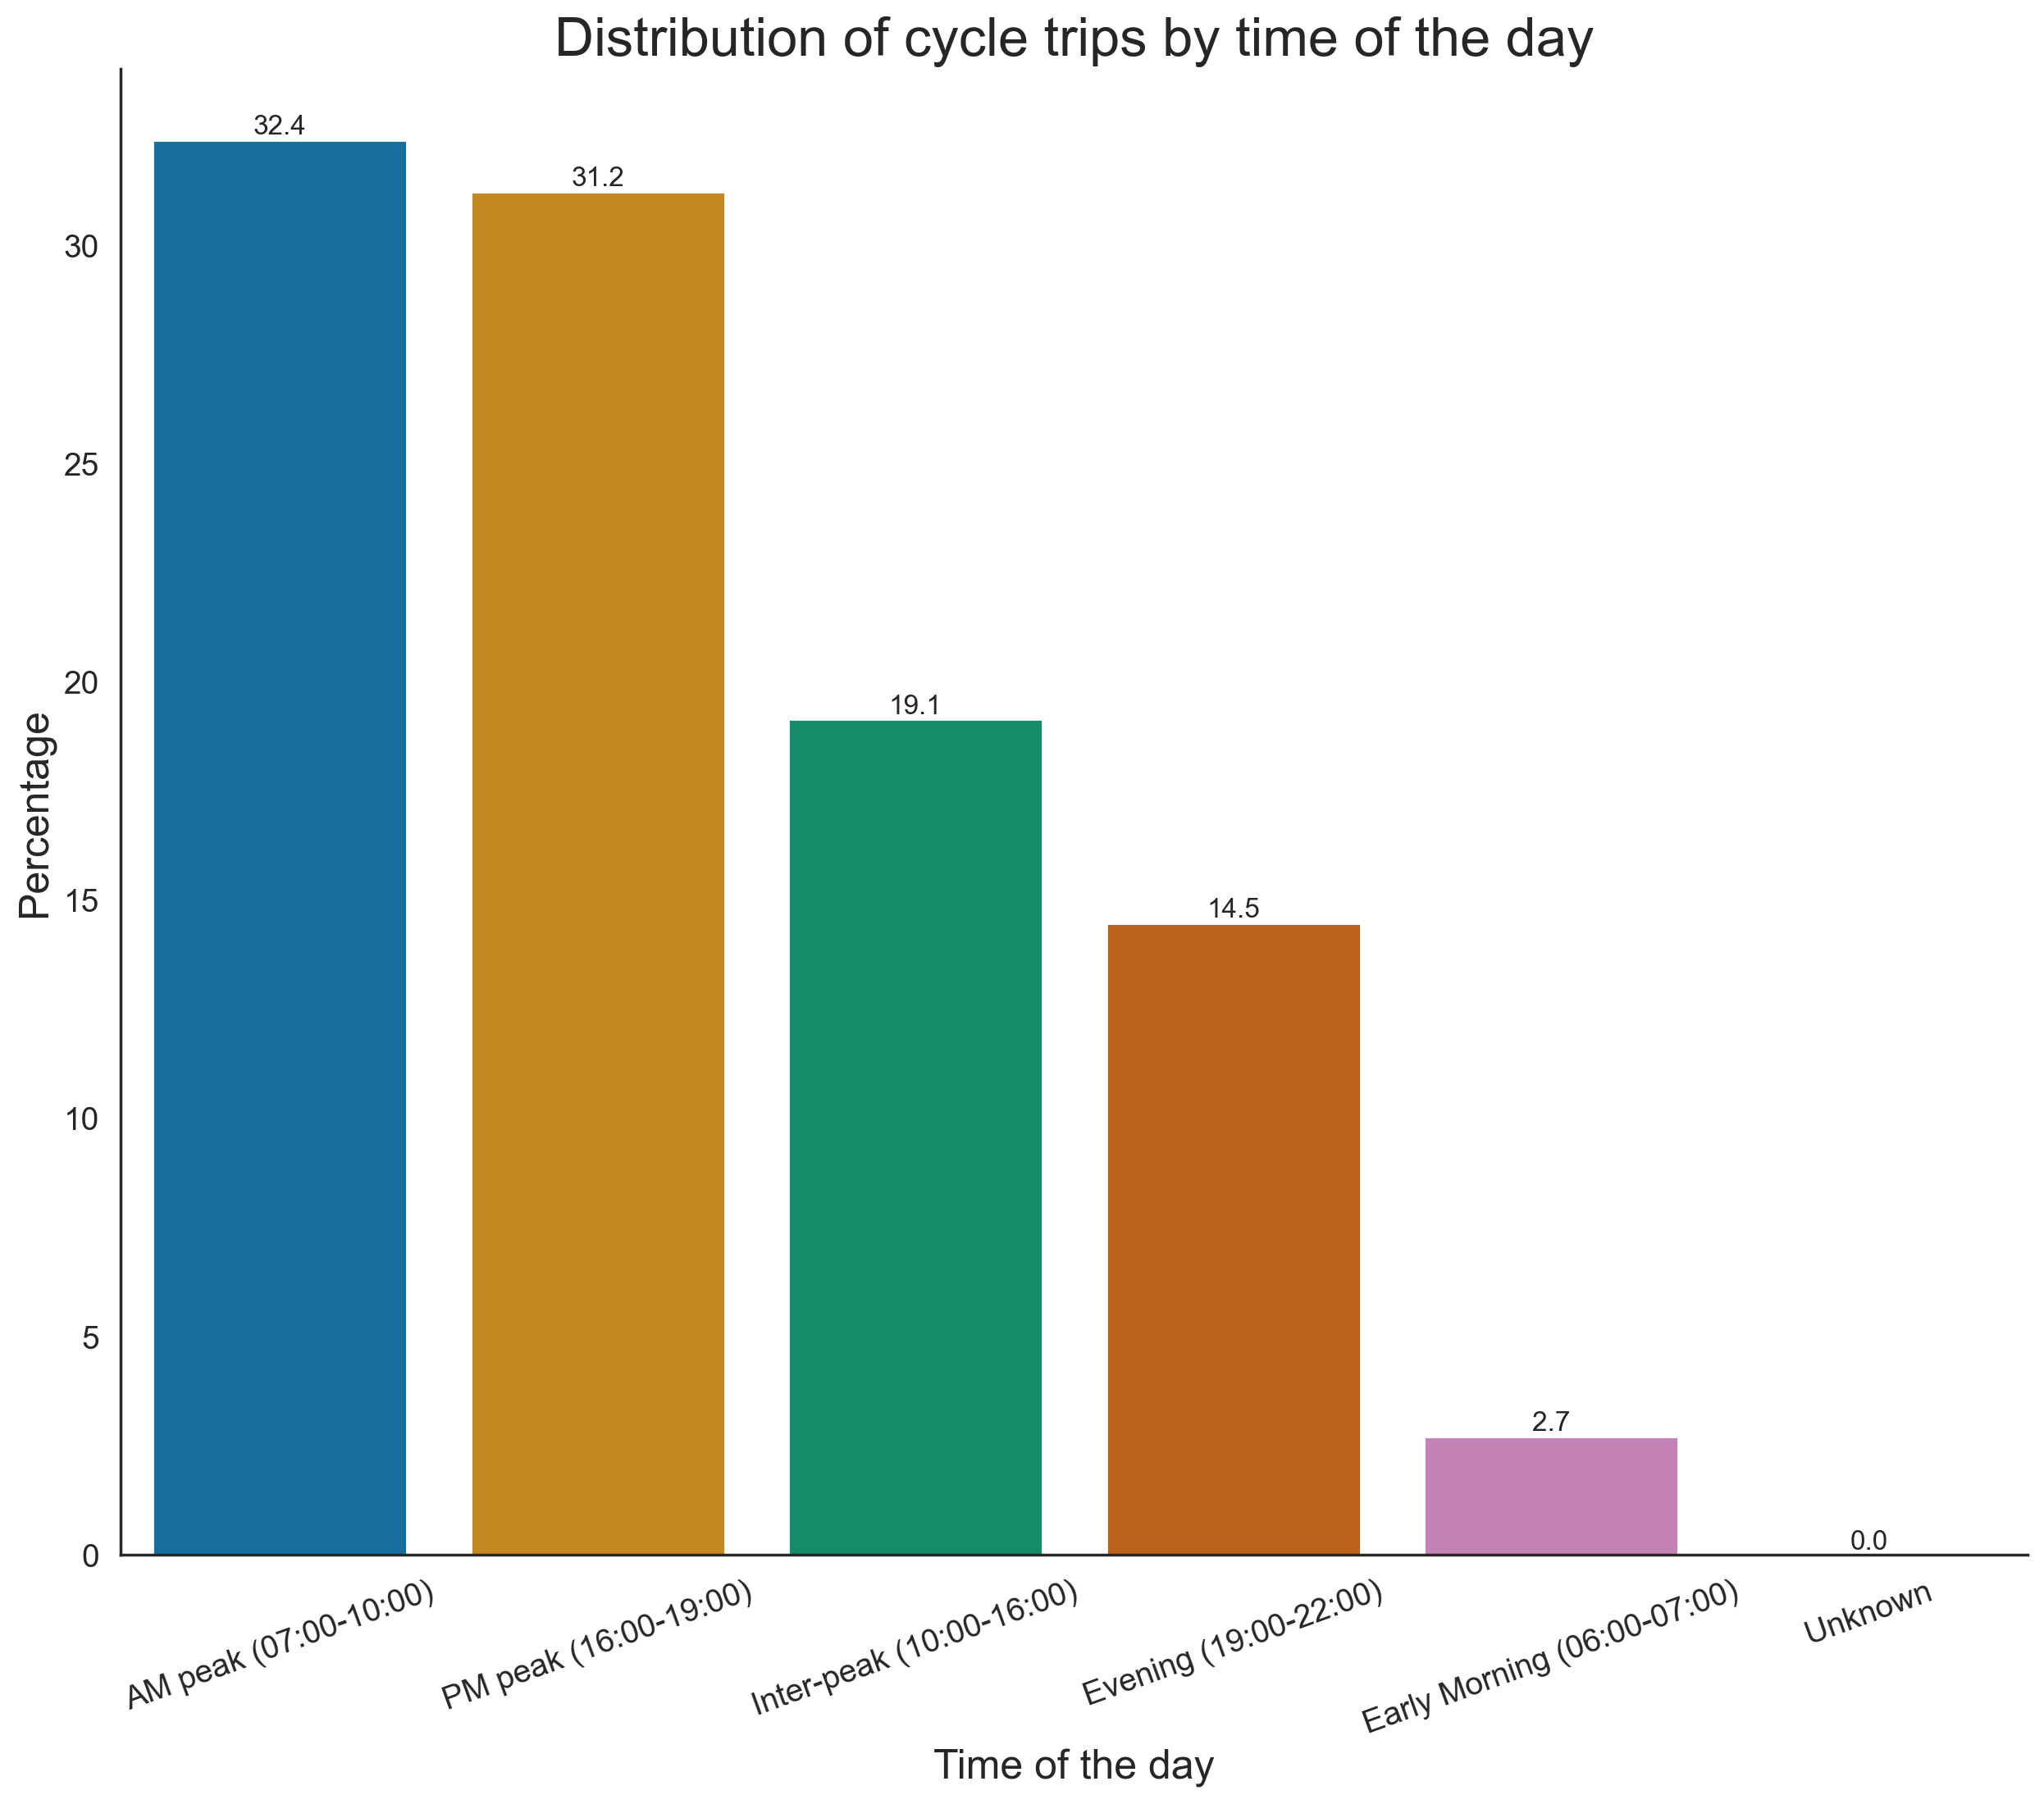

In [166]:
# Plot the distribution of cycle trips by time of the day. 
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough.
fig22, ax = plt.subplots(dpi=200)
london_period_plot = sns.barplot(data = london_period, x = 'Period', y = '%', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Time of the day', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title('Distribution of cycle trips by time of the day', fontsize=24)

# Set ticks size.
plt.xticks(rotation=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a value to each bar.
london_period_plot.bar_label(london_period_plot.containers[0], label_type='edge', fmt='%.1f')

# Remove the top and right spines from the plot.
sns.despine(fig22)

# View the plot and save an image.
plt.show()
fig22.savefig('Distribution of cycle trips by time of the day.jpg')

#### Distribution of cycle trips by weather category:

In [167]:
# Determine the number of trips recorded for each weather category in London. 
london_weather = london.groupby('Weather_categories')[['Total cycles']]\
.sum()\
.sort_values('Total cycles', ascending=False)\
.reset_index()

# Add a column to show percentages.
london_weather['%'] = (london_weather['Total cycles'] / london_weather['Total cycles'].sum()) * 100

# View the output.
london_weather.round(2)

Weather_categories  Total cycles      %
0                Dry      14444166  87.71
1              Rainy       1510524   9.17
2              Other        272625   1.66
3              Sunny        127251   0.77
4             Cloudy         84505   0.51
5              Windy         23988   0.15
6              Storm          5375   0.03

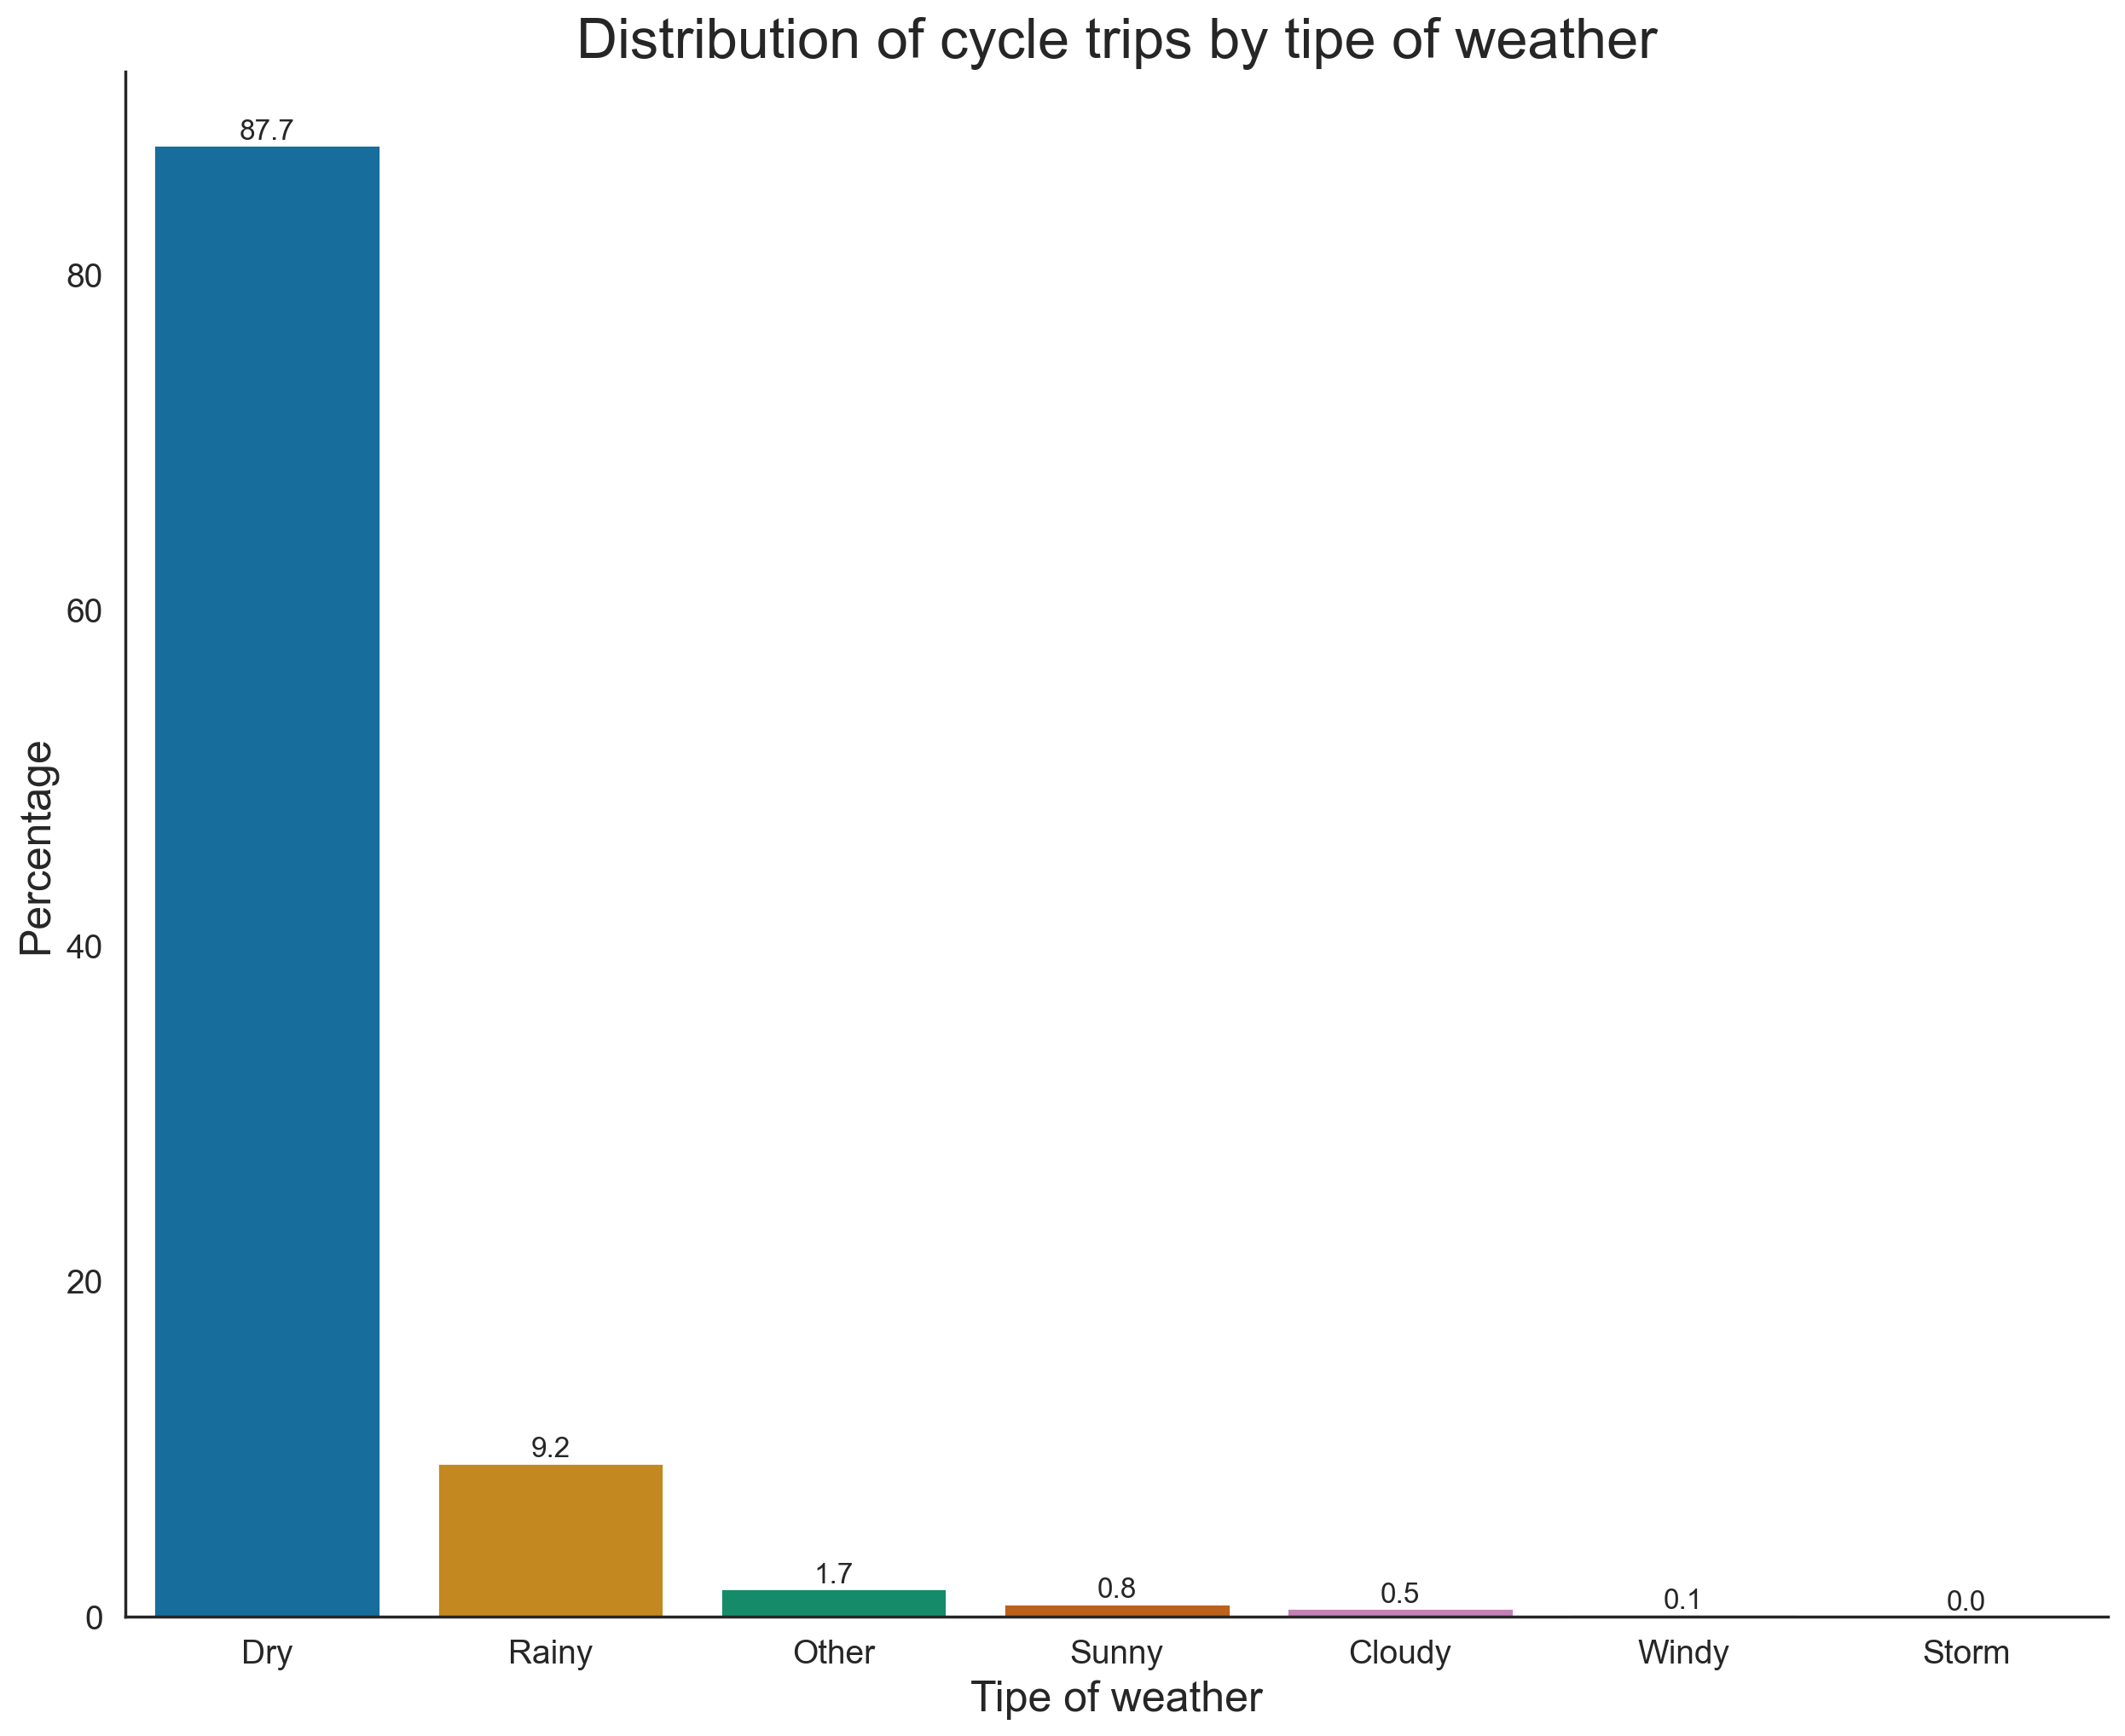

In [168]:
# Plot the distribution of cycle trips weather category. 
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough.
fig23, ax = plt.subplots(dpi=200)
london_weather_plot = sns.barplot(data = london_weather, x = 'Weather_categories', y = '%', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Tipe of weather', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title('Distribution of cycle trips by tipe of weather', fontsize=24)

# Set ticks size.
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a value to each bar.
london_weather_plot.bar_label(london_weather_plot.containers[0], label_type='edge', fmt='%.1f')

# Remove the top and right spines from the plot.
sns.despine(fig23)

# View the plot and save an image.
plt.show()
fig23.savefig('Distribution of cycle trips by tipe of weather.jpg')

### 5f. Investigate the cycle parking dataset

We have found information on cycle parking for London under the link below, which we have cleaned to proceed with the analysis:

#### [Cycling Infrastructure Database](https://cycling.data.tfl.gov.uk/)

In [169]:
# Import and sense-check the parking dataset extracted from the TfL Cycling Infrastructure Database.
cycle_parking = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/cycle_parking.xlsx')

# View the DataFrame.
cycle_parking

Borough Feature Id  features.Index (generated)  \
0      Hammersmith and Fulham  RWG014703                           1   
1      Hammersmith and Fulham  RWG014704                           2   
2      Hammersmith and Fulham  RWG014970                           3   
3      Hammersmith and Fulham  RWG015506                           4   
4      Hammersmith and Fulham  RWG015513                           5   
...                       ...        ...                         ...   
23753                  Harrow  RWG260420                       23754   
23754                  Harrow  RWG260729                       23755   
23755              Hillingdon  RWG238365                       23756   
23756              Hillingdon  RWG238366                       23757   
23757              Hillingdon  RWG238427                       23758   

                Name                                         Photo1 Url  \
0      cycle_parking  https://cycleassetimages.data.tfl.gov.uk/RWG01...   
1      cycle_parking  https://cycleassetimages.data.tfl.gov.uk/RWG01...   
2      cycle_parking  https://cycleassetimages.data.tfl.gov.uk/RWG01...   
3      cycle_parking  https://cycleassetimages.data.tfl.gov.uk/RWG01...   
4      cycle_parking  https://cycleassetimages.data.tfl.gov.uk/RWG01...   
...              ...                                                ...   
23753  cycle_parking  https://cycleassetimages.data.tfl.gov.uk/RWG26...   
23754  cycle_parking  https://cycleassetimages.data.tfl.gov.uk/RWG26...   
23755  cycle_parking  https://cycleassetimages.data.tfl.gov.uk/RWG23...   
23756  cycle_parking  https://cycleassetimages.data.tfl.gov.uk/RWG23...   
23757  cycle_parking  https://cycleassetimages.data.tfl.gov.uk/RWG23...   

                                              Photo2 Url  Prk Buterf  \
0      https://cycleassetimages.data.tfl.gov.uk/RWG01...       False   
1      https://cycleassetimages.data.tfl.gov.uk/RWG01...       False   
2      https://cycleassetimages.data.tfl.gov.uk/RWG01...       False   
3      https://cycleassetimages.data.tfl.gov.uk/RWG01...       False   
4      https://cycleassetimages.data.tfl.gov.uk/RWG01...       False   
...                                                  ...         ...   
23753  https://cycleassetimages.data.tfl.gov.uk/RWG26...       False   
23754  https://cycleassetimages.data.tfl.gov.uk/RWG26...       False   
23755  https://cycleassetimages.data.tfl.gov.uk/RWG23...       False   
23756  https://cycleassetimages.data.tfl.gov.uk/RWG23...       False   
23757  https://cycleassetimages.data.tfl.gov.uk/RWG23...       False   

       Prk Carr  Prk Cover  Prk Hangar  ...  Prk Secure  Prk Sheff  Prk Tier  \
0         False      False        True  ...       False      False     False   
1         False      False        True  ...       False      False     False   
2         False      False       False  ...       False       True     False   
3         False      False       False  ...       False       True     False   
4         False      False       False  ...       False       True     False   
...         ...        ...         ...  ...         ...        ...       ...   
23753     False      False       False  ...       False       True     False   
23754     False      False       False  ...       False       True     False   
23755     False      False       False  ...       False       True     False   
23756     False      False       False  ...       False       True     False   
23757     False      False       False  ...       False       True     False   

       Prk Wheel     Svdate  Longitude   Latitude  \
0          False 2017-09-07  -0.242780  51.510321   
1          False 2017-09-07  -0.242785  51.510261   
2          False 2017-06-20  -0.240575  51.501471   
3          False 2017-06-24  -0.238288  51.506501   
4          False 2017-09-07  -0.238446  51.506285   
...          ...        ...        ...        ...   
23753      False 2018-01-19  -0.294533  51.595373   
23754 

In [170]:
# Let's look at the capacity of cycle parking by borough.
parking_borough = cycle_parking.groupby('Borough')[['Prk Cpt']].sum()\
.sort_values('Prk Cpt', ascending=False).reset_index()

# Add a column to show percentages.
parking_borough['%'] = (parking_borough['Prk Cpt']/parking_borough['Prk Cpt'].sum()) * 100

# View the output.
parking_borough.round(2)

Borough  Prk Cpt     %
0                  Hackney  12322.0  8.44
1              Westminster  10703.0  7.33
2                Southwark   9945.0  6.81
3                   Camden   9023.0  6.18
4                  Lambeth   8590.0  5.89
5                Islington   7046.0  4.83
6   Hammersmith and Fulham   6826.0  4.68
7            Tower Hamlets   6535.0  4.48
8   Kensington and Chelsea   5902.0  4.04
9               Wandsworth   4879.0  3.34
10                  Newham   4396.0  3.01
11    Richmond upon Thames   4132.0  2.83
12                  Ealing   3944.0  2.70
13                Hounslow   3869.0  2.65
14          Waltham Forest   3859.0  2.64
15                Lewisham   3465.0  2.37
16               Greenwich   3387.0  2.32
17                Haringey   3229.0  2.21
18    Kingston upon Thames   3067.0  2.10
19          City of London   3046.0  2.09
20                  Merton   3008.0  2.06
21                 Croydon   2958.0  2.03
22                   Brent   2910.0  1.99
23                  Barnet   2499.0  1.71
24              Hillingdon   2392.0  1.64
25                 Bromley   2231.0  1.53
26                 Enfield   2093.0  1.43
27                Havering   1991.0  1.36
28                  Harrow   1855.0  1.27
29    Barking and Dagenham   1827.0  1.25
30                  Sutton   1540.0  1.06
31               Redbridge   1281.0  0.88
32                  Bexley   1180.0  0.81

In [171]:
# Create a CSV file as output.
parking_borough.to_csv('parking_borough.csv', index=False)

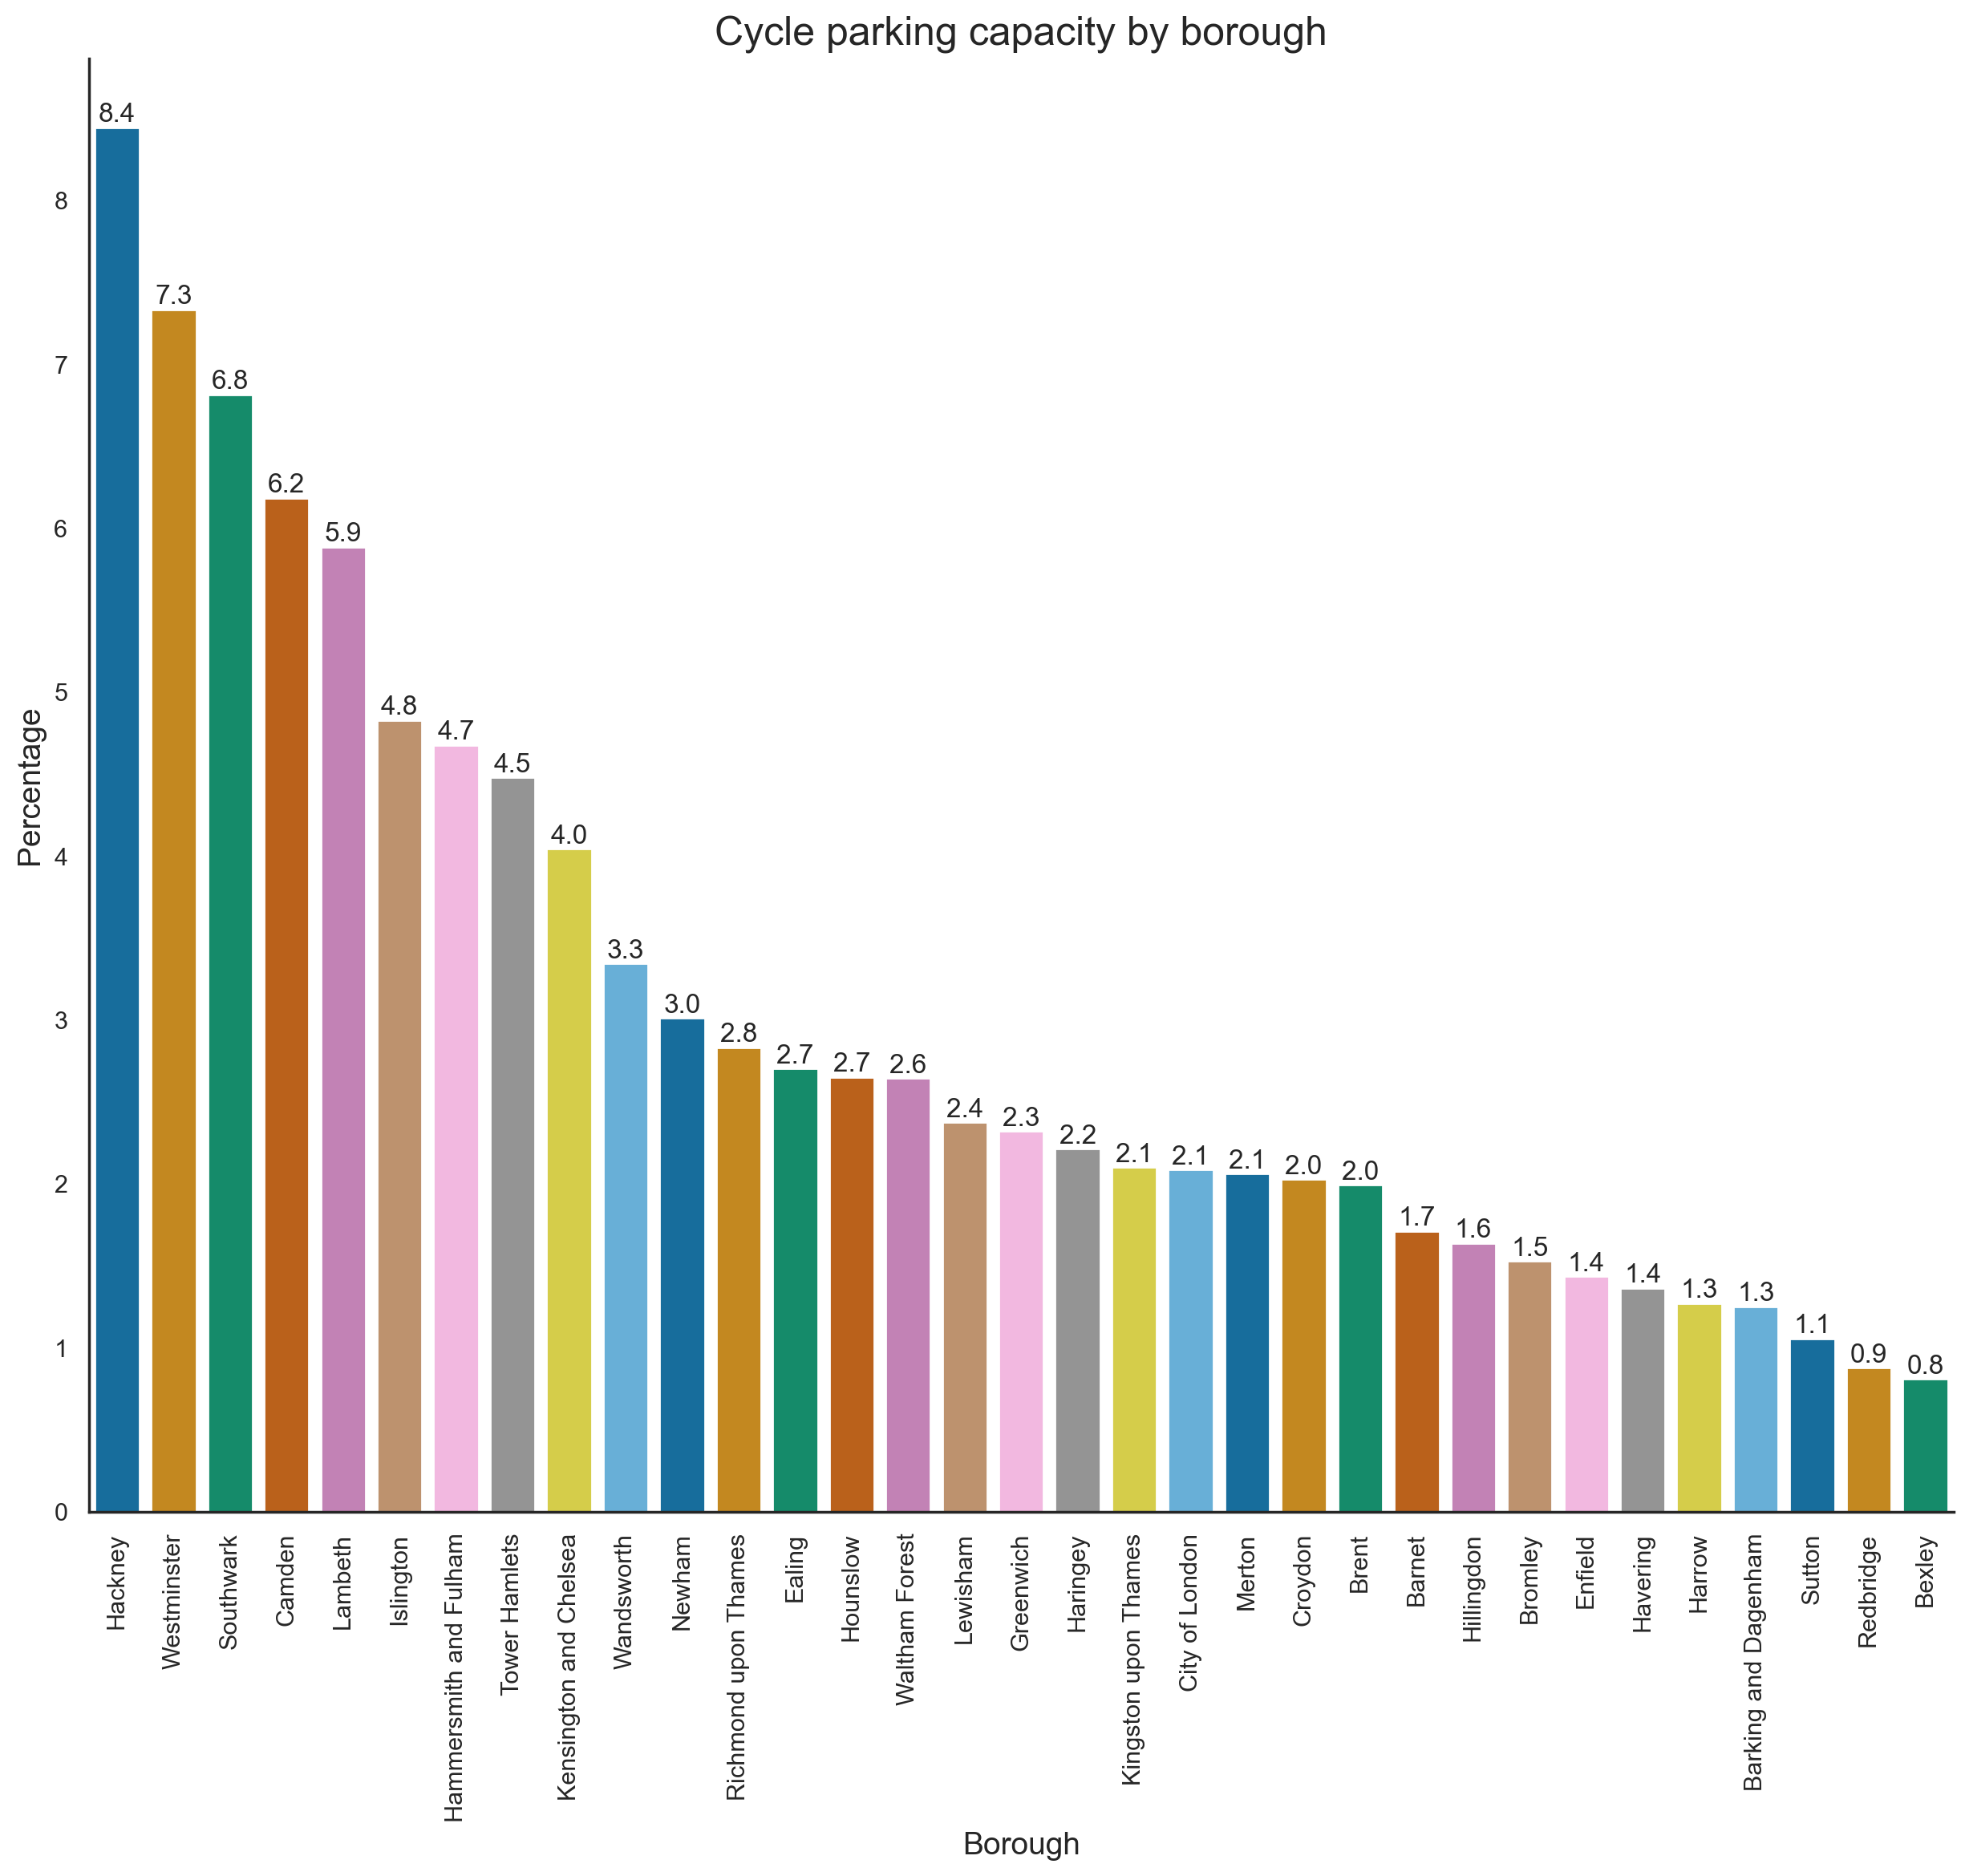

In [172]:
# Plot the capacity of cycle parking by borough.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating the trips by borough.
fig24, ax = plt.subplots(dpi=200)
parking_borough_plot = sns.barplot(data = parking_borough, x = 'Borough', y = '%', palette='colorblind')

# Label axes and add a title.
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Cycle parking capacity by borough', fontsize=18)
plt.xticks(rotation=90)

# Add a value to each bar.
parking_borough_plot.bar_label(parking_borough_plot.containers[0], label_type='edge', fmt='%.1f')

# Remove the top and right spines from the plot.
sns.despine(fig24)

# View the plot and save an image.
plt.show()
fig24.savefig('Cycle parking capacity by borough.jpg')

### 5g. Distribution of private vs hire cycles in Central and Inner London

#### Central London:

In [173]:
# Sum of total private trips in Central London.
central_london['Number of private cycles'].sum()

11238343

In [174]:
# Sum of total hire trips in Central London.
central_london['Number of cycle hire bikes'].sum()

1387376

In [175]:
# Sum of total cycle trips in Central London.
central_london['Total cycles'].sum()

12625719

In [176]:
# Sum of private trips by year in Central London.
private_year_central = central_london.groupby(['Survey_Wave'])[['Number of private cycles']]\
.sum().sort_values('Survey_Wave', ascending=True).reset_index()

# Add a column to show percentages.
private_year_central['%'] = (private_year_central['Number of private cycles']/private_year_central['Number of private cycles'].sum()) * 100

# View the output.
private_year_central.round(2)

Survey_Wave  Number of private cycles      %
0         2014                   1436968  12.79
1         2015                   1465922  13.04
2         2016                   1542540  13.73
3         2017                   1549098  13.78
4         2018                   1680594  14.95
5         2019                   1692680  15.06
6         2020                    751571   6.69
7         2021                   1118970   9.96

In [177]:
# Sum of hire trips by year in Central London.
hire_year_central = central_london.groupby(['Survey_Wave'])[['Number of cycle hire bikes']]\
.sum().sort_values('Survey_Wave', ascending=True).reset_index()

# Add a column to show percentages.
hire_year_central['%'] = (hire_year_central['Number of cycle hire bikes']/hire_year_central['Number of cycle hire bikes'].sum()) * 100

# View the output.
hire_year_central.round(2)

Survey_Wave  Number of cycle hire bikes      %
0         2014                      166671  12.01
1         2015                      170579  12.30
2         2016                      182302  13.14
3         2017                      190316  13.72
4         2018                      210851  15.20
5         2019                      215100  15.50
6         2020                      101080   7.29
7         2021                      150477  10.85

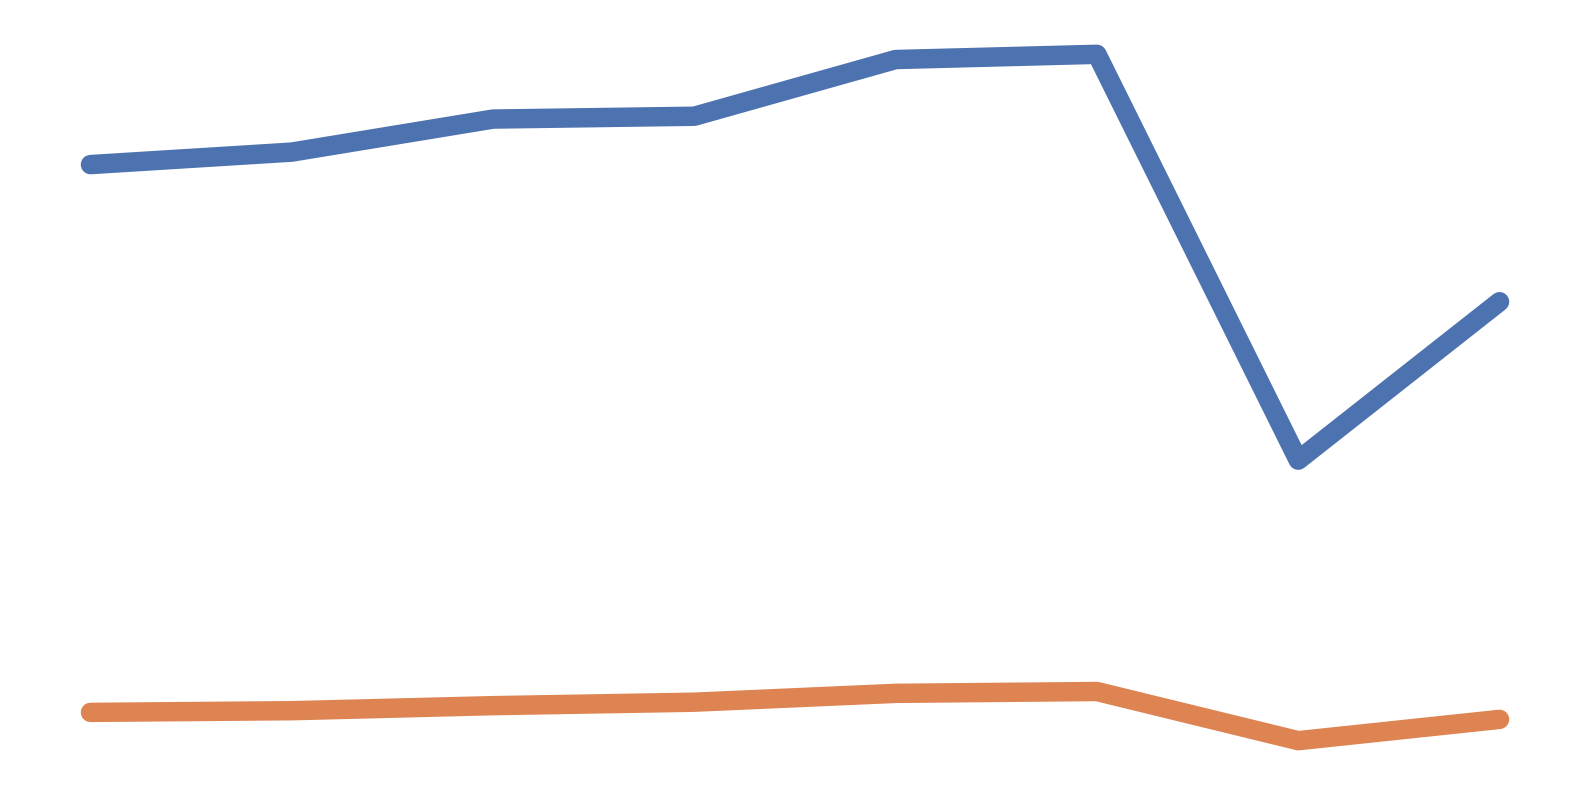

In [178]:
# Set seaborn color palette to colorblind.
sns.set_palette("colorblind")

# Set figure size.
sns.set(rc={'figure.figsize':(10, 5)})

# Set the plot style as white.
sns.set_style('white')

# Create line plot
fig25, ax = plt.subplots(dpi=200)
sns.lineplot(data=private_year_central, x='Survey_Wave', y='Number of private cycles', linewidth=7.0)
sns.lineplot(data=hire_year_central, x='Survey_Wave', y='Number of cycle hire bikes', linewidth=7.0)

# Remove all the axes
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# View the plot and save an image.
plt.axis('off')
plt.show()
fig25.savefig('Private vs hire trips in Central London.jpg')

#### Inner London:

In [179]:
# Sum of total private trips in Inner London.
inner_london['Number of private cycles'].sum()

3105904

In [180]:
# Sum of total hire trips in Central London.
inner_london['Number of cycle hire bikes'].sum()

140342

In [181]:
# Sum of total cycle trips in Central London.
inner_london['Total cycles'].sum()

3245530

In [182]:
# Sum of private trips by year in Inner London.
private_year_inner = inner_london.groupby(['Survey_Wave'])[['Number of private cycles']]\
.sum().sort_values('Survey_Wave', ascending=True).reset_index()

# Add a column to show percentages.
private_year_inner['%'] = (private_year_inner['Number of private cycles']/private_year_inner['Number of private cycles'].sum()) * 100

# View the output.
private_year_inner.round(2)

Survey_Wave  Number of private cycles      %
0         2015                    434028  13.97
1         2016                    424063  13.65
2         2017                    432125  13.91
3         2018                    437667  14.09
4         2019                    424870  13.68
5         2020                    408488  13.15
6         2021                    544663  17.54

In [183]:
# Sum of hire trips by year in Inner London.
hire_year_inner = inner_london.groupby(['Survey_Wave'])[['Number of cycle hire bikes']]\
.sum().sort_values('Survey_Wave', ascending=True).reset_index()

# Add a column to show percentages.
hire_year_inner['%'] = (hire_year_inner['Number of cycle hire bikes']/hire_year_inner['Number of cycle hire bikes'].sum()) * 100

# View the output.
hire_year_inner.round(2)

Survey_Wave  Number of cycle hire bikes      %
0         2015                       15927  11.35
1         2016                       17599  12.54
2         2017                       18274  13.02
3         2018                       20785  14.81
4         2019                       23963  17.07
5         2020                       20930  14.91
6         2021                       22864  16.29

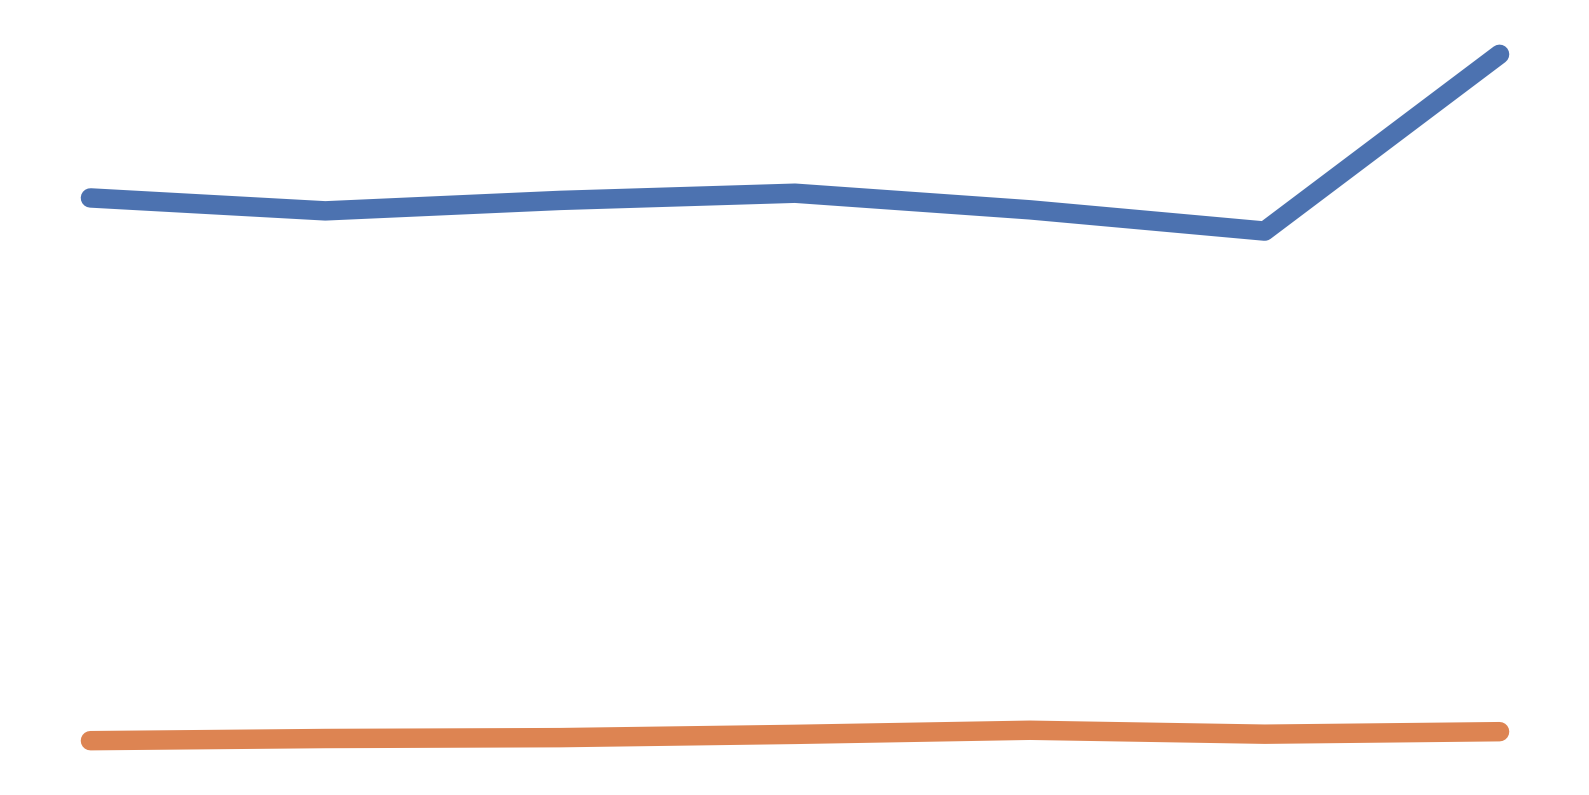

In [184]:
# Set seaborn color palette to colorblind.
sns.set_palette("colorblind")

# Set figure size.
sns.set(rc={'figure.figsize':(10, 5)})

# Set the plot style as white.
sns.set_style('white')

# Create line plot
fig26, ax = plt.subplots(dpi=200)
sns.lineplot(data=private_year_inner, x='Survey_Wave', y='Number of private cycles', linewidth=7.0)
sns.lineplot(data=hire_year_inner, x='Survey_Wave', y='Number of cycle hire bikes', linewidth=7.0)

# Remove all the axes
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# View the plot and save an image.
plt.axis('off')
plt.show()
fig26.savefig('Private vs hire trips in Inner London.jpg')

#### Outer London:

In [185]:
# Sum of total cycle trips in Outer London.
outer_london['Total cycles'].sum()

597185

### 5h. Distribution of bicycle theft by borough

We have found information on bicycle theft for London under the link below, which we have filtered and cleaned to proceed with the analysis:

#### [Recorded Crime: Geographic Breakdown](https://data.london.gov.uk/dataset/recorded_crime_summary)

In [186]:
# Import the Bicycle Theft Data.
Bicycle_Theft = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Bicycle Theft.xlsx')

# View the output.
Bicycle_Theft

Theft                                   Borough  \
0   Bicycle Theft                      Barking and Dagenham   
1   Bicycle Theft                                    Barnet   
2   Bicycle Theft                                    Bexley   
3   Bicycle Theft                                     Brent   
4   Bicycle Theft                                   Bromley   
5   Bicycle Theft                                    Camden   
6   Bicycle Theft                                   Croydon   
7   Bicycle Theft                                    Ealing   
8   Bicycle Theft                                   Enfield   
9   Bicycle Theft                                 Greenwich   
10  Bicycle Theft                                   Hackney   
11  Bicycle Theft                    Hammersmith and Fulham   
12  Bicycle Theft                                  Haringey   
13  Bicycle Theft                                    Harrow   
14  Bicycle Theft                                  Havering   
15  Bicycle Theft                                Hillingdon   
16  Bicycle Theft                                  Hounslow   
17  Bicycle Theft                                 Islington   
18  Bicycle Theft                    Kensington and Chelsea   
19  Bicycle Theft                      Kingston upon Thames   
20  Bicycle Theft                                   Lambeth   
21  Bicycle Theft                                  Lewisham   
22  Bicycle Theft  London Heathrow and London City Airports   
23  Bicycle Theft                                    Merton   
24  Bicycle Theft                                    Newham   
25  Bicycle Theft                                 Redbridge   
26  Bicycle Theft                      Richmond upon Thames   
27  Bicycle Theft                                 Southwark   
28  Bicycle Theft                                    Sutton   
29  Bicycle Theft                             Tower Hamlets   
30  Bicycle Theft                            Waltham Forest   
31  Bicycle Theft                                Wandsworth   
32  Bicycle Theft                               Westminster   
33            NaN                             London Totals   

    2015-01-01 00:00:00  2015-02-01 00:00:00  2015-03-01 00:00:00  \
0                    20                   12                   12   
1                     9                   13                   15   
2                     8                    7                    5   
3                    17                   16                   26   
4                    16                   13                   15   
5                    53                   61                   87   
6                    16                   10                   15   
7                    28                   34                   41   
8                     9                   13                   19   
9                    16                    8                   25   
10                   64                   83                   85   
11                   51                   39                   44   
12                   31                   23                   38   
13                    6                    9                   10   
14                    9                    2                   15   
15                   22                   22                   20   
16                   32                   28                   48   
17                   65                   63                   75   
18                   30                   30                   41   
19                   21                   23                   23   
20                   58                   49                   71   
21                   11                   15                   26   
22                    0                    0                    1   
23                   21                   18                   20   
24                   30                   47                   44   
25          

In [187]:
# Drop the unnecessary columns - Bicycle Theft by Borough 2015 - Apr 2021.
Borough_Bicycle_Theft = Bicycle_Theft[["Borough", "Total"]]

# View the output.
Borough_Bicycle_Theft

Borough   Total
0                       Barking and Dagenham    1295
1                                     Barnet    1552
2                                     Bexley     730
3                                      Brent    2424
4                                    Bromley    1192
5                                     Camden    8055
6                                    Croydon    1656
7                                     Ealing    3602
8                                    Enfield    1593
9                                  Greenwich    2336
10                                   Hackney   10617
11                    Hammersmith and Fulham    6530
12                                  Haringey    3209
13                                    Harrow     970
14                                  Havering    1010
15                                Hillingdon    1932
16                                  Hounslow    4061
17                                 Islington    7085
18                    Kensington and Chelsea    4018
19                      Kingston upon Thames    2692
20                                   Lambeth    6961
21                                  Lewisham    2606
22  London Heathrow and London City Airports     140
23                                    Merton    2265
24                                    Newham    3416
25                                 Redbridge    1274
26                      Richmond upon Thames    4780
27                                 Southwark    8778
28                                    Sutton     849
29                             Tower Hamlets    9697
30                            Waltham Forest    3019
31                                Wandsworth    6707
32                               Westminster    8438
33                             London Totals  125489

In [188]:
# Save as CSV for future use on Tableau.
Borough_Bicycle_Theft.to_csv('Borough_Bicycle_Theft.csv')

In [189]:
# Import and the Bicycle Theft Total Data.
Bicycle_Theft_Total = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Bicycle_Theft_Total.xlsx')

# View the output.
Bicycle_Theft_Total

Date  London Totals
0  2015-01-01            974
1  2015-02-01            976
2  2015-03-01           1254
3  2015-04-01           1425
4  2015-05-01           1689
..        ...            ...
71 2020-12-01           1310
72 2021-01-01           1060
73 2021-02-01           1106
74 2021-03-01           1620
75 2021-04-01           1858

[76 rows x 2 columns]

In [190]:
# Change the datatype of Date, from Object to datetime64
Bicycle_Theft_Total["Date"] = Bicycle_Theft_Total["Date"].astype("datetime64")

# Set the Date as index.
Bicycle_Theft_Total = Bicycle_Theft_Total.set_index("Date")

# View the output.
Bicycle_Theft_Total

London Totals
Date                     
2015-01-01            974
2015-02-01            976
2015-03-01           1254
2015-04-01           1425
2015-05-01           1689
...                   ...
2020-12-01           1310
2021-01-01           1060
2021-02-01           1106
2021-03-01           1620
2021-04-01           1858

[76 rows x 1 columns]

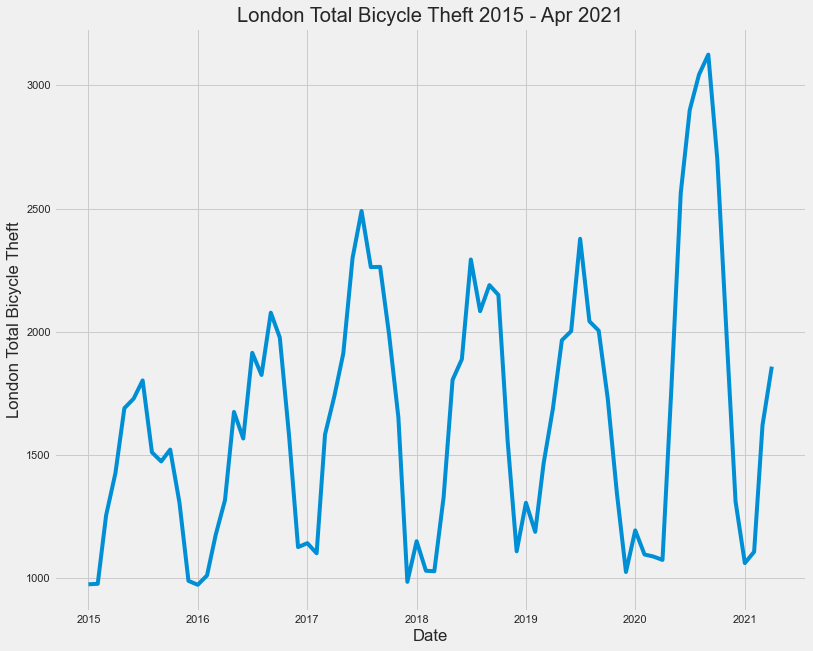

In [191]:
# Visualising the Bicycle Theft from 2015 - 2021
plt.style.use("fivethirtyeight")
 
# Set figure size to 12, 10.
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting a title
plt.xlabel("Date")
plt.ylabel("London Total Bicycle Theft")
plt.title("London Total Bicycle Theft 2015 - Apr 2021")
 
# Plot the "London Totals" column. 
plt.plot(Bicycle_Theft_Total["London Totals"])

### 5i. Casualties and Total Cycles 

We have found information on bicycle casualties for London under the link below, which we have filtered, cleaned and added with total number of trips to proceed with the analysis:

#### [Data about passengers, travelling to work, casualty rates and employment occupations, produced by Department for Transport](https://www.gov.uk/government/statistical-data-sets/tsgb01-modal-comparisons)

#### [Reported road collisions, vehicles and casualties tables for Great Britain](https://www.gov.uk/government/statistical-data-sets/reported-road-accidents-vehicles-and-casualties-tables-for-great-britain)

In [192]:
# Import the Casualties and Total Cycles Excel file.
Total_Cycles_and_Casualties = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Casualties and Total Cycles.xlsx')

# View the output.
Total_Cycles_and_Casualties

Date  Killed  All casualties  Total Cycles     Ratio
0  2015       9            4477       2168684  0.002064
1  2016       8            4426       2246799  0.001970
2  2017      10            4506       2276401  0.001979
3  2018      12            4756       2441863  0.001948
4  2019       5            4630       2438492  0.001899
5  2020       6            4791       1356515  0.003532
6  2021      10            5283       1936041  0.002729

In [193]:
# Set the Date as index.
Total_Cycles_and_Casualties = Total_Cycles_and_Casualties.set_index("Date")

# View the output.
Total_Cycles_and_Casualties

Killed  All casualties  Total Cycles     Ratio
Date                                                
2015       9            4477       2168684  0.002064
2016       8            4426       2246799  0.001970
2017      10            4506       2276401  0.001979
2018      12            4756       2441863  0.001948
2019       5            4630       2438492  0.001899
2020       6            4791       1356515  0.003532
2021      10            5283       1936041  0.002729

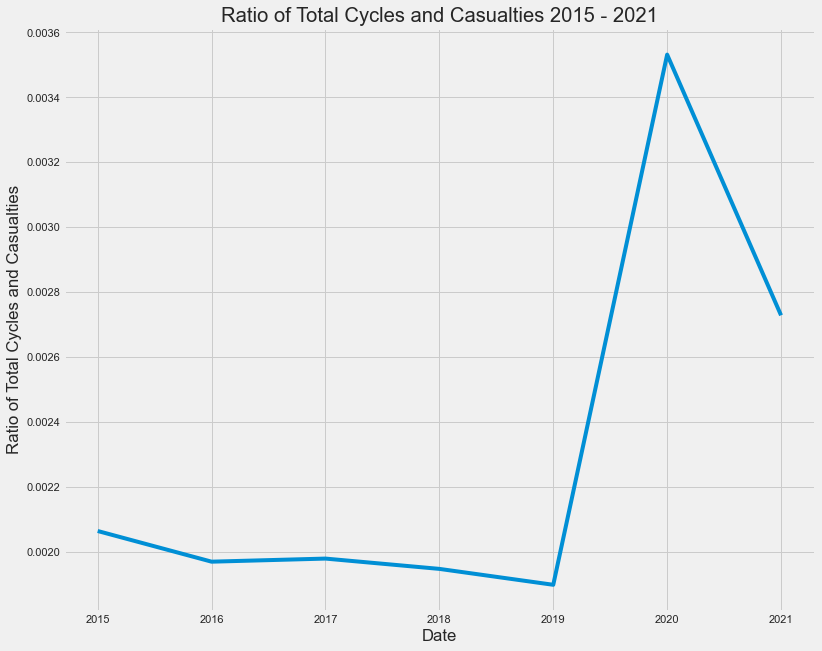

In [194]:
# Visualising the Ratio of Total Cycles and Casualties
plt.style.use("fivethirtyeight")
 
# Set figure size to 12, 10.
plt.figure(figsize=(12, 10))
 
# Label the axes and set a title.
plt.xlabel("Date")
plt.ylabel("Ratio of Total Cycles and Casualties")
plt.title("Ratio of Total Cycles and Casualties 2015 - 2021")
 
# Plot the "Killed" column 
plt.plot(Total_Cycles_and_Casualties["Ratio"])

# 

<h1><center>NEW YORK CITY</center></h1>

## 1. Data Ingestion

In [195]:
# Import New York Bicycle count data.
NY_bicycle_count = pd.read_csv('DataSurfers_LSE_EP_Assignment3_Data/Bicycle_Counts.csv')

# Explore the data types.
print(NY_bicycle_count.info())

# View the data.
NY_bicycle_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167507 entries, 0 to 4167506
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   date    object
 2   counts  int64 
 3   status  int64 
dtypes: int64(3), object(1)
memory usage: 127.2+ MB
None


id                    date  counts  status
0        100009425  06/24/2022 12:00:00 AM      15       0
1        100009425  06/24/2022 12:15:00 AM      12       0
2        100009425  06/24/2022 12:30:00 AM      14       0
3        100009425  06/24/2022 12:45:00 AM       5       0
4        100009425  06/24/2022 01:00:00 AM      10       0
...            ...                     ...     ...     ...
4167502  100005020  12/12/2012 02:45:00 AM       3       4
4167503  100005020  12/12/2012 03:00:00 AM       2       4
4167504  100005020  12/12/2012 03:15:00 AM       3       4
4167505  100005020  12/12/2012 03:30:00 AM       1       4
4167506  100005020  12/12/2012 03:45:00 AM       2       4

[4167507 rows x 4 columns]

In [196]:
# Assess the number of categories in status column of cycle count. 
categories = NY_bicycle_count['status'].unique()
num_categories = len(categories)

print("Number of categories:", num_categories)

print(categories)

Number of categories: 2
[0 4]


In [197]:
# Import New York Bicycle parking data.
NY_bicycle_parking = pd.read_csv('DataSurfers_LSE_EP_Assignment3_Data/Bicycle_Parking.csv')

# Explore the data types.
print(NY_bicycle_parking.info())

# View the data.
NY_bicycle_parking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30178 entries, 0 to 30177
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BoroCode    30178 non-null  int64 
 1   BoroName    30178 non-null  object
 2   CounDist    30178 non-null  int64 
 3   AssemDist   30178 non-null  int64 
 4   StSenDist   30178 non-null  int64 
 5   CongDist    30178 non-null  int64 
 6   STREETON    17710 non-null  object
 7   XSTREET1    21881 non-null  object
 8   XSTREET2    21771 non-null  object
 9   SIDE        18395 non-null  object
 10  ASSETSUBTY  30178 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.5+ MB
None


BoroCode   BoroName  CounDist  AssemDist  StSenDist  CongDist  \
0             1  Manhattan        10         72         31        13   
1             3   Brooklyn        35         57         25         9   
2             4     Queens        29         27         16         6   
3             4     Queens        29         27         16         6   
4             1  Manhattan         1         66         26        10   
...         ...        ...       ...        ...        ...       ...   
30173         3   Brooklyn        35         57         20         9   
30174         3   Brooklyn        35         57         20         9   
30175         3   Brooklyn        35         57         20         9   
30176         3   Brooklyn        35         57         20         9   
30177         3   Brooklyn        35         57         20         9   

                STREETON     XSTREET1      XSTREET2 SIDE  ASSETSUBTY  
0               W 207 ST     BROADWAY     COOPER ST    S  Small Hoop  
1                    NaN          NaN           NaN  NaN  Large Hoop  
2                 108 ST        63 RD         63 DR    W  Small Hoop  
3                 108 ST        63 RD         63 DR    W  Small Hoop  
4                    NaN  BLEECKER ST  W HOUSTON ST    W      U-Rack  
...                  ...          ...           ...  ...         ...  
30173  Washington Avenue          NaN           NaN  NaN  Small Hoop  
30174  Washington Avenue          NaN           NaN  NaN  Small Hoop  
30175  Washington Avenue          NaN           NaN  NaN  Small Hoop  
30176  Washington Avenue          NaN           NaN  NaN  Small Hoop  
30177  Washington Avenue          NaN           NaN  NaN  Small Hoop  

[30178 rows x 11 columns]

In [198]:
# Import New York Bicycle routes data.
NY_bicycle_routes = pd.read_excel('DataSurfers_LSE_EP_Assignment3_Data/Bicycle_Routes.xlsx')

# Explore the data types.
print(NY_bicycle_routes.info())

# View the data.
NY_bicycle_routes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20824 entries, 0 to 20823
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   segmentid   20824 non-null  object
 1   boro        20824 non-null  int64 
 2   street      20824 non-null  object
 3   fromstreet  20824 non-null  object
 4   tostreet    20824 non-null  object
 5   bikedir     20824 non-null  object
 6   lanecount   20824 non-null  int64 
 7   ft_facilit  15430 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB
None


segmentid  boro                          street       fromstreet  \
0            53     5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
1            57     5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
2            59     5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
3            61     5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
4            64     5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
...         ...   ...                             ...              ...   
20819   233.514     4                   NORTHERN BLVD  DOUGLASTON PKWY   
20820   233.466     4                   CROSS IS PKWY    NORTHERN BLVD   
20821   163.713     3                   VANDERBILT AV       PACIFIC ST   
20822   163.714     3                   VANDERBILT AV       PACIFIC ST   
20823   163.712     3                   VANDERBILT AV       PACIFIC ST   

            tostreet bikedir  lanecount      ft_facilit  
0      SWINNERTON ST       2          2        Greenway  
1      SWINNERTON ST       2          2        Greenway  
2      SWINNERTON ST       2          2        Greenway  
3      SWINNERTON ST       2          2        Greenway  
4      SWINNERTON ST       2          2        Greenway  
...              ...     ...        ...             ...  
20819         223 ST       2          2  Protected Path  
20820      TOTTEN AV       2          2        Greenway  
20821    ATLANTIC AV       2          2        Curbside  
20822    ATLANTIC AV       2          2        Curbside  
20823    ATLANTIC AV       2          2        Curbside  

[20824 rows x 8 columns]

In [199]:
# Remove duplicates from bicycle counts. 
NY_bicycle_count = NY_bicycle_count.drop_duplicates()

# Remove duplicates from bicycle parking.
NY_bicycle_parking = NY_bicycle_parking.drop_duplicates()

# Remove duplicates from bicycle routes.
NY_bicycle_routes = NY_bicycle_routes.drop_duplicates()

## 2. Data Wrangling 

In [200]:
# Change bicycle count time column.
NY_bicycle_count['Text_split'] = NY_bicycle_count['date'].str.split(' ')

# View data.
NY_bicycle_count.head()

id                    date  counts  status  \
0  100009425  06/24/2022 12:00:00 AM      15       0   
1  100009425  06/24/2022 12:15:00 AM      12       0   
2  100009425  06/24/2022 12:30:00 AM      14       0   
3  100009425  06/24/2022 12:45:00 AM       5       0   
4  100009425  06/24/2022 01:00:00 AM      10       0   

                   Text_split  
0  [06/24/2022, 12:00:00, AM]  
1  [06/24/2022, 12:15:00, AM]  
2  [06/24/2022, 12:30:00, AM]  
3  [06/24/2022, 12:45:00, AM]  
4  [06/24/2022, 01:00:00, AM]

In [201]:
# Split the text to get time column. 
NY_bicycle_count[['date', 'time']] = NY_bicycle_count['date'].str.split(' ', 1, expand=True)

# View data.
NY_bicycle_count.head()

id        date  counts  status                  Text_split  \
0  100009425  06/24/2022      15       0  [06/24/2022, 12:00:00, AM]   
1  100009425  06/24/2022      12       0  [06/24/2022, 12:15:00, AM]   
2  100009425  06/24/2022      14       0  [06/24/2022, 12:30:00, AM]   
3  100009425  06/24/2022       5       0  [06/24/2022, 12:45:00, AM]   
4  100009425  06/24/2022      10       0  [06/24/2022, 01:00:00, AM]   

          time  
0  12:00:00 AM  
1  12:15:00 AM  
2  12:30:00 AM  
3  12:45:00 AM  
4  01:00:00 AM

In [202]:
# Drop unnecessary column: text_split.
NY_bicycle_count = NY_bicycle_count.drop('Text_split', axis=1)

# View data.
NY_bicycle_count.head()

id        date  counts  status         time
0  100009425  06/24/2022      15       0  12:00:00 AM
1  100009425  06/24/2022      12       0  12:15:00 AM
2  100009425  06/24/2022      14       0  12:30:00 AM
3  100009425  06/24/2022       5       0  12:45:00 AM
4  100009425  06/24/2022      10       0  01:00:00 AM

In [203]:
# Drop unnecessary column: status.
NY_bicycle_count = NY_bicycle_count.drop('status', axis=1)

# View data.
NY_bicycle_count.head()

id        date  counts         time
0  100009425  06/24/2022      15  12:00:00 AM
1  100009425  06/24/2022      12  12:15:00 AM
2  100009425  06/24/2022      14  12:30:00 AM
3  100009425  06/24/2022       5  12:45:00 AM
4  100009425  06/24/2022      10  01:00:00 AM

In [204]:
# Use datetime formula to get date in a python format.
NY_bicycle_count['Date'] = pd.to_datetime(NY_bicycle_count['date'])

# View data.
NY_bicycle_count.head()

id        date  counts         time       Date
0  100009425  06/24/2022      15  12:00:00 AM 2022-06-24
1  100009425  06/24/2022      12  12:15:00 AM 2022-06-24
2  100009425  06/24/2022      14  12:30:00 AM 2022-06-24
3  100009425  06/24/2022       5  12:45:00 AM 2022-06-24
4  100009425  06/24/2022      10  01:00:00 AM 2022-06-24

In [205]:
# Create another column for days of the week for the analysis. 
NY_bicycle_count['DayOfWeek'] = NY_bicycle_count['Date'].dt.strftime('%A')

# View data.
NY_bicycle_count.head()

id        date  counts         time       Date DayOfWeek
0  100009425  06/24/2022      15  12:00:00 AM 2022-06-24    Friday
1  100009425  06/24/2022      12  12:15:00 AM 2022-06-24    Friday
2  100009425  06/24/2022      14  12:30:00 AM 2022-06-24    Friday
3  100009425  06/24/2022       5  12:45:00 AM 2022-06-24    Friday
4  100009425  06/24/2022      10  01:00:00 AM 2022-06-24    Friday

In [206]:
# Drop unnecessary column: old date.
NY_bicycle_count = NY_bicycle_count.drop('date', axis=1)

# View data.
NY_bicycle_count.head()

id  counts         time       Date DayOfWeek
0  100009425      15  12:00:00 AM 2022-06-24    Friday
1  100009425      12  12:15:00 AM 2022-06-24    Friday
2  100009425      14  12:30:00 AM 2022-06-24    Friday
3  100009425       5  12:45:00 AM 2022-06-24    Friday
4  100009425      10  01:00:00 AM 2022-06-24    Friday

## 3. Exploratory Analysis

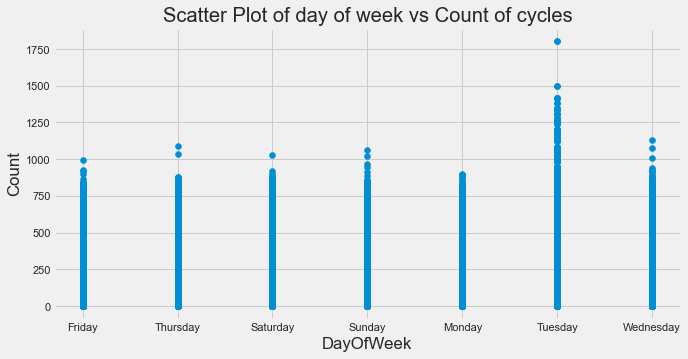

In [207]:
# Plot the days of the week vs Counts
plt.scatter(NY_bicycle_count['DayOfWeek'], NY_bicycle_count['counts'])
plt.xlabel('DayOfWeek')
plt.ylabel('Count')
plt.title('Scatter Plot of day of week vs Count of cycles')
plt.show()

In [208]:
# Create a dataframe for frequency of specific days.
days_count = NY_bicycle_count.groupby(NY_bicycle_count['Date'].dt.day_name())['counts'].sum().reset_index()

# Rename the columns.
days_count.columns = ['Day', 'Total Count']

# Display the new DataFrame.
print(days_count)

         Day  Total Count
0     Friday     16378218
1     Monday     16573709
2   Saturday     14779933
3     Sunday     13785661
4   Thursday     17077813
5    Tuesday     17582071
6  Wednesday     17907101


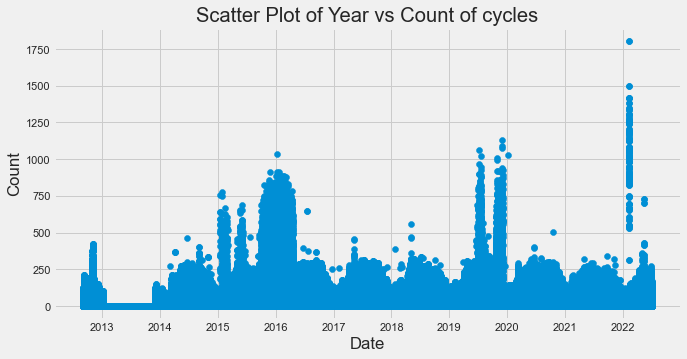

In [209]:
# Plot Date vs Counts.
plt.scatter(NY_bicycle_count['Date'], NY_bicycle_count['counts'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Scatter Plot of Year vs Count of cycles')
plt.show()

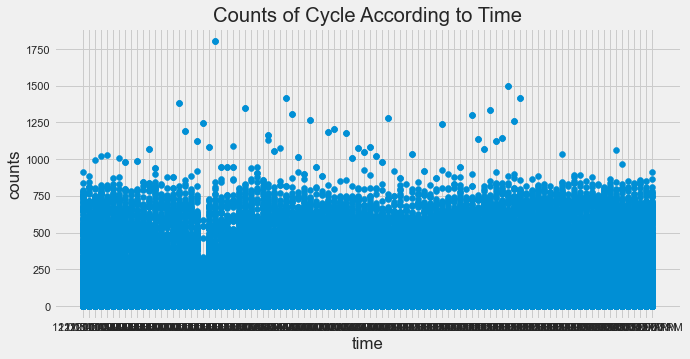

In [210]:
# Plot Time vs Counts
plt.scatter(NY_bicycle_count['time'], NY_bicycle_count['counts'])
plt.xlabel('time')
plt.ylabel('counts')
plt.title('Counts of Cycle According to Time')
plt.show()

In [211]:
# Group data by month and calculate the sum.
monthly = NY_bicycle_count.groupby(NY_bicycle_count['Date'].dt.to_period('M')).sum().reset_index()

# Print the grouped data.
monthly

Date             id   counts
0    2012-08    38416013472    18736
1    2012-09  1152480404160   487772
2    2012-10  1187695083176   417956
3    2012-11  1152480404160   460136
4    2012-12  1190496250825   227256
..       ...            ...      ...
115  2022-03  5350620846336   909984
116  2022-04  5184989245440  1101825
117  2022-05  6163569792845  1395108
118  2022-06  6337223455680  1611004
119  2022-07   825756663072   178217

[120 rows x 3 columns]

In [212]:
# Group data by month and calculate the sum
yearly = NY_bicycle_count.groupby(NY_bicycle_count['Date'].dt.to_period('Y')).sum().reset_index()


# Print the grouped data
yearly.head()

Date              id    counts
0  2012   4721568155793   1611856
1  2013   6093836265967    323533
2  2014  42874564394432   9261909
3  2015  47577995466548  13797937
4  2016  52339452284034  16005658

In [213]:
# Comparing yearly and monthly info().
print(yearly.info())

print(monthly.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   Date    11 non-null     period[A-DEC]
 1   id      11 non-null     int64        
 2   counts  11 non-null     int64        
dtypes: int64(2), period[A-DEC](1)
memory usage: 392.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   Date    120 non-null    period[M]
 1   id      120 non-null    int64    
 2   counts  120 non-null    int64    
dtypes: int64(2), period[M](1)
memory usage: 2.9 KB
None


In [214]:
# Convert 'YearMonth' column from period to object (string).
yearly['Date'] = yearly['Date'].astype(str)

# Print the DataFrame with the converted column.
print(yearly)

# Print the DataFrame's info.
print(yearly.info())

    Date              id    counts
0   2012   4721568155793   1611856
1   2013   6093836265967    323533
2   2014  42874564394432   9261909
3   2015  47577995466548  13797937
4   2016  52339452284034  16005658
5   2017  57899170037376  14481794
6   2018  61152352964847  12542497
7   2019  59675030394477  12346460
8   2020  57756820353916  13577322
9   2021  59048861498074  13690962
10  2022  34059305519405   6444578
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    11 non-null     object
 1   id      11 non-null     int64 
 2   counts  11 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes
None


In [215]:
# Convert 'YearMonth' column from period to object (string).
monthly['Date'] = monthly['Date'].astype(str)

# Print the DataFrame with the converted column.
print(monthly)

# Print the DataFrame's info.
print(monthly.info())

        Date             id   counts
0    2012-08    38416013472    18736
1    2012-09  1152480404160   487772
2    2012-10  1187695083176   417956
3    2012-11  1152480404160   460136
4    2012-12  1190496250825   227256
..       ...            ...      ...
115  2022-03  5350620846336   909984
116  2022-04  5184989245440  1101825
117  2022-05  6163569792845  1395108
118  2022-06  6337223455680  1611004
119  2022-07   825756663072   178217

[120 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    120 non-null    object
 1   id      120 non-null    int64 
 2   counts  120 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB
None


In [216]:
# Split 'Text' column using a delimiter.
monthly[['Month', 'Year']] = monthly['Date'].str.split('-', 1, expand=True)

# Print the DataFrame with the split columns.
print(monthly)

        Date             id   counts Month Year
0    2012-08    38416013472    18736  2012   08
1    2012-09  1152480404160   487772  2012   09
2    2012-10  1187695083176   417956  2012   10
3    2012-11  1152480404160   460136  2012   11
4    2012-12  1190496250825   227256  2012   12
..       ...            ...      ...   ...  ...
115  2022-03  5350620846336   909984  2022   03
116  2022-04  5184989245440  1101825  2022   04
117  2022-05  6163569792845  1395108  2022   05
118  2022-06  6337223455680  1611004  2022   06
119  2022-07   825756663072   178217  2022   07

[120 rows x 5 columns]


In [217]:
# Date Column.
monthly = monthly.drop('Date', axis=1)

# Monthly Column.
monthly = monthly.drop('Month', axis=1)

# View DataFrame and info().
print(monthly)

print(monthly.info())

                id   counts Year
0      38416013472    18736   08
1    1152480404160   487772   09
2    1187695083176   417956   10
3    1152480404160   460136   11
4    1190496250825   227256   12
..             ...      ...  ...
115  5350620846336   909984   03
116  5184989245440  1101825   04
117  6163569792845  1395108   05
118  6337223455680  1611004   06
119   825756663072   178217   07

[120 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      120 non-null    int64 
 1   counts  120 non-null    int64 
 2   Year    120 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.9+ KB
None


In [218]:
# Rename the columns.
monthly = monthly.rename(columns={'Year': 'Month'})

In [219]:
# Reorganise the Dataframe's structure.
monthly = monthly.groupby('Month').sum().reset_index()

# View Dataframe.
print(monthly)

   Month              id    counts
0     01  42388906493512   5731972
1     02  38474819917216   5568983
2     03  42219189275812   7035315
3     04  41163742556928   9237993
4     05  42776452485175  11711870
5     06  42063397227286  12926507
6     07  38242215213983  11682657
7     08  37627014610395  11850404
8     09  37913414814834  12072633
9     10  39587127628763  11007053
10    11  39000699150943   8793425
11    12  41741977960022   6465694


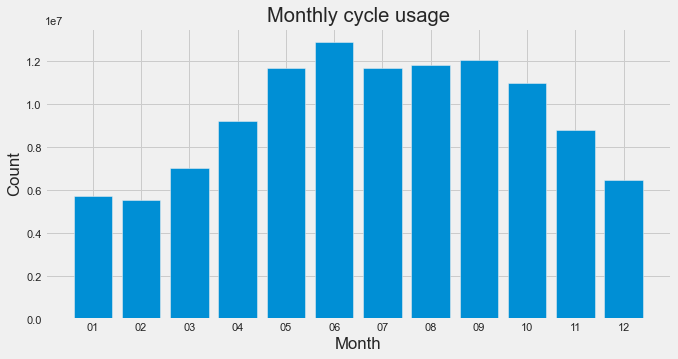

In [220]:
# Plotting the bar chart.
plt.bar(monthly['Month'], monthly['counts'])

# Customizing the plot.
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly cycle usage')

# Displaying the plot.
plt.show()

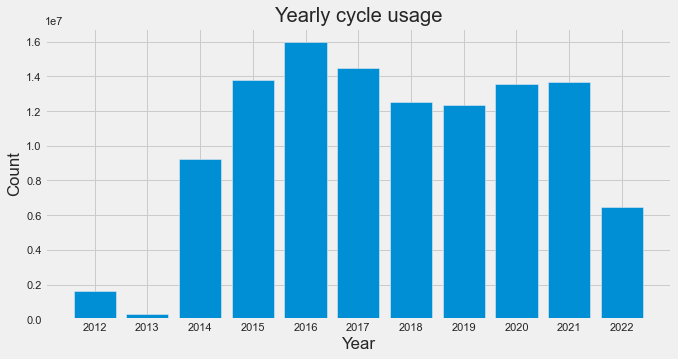

In [221]:
# Plotting the bar chart.
plt.bar(yearly['Date'], yearly['counts'])

# Customizing the plot.
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly cycle usage')

# Displaying the plot.
plt.show()

In [222]:
# Assign time categories based on 'Time' column.
NY_bicycle_count['TimeCategory'] = pd.cut(pd.to_datetime(NY_bicycle_count['time']).dt.hour,
                            bins=[0, 6, 12, 18, 24],
                            labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                            right=False)

# Group by 'TimeCategory' and calculate the sum of 'Value' for each category.
grouped = NY_bicycle_count.groupby('TimeCategory').sum().reset_index()

# Print the grouped DataFrame.
print(grouped)

  TimeCategory               id    counts
0        Night  120718199017271   6191714
1      Morning  120785210396915  32898801
2    Afternoon  120833820222641  40573323
3      Evening  120861727698042  34420668


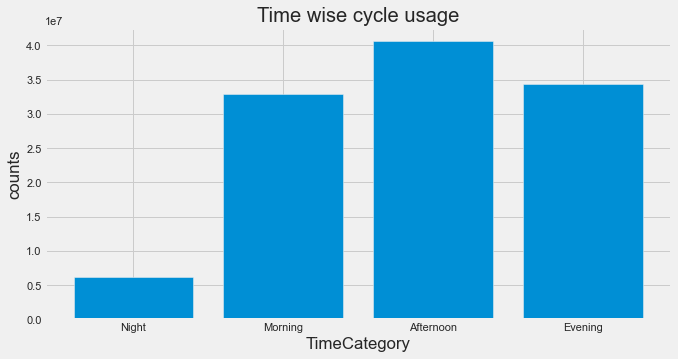

In [223]:
# Plotting the bar chart
plt.bar(grouped['TimeCategory'], grouped['counts'])

# Customizing the plot
plt.xlabel('TimeCategory')
plt.ylabel('counts')
plt.title('Time wise cycle usage')

# Displaying the plot
plt.show()

## 4. Investigate New york City public transport

We have also found some information on public transport for New York City under the link below:

#### [Subway and bus ridership for 2021](https://new.mta.info/agency/new-york-city-transit/subway-bus-ridership-2021)

In [224]:
# Create a dictionary with the data.
data = {'Year': [2016, 2017, 2018, 2019, 2020, 2021],
        'Subway ridership': [1756814800, 1727366607, 1680060402, 1697787002, 639541029, 759976721],
        'Bus Ridership': [638413113, 602620356, 569361220, 557036504, 316768454, 311893583]}

In [225]:
# Create a dataframe from the dictionary above.
NY_public = pd.DataFrame(data)

# View the output.
NY_public

Year  Subway ridership  Bus Ridership
0  2016        1756814800      638413113
1  2017        1727366607      602620356
2  2018        1680060402      569361220
3  2019        1697787002      557036504
4  2020         639541029      316768454
5  2021         759976721      311893583

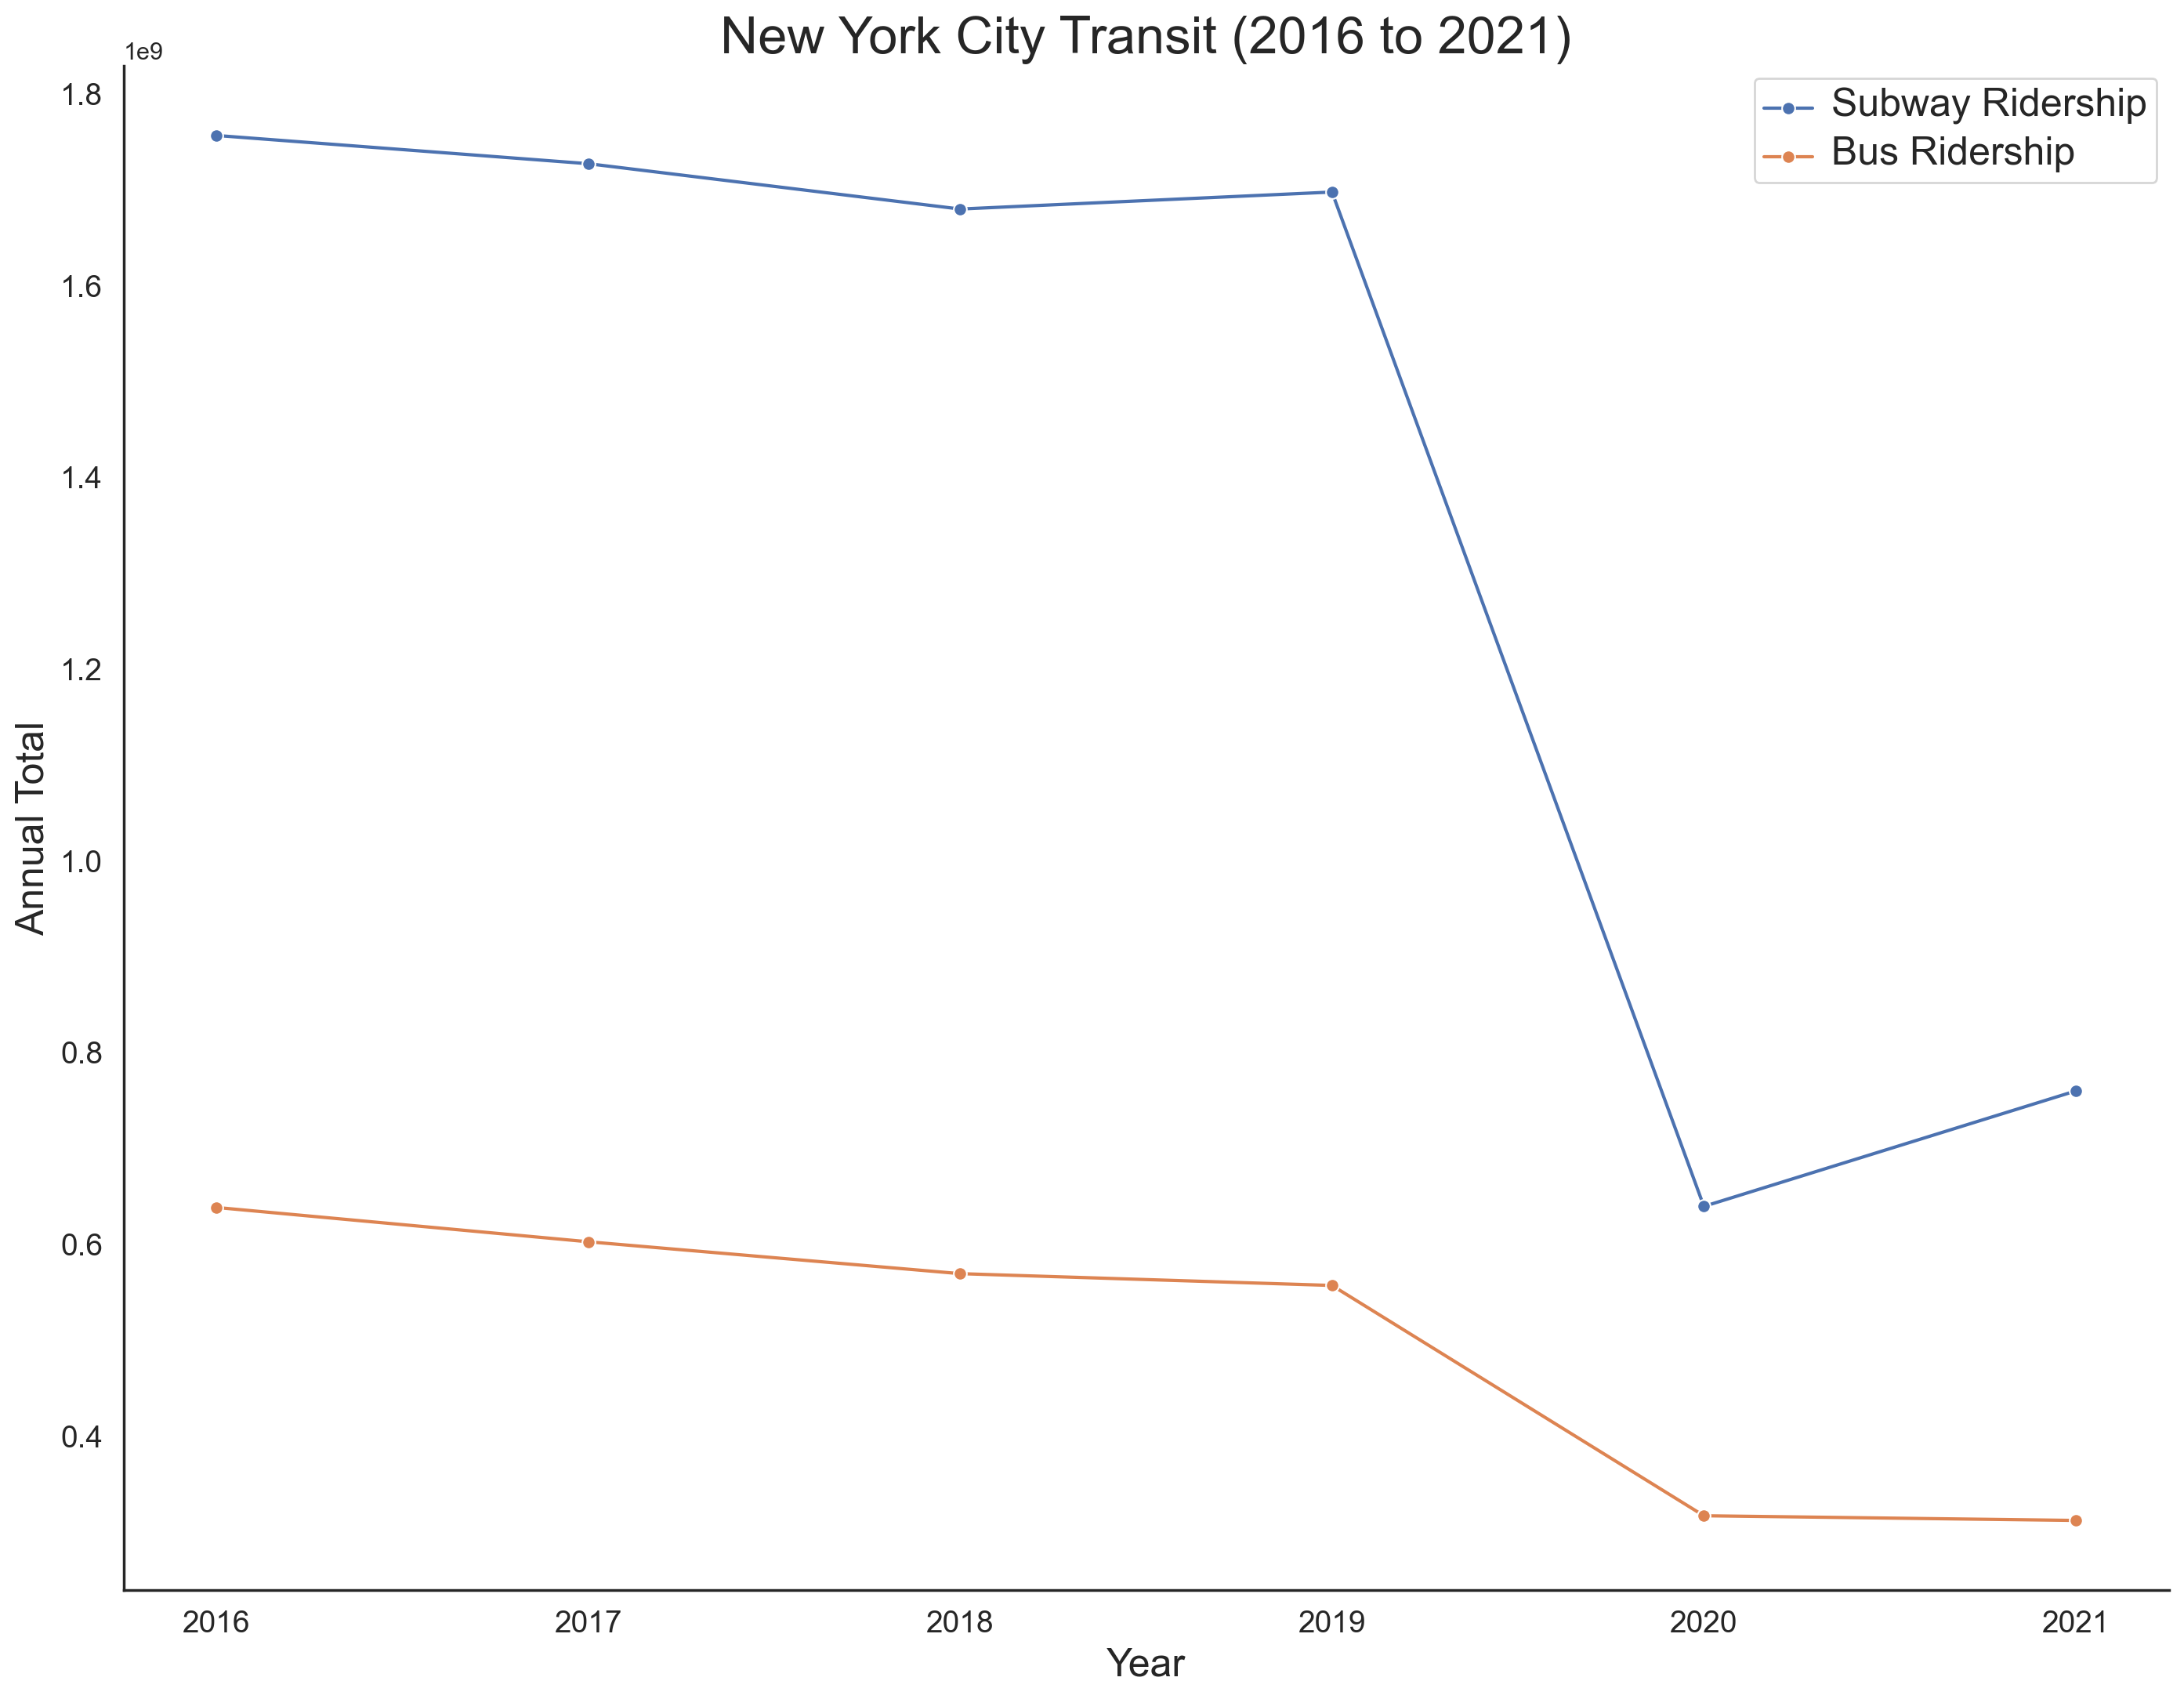

In [226]:
# Set seaborn color palette to colorblind
sns.set_palette("colorblind")

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create line plot
fig27, ax = plt.subplots(dpi=200)
sns.lineplot(data=NY_public, x='Year', y='Subway ridership', marker='o', label='Subway Ridership')
sns.lineplot(data=NY_public, x='Year', y='Bus Ridership', marker='o', label='Bus Ridership')

# Set chart title and labels
plt.title('New York City Transit (2016 to 2021)', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Annual Total', fontsize=18)

# Set ticks size.
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set legend size.
plt.setp(ax.get_legend().get_texts(), fontsize='18') 

# Remove the top and right spines from the plot.
sns.despine(fig27)

# View the plot and save an image.
plt.show()
fig27.savefig('New York City Transit (2016 to 2021).jpg')

# 

<h1><center>SYDNEY</center></h1>

## 1. Data Ingestion

In [227]:
# Load Sydney count sites file.
sydney_site = pd.read_csv('DataSurfers_LSE_EP_Assignment3_Data/Bicycle_count_sites.csv')

# View the DataFrame.
sydney_site

X          Y  OBJECTID  SiteID  \
0    151.204168 -33.882846         1       1   
1    151.208601 -33.878286         2       2   
2    151.205783 -33.863364         3       3   
3    151.209897 -33.873292         4       4   
4    151.209083 -33.879797         5       5   
..          ...        ...       ...     ...   
104  151.196890 -33.887404       105      34   
105  151.207298 -33.893242       106      81   
106  151.207260 -33.903076       107      95   
107  151.213745 -33.880637       108     108   
108  151.212312 -33.886819       109     109   

                                          Intersection  
0    Intersection of Broadway, Lee Street, Quay Str...  
1    Intersection of Castlereagh Street and Goulbur...  
2    Intersection of Grosvenor Street and Glouceste...  
3     Intersection of Elizabeth Street and Park Street  
4    Intersection of Elizabeth Street, Wentworth Av...  
..                                                 ...  
104  Intersection of Buckland Street and Myrtle Str...  
105  Intersection of Elizabeth Street and Redfern S...  
106  Intersection of Bourke Street and O'Dea Avenue...  
107           Intersection of Riley St and Campbell St  
108             Intersection of Riley St and Arthur St  

[109 rows x 5 columns]

In [228]:
# Drop the X and Y Coordinates columns.
sydney_site = sydney_site.drop(columns=['X', 'Y'])

# View the DataFrame.
sydney_site

OBJECTID  SiteID                                       Intersection
0           1       1  Intersection of Broadway, Lee Street, Quay Str...
1           2       2  Intersection of Castlereagh Street and Goulbur...
2           3       3  Intersection of Grosvenor Street and Glouceste...
3           4       4   Intersection of Elizabeth Street and Park Street
4           5       5  Intersection of Elizabeth Street, Wentworth Av...
..        ...     ...                                                ...
104       105      34  Intersection of Buckland Street and Myrtle Str...
105       106      81  Intersection of Elizabeth Street and Redfern S...
106       107      95  Intersection of Bourke Street and O'Dea Avenue...
107       108     108           Intersection of Riley St and Campbell St
108       109     109             Intersection of Riley St and Arthur St

[109 rows x 3 columns]

In [229]:
# Check for missing Values.
sydney_site.isnull().sum()

OBJECTID        0
SiteID          0
Intersection    0
dtype: int64

In [230]:
# Check for duplicates.
sydney_site.duplicated().sum()

0

In [231]:
# Check the metadata.
sydney_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OBJECTID      109 non-null    int64 
 1   SiteID        109 non-null    int64 
 2   Intersection  109 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


In [232]:
# Summary of Sydney Sites.
sydney_site.describe()

OBJECTID      SiteID
count  109.000000  109.000000
mean    55.000000   55.000000
std     31.609598   31.609598
min      1.000000    1.000000
25%     28.000000   28.000000
50%     55.000000   55.000000
75%     82.000000   82.000000
max    109.000000  109.000000

In [233]:
# Load Sydney count surveys csv file.
sydney_survey = pd.read_csv('DataSurfers_LSE_EP_Assignment3_Data/Bicycle_count_surveys.csv')

# View the DataFrame.
sydney_survey

SiteID    Month  Year  TotalCount  ObjectId2  Time_0600  Time_0700  \
0         51    March  2010         263          1         12         45   
1          1  October  2015         383          2         37         69   
2         52    March  2010         136          3          7         18   
3         53    March  2010         333          4         25         86   
4          2  October  2015         447          5         32         75   
...      ...      ...   ...         ...        ...        ...        ...   
2210      86    March  2022         998       2290         72        134   
2211      76    March  2022         856       2291         59        160   
2212      79    March  2022         554       2292         32         77   
2213      82    March  2022        1018       2293         42        156   
2214      85    March  2022         188       2294         36         37   

      Time_0800  Time_1600  Time_1700  Time_1800  
0            56         27         56         67  
1           100         47         68         62  
2            31         29         30         21  
3            93         15         62         52  
4            72         56        114         98  
...         ...        ...        ...        ...  
2210        236        138        235        183  
2211        191        103        177        166  
2212        122         79        116        128  
2213        244        143        227        206  
2214         25         26         43         21  

[2215 rows x 11 columns]

In [234]:
# Check for missing Values.
sydney_survey.isnull().sum()

SiteID        0
Month         0
Year          0
TotalCount    0
ObjectId2     0
Time_0600     0
Time_0700     0
Time_0800     0
Time_1600     0
Time_1700     0
Time_1800     0
dtype: int64

In [235]:
# Check for duplicates.
sydney_survey.duplicated().sum()

0

In [236]:
# Check the metadata.
sydney_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SiteID      2215 non-null   int64 
 1   Month       2215 non-null   object
 2   Year        2215 non-null   int64 
 3   TotalCount  2215 non-null   int64 
 4   ObjectId2   2215 non-null   int64 
 5   Time_0600   2215 non-null   int64 
 6   Time_0700   2215 non-null   int64 
 7   Time_0800   2215 non-null   int64 
 8   Time_1600   2215 non-null   int64 
 9   Time_1700   2215 non-null   int64 
 10  Time_1800   2215 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 190.5+ KB


In [237]:
# Summary of sydney_survey.
sydney_survey.describe()

SiteID         Year   TotalCount    ObjectId2    Time_0600  \
count  2215.000000  2215.000000  2215.000000  2215.000000  2215.000000   
mean     52.748081  2015.307449   499.086230  1126.790519    42.607223   
std      30.012911     3.565469   485.023818   664.561662    60.945213   
min       1.000000  2010.000000    19.000000     1.000000     0.000000   
25%      27.000000  2012.000000   193.000000   554.500000    14.000000   
50%      53.000000  2015.000000   326.000000  1108.000000    25.000000   
75%      79.000000  2018.000000   594.000000  1698.500000    47.000000   
max     110.000000  2022.000000  2898.000000  2294.000000   948.000000   

         Time_0700    Time_0800    Time_1600    Time_1700    Time_1800  
count  2215.000000  2215.000000  2215.000000  2215.000000  2215.000000  
mean     88.642438   114.964334    56.424379   103.087133    92.879910  
std     101.371594   117.587336    48.984111    99.571231    89.525962  
min       0.000000     0.000000     1.000000     1.000000     0.000000  
25%      30.000000    40.000000    24.000000    40.000000    34.000000  
50%      51.000000    73.000000    40.000000    68.000000    62.000000  
75%     101.500000   146.000000    73.000000   129.000000   119.000000  
max     785.000000   787.000000   523.000000   591.000000   614.000000

## 2. Create new variables for analysis

In [238]:
# Create a morning count variable.
sydney_survey['morning_count'] = sydney_survey['Time_0600'] + sydney_survey['Time_0700'] + sydney_survey['Time_0800']

# Drop morning count variables.
sydney_survey = sydney_survey.drop(columns=['Time_0600', 'Time_0700', 'Time_0800'])

In [239]:
# Create an evening count variable.
sydney_survey['evening_count'] = sydney_survey['Time_1600'] + sydney_survey['Time_1700'] + sydney_survey['Time_1800']

# Drop morning count variables.
sydney_survey = sydney_survey.drop(columns=['Time_1600', 'Time_1700', 'Time_1800'])

In [240]:
# Create morning / evening ratio column.
sydney_survey['morning_ratio'] = sydney_survey['morning_count'] / sydney_survey['TotalCount'] * 100

# View output.
sydney_survey

SiteID    Month  Year  TotalCount  ObjectId2  morning_count  \
0         51    March  2010         263          1            113   
1          1  October  2015         383          2            206   
2         52    March  2010         136          3             56   
3         53    March  2010         333          4            204   
4          2  October  2015         447          5            179   
...      ...      ...   ...         ...        ...            ...   
2210      86    March  2022         998       2290            442   
2211      76    March  2022         856       2291            410   
2212      79    March  2022         554       2292            231   
2213      82    March  2022        1018       2293            442   
2214      85    March  2022         188       2294             98   

      evening_count  morning_ratio  
0               150      42.965779  
1               177      53.785901  
2                80      41.176471  
3               129      61.261261  
4               268      40.044743  
...             ...            ...  
2210            556      44.288577  
2211            446      47.897196  
2212            323      41.696751  
2213            576      43.418468  
2214             90      52.127660  

[2215 rows x 8 columns]

In [241]:
# Create a Spring column variable.
sydney_survey['Spring'] = np.where(sydney_survey['Month'] == 'March', 1, 0)

In [242]:
# Create an Autumn column variable.
sydney_survey['Autumn'] = np.where(sydney_survey["Month"] == 'October', 1, 0)

# View output.
sydney_survey

SiteID    Month  Year  TotalCount  ObjectId2  morning_count  \
0         51    March  2010         263          1            113   
1          1  October  2015         383          2            206   
2         52    March  2010         136          3             56   
3         53    March  2010         333          4            204   
4          2  October  2015         447          5            179   
...      ...      ...   ...         ...        ...            ...   
2210      86    March  2022         998       2290            442   
2211      76    March  2022         856       2291            410   
2212      79    March  2022         554       2292            231   
2213      82    March  2022        1018       2293            442   
2214      85    March  2022         188       2294             98   

      evening_count  morning_ratio  Spring  Autumn  
0               150      42.965779       1       0  
1               177      53.785901       0       1  
2                80      41.176471       1       0  
3               129      61.261261       1       0  
4               268      40.044743       0       1  
...             ...            ...     ...     ...  
2210            556      44.288577       1       0  
2211            446      47.897196       1       0  
2212            323      41.696751       1       0  
2213            576      43.418468       1       0  
2214             90      52.127660       1       0  

[2215 rows x 10 columns]

In [243]:
# Create a CSV file as output to import updated data file in tableau.
sydney_survey.to_csv('Updated_dataframe.csv', index=False, header=True)

## 3. Initual Visualisation for exploration

<AxesSubplot:xlabel='Year', ylabel='TotalCount'>

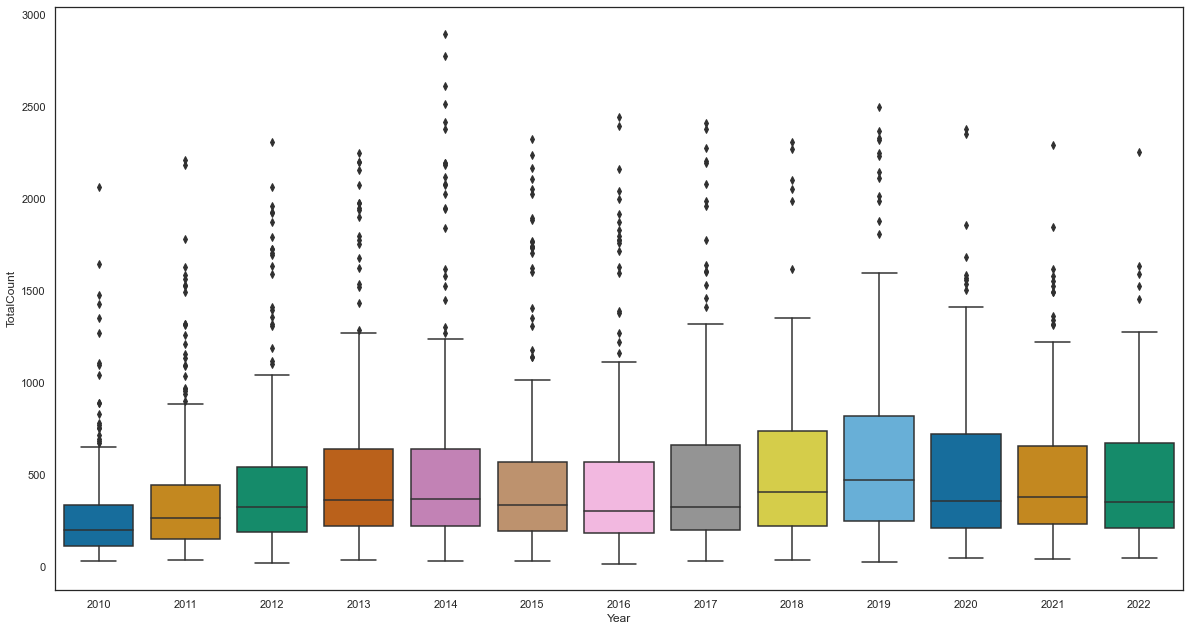

In [244]:
# Visualisation the growth of cyclists.
plt.figure(figsize = (18, 10))
sns.boxplot(data = sydney_survey, y = 'TotalCount' , x = 'Year', palette='colorblind')

<AxesSubplot:xlabel='evening_count', ylabel='morning_count'>

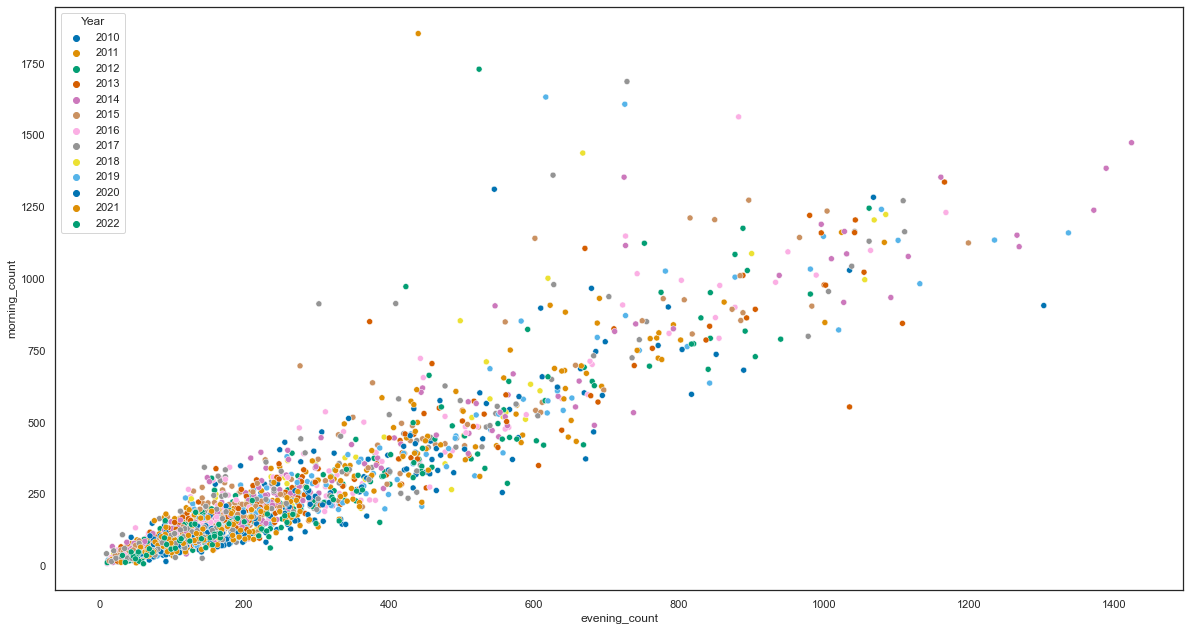

In [245]:
# Check the relationship between cyclist in the morning vs in the evening.
plt.figure(figsize = (18, 10))
sns.scatterplot(data = sydney_survey, y = 'morning_count', x = 'evening_count', hue = 'Year', palette='colorblind')

<AxesSubplot:xlabel='TotalCount', ylabel='Count'>

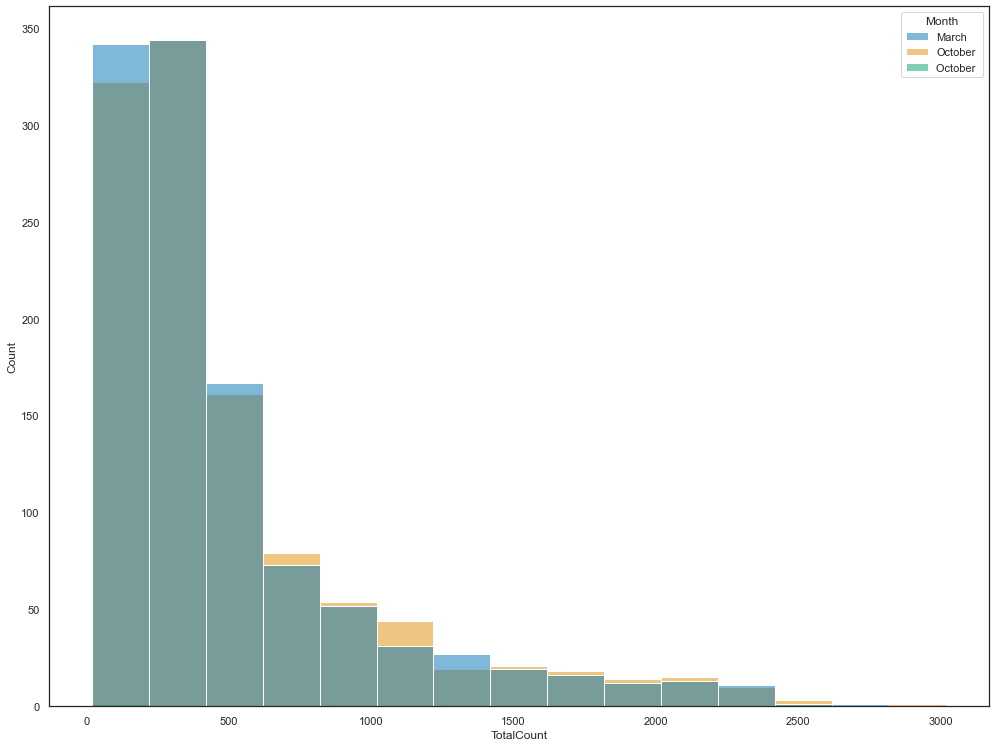

In [246]:
# Histogram of distributed count amount.
sns.histplot(data = sydney_survey, x = 'TotalCount', binwidth= 200, hue = 'Month', palette='colorblind')

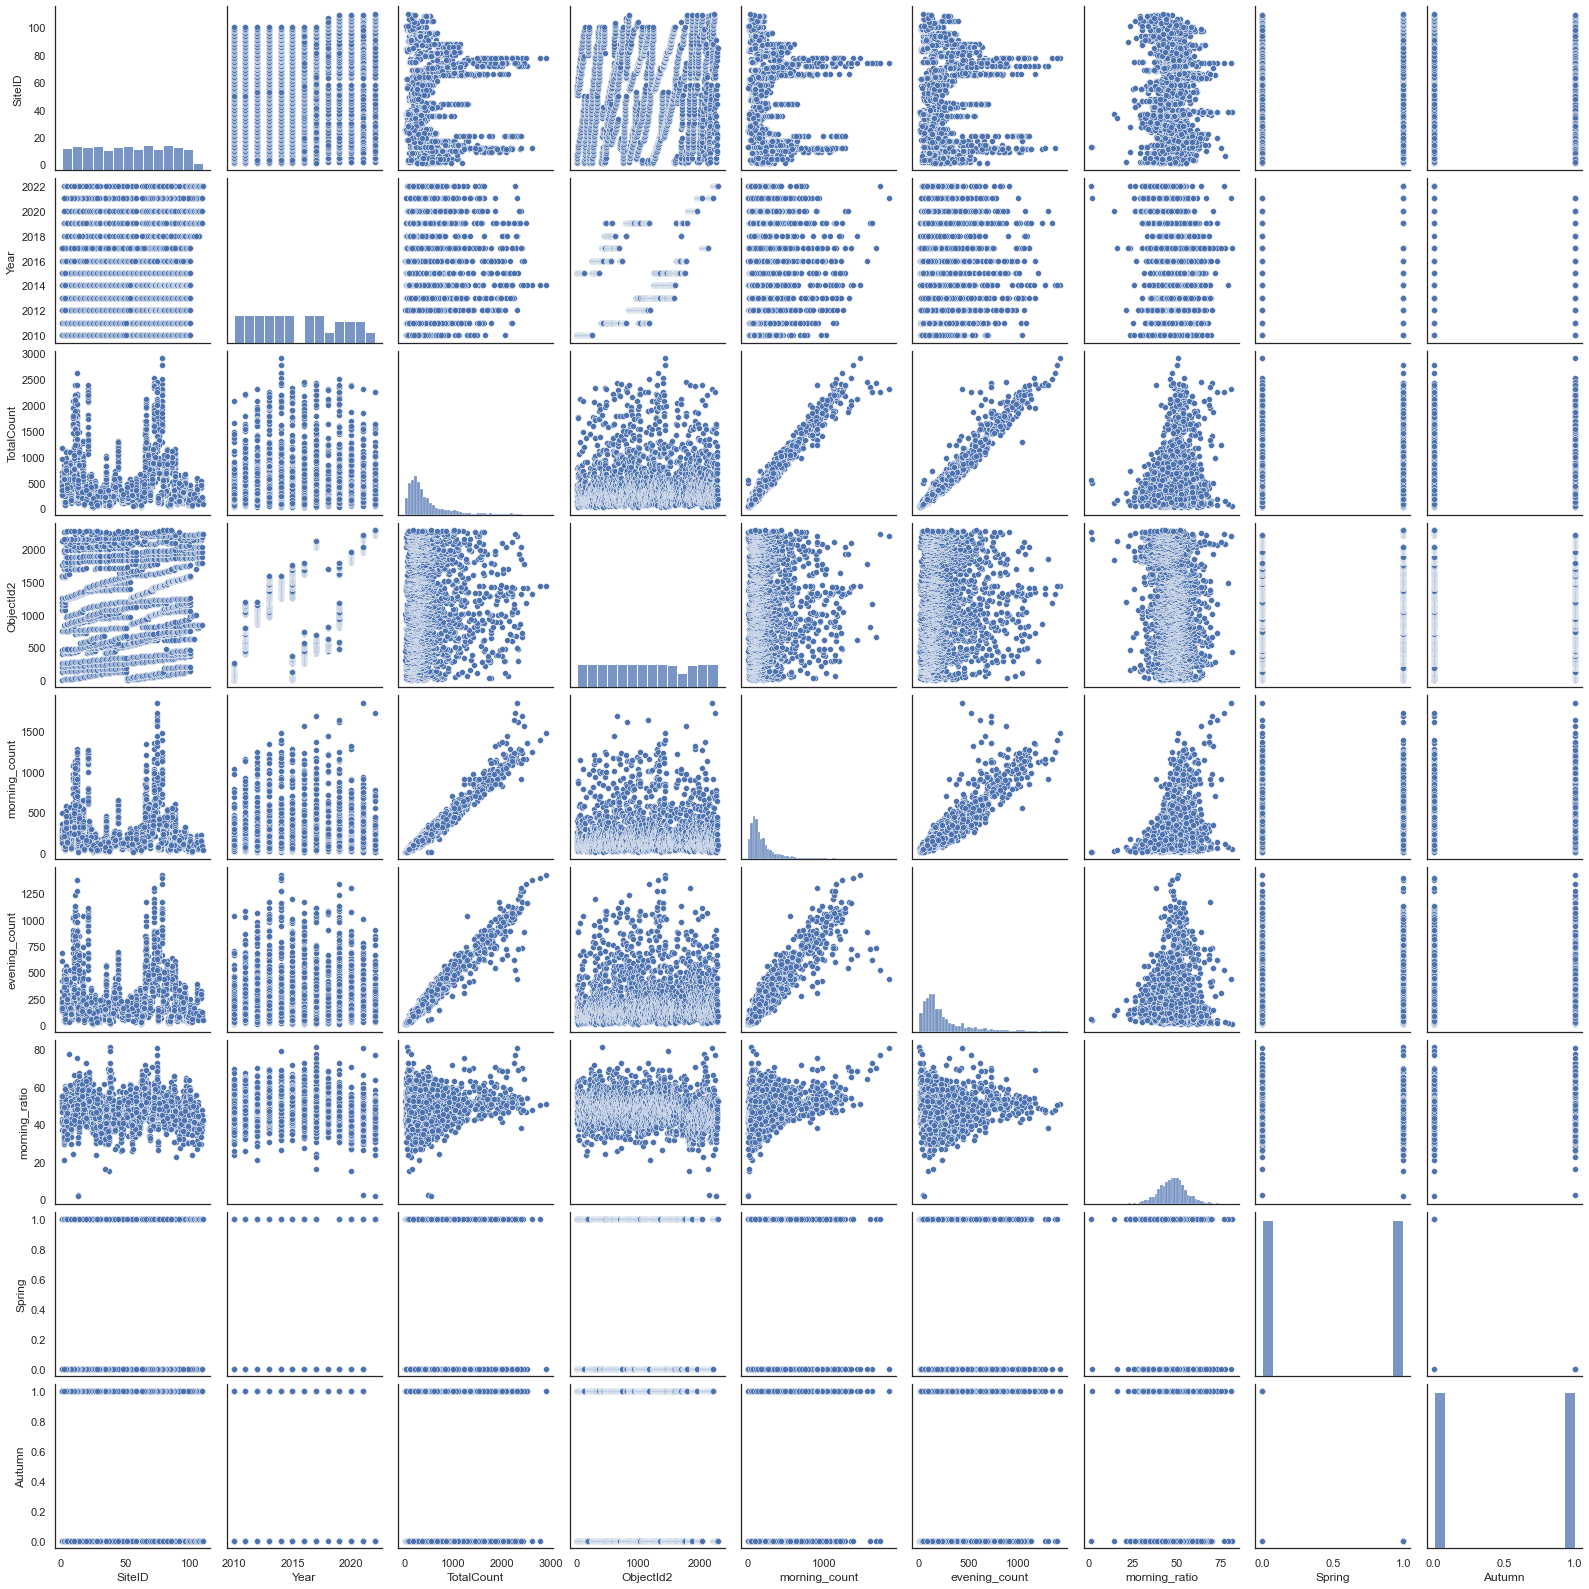

In [247]:
# General relationship graph between variables.
sns.pairplot(data = sydney_survey)

## 4. Linear Regression Ideas

### Morning count vs Evening count

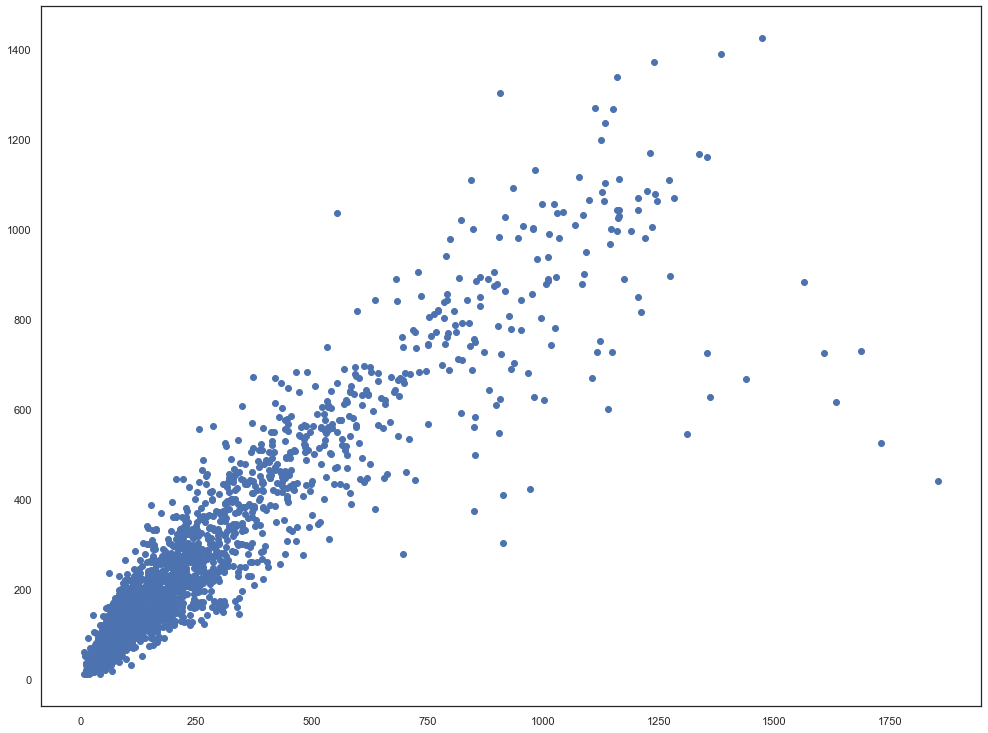

In [248]:
# Define the dependent variable.
y = sydney_survey['evening_count']

# Define the independent variable.
x = sydney_survey['morning_count'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [249]:
# OLS summary.

# Create formula and pass through OLS methods.
f = 'y ~ x'
evening_morning = ols(f, data = sydney_survey).fit()

# Print the regression table.
evening_morning.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.264e+04
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:52:58   Log-Likelihood:                -13103.
No. Observations:                2215   AIC:                         2.621e+04
Df Residuals:                    2213   BIC:                         2.622e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4809      2.614     19.695      0.000      46.355      56.607
x              0.8160      0.007    112.420      0.000       0.802       0.830
==============================================================================
Omnibus:                     1293.998   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63616.851
Skew:                          -2.053   Prob(JB):                         0.00
Kurtosis:                      28.932   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
# Extract the estimated parameters.
print("Parameters: ", evening_morning.params)  

# Extract the standard errors.
print("Standard errors: ", evening_morning.bse)  

# Extract the predicted values.
print("Predicted values: ", evening_morning.predict())  

Parameters:  Intercept    51.480881
x             0.816000
dtype: float64
Standard errors:  Intercept    2.613889
x            0.007258
dtype: float64
Predicted values:  [143.68884479 219.57681478  97.17686318 ... 239.97680671 412.15273864
 131.44884963]


In [251]:
# Set the X coefficient and the constant to generate the regression table.
evening_morning_pred = 51.480881 + 0.816000 * sydney_survey['morning_count']

# View the output.
evening_morning_pred

0       143.688881
1       219.576881
2        97.176881
3       217.944881
4       197.544881
           ...    
2210    412.152881
2211    386.040881
2212    239.976881
2213    412.152881
2214    131.448881
Name: morning_count, Length: 2215, dtype: float64

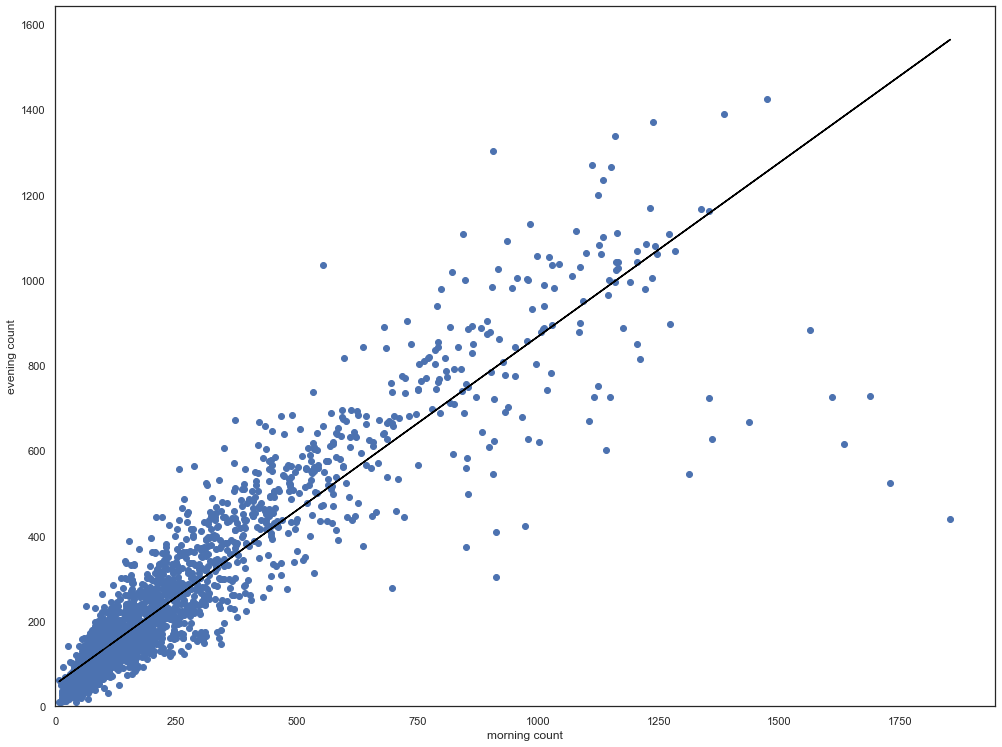

In [252]:
# Plot the graph with a regression line.

# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, evening_morning_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set labels to x and y axis
plt.xlabel("morning count")
plt.ylabel("evening count")

# View the plot.
plt.show()

### Spring influence on total count

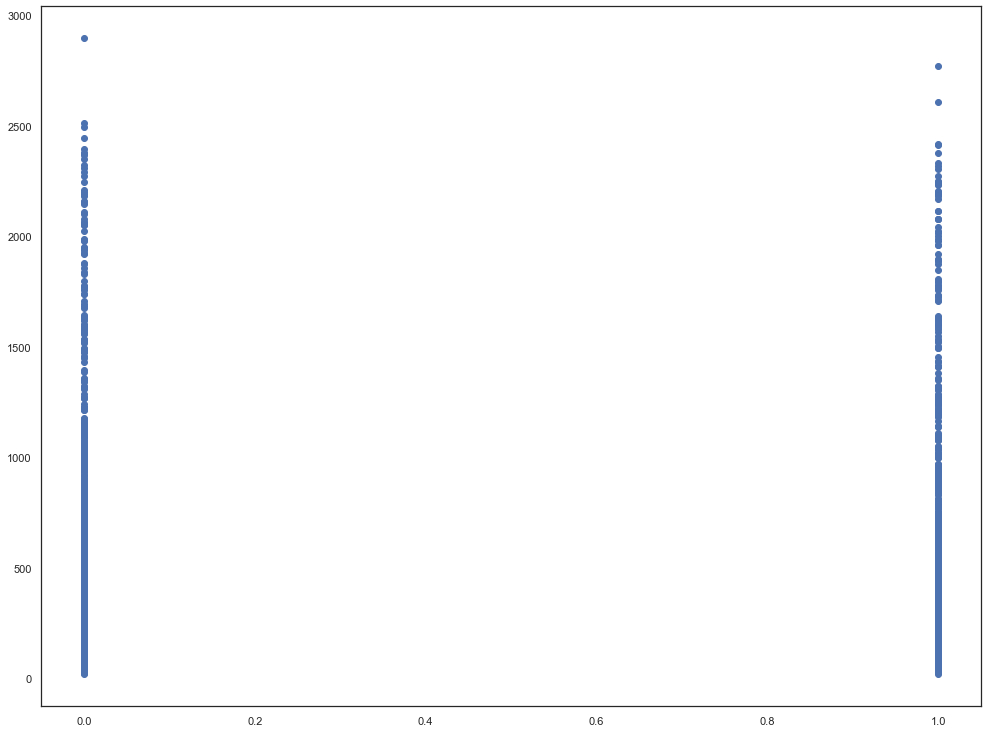

In [253]:
# Define the dependent variable.
y = sydney_survey['TotalCount']

# Define the independent variable.
x = sydney_survey['Spring'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [254]:
# OLS summary.

# Create formula and pass through OLS methods.
f = 'y ~ x'
spring_total = ols(f, data = sydney_survey).fit()

# Print the regression table.
spring_total.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8611
Date:                Fri, 09 Jun 2023   Prob (F-statistic):              0.354
Time:                        17:52:59   Log-Likelihood:                -16840.
No. Observations:                2215   AIC:                         3.368e+04
Df Residuals:                    2213   BIC:                         3.370e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    508.6627     14.585     34.876      0.000     480.062     537.264
x            -19.1271     20.612     -0.928      0.354     -59.548      21.294
==============================================================================
Omnibus:                      854.755   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2811.421
Skew:                           1.982   Prob(JB):                         0.00
Kurtosis:                       6.841   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
# Extract the estimated parameters.
print("Parameters: ", spring_total.params)  

# Extract the standard errors.
print("Standard errors: ", spring_total.bse)  

# Extract the predicted values.
print("Predicted values: ", spring_total.predict())  

Parameters:  Intercept    508.662749
x            -19.127131
dtype: float64
Standard errors:  Intercept    14.584755
x            20.612004
dtype: float64
Predicted values:  [489.53561767 508.66274864 489.53561767 ... 489.53561767 489.53561767
 489.53561767]


In [256]:
# Set the X coefficient and the constant to generate the regression table.
spring_total_pred = (-75.0527) + 33.061693 * sydney_survey['TotalCount']

# View the output.
spring_total_pred

0        8620.172559
1       12587.575719
2        4421.337548
3       10934.491069
4       14703.524071
            ...     
2210    32920.516914
2211    28225.756508
2212    18241.125222
2213    33581.750774
2214     6140.545584
Name: TotalCount, Length: 2215, dtype: float64

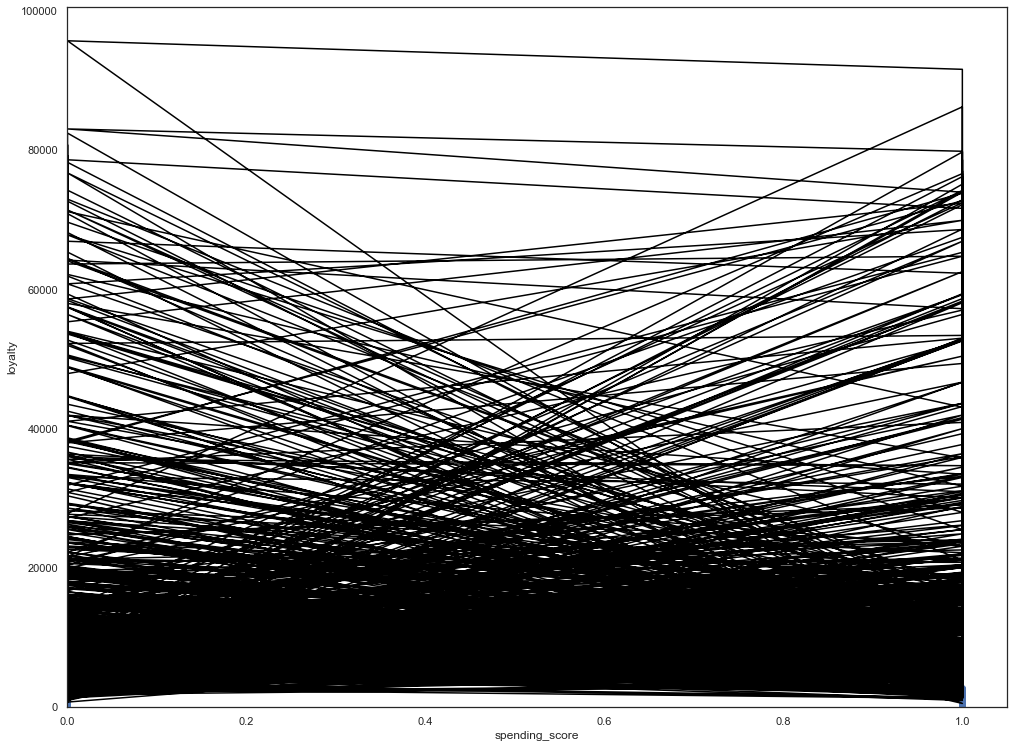

In [257]:
# Plot the graph with a regression line.

# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, spring_total_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set labels to x and y axis
plt.xlabel("spending_score")
plt.ylabel("loyalty")

# View the plot.
plt.show()

### An experiment of a multi-linear regression

In [258]:
# Library for a multi-linear regression
from sklearn import linear_model
import statsmodels.api as sm

In [259]:
# Define the dependent variable.
y = sydney_survey['TotalCount']

# Define the independent variable.
x = sydney_survey[['morning_count','evening_count' ,'Spring', 'Autumn']] 

regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [260]:
# Outputing the intercept and coefficients
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.09546276637468054
Coefficients: 
 [0.99748155 0.99772133 2.22773169 0.9324427 ]


In [261]:
# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             TotalCount   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.690e+05
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:52:59   Log-Likelihood:                -9985.0
No. Observations:                2215   AIC:                         1.998e+04
Df Residuals:                    2210   BIC:                         2.001e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0955     21.979      0.004

# 

## Extract RGB codes from colorblind palette to be implemented into the rest of DataSurfers documentation

In [262]:
# Set the colorblind palette
color_palette = sns.color_palette("colorblind")

# Access the RGB values for each color in the palette
rgb_values = [color_palette.as_hex(), color_palette]

# Print the RGB values
for rgb in rgb_values:
    print(rgb)

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']
[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), (0.8352941176470589, 0.3686274509803922, 0.0), (0.8, 0.47058823529411764, 0.7372549019607844), (0.792156862745098, 0.5686274509803921, 0.3803921568627451), (0.984313725490196, 0.6862745098039216, 0.8941176470588236), (0.5803921568627451, 0.5803921568627451, 0.5803921568627451), (0.9254901960784314, 0.8823529411764706, 0.2), (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]


# 